In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)

In [4]:
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [5]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = x
      break

df.head()

/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     0         12    Algeria     4.605299e+10  1.948099e+10   
1      2017     0         36  Australia     2.284420e+11  1.948099e+10   
2      2017     0         40    Austria     1.664750e+11  1.948099e+10   
3      2017     0         56    Belgium     4.064120e+11  1.948099e+10   
4      2017     0         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [6]:
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM', 'SNDIST', 'PA_NUS_FCRF'])

In [7]:
df.head()

HSCD  COUNTRYCD  TRADE_COUNTRYCD    TRADE_HSCD  TARIFF_AVG  NY_GDP_MKTP_CD  \
0     0         12     4.605299e+10  1.948099e+10        30.0    1.701630e+11   
1     0         36     2.284420e+11  1.948099e+10         0.0    1.329190e+12   
2     0         40     1.664750e+11  1.948099e+10         0.0    4.172380e+11   
3     0         56     4.064120e+11  1.948099e+10         0.0    5.026980e+11   
4     0         76     1.507490e+11  1.948099e+10        18.0    2.062830e+12   

   NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  IC_BUS_EASE_DFRN_DB        KMDIST  \
0       1.599950e+11     41389198            46.109810   9954.009766   
1       1.208850e+12     24601860            80.223690   8329.652344   
2       3.955690e+11      8797566            78.856460   8289.029297   
3       4.757400e+11     11375158            72.409200   8722.114258   
4       1.795700e+12    207833831            55.382403  18364.505860   

   TRADE_HSCD_COUNTRYCD  KR_TRADE_HSCD_COUNTRYCD  
0             3416326.0                     7657  
1           438747025.0                  5294788  
2           453206357.0                   335818  
3           706524512.0                   173709  
4            31329648.0                   122850

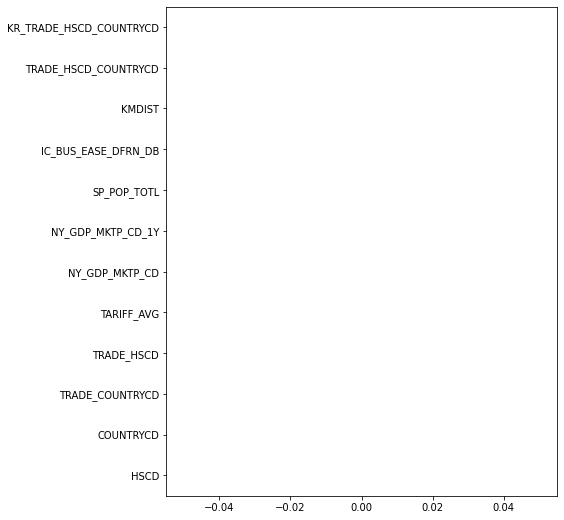

In [8]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [9]:
df.shape


(20713, 12)

In [10]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
2        0.074098
3        0.024586
4        0.392121
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 20713, dtype: float64

In [11]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

HSCD  COUNTRYCD  TRADE_COUNTRYCD    TRADE_HSCD  TARIFF_AVG  NY_GDP_MKTP_CD  \
0     0         12     4.605299e+10  1.948099e+10        30.0    1.701630e+11   
1     0         36     2.284420e+11  1.948099e+10         0.0    1.329190e+12   
2     0         40     1.664750e+11  1.948099e+10         0.0    4.172380e+11   
3     0         56     4.064120e+11  1.948099e+10         0.0    5.026980e+11   
4     0         76     1.507490e+11  1.948099e+10        18.0    2.062830e+12   

   NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  IC_BUS_EASE_DFRN_DB        KMDIST  \
0       1.599950e+11     41389198            46.109810   9954.009766   
1       1.208850e+12     24601860            80.223690   8329.652344   
2       3.955690e+11      8797566            78.856460   8289.029297   
3       4.757400e+11     11375158            72.409200   8722.114258   
4       1.795700e+12    207833831            55.382403  18364.505860   

   TRADE_HSCD_COUNTRYCD  KR_TRADE_HSCD_COUNTRYCD  item_total_percent  \
0             3416326.0                     7657            0.007418   
1           438747025.0                  5294788            0.192061   
2           453206357.0                   335818            0.272237   
3           706524512.0                   173709            0.173844   
4            31329648.0                   122850            0.020783   

   item_world_percent  gdp_percent  next_year_percent  
0            0.017537   106.355199           0.224130  
1            2.252181   109.954916           1.206797  
2            2.326404   105.477932           0.074098  
3            3.626739   105.666541           0.024586  
4            0.160822   114.876093           0.392121

In [12]:
df['KMDIST'] = df['KMDIST']/100
df = df.drop(columns=['SP_POP_TOTL', 'KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [13]:
df.head()

HSCD  COUNTRYCD  TARIFF_AVG  IC_BUS_EASE_DFRN_DB      KMDIST  \
0     0         12        30.0            46.109810   99.540098   
1     0         36         0.0            80.223690   83.296523   
2     0         40         0.0            78.856460   82.890293   
3     0         56         0.0            72.409200   87.221143   
4     0         76        18.0            55.382403  183.645059   

   item_total_percent  item_world_percent  gdp_percent  next_year_percent  
0            0.007418            0.017537   106.355199           0.224130  
1            0.192061            2.252181   109.954916           1.206797  
2            0.272237            2.326404   105.477932           0.074098  
3            0.173844            3.626739   105.666541           0.024586  
4            0.020783            0.160822   114.876093           0.392121

In [14]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(20713, 9)
12427 4143 4143


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1015)
device = torch.device("cuda")

In [16]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [17]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

torch.Size([16570, 8])
torch.Size([16570, 1])


In [22]:
class Model(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(Model, self).__init__()
    self.bn = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, out_channel)
  def forward(self, x):
    x = x.to(device)
    return self.layer1(self.bn(x))

class DeepModel(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = F.relu(self.bn1(self.layer1(x)))
    x = F.relu(self.bn2(self.layer2(x)))
    
    return self.head(x)

class DeepModel2(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel2, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = self.bn1(self.layer1(x))
    x = self.bn2(self.layer2(x))
    
    return self.head(x)

# model = nn.Linear(9,1).to(device)
deepmodel = DeepModel(8, 1).to(device)
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [23]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

In [ ]:
n_epochs = 10000

for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/10000  Batch 1/518  cost : 407.0648193359375
Ep 0/10000  Batch 2/518  cost : 584.536376953125
Ep 0/10000  Batch 3/518  cost : 406.18463134765625
Ep 0/10000  Batch 4/518  cost : 403.46087646484375
Ep 0/10000  Batch 5/518  cost : 489.09173583984375
Ep 0/10000  Batch 6/518  cost : 371.0122375488281
Ep 0/10000  Batch 7/518  cost : 418.8739318847656
Ep 0/10000  Batch 8/518  cost : 441.4048767089844
Ep 0/10000  Batch 9/518  cost : 457.8680114746094
Ep 0/10000  Batch 10/518  cost : 409.0102844238281
Ep 0/10000  Batch 11/518  cost : 476.911865234375
Ep 0/10000  Batch 12/518  cost : 408.9792175292969
Ep 0/10000  Batch 13/518  cost : 846.1722412109375
Ep 0/10000  Batch 14/518  cost : 814.3062744140625
Ep 0/10000  Batch 15/518  cost : 1152.933837890625
Ep 0/10000  Batch 16/518  cost : 381.5661926269531
Ep 0/10000  Batch 17/518  cost : 380.3727722167969
Ep 0/10000  Batch 18/518  cost : 265.3634338378906
Ep 0/10000  Batch 19/518  cost : 396.1572265625
Ep 0/10000  Batch 20/518  cost : 371.82965

Ep 0/10000  Batch 181/518  cost : 26.498802185058594
Ep 0/10000  Batch 182/518  cost : 70.0953598022461
Ep 0/10000  Batch 183/518  cost : 48.26458740234375
Ep 0/10000  Batch 184/518  cost : 43.31441879272461
Ep 0/10000  Batch 185/518  cost : 29.108566284179688
Ep 0/10000  Batch 186/518  cost : 32.32889938354492
Ep 0/10000  Batch 187/518  cost : 112.2843246459961
Ep 0/10000  Batch 188/518  cost : 127.85049438476562
Ep 0/10000  Batch 189/518  cost : 45.203643798828125
Ep 0/10000  Batch 190/518  cost : 28.935928344726562
Ep 0/10000  Batch 191/518  cost : 26.364234924316406
Ep 0/10000  Batch 192/518  cost : 37.652801513671875
Ep 0/10000  Batch 193/518  cost : 24.231163024902344
Ep 0/10000  Batch 194/518  cost : 1115.13623046875
Ep 0/10000  Batch 195/518  cost : 29.300880432128906
Ep 0/10000  Batch 196/518  cost : 137.85308837890625
Ep 0/10000  Batch 197/518  cost : 49.17022705078125
Ep 0/10000  Batch 198/518  cost : 63.00221633911133
Ep 0/10000  Batch 199/518  cost : 129.1049041748047
Ep 0

Ep 0/10000  Batch 361/518  cost : 33.695037841796875
Ep 0/10000  Batch 362/518  cost : 20.087387084960938
Ep 0/10000  Batch 363/518  cost : 28.97471046447754
Ep 0/10000  Batch 364/518  cost : 234.01303100585938
Ep 0/10000  Batch 365/518  cost : 170.45462036132812
Ep 0/10000  Batch 366/518  cost : 27.663419723510742
Ep 0/10000  Batch 367/518  cost : 3738.443603515625
Ep 0/10000  Batch 368/518  cost : 47.63312530517578
Ep 0/10000  Batch 369/518  cost : 30.391254425048828
Ep 0/10000  Batch 370/518  cost : 32.547874450683594
Ep 0/10000  Batch 371/518  cost : 3186.4140625
Ep 0/10000  Batch 372/518  cost : 79.0647964477539
Ep 0/10000  Batch 373/518  cost : 19.812271118164062
Ep 0/10000  Batch 374/518  cost : 40.43498992919922
Ep 0/10000  Batch 375/518  cost : 30.663375854492188
Ep 0/10000  Batch 376/518  cost : 31.893657684326172
Ep 0/10000  Batch 377/518  cost : 54.542781829833984
Ep 0/10000  Batch 378/518  cost : 31.0389404296875
Ep 0/10000  Batch 379/518  cost : 58.94054412841797
Ep 0/100

Ep 1/10000  Batch 23/518  cost : 18.24776268005371
Ep 1/10000  Batch 24/518  cost : 53.25730895996094
Ep 1/10000  Batch 25/518  cost : 74.67366027832031
Ep 1/10000  Batch 26/518  cost : 38.45258331298828
Ep 1/10000  Batch 27/518  cost : 27.842205047607422
Ep 1/10000  Batch 28/518  cost : 39.84737014770508
Ep 1/10000  Batch 29/518  cost : 57.441650390625
Ep 1/10000  Batch 30/518  cost : 17.998966217041016
Ep 1/10000  Batch 31/518  cost : 327.55242919921875
Ep 1/10000  Batch 32/518  cost : 19.605449676513672
Ep 1/10000  Batch 33/518  cost : 52.654945373535156
Ep 1/10000  Batch 34/518  cost : 99.92942810058594
Ep 1/10000  Batch 35/518  cost : 28.09379005432129
Ep 1/10000  Batch 36/518  cost : 62.82232666015625
Ep 1/10000  Batch 37/518  cost : 85.17542266845703
Ep 1/10000  Batch 38/518  cost : 397.287109375
Ep 1/10000  Batch 39/518  cost : 834.7523193359375
Ep 1/10000  Batch 40/518  cost : 17.524213790893555
Ep 1/10000  Batch 41/518  cost : 37990.14453125
Ep 1/10000  Batch 42/518  cost : 2

Ep 1/10000  Batch 203/518  cost : 57.279052734375
Ep 1/10000  Batch 204/518  cost : 88.86402893066406
Ep 1/10000  Batch 205/518  cost : 101.56311798095703
Ep 1/10000  Batch 206/518  cost : 46.99018096923828
Ep 1/10000  Batch 207/518  cost : 47.90189743041992
Ep 1/10000  Batch 208/518  cost : 46.95411682128906
Ep 1/10000  Batch 209/518  cost : 85.37379455566406
Ep 1/10000  Batch 210/518  cost : 485.1606750488281
Ep 1/10000  Batch 211/518  cost : 44.02650833129883
Ep 1/10000  Batch 212/518  cost : 49.98931884765625
Ep 1/10000  Batch 213/518  cost : 80.69684600830078
Ep 1/10000  Batch 214/518  cost : 37.22462844848633
Ep 1/10000  Batch 215/518  cost : 165.83641052246094
Ep 1/10000  Batch 216/518  cost : 140.90863037109375
Ep 1/10000  Batch 217/518  cost : 54.990787506103516
Ep 1/10000  Batch 218/518  cost : 104.7846908569336
Ep 1/10000  Batch 219/518  cost : 51.18911361694336
Ep 1/10000  Batch 220/518  cost : 70.74471282958984
Ep 1/10000  Batch 221/518  cost : 97.30963897705078
Ep 1/10000

Ep 1/10000  Batch 383/518  cost : 19.635528564453125
Ep 1/10000  Batch 384/518  cost : 2776.83154296875
Ep 1/10000  Batch 385/518  cost : 55.386634826660156
Ep 1/10000  Batch 386/518  cost : 13.581701278686523
Ep 1/10000  Batch 387/518  cost : 104.00653076171875
Ep 1/10000  Batch 388/518  cost : 17.819551467895508
Ep 1/10000  Batch 389/518  cost : 179.47691345214844
Ep 1/10000  Batch 390/518  cost : 34.647090911865234
Ep 1/10000  Batch 391/518  cost : 67.26795959472656
Ep 1/10000  Batch 392/518  cost : 66.53759765625
Ep 1/10000  Batch 393/518  cost : 360.25225830078125
Ep 1/10000  Batch 394/518  cost : 109.32022857666016
Ep 1/10000  Batch 395/518  cost : 13.162261962890625
Ep 1/10000  Batch 396/518  cost : 20.047977447509766
Ep 1/10000  Batch 397/518  cost : 41.19493865966797
Ep 1/10000  Batch 398/518  cost : 13.645398139953613
Ep 1/10000  Batch 399/518  cost : 30.226789474487305
Ep 1/10000  Batch 400/518  cost : 96.81397247314453
Ep 1/10000  Batch 401/518  cost : 244.42593383789062
Ep

Ep 2/10000  Batch 45/518  cost : 172.6057891845703
Ep 2/10000  Batch 46/518  cost : 25.50350570678711
Ep 2/10000  Batch 47/518  cost : 199.32742309570312
Ep 2/10000  Batch 48/518  cost : 32.230899810791016
Ep 2/10000  Batch 49/518  cost : 80.16905212402344
Ep 2/10000  Batch 50/518  cost : 28.14550018310547
Ep 2/10000  Batch 51/518  cost : 35.02386474609375
Ep 2/10000  Batch 52/518  cost : 67.28697967529297
Ep 2/10000  Batch 53/518  cost : 28.566442489624023
Ep 2/10000  Batch 54/518  cost : 802.6632690429688
Ep 2/10000  Batch 55/518  cost : 29.30135726928711
Ep 2/10000  Batch 56/518  cost : 26.71915626525879
Ep 2/10000  Batch 57/518  cost : 35.12076187133789
Ep 2/10000  Batch 58/518  cost : 92.05342102050781
Ep 2/10000  Batch 59/518  cost : 92.06578826904297
Ep 2/10000  Batch 60/518  cost : 144.74334716796875
Ep 2/10000  Batch 61/518  cost : 174.2873992919922
Ep 2/10000  Batch 62/518  cost : 93.08719635009766
Ep 2/10000  Batch 63/518  cost : 48.7226676940918
Ep 2/10000  Batch 64/518  co

Ep 2/10000  Batch 225/518  cost : 578.575927734375
Ep 2/10000  Batch 226/518  cost : 26.290687561035156
Ep 2/10000  Batch 227/518  cost : 49.450164794921875
Ep 2/10000  Batch 228/518  cost : 111.56040954589844
Ep 2/10000  Batch 229/518  cost : 79.27214050292969
Ep 2/10000  Batch 230/518  cost : 295.7375793457031
Ep 2/10000  Batch 231/518  cost : 81.127685546875
Ep 2/10000  Batch 232/518  cost : 82.79627227783203
Ep 2/10000  Batch 233/518  cost : 371.2425231933594
Ep 2/10000  Batch 234/518  cost : 23.010334014892578
Ep 2/10000  Batch 235/518  cost : 140.28245544433594
Ep 2/10000  Batch 236/518  cost : 109.90640258789062
Ep 2/10000  Batch 237/518  cost : 225.99334716796875
Ep 2/10000  Batch 238/518  cost : 55.492958068847656
Ep 2/10000  Batch 239/518  cost : 22.708641052246094
Ep 2/10000  Batch 240/518  cost : 23.68072509765625
Ep 2/10000  Batch 241/518  cost : 26.129596710205078
Ep 2/10000  Batch 242/518  cost : 65.99295806884766
Ep 2/10000  Batch 243/518  cost : 56.73562240600586
Ep 2/

Ep 2/10000  Batch 405/518  cost : 18.57099151611328
Ep 2/10000  Batch 406/518  cost : 62.52983474731445
Ep 2/10000  Batch 407/518  cost : 14.092512130737305
Ep 2/10000  Batch 408/518  cost : 52.24506759643555
Ep 2/10000  Batch 409/518  cost : 3323.91259765625
Ep 2/10000  Batch 410/518  cost : 74.20050811767578
Ep 2/10000  Batch 411/518  cost : 187932.765625
Ep 2/10000  Batch 412/518  cost : 22.174400329589844
Ep 2/10000  Batch 413/518  cost : 29.963741302490234
Ep 2/10000  Batch 414/518  cost : 57.77394104003906
Ep 2/10000  Batch 415/518  cost : 114.72358703613281
Ep 2/10000  Batch 416/518  cost : 123.9640884399414
Ep 2/10000  Batch 417/518  cost : 149.89845275878906
Ep 2/10000  Batch 418/518  cost : 24.910198211669922
Ep 2/10000  Batch 419/518  cost : 281.2342834472656
Ep 2/10000  Batch 420/518  cost : 25.742948532104492
Ep 2/10000  Batch 421/518  cost : 189.96250915527344
Ep 2/10000  Batch 422/518  cost : 54.25000762939453
Ep 2/10000  Batch 423/518  cost : 211.94772338867188
Ep 2/100

Ep 3/10000  Batch 66/518  cost : 23.955467224121094
Ep 3/10000  Batch 67/518  cost : 18.46527862548828
Ep 3/10000  Batch 68/518  cost : 173.37232971191406
Ep 3/10000  Batch 69/518  cost : 74.3787841796875
Ep 3/10000  Batch 70/518  cost : 271.585693359375
Ep 3/10000  Batch 71/518  cost : 88.40591430664062
Ep 3/10000  Batch 72/518  cost : 36.831119537353516
Ep 3/10000  Batch 73/518  cost : 386.2632751464844
Ep 3/10000  Batch 74/518  cost : 62.13429641723633
Ep 3/10000  Batch 75/518  cost : 3709.48583984375
Ep 3/10000  Batch 76/518  cost : 21.667438507080078
Ep 3/10000  Batch 77/518  cost : 38.8000602722168
Ep 3/10000  Batch 78/518  cost : 44.84941482543945
Ep 3/10000  Batch 79/518  cost : 30.699016571044922
Ep 3/10000  Batch 80/518  cost : 21.457860946655273
Ep 3/10000  Batch 81/518  cost : 177.76370239257812
Ep 3/10000  Batch 82/518  cost : 47.75236892700195
Ep 3/10000  Batch 83/518  cost : 56.739742279052734
Ep 3/10000  Batch 84/518  cost : 268.4441223144531
Ep 3/10000  Batch 85/518  c

Ep 3/10000  Batch 245/518  cost : 41.838443756103516
Ep 3/10000  Batch 246/518  cost : 65.89092254638672
Ep 3/10000  Batch 247/518  cost : 35.19066619873047
Ep 3/10000  Batch 248/518  cost : 37.98727035522461
Ep 3/10000  Batch 249/518  cost : 60.641319274902344
Ep 3/10000  Batch 250/518  cost : 13.494619369506836
Ep 3/10000  Batch 251/518  cost : 26.43320655822754
Ep 3/10000  Batch 252/518  cost : 21.56836700439453
Ep 3/10000  Batch 253/518  cost : 42.559471130371094
Ep 3/10000  Batch 254/518  cost : 59.68757247924805
Ep 3/10000  Batch 255/518  cost : 26.399662017822266
Ep 3/10000  Batch 256/518  cost : 69.03884887695312
Ep 3/10000  Batch 257/518  cost : 35.16168212890625
Ep 3/10000  Batch 258/518  cost : 13.0308198928833
Ep 3/10000  Batch 259/518  cost : 32.891822814941406
Ep 3/10000  Batch 260/518  cost : 66.66065216064453
Ep 3/10000  Batch 261/518  cost : 16.581588745117188
Ep 3/10000  Batch 262/518  cost : 42.99116516113281
Ep 3/10000  Batch 263/518  cost : 22.211008071899414
Ep 3/

Ep 3/10000  Batch 426/518  cost : 120.30650329589844
Ep 3/10000  Batch 427/518  cost : 29.35218048095703
Ep 3/10000  Batch 428/518  cost : 21.866857528686523
Ep 3/10000  Batch 429/518  cost : 37.74894332885742
Ep 3/10000  Batch 430/518  cost : 1896.765625
Ep 3/10000  Batch 431/518  cost : 240.86618041992188
Ep 3/10000  Batch 432/518  cost : 86.92167663574219
Ep 3/10000  Batch 433/518  cost : 41.81562042236328
Ep 3/10000  Batch 434/518  cost : 65.24000549316406
Ep 3/10000  Batch 435/518  cost : 192.78993225097656
Ep 3/10000  Batch 436/518  cost : 115.515380859375
Ep 3/10000  Batch 437/518  cost : 188039.46875
Ep 3/10000  Batch 438/518  cost : 28.689542770385742
Ep 3/10000  Batch 439/518  cost : 9691.1728515625
Ep 3/10000  Batch 440/518  cost : 169.98236083984375
Ep 3/10000  Batch 441/518  cost : 30.729297637939453
Ep 3/10000  Batch 442/518  cost : 40.75483322143555
Ep 3/10000  Batch 443/518  cost : 130.72396850585938
Ep 3/10000  Batch 444/518  cost : 312.5762023925781
Ep 3/10000  Batch 

Ep 4/10000  Batch 88/518  cost : 100.09513854980469
Ep 4/10000  Batch 89/518  cost : 71.87557220458984
Ep 4/10000  Batch 90/518  cost : 16.72148323059082
Ep 4/10000  Batch 91/518  cost : 111.67768859863281
Ep 4/10000  Batch 92/518  cost : 235.51904296875
Ep 4/10000  Batch 93/518  cost : 65.3708267211914
Ep 4/10000  Batch 94/518  cost : 81.18096160888672
Ep 4/10000  Batch 95/518  cost : 17.007755279541016
Ep 4/10000  Batch 96/518  cost : 227.9794464111328
Ep 4/10000  Batch 97/518  cost : 676.3013305664062
Ep 4/10000  Batch 98/518  cost : 36.273780822753906
Ep 4/10000  Batch 99/518  cost : 176.40682983398438
Ep 4/10000  Batch 100/518  cost : 52.6661491394043
Ep 4/10000  Batch 101/518  cost : 105.6641845703125
Ep 4/10000  Batch 102/518  cost : 27.976816177368164
Ep 4/10000  Batch 103/518  cost : 330.27716064453125
Ep 4/10000  Batch 104/518  cost : 129.82492065429688
Ep 4/10000  Batch 105/518  cost : 35.794891357421875
Ep 4/10000  Batch 106/518  cost : 20.42618179321289
Ep 4/10000  Batch 1

Ep 4/10000  Batch 268/518  cost : 43.12653732299805
Ep 4/10000  Batch 269/518  cost : 38.07802200317383
Ep 4/10000  Batch 270/518  cost : 366.33111572265625
Ep 4/10000  Batch 271/518  cost : 26.159557342529297
Ep 4/10000  Batch 272/518  cost : 145.47703552246094
Ep 4/10000  Batch 273/518  cost : 130.41416931152344
Ep 4/10000  Batch 274/518  cost : 39.892372131347656
Ep 4/10000  Batch 275/518  cost : 279.7342224121094
Ep 4/10000  Batch 276/518  cost : 20.319644927978516
Ep 4/10000  Batch 277/518  cost : 22.847179412841797
Ep 4/10000  Batch 278/518  cost : 47.57139587402344
Ep 4/10000  Batch 279/518  cost : 30.637414932250977
Ep 4/10000  Batch 280/518  cost : 41.055503845214844
Ep 4/10000  Batch 281/518  cost : 87.20545196533203
Ep 4/10000  Batch 282/518  cost : 230.77279663085938
Ep 4/10000  Batch 283/518  cost : 24.256790161132812
Ep 4/10000  Batch 284/518  cost : 15.4834566116333
Ep 4/10000  Batch 285/518  cost : 40.165557861328125
Ep 4/10000  Batch 286/518  cost : 177.47496032714844


Ep 4/10000  Batch 448/518  cost : 52.43244552612305
Ep 4/10000  Batch 449/518  cost : 76.40930938720703
Ep 4/10000  Batch 450/518  cost : 57.14366149902344
Ep 4/10000  Batch 451/518  cost : 75.58617401123047
Ep 4/10000  Batch 452/518  cost : 47.654964447021484
Ep 4/10000  Batch 453/518  cost : 41.882469177246094
Ep 4/10000  Batch 454/518  cost : 20.917232513427734
Ep 4/10000  Batch 455/518  cost : 846.1768798828125
Ep 4/10000  Batch 456/518  cost : 33.355804443359375
Ep 4/10000  Batch 457/518  cost : 115.58854675292969
Ep 4/10000  Batch 458/518  cost : 32.52741622924805
Ep 4/10000  Batch 459/518  cost : 29.023845672607422
Ep 4/10000  Batch 460/518  cost : 25.302824020385742
Ep 4/10000  Batch 461/518  cost : 25.69589614868164
Ep 4/10000  Batch 462/518  cost : 75.27485656738281
Ep 4/10000  Batch 463/518  cost : 20.095008850097656
Ep 4/10000  Batch 464/518  cost : 22.912303924560547
Ep 4/10000  Batch 465/518  cost : 19.412580490112305
Ep 4/10000  Batch 466/518  cost : 54.460716247558594
E

Ep 5/10000  Batch 110/518  cost : 83.12106323242188
Ep 5/10000  Batch 111/518  cost : 27.369396209716797
Ep 5/10000  Batch 112/518  cost : 18.913169860839844
Ep 5/10000  Batch 113/518  cost : 37865.86328125
Ep 5/10000  Batch 114/518  cost : 22.624380111694336
Ep 5/10000  Batch 115/518  cost : 42.08427429199219
Ep 5/10000  Batch 116/518  cost : 23.567188262939453
Ep 5/10000  Batch 117/518  cost : 300.4632873535156
Ep 5/10000  Batch 118/518  cost : 50.09547424316406
Ep 5/10000  Batch 119/518  cost : 244.20181274414062
Ep 5/10000  Batch 120/518  cost : 19.225162506103516
Ep 5/10000  Batch 121/518  cost : 196.0991973876953
Ep 5/10000  Batch 122/518  cost : 297.42791748046875
Ep 5/10000  Batch 123/518  cost : 108.47976684570312
Ep 5/10000  Batch 124/518  cost : 28.273448944091797
Ep 5/10000  Batch 125/518  cost : 43.906227111816406
Ep 5/10000  Batch 126/518  cost : 155.84521484375
Ep 5/10000  Batch 127/518  cost : 41.654090881347656
Ep 5/10000  Batch 128/518  cost : 42.14478302001953
Ep 5/1

Ep 5/10000  Batch 290/518  cost : 32.10304641723633
Ep 5/10000  Batch 291/518  cost : 29.51772117614746
Ep 5/10000  Batch 292/518  cost : 222.1432647705078
Ep 5/10000  Batch 293/518  cost : 29.12893295288086
Ep 5/10000  Batch 294/518  cost : 101.5916519165039
Ep 5/10000  Batch 295/518  cost : 16.902767181396484
Ep 5/10000  Batch 296/518  cost : 139.936279296875
Ep 5/10000  Batch 297/518  cost : 31.032352447509766
Ep 5/10000  Batch 298/518  cost : 76.7016372680664
Ep 5/10000  Batch 299/518  cost : 116.37751007080078
Ep 5/10000  Batch 300/518  cost : 15.276969909667969
Ep 5/10000  Batch 301/518  cost : 15.710885047912598
Ep 5/10000  Batch 302/518  cost : 20.73810577392578
Ep 5/10000  Batch 303/518  cost : 218.31692504882812
Ep 5/10000  Batch 304/518  cost : 21.52729034423828
Ep 5/10000  Batch 305/518  cost : 18.15068244934082
Ep 5/10000  Batch 306/518  cost : 41.89501953125
Ep 5/10000  Batch 307/518  cost : 35.57938766479492
Ep 5/10000  Batch 308/518  cost : 48.40834045410156
Ep 5/10000 

Ep 5/10000  Batch 470/518  cost : 913.0652465820312
Ep 5/10000  Batch 471/518  cost : 471.92974853515625
Ep 5/10000  Batch 472/518  cost : 749.0242919921875
Ep 5/10000  Batch 473/518  cost : 21.79909896850586
Ep 5/10000  Batch 474/518  cost : 125.67362976074219
Ep 5/10000  Batch 475/518  cost : 119.21995544433594
Ep 5/10000  Batch 476/518  cost : 19.528593063354492
Ep 5/10000  Batch 477/518  cost : 21.305320739746094
Ep 5/10000  Batch 478/518  cost : 16.693984985351562
Ep 5/10000  Batch 479/518  cost : 30.41214942932129
Ep 5/10000  Batch 480/518  cost : 985.0076293945312
Ep 5/10000  Batch 481/518  cost : 23.57826042175293
Ep 5/10000  Batch 482/518  cost : 65.22998046875
Ep 5/10000  Batch 483/518  cost : 31.315025329589844
Ep 5/10000  Batch 484/518  cost : 43.15318298339844
Ep 5/10000  Batch 485/518  cost : 32.436580657958984
Ep 5/10000  Batch 486/518  cost : 37.244266510009766
Ep 5/10000  Batch 487/518  cost : 38.14451217651367
Ep 5/10000  Batch 488/518  cost : 19.38522720336914
Ep 5/1

Ep 6/10000  Batch 132/518  cost : 37.01512145996094
Ep 6/10000  Batch 133/518  cost : 9715.8056640625
Ep 6/10000  Batch 134/518  cost : 70.61555480957031
Ep 6/10000  Batch 135/518  cost : 34.362525939941406
Ep 6/10000  Batch 136/518  cost : 160.02651977539062
Ep 6/10000  Batch 137/518  cost : 48.66194152832031
Ep 6/10000  Batch 138/518  cost : 363.6036682128906
Ep 6/10000  Batch 139/518  cost : 35.09125518798828
Ep 6/10000  Batch 140/518  cost : 115.63127899169922
Ep 6/10000  Batch 141/518  cost : 43.96956253051758
Ep 6/10000  Batch 142/518  cost : 44.725765228271484
Ep 6/10000  Batch 143/518  cost : 31.53374671936035
Ep 6/10000  Batch 144/518  cost : 3752.13671875
Ep 6/10000  Batch 145/518  cost : 69.86209869384766
Ep 6/10000  Batch 146/518  cost : 113.75927734375
Ep 6/10000  Batch 147/518  cost : 164.4152069091797
Ep 6/10000  Batch 148/518  cost : 196.87826538085938
Ep 6/10000  Batch 149/518  cost : 21.504413604736328
Ep 6/10000  Batch 150/518  cost : 29.245311737060547
Ep 6/10000  B

Ep 6/10000  Batch 312/518  cost : 33.655921936035156
Ep 6/10000  Batch 313/518  cost : 59.94602966308594
Ep 6/10000  Batch 314/518  cost : 269.71270751953125
Ep 6/10000  Batch 315/518  cost : 33.34897994995117
Ep 6/10000  Batch 316/518  cost : 374.6275634765625
Ep 6/10000  Batch 317/518  cost : 366.97906494140625
Ep 6/10000  Batch 318/518  cost : 51.26500701904297
Ep 6/10000  Batch 319/518  cost : 37.51616287231445
Ep 6/10000  Batch 320/518  cost : 57.08646774291992
Ep 6/10000  Batch 321/518  cost : 37.473045349121094
Ep 6/10000  Batch 322/518  cost : 39.65652847290039
Ep 6/10000  Batch 323/518  cost : 261.77410888671875
Ep 6/10000  Batch 324/518  cost : 44.66495132446289
Ep 6/10000  Batch 325/518  cost : 73.41883850097656
Ep 6/10000  Batch 326/518  cost : 231.54290771484375
Ep 6/10000  Batch 327/518  cost : 38.738548278808594
Ep 6/10000  Batch 328/518  cost : 251.15432739257812
Ep 6/10000  Batch 329/518  cost : 21.819671630859375
Ep 6/10000  Batch 330/518  cost : 70.00614929199219
Ep 

Ep 6/10000  Batch 491/518  cost : 75.81344604492188
Ep 6/10000  Batch 492/518  cost : 345.4780578613281
Ep 6/10000  Batch 493/518  cost : 62.60768127441406
Ep 6/10000  Batch 494/518  cost : 75.02188873291016
Ep 6/10000  Batch 495/518  cost : 34.710693359375
Ep 6/10000  Batch 496/518  cost : 58.03774642944336
Ep 6/10000  Batch 497/518  cost : 197.5146026611328
Ep 6/10000  Batch 498/518  cost : 317.49774169921875
Ep 6/10000  Batch 499/518  cost : 66.32553100585938
Ep 6/10000  Batch 500/518  cost : 572.9657592773438
Ep 6/10000  Batch 501/518  cost : 35.53163146972656
Ep 6/10000  Batch 502/518  cost : 24.759891510009766
Ep 6/10000  Batch 503/518  cost : 184.5217742919922
Ep 6/10000  Batch 504/518  cost : 43.130252838134766
Ep 6/10000  Batch 505/518  cost : 198.2250518798828
Ep 6/10000  Batch 506/518  cost : 393.3704528808594
Ep 6/10000  Batch 507/518  cost : 36.661293029785156
Ep 6/10000  Batch 508/518  cost : 179.02671813964844
Ep 6/10000  Batch 509/518  cost : 319.30096435546875
Ep 6/100

Ep 7/10000  Batch 154/518  cost : 26.90203094482422
Ep 7/10000  Batch 155/518  cost : 13.597558975219727
Ep 7/10000  Batch 156/518  cost : 29.76124382019043
Ep 7/10000  Batch 157/518  cost : 33.90577697753906
Ep 7/10000  Batch 158/518  cost : 48.31997299194336
Ep 7/10000  Batch 159/518  cost : 180.23757934570312
Ep 7/10000  Batch 160/518  cost : 28.49553680419922
Ep 7/10000  Batch 161/518  cost : 13.04419994354248
Ep 7/10000  Batch 162/518  cost : 131.24169921875
Ep 7/10000  Batch 163/518  cost : 25.35226821899414
Ep 7/10000  Batch 164/518  cost : 107.15867614746094
Ep 7/10000  Batch 165/518  cost : 209.21896362304688
Ep 7/10000  Batch 166/518  cost : 38.66982650756836
Ep 7/10000  Batch 167/518  cost : 14.56003189086914
Ep 7/10000  Batch 168/518  cost : 34.88306427001953
Ep 7/10000  Batch 169/518  cost : 147.27757263183594
Ep 7/10000  Batch 170/518  cost : 82.79794311523438
Ep 7/10000  Batch 171/518  cost : 27.03171157836914
Ep 7/10000  Batch 172/518  cost : 20.799354553222656
Ep 7/100

Ep 7/10000  Batch 334/518  cost : 67.6270751953125
Ep 7/10000  Batch 335/518  cost : 36.031341552734375
Ep 7/10000  Batch 336/518  cost : 22.79523468017578
Ep 7/10000  Batch 337/518  cost : 22.88290023803711
Ep 7/10000  Batch 338/518  cost : 188.3236846923828
Ep 7/10000  Batch 339/518  cost : 124.87615966796875
Ep 7/10000  Batch 340/518  cost : 303.1657409667969
Ep 7/10000  Batch 341/518  cost : 631.9196166992188
Ep 7/10000  Batch 342/518  cost : 234.94961547851562
Ep 7/10000  Batch 343/518  cost : 29.402557373046875
Ep 7/10000  Batch 344/518  cost : 29.27947998046875
Ep 7/10000  Batch 345/518  cost : 28.600128173828125
Ep 7/10000  Batch 346/518  cost : 362.8191833496094
Ep 7/10000  Batch 347/518  cost : 13.617637634277344
Ep 7/10000  Batch 348/518  cost : 71.57476806640625
Ep 7/10000  Batch 349/518  cost : 73.19638061523438
Ep 7/10000  Batch 350/518  cost : 139.6208953857422
Ep 7/10000  Batch 351/518  cost : 19.13361167907715
Ep 7/10000  Batch 352/518  cost : 69.73362731933594
Ep 7/10

Ep 7/10000  Batch 514/518  cost : 28.573944091796875
Ep 7/10000  Batch 515/518  cost : 37.68783950805664
Ep 7/10000  Batch 516/518  cost : 14.971138000488281
Ep 7/10000  Batch 517/518  cost : 33.680885314941406
Ep 7/10000  Batch 518/518  cost : 123.55113983154297
Ep 8/10000  Batch 1/518  cost : 60.76518249511719
Ep 8/10000  Batch 2/518  cost : 72.59856414794922
Ep 8/10000  Batch 3/518  cost : 37.02406311035156
Ep 8/10000  Batch 4/518  cost : 2152.602783203125
Ep 8/10000  Batch 5/518  cost : 25.54365348815918
Ep 8/10000  Batch 6/518  cost : 41.57561111450195
Ep 8/10000  Batch 7/518  cost : 131.99148559570312
Ep 8/10000  Batch 8/518  cost : 20.259994506835938
Ep 8/10000  Batch 9/518  cost : 95.98284912109375
Ep 8/10000  Batch 10/518  cost : 24.3516845703125
Ep 8/10000  Batch 11/518  cost : 82.46826171875
Ep 8/10000  Batch 12/518  cost : 56.78651809692383
Ep 8/10000  Batch 13/518  cost : 73.68569946289062
Ep 8/10000  Batch 14/518  cost : 34.40896224975586
Ep 8/10000  Batch 15/518  cost : 

Ep 8/10000  Batch 176/518  cost : 22.206859588623047
Ep 8/10000  Batch 177/518  cost : 16.678800582885742
Ep 8/10000  Batch 178/518  cost : 3879.16259765625
Ep 8/10000  Batch 179/518  cost : 154.54539489746094
Ep 8/10000  Batch 180/518  cost : 13.20948314666748
Ep 8/10000  Batch 181/518  cost : 66.26335144042969
Ep 8/10000  Batch 182/518  cost : 74.75935363769531
Ep 8/10000  Batch 183/518  cost : 52.8463249206543
Ep 8/10000  Batch 184/518  cost : 40.07283401489258
Ep 8/10000  Batch 185/518  cost : 31.53001594543457
Ep 8/10000  Batch 186/518  cost : 23.485042572021484
Ep 8/10000  Batch 187/518  cost : 29.018953323364258
Ep 8/10000  Batch 188/518  cost : 11130.5966796875
Ep 8/10000  Batch 189/518  cost : 33.00144958496094
Ep 8/10000  Batch 190/518  cost : 34.06539535522461
Ep 8/10000  Batch 191/518  cost : 19.637100219726562
Ep 8/10000  Batch 192/518  cost : 106.27239990234375
Ep 8/10000  Batch 193/518  cost : 26.811687469482422
Ep 8/10000  Batch 194/518  cost : 86.37786865234375
Ep 8/10

Ep 8/10000  Batch 356/518  cost : 14.811544418334961
Ep 8/10000  Batch 357/518  cost : 41.983070373535156
Ep 8/10000  Batch 358/518  cost : 64.01903533935547
Ep 8/10000  Batch 359/518  cost : 26.006776809692383
Ep 8/10000  Batch 360/518  cost : 20.969614028930664
Ep 8/10000  Batch 361/518  cost : 87.50473022460938
Ep 8/10000  Batch 362/518  cost : 272.3182678222656
Ep 8/10000  Batch 363/518  cost : 61.44920349121094
Ep 8/10000  Batch 364/518  cost : 45.14521789550781
Ep 8/10000  Batch 365/518  cost : 344667.9375
Ep 8/10000  Batch 366/518  cost : 102.53633880615234
Ep 8/10000  Batch 367/518  cost : 28.962905883789062
Ep 8/10000  Batch 368/518  cost : 20.053428649902344
Ep 8/10000  Batch 369/518  cost : 23.47850227355957
Ep 8/10000  Batch 370/518  cost : 39.948890686035156
Ep 8/10000  Batch 371/518  cost : 1798.3953857421875
Ep 8/10000  Batch 372/518  cost : 388.2633056640625
Ep 8/10000  Batch 373/518  cost : 44.65249252319336
Ep 8/10000  Batch 374/518  cost : 158.99261474609375
Ep 8/100

Ep 9/10000  Batch 17/518  cost : 95.8476791381836
Ep 9/10000  Batch 18/518  cost : 55.98202133178711
Ep 9/10000  Batch 19/518  cost : 64.61792755126953
Ep 9/10000  Batch 20/518  cost : 21.313997268676758
Ep 9/10000  Batch 21/518  cost : 16.648231506347656
Ep 9/10000  Batch 22/518  cost : 168.92201232910156
Ep 9/10000  Batch 23/518  cost : 17.934362411499023
Ep 9/10000  Batch 24/518  cost : 65.363037109375
Ep 9/10000  Batch 25/518  cost : 45.24412155151367
Ep 9/10000  Batch 26/518  cost : 115.45652770996094
Ep 9/10000  Batch 27/518  cost : 180.46771240234375
Ep 9/10000  Batch 28/518  cost : 46.57573318481445
Ep 9/10000  Batch 29/518  cost : 22.24610137939453
Ep 9/10000  Batch 30/518  cost : 373.829833984375
Ep 9/10000  Batch 31/518  cost : 82.41182708740234
Ep 9/10000  Batch 32/518  cost : 3554.263671875
Ep 9/10000  Batch 33/518  cost : 13.522924423217773
Ep 9/10000  Batch 34/518  cost : 63.113677978515625
Ep 9/10000  Batch 35/518  cost : 45.6917724609375
Ep 9/10000  Batch 36/518  cost 

Ep 9/10000  Batch 194/518  cost : 83.78836059570312
Ep 9/10000  Batch 195/518  cost : 42.861656188964844
Ep 9/10000  Batch 196/518  cost : 25.65502166748047
Ep 9/10000  Batch 197/518  cost : 278.9141540527344
Ep 9/10000  Batch 198/518  cost : 458.9071960449219
Ep 9/10000  Batch 199/518  cost : 109.56153106689453
Ep 9/10000  Batch 200/518  cost : 403.43707275390625
Ep 9/10000  Batch 201/518  cost : 24.716476440429688
Ep 9/10000  Batch 202/518  cost : 45.05049514770508
Ep 9/10000  Batch 203/518  cost : 44.27821350097656
Ep 9/10000  Batch 204/518  cost : 60.87962341308594
Ep 9/10000  Batch 205/518  cost : 48.78364562988281
Ep 9/10000  Batch 206/518  cost : 30.8625545501709
Ep 9/10000  Batch 207/518  cost : 35.954612731933594
Ep 9/10000  Batch 208/518  cost : 225.87847900390625
Ep 9/10000  Batch 209/518  cost : 34.576812744140625
Ep 9/10000  Batch 210/518  cost : 38.79356384277344
Ep 9/10000  Batch 211/518  cost : 34.59791946411133
Ep 9/10000  Batch 212/518  cost : 47.89448165893555
Ep 9/1

Ep 9/10000  Batch 375/518  cost : 139.7074737548828
Ep 9/10000  Batch 376/518  cost : 86.00238800048828
Ep 9/10000  Batch 377/518  cost : 21.67198944091797
Ep 9/10000  Batch 378/518  cost : 47.64262390136719
Ep 9/10000  Batch 379/518  cost : 93.46035766601562
Ep 9/10000  Batch 380/518  cost : 28.433961868286133
Ep 9/10000  Batch 381/518  cost : 19.597196578979492
Ep 9/10000  Batch 382/518  cost : 122.39021301269531
Ep 9/10000  Batch 383/518  cost : 21.99402618408203
Ep 9/10000  Batch 384/518  cost : 18.922985076904297
Ep 9/10000  Batch 385/518  cost : 15.104520797729492
Ep 9/10000  Batch 386/518  cost : 140.27780151367188
Ep 9/10000  Batch 387/518  cost : 14.461203575134277
Ep 9/10000  Batch 388/518  cost : 36.47259521484375
Ep 9/10000  Batch 389/518  cost : 87.86190032958984
Ep 9/10000  Batch 390/518  cost : 274.2470703125
Ep 9/10000  Batch 391/518  cost : 44.34123992919922
Ep 9/10000  Batch 392/518  cost : 12.209115982055664
Ep 9/10000  Batch 393/518  cost : 31.888307571411133
Ep 9/1

Ep 10/10000  Batch 37/518  cost : 32.816184997558594
Ep 10/10000  Batch 38/518  cost : 59.19716262817383
Ep 10/10000  Batch 39/518  cost : 106.52467346191406
Ep 10/10000  Batch 40/518  cost : 40.935707092285156
Ep 10/10000  Batch 41/518  cost : 4397.68359375
Ep 10/10000  Batch 42/518  cost : 533.7735595703125
Ep 10/10000  Batch 43/518  cost : 55.8037109375
Ep 10/10000  Batch 44/518  cost : 33.063690185546875
Ep 10/10000  Batch 45/518  cost : 374.0020446777344
Ep 10/10000  Batch 46/518  cost : 47.90471649169922
Ep 10/10000  Batch 47/518  cost : 45.088985443115234
Ep 10/10000  Batch 48/518  cost : 37.22444152832031
Ep 10/10000  Batch 49/518  cost : 126.89706420898438
Ep 10/10000  Batch 50/518  cost : 117.34668731689453
Ep 10/10000  Batch 51/518  cost : 80.84244537353516
Ep 10/10000  Batch 52/518  cost : 68.28142547607422
Ep 10/10000  Batch 53/518  cost : 112.0225830078125
Ep 10/10000  Batch 54/518  cost : 288.3602294921875
Ep 10/10000  Batch 55/518  cost : 39.97513961791992
Ep 10/10000  

Ep 10/10000  Batch 217/518  cost : 48.537628173828125
Ep 10/10000  Batch 218/518  cost : 277.9100341796875
Ep 10/10000  Batch 219/518  cost : 89.34168243408203
Ep 10/10000  Batch 220/518  cost : 48.65533447265625
Ep 10/10000  Batch 221/518  cost : 35.146949768066406
Ep 10/10000  Batch 222/518  cost : 30.104442596435547
Ep 10/10000  Batch 223/518  cost : 40.069583892822266
Ep 10/10000  Batch 224/518  cost : 175.90768432617188
Ep 10/10000  Batch 225/518  cost : 77.58221435546875
Ep 10/10000  Batch 226/518  cost : 260.4363098144531
Ep 10/10000  Batch 227/518  cost : 179.70925903320312
Ep 10/10000  Batch 228/518  cost : 45.863136291503906
Ep 10/10000  Batch 229/518  cost : 542.9243774414062
Ep 10/10000  Batch 230/518  cost : 47.62782287597656
Ep 10/10000  Batch 231/518  cost : 79.53119659423828
Ep 10/10000  Batch 232/518  cost : 52.160011291503906
Ep 10/10000  Batch 233/518  cost : 57.36834716796875
Ep 10/10000  Batch 234/518  cost : 41.361751556396484
Ep 10/10000  Batch 235/518  cost : 43

Ep 10/10000  Batch 397/518  cost : 33.348384857177734
Ep 10/10000  Batch 398/518  cost : 213.7872314453125
Ep 10/10000  Batch 399/518  cost : 22.762073516845703
Ep 10/10000  Batch 400/518  cost : 232.3284912109375
Ep 10/10000  Batch 401/518  cost : 81.97089385986328
Ep 10/10000  Batch 402/518  cost : 54.41288757324219
Ep 10/10000  Batch 403/518  cost : 62.15960693359375
Ep 10/10000  Batch 404/518  cost : 18.843555450439453
Ep 10/10000  Batch 405/518  cost : 29480.86328125
Ep 10/10000  Batch 406/518  cost : 138.27244567871094
Ep 10/10000  Batch 407/518  cost : 73.78052520751953
Ep 10/10000  Batch 408/518  cost : 364.3442077636719
Ep 10/10000  Batch 409/518  cost : 11146.943359375
Ep 10/10000  Batch 410/518  cost : 24.304054260253906
Ep 10/10000  Batch 411/518  cost : 227.84361267089844
Ep 10/10000  Batch 412/518  cost : 110.289794921875
Ep 10/10000  Batch 413/518  cost : 255.5687255859375
Ep 10/10000  Batch 414/518  cost : 25.96884536743164
Ep 10/10000  Batch 415/518  cost : 82.04309082

Ep 11/10000  Batch 59/518  cost : 25.60433578491211
Ep 11/10000  Batch 60/518  cost : 3519.48583984375
Ep 11/10000  Batch 61/518  cost : 22.796371459960938
Ep 11/10000  Batch 62/518  cost : 160.697265625
Ep 11/10000  Batch 63/518  cost : 83.09139251708984
Ep 11/10000  Batch 64/518  cost : 20.570219039916992
Ep 11/10000  Batch 65/518  cost : 3768.22998046875
Ep 11/10000  Batch 66/518  cost : 45.41328430175781
Ep 11/10000  Batch 67/518  cost : 13.277252197265625
Ep 11/10000  Batch 68/518  cost : 80.75355529785156
Ep 11/10000  Batch 69/518  cost : 54.045196533203125
Ep 11/10000  Batch 70/518  cost : 37.880008697509766
Ep 11/10000  Batch 71/518  cost : 17.69973373413086
Ep 11/10000  Batch 72/518  cost : 62.08927536010742
Ep 11/10000  Batch 73/518  cost : 26.905834197998047
Ep 11/10000  Batch 74/518  cost : 65.52344512939453
Ep 11/10000  Batch 75/518  cost : 27.68387222290039
Ep 11/10000  Batch 76/518  cost : 298.3819885253906
Ep 11/10000  Batch 77/518  cost : 22.50783920288086
Ep 11/10000 

Ep 11/10000  Batch 239/518  cost : 19.035049438476562
Ep 11/10000  Batch 240/518  cost : 94.76187133789062
Ep 11/10000  Batch 241/518  cost : 8375.1669921875
Ep 11/10000  Batch 242/518  cost : 55.44940948486328
Ep 11/10000  Batch 243/518  cost : 27.849130630493164
Ep 11/10000  Batch 244/518  cost : 25.149246215820312
Ep 11/10000  Batch 245/518  cost : 240.21238708496094
Ep 11/10000  Batch 246/518  cost : 64.26302337646484
Ep 11/10000  Batch 247/518  cost : 32.10772705078125
Ep 11/10000  Batch 248/518  cost : 17.54934310913086
Ep 11/10000  Batch 249/518  cost : 183.72421264648438
Ep 11/10000  Batch 250/518  cost : 65.49620819091797
Ep 11/10000  Batch 251/518  cost : 95.20478057861328
Ep 11/10000  Batch 252/518  cost : 121.240478515625
Ep 11/10000  Batch 253/518  cost : 4741.453125
Ep 11/10000  Batch 254/518  cost : 58.407470703125
Ep 11/10000  Batch 255/518  cost : 175.47254943847656
Ep 11/10000  Batch 256/518  cost : 28.365232467651367
Ep 11/10000  Batch 257/518  cost : 62.497890472412

Ep 11/10000  Batch 419/518  cost : 72.26599884033203
Ep 11/10000  Batch 420/518  cost : 344662.71875
Ep 11/10000  Batch 421/518  cost : 547.8424072265625
Ep 11/10000  Batch 422/518  cost : 27.247621536254883
Ep 11/10000  Batch 423/518  cost : 32.932220458984375
Ep 11/10000  Batch 424/518  cost : 10418.173828125
Ep 11/10000  Batch 425/518  cost : 34.941749572753906
Ep 11/10000  Batch 426/518  cost : 83.76445007324219
Ep 11/10000  Batch 427/518  cost : 35.933128356933594
Ep 11/10000  Batch 428/518  cost : 38.331756591796875
Ep 11/10000  Batch 429/518  cost : 66.28099060058594
Ep 11/10000  Batch 430/518  cost : 75.46243286132812
Ep 11/10000  Batch 431/518  cost : 59.61384582519531
Ep 11/10000  Batch 432/518  cost : 210.118896484375
Ep 11/10000  Batch 433/518  cost : 50.548255920410156
Ep 11/10000  Batch 434/518  cost : 60.44232940673828
Ep 11/10000  Batch 435/518  cost : 4242.7763671875
Ep 11/10000  Batch 436/518  cost : 45.69010925292969
Ep 11/10000  Batch 437/518  cost : 44.254653930664

Ep 12/10000  Batch 79/518  cost : 50.614498138427734
Ep 12/10000  Batch 80/518  cost : 1022.8089599609375
Ep 12/10000  Batch 81/518  cost : 41.7519645690918
Ep 12/10000  Batch 82/518  cost : 168.74343872070312
Ep 12/10000  Batch 83/518  cost : 2638.19921875
Ep 12/10000  Batch 84/518  cost : 42.42441940307617
Ep 12/10000  Batch 85/518  cost : 19.190773010253906
Ep 12/10000  Batch 86/518  cost : 367.47113037109375
Ep 12/10000  Batch 87/518  cost : 20.83687973022461
Ep 12/10000  Batch 88/518  cost : 173.487548828125
Ep 12/10000  Batch 89/518  cost : 79.09285736083984
Ep 12/10000  Batch 90/518  cost : 20.937227249145508
Ep 12/10000  Batch 91/518  cost : 174.86917114257812
Ep 12/10000  Batch 92/518  cost : 439.6880798339844
Ep 12/10000  Batch 93/518  cost : 32.305171966552734
Ep 12/10000  Batch 94/518  cost : 36.337459564208984
Ep 12/10000  Batch 95/518  cost : 211.34036254882812
Ep 12/10000  Batch 96/518  cost : 82.11123657226562
Ep 12/10000  Batch 97/518  cost : 148.45407104492188
Ep 12/1

Ep 12/10000  Batch 258/518  cost : 19.863536834716797
Ep 12/10000  Batch 259/518  cost : 95.82719421386719
Ep 12/10000  Batch 260/518  cost : 435.9965515136719
Ep 12/10000  Batch 261/518  cost : 41.2614631652832
Ep 12/10000  Batch 262/518  cost : 242.69296264648438
Ep 12/10000  Batch 263/518  cost : 45.24047088623047
Ep 12/10000  Batch 264/518  cost : 229.64935302734375
Ep 12/10000  Batch 265/518  cost : 23.734664916992188
Ep 12/10000  Batch 266/518  cost : 15.35685920715332
Ep 12/10000  Batch 267/518  cost : 20.538543701171875
Ep 12/10000  Batch 268/518  cost : 38.45487594604492
Ep 12/10000  Batch 269/518  cost : 11.580116271972656
Ep 12/10000  Batch 270/518  cost : 16.96744155883789
Ep 12/10000  Batch 271/518  cost : 30.65825653076172
Ep 12/10000  Batch 272/518  cost : 11.077317237854004
Ep 12/10000  Batch 273/518  cost : 91.68222045898438
Ep 12/10000  Batch 274/518  cost : 146.95809936523438
Ep 12/10000  Batch 275/518  cost : 37.002532958984375
Ep 12/10000  Batch 276/518  cost : 17.

Ep 12/10000  Batch 438/518  cost : 19.63787841796875
Ep 12/10000  Batch 439/518  cost : 310.3668212890625
Ep 12/10000  Batch 440/518  cost : 19.155391693115234
Ep 12/10000  Batch 441/518  cost : 163.75796508789062
Ep 12/10000  Batch 442/518  cost : 13.817521095275879
Ep 12/10000  Batch 443/518  cost : 42.188438415527344
Ep 12/10000  Batch 444/518  cost : 67.5306167602539
Ep 12/10000  Batch 445/518  cost : 101.29248046875
Ep 12/10000  Batch 446/518  cost : 304.1302185058594
Ep 12/10000  Batch 447/518  cost : 477.1058044433594
Ep 12/10000  Batch 448/518  cost : 28.27638816833496
Ep 12/10000  Batch 449/518  cost : 253.8746337890625
Ep 12/10000  Batch 450/518  cost : 16.561796188354492
Ep 12/10000  Batch 451/518  cost : 218.2657470703125
Ep 12/10000  Batch 452/518  cost : 37.72710418701172
Ep 12/10000  Batch 453/518  cost : 337.1824035644531
Ep 12/10000  Batch 454/518  cost : 22.787612915039062
Ep 12/10000  Batch 455/518  cost : 195.5818634033203
Ep 12/10000  Batch 456/518  cost : 403.1522

Ep 13/10000  Batch 98/518  cost : 77.4831314086914
Ep 13/10000  Batch 99/518  cost : 666.2236938476562
Ep 13/10000  Batch 100/518  cost : 368.43304443359375
Ep 13/10000  Batch 101/518  cost : 14.82950210571289
Ep 13/10000  Batch 102/518  cost : 50.531795501708984
Ep 13/10000  Batch 103/518  cost : 41.39044189453125
Ep 13/10000  Batch 104/518  cost : 22.46664810180664
Ep 13/10000  Batch 105/518  cost : 45.152259826660156
Ep 13/10000  Batch 106/518  cost : 186.40992736816406
Ep 13/10000  Batch 107/518  cost : 48.11600875854492
Ep 13/10000  Batch 108/518  cost : 155.1251220703125
Ep 13/10000  Batch 109/518  cost : 19.631328582763672
Ep 13/10000  Batch 110/518  cost : 3716.14501953125
Ep 13/10000  Batch 111/518  cost : 47.05968475341797
Ep 13/10000  Batch 112/518  cost : 77.33876037597656
Ep 13/10000  Batch 113/518  cost : 207.28208923339844
Ep 13/10000  Batch 114/518  cost : 21.81191635131836
Ep 13/10000  Batch 115/518  cost : 269.7525939941406
Ep 13/10000  Batch 116/518  cost : 12.603034

Ep 13/10000  Batch 278/518  cost : 132.778076171875
Ep 13/10000  Batch 279/518  cost : 24.778085708618164
Ep 13/10000  Batch 280/518  cost : 53.21918487548828
Ep 13/10000  Batch 281/518  cost : 74.0745849609375
Ep 13/10000  Batch 282/518  cost : 304.840576171875
Ep 13/10000  Batch 283/518  cost : 46.77342987060547
Ep 13/10000  Batch 284/518  cost : 195.9859619140625
Ep 13/10000  Batch 285/518  cost : 44.56926345825195
Ep 13/10000  Batch 286/518  cost : 596.2176513671875
Ep 13/10000  Batch 287/518  cost : 312.561279296875
Ep 13/10000  Batch 288/518  cost : 89.13282012939453
Ep 13/10000  Batch 289/518  cost : 232.94924926757812
Ep 13/10000  Batch 290/518  cost : 53.8140869140625
Ep 13/10000  Batch 291/518  cost : 73.01431274414062
Ep 13/10000  Batch 292/518  cost : 117.98658752441406
Ep 13/10000  Batch 293/518  cost : 28.612266540527344
Ep 13/10000  Batch 294/518  cost : 67.10498046875
Ep 13/10000  Batch 295/518  cost : 140.8684844970703
Ep 13/10000  Batch 296/518  cost : 36.091201782226

Ep 13/10000  Batch 454/518  cost : 39.921512603759766
Ep 13/10000  Batch 455/518  cost : 37.618289947509766
Ep 13/10000  Batch 456/518  cost : 108.87783813476562
Ep 13/10000  Batch 457/518  cost : 19.227149963378906
Ep 13/10000  Batch 458/518  cost : 62.34326934814453
Ep 13/10000  Batch 459/518  cost : 30.34499740600586
Ep 13/10000  Batch 460/518  cost : 21.822376251220703
Ep 13/10000  Batch 461/518  cost : 1199.659912109375
Ep 13/10000  Batch 462/518  cost : 67.38233947753906
Ep 13/10000  Batch 463/518  cost : 81.658935546875
Ep 13/10000  Batch 464/518  cost : 38.858577728271484
Ep 13/10000  Batch 465/518  cost : 107.0108871459961
Ep 13/10000  Batch 466/518  cost : 21.27729606628418
Ep 13/10000  Batch 467/518  cost : 60.68461608886719
Ep 13/10000  Batch 468/518  cost : 196.33575439453125
Ep 13/10000  Batch 469/518  cost : 8250.265625
Ep 13/10000  Batch 470/518  cost : 37.18932342529297
Ep 13/10000  Batch 471/518  cost : 451.4289245605469
Ep 13/10000  Batch 472/518  cost : 21.702976226

Ep 14/10000  Batch 113/518  cost : 16.487937927246094
Ep 14/10000  Batch 114/518  cost : 63.049415588378906
Ep 14/10000  Batch 115/518  cost : 65.9124755859375
Ep 14/10000  Batch 116/518  cost : 15.943025588989258
Ep 14/10000  Batch 117/518  cost : 28.29244613647461
Ep 14/10000  Batch 118/518  cost : 70.72013092041016
Ep 14/10000  Batch 119/518  cost : 20.42966079711914
Ep 14/10000  Batch 120/518  cost : 15.440155982971191
Ep 14/10000  Batch 121/518  cost : 83.2908706665039
Ep 14/10000  Batch 122/518  cost : 82.81875610351562
Ep 14/10000  Batch 123/518  cost : 201.6821746826172
Ep 14/10000  Batch 124/518  cost : 24.807952880859375
Ep 14/10000  Batch 125/518  cost : 35.30769348144531
Ep 14/10000  Batch 126/518  cost : 77.70856475830078
Ep 14/10000  Batch 127/518  cost : 153.77593994140625
Ep 14/10000  Batch 128/518  cost : 146.78176879882812
Ep 14/10000  Batch 129/518  cost : 85.07920837402344
Ep 14/10000  Batch 130/518  cost : 44.0035514831543
Ep 14/10000  Batch 131/518  cost : 43.4192

Ep 14/10000  Batch 293/518  cost : 359.77081298828125
Ep 14/10000  Batch 294/518  cost : 57.99285125732422
Ep 14/10000  Batch 295/518  cost : 245.54859924316406
Ep 14/10000  Batch 296/518  cost : 209.24496459960938
Ep 14/10000  Batch 297/518  cost : 190.8386688232422
Ep 14/10000  Batch 298/518  cost : 3677.625244140625
Ep 14/10000  Batch 299/518  cost : 84.20916748046875
Ep 14/10000  Batch 300/518  cost : 2179.4521484375
Ep 14/10000  Batch 301/518  cost : 31.995479583740234
Ep 14/10000  Batch 302/518  cost : 25.123329162597656
Ep 14/10000  Batch 303/518  cost : 47.61338806152344
Ep 14/10000  Batch 304/518  cost : 18.345008850097656
Ep 14/10000  Batch 305/518  cost : 57.06538772583008
Ep 14/10000  Batch 306/518  cost : 111.26214599609375
Ep 14/10000  Batch 307/518  cost : 94.91584777832031
Ep 14/10000  Batch 308/518  cost : 72.90762329101562
Ep 14/10000  Batch 309/518  cost : 180.87168884277344
Ep 14/10000  Batch 310/518  cost : 287.56011962890625
Ep 14/10000  Batch 311/518  cost : 83.0

Ep 14/10000  Batch 472/518  cost : 443.76715087890625
Ep 14/10000  Batch 473/518  cost : 26.31100082397461
Ep 14/10000  Batch 474/518  cost : 124.13943481445312
Ep 14/10000  Batch 475/518  cost : 99.69823455810547
Ep 14/10000  Batch 476/518  cost : 88.32469940185547
Ep 14/10000  Batch 477/518  cost : 55.41954803466797
Ep 14/10000  Batch 478/518  cost : 66.06775665283203
Ep 14/10000  Batch 479/518  cost : 66.39361572265625
Ep 14/10000  Batch 480/518  cost : 66.44442749023438
Ep 14/10000  Batch 481/518  cost : 206.94937133789062
Ep 14/10000  Batch 482/518  cost : 92.81373596191406
Ep 14/10000  Batch 483/518  cost : 37.411529541015625
Ep 14/10000  Batch 484/518  cost : 39.51853942871094
Ep 14/10000  Batch 485/518  cost : 29.88031005859375
Ep 14/10000  Batch 486/518  cost : 35.594757080078125
Ep 14/10000  Batch 487/518  cost : 361.529541015625
Ep 14/10000  Batch 488/518  cost : 90.64569091796875
Ep 14/10000  Batch 489/518  cost : 60.73058319091797
Ep 14/10000  Batch 490/518  cost : 30.2447

Ep 15/10000  Batch 134/518  cost : 26.561203002929688
Ep 15/10000  Batch 135/518  cost : 58.35014343261719
Ep 15/10000  Batch 136/518  cost : 36.36235809326172
Ep 15/10000  Batch 137/518  cost : 150.8936004638672
Ep 15/10000  Batch 138/518  cost : 70.1146240234375
Ep 15/10000  Batch 139/518  cost : 350714.6875
Ep 15/10000  Batch 140/518  cost : 121.7520751953125
Ep 15/10000  Batch 141/518  cost : 184.3468475341797
Ep 15/10000  Batch 142/518  cost : 208.96417236328125
Ep 15/10000  Batch 143/518  cost : 65.05350494384766
Ep 15/10000  Batch 144/518  cost : 68.55628204345703
Ep 15/10000  Batch 145/518  cost : 56.230403900146484
Ep 15/10000  Batch 146/518  cost : 565.6871948242188
Ep 15/10000  Batch 147/518  cost : 52.15161895751953
Ep 15/10000  Batch 148/518  cost : 72.95083618164062
Ep 15/10000  Batch 149/518  cost : 74.42523956298828
Ep 15/10000  Batch 150/518  cost : 38.12256622314453
Ep 15/10000  Batch 151/518  cost : 80.5411148071289
Ep 15/10000  Batch 152/518  cost : 73.6402359008789

Ep 15/10000  Batch 312/518  cost : 52.18059158325195
Ep 15/10000  Batch 313/518  cost : 142.35995483398438
Ep 15/10000  Batch 314/518  cost : 29.31309700012207
Ep 15/10000  Batch 315/518  cost : 72.40404510498047
Ep 15/10000  Batch 316/518  cost : 59.86907196044922
Ep 15/10000  Batch 317/518  cost : 70.60462951660156
Ep 15/10000  Batch 318/518  cost : 26.24502182006836
Ep 15/10000  Batch 319/518  cost : 102.04936218261719
Ep 15/10000  Batch 320/518  cost : 132.55746459960938
Ep 15/10000  Batch 321/518  cost : 20.276742935180664
Ep 15/10000  Batch 322/518  cost : 37.293907165527344
Ep 15/10000  Batch 323/518  cost : 37.812660217285156
Ep 15/10000  Batch 324/518  cost : 479.823974609375
Ep 15/10000  Batch 325/518  cost : 16.147567749023438
Ep 15/10000  Batch 326/518  cost : 33.30821990966797
Ep 15/10000  Batch 327/518  cost : 103.12989807128906
Ep 15/10000  Batch 328/518  cost : 38.24295425415039
Ep 15/10000  Batch 329/518  cost : 461.3819580078125
Ep 15/10000  Batch 330/518  cost : 55.8

Ep 15/10000  Batch 488/518  cost : 81.74101257324219
Ep 15/10000  Batch 489/518  cost : 23.000761032104492
Ep 15/10000  Batch 490/518  cost : 384.30755615234375
Ep 15/10000  Batch 491/518  cost : 21.274860382080078
Ep 15/10000  Batch 492/518  cost : 1020.66552734375
Ep 15/10000  Batch 493/518  cost : 19.528308868408203
Ep 15/10000  Batch 494/518  cost : 47.39023971557617
Ep 15/10000  Batch 495/518  cost : 17.778959274291992
Ep 15/10000  Batch 496/518  cost : 44.16218948364258
Ep 15/10000  Batch 497/518  cost : 58.26741409301758
Ep 15/10000  Batch 498/518  cost : 168.32632446289062
Ep 15/10000  Batch 499/518  cost : 104.93849182128906
Ep 15/10000  Batch 500/518  cost : 131.05508422851562
Ep 15/10000  Batch 501/518  cost : 29.51513671875
Ep 15/10000  Batch 502/518  cost : 43.86977005004883
Ep 15/10000  Batch 503/518  cost : 114.42740631103516
Ep 15/10000  Batch 504/518  cost : 140.72425842285156
Ep 15/10000  Batch 505/518  cost : 151.37527465820312
Ep 15/10000  Batch 506/518  cost : 122.

Ep 16/10000  Batch 148/518  cost : 103.0132827758789
Ep 16/10000  Batch 149/518  cost : 24.77191162109375
Ep 16/10000  Batch 150/518  cost : 84.25531768798828
Ep 16/10000  Batch 151/518  cost : 118.73119354248047
Ep 16/10000  Batch 152/518  cost : 24.31320571899414
Ep 16/10000  Batch 153/518  cost : 25.98931121826172
Ep 16/10000  Batch 154/518  cost : 51.34501266479492
Ep 16/10000  Batch 155/518  cost : 37.110843658447266
Ep 16/10000  Batch 156/518  cost : 22.140830993652344
Ep 16/10000  Batch 157/518  cost : 97.69343566894531
Ep 16/10000  Batch 158/518  cost : 61.86269760131836
Ep 16/10000  Batch 159/518  cost : 20.054855346679688
Ep 16/10000  Batch 160/518  cost : 151.1342315673828
Ep 16/10000  Batch 161/518  cost : 15.689126968383789
Ep 16/10000  Batch 162/518  cost : 23.34217071533203
Ep 16/10000  Batch 163/518  cost : 294.83953857421875
Ep 16/10000  Batch 164/518  cost : 35.16612243652344
Ep 16/10000  Batch 165/518  cost : 57.06051254272461
Ep 16/10000  Batch 166/518  cost : 15.16

Ep 16/10000  Batch 326/518  cost : 48.195457458496094
Ep 16/10000  Batch 327/518  cost : 18.619766235351562
Ep 16/10000  Batch 328/518  cost : 20.959911346435547
Ep 16/10000  Batch 329/518  cost : 450.3681945800781
Ep 16/10000  Batch 330/518  cost : 53.9381217956543
Ep 16/10000  Batch 331/518  cost : 24.78931427001953
Ep 16/10000  Batch 332/518  cost : 39.86722946166992
Ep 16/10000  Batch 333/518  cost : 18.182693481445312
Ep 16/10000  Batch 334/518  cost : 27.318649291992188
Ep 16/10000  Batch 335/518  cost : 154.3275604248047
Ep 16/10000  Batch 336/518  cost : 94.92415618896484
Ep 16/10000  Batch 337/518  cost : 138.05569458007812
Ep 16/10000  Batch 338/518  cost : 155.13417053222656
Ep 16/10000  Batch 339/518  cost : 35.592742919921875
Ep 16/10000  Batch 340/518  cost : 17.22675323486328
Ep 16/10000  Batch 341/518  cost : 350876.125
Ep 16/10000  Batch 342/518  cost : 45.547569274902344
Ep 16/10000  Batch 343/518  cost : 82.36699676513672
Ep 16/10000  Batch 344/518  cost : 66.4610748

Ep 16/10000  Batch 505/518  cost : 30.12185287475586
Ep 16/10000  Batch 506/518  cost : 297.395751953125
Ep 16/10000  Batch 507/518  cost : 207.34542846679688
Ep 16/10000  Batch 508/518  cost : 34.445247650146484
Ep 16/10000  Batch 509/518  cost : 120.89791870117188
Ep 16/10000  Batch 510/518  cost : 117.08101654052734
Ep 16/10000  Batch 511/518  cost : 56.73678207397461
Ep 16/10000  Batch 512/518  cost : 72.09217834472656
Ep 16/10000  Batch 513/518  cost : 203.373291015625
Ep 16/10000  Batch 514/518  cost : 37.254981994628906
Ep 16/10000  Batch 515/518  cost : 333.484130859375
Ep 16/10000  Batch 516/518  cost : 60.5308952331543
Ep 16/10000  Batch 517/518  cost : 3364.70263671875
Ep 16/10000  Batch 518/518  cost : 71.39090728759766
Ep 17/10000  Batch 1/518  cost : 78.76568603515625
Ep 17/10000  Batch 2/518  cost : 18.18191146850586
Ep 17/10000  Batch 3/518  cost : 259.2013244628906
Ep 17/10000  Batch 4/518  cost : 29.827945709228516
Ep 17/10000  Batch 5/518  cost : 41.81930923461914
Ep

Ep 17/10000  Batch 166/518  cost : 44.62455749511719
Ep 17/10000  Batch 167/518  cost : 36.089454650878906
Ep 17/10000  Batch 168/518  cost : 19.349777221679688
Ep 17/10000  Batch 169/518  cost : 344116.53125
Ep 17/10000  Batch 170/518  cost : 157.14199829101562
Ep 17/10000  Batch 171/518  cost : 128.2618865966797
Ep 17/10000  Batch 172/518  cost : 66.7333984375
Ep 17/10000  Batch 173/518  cost : 33.434593200683594
Ep 17/10000  Batch 174/518  cost : 210.83203125
Ep 17/10000  Batch 175/518  cost : 36.84417724609375
Ep 17/10000  Batch 176/518  cost : 55.336517333984375
Ep 17/10000  Batch 177/518  cost : 150.78753662109375
Ep 17/10000  Batch 178/518  cost : 42.41236877441406
Ep 17/10000  Batch 179/518  cost : 277.2347717285156
Ep 17/10000  Batch 180/518  cost : 85.00067138671875
Ep 17/10000  Batch 181/518  cost : 85.43562316894531
Ep 17/10000  Batch 182/518  cost : 1864.70263671875
Ep 17/10000  Batch 183/518  cost : 81.42768859863281
Ep 17/10000  Batch 184/518  cost : 70.72328186035156
Ep

Ep 17/10000  Batch 346/518  cost : 63.55603790283203
Ep 17/10000  Batch 347/518  cost : 74.24909973144531
Ep 17/10000  Batch 348/518  cost : 194.60885620117188
Ep 17/10000  Batch 349/518  cost : 11283.3330078125
Ep 17/10000  Batch 350/518  cost : 781.7481689453125
Ep 17/10000  Batch 351/518  cost : 37.488189697265625
Ep 17/10000  Batch 352/518  cost : 27.11353874206543
Ep 17/10000  Batch 353/518  cost : 22.731460571289062
Ep 17/10000  Batch 354/518  cost : 22.604448318481445
Ep 17/10000  Batch 355/518  cost : 9685.912109375
Ep 17/10000  Batch 356/518  cost : 18.9869384765625
Ep 17/10000  Batch 357/518  cost : 74.90673828125
Ep 17/10000  Batch 358/518  cost : 3687.7236328125
Ep 17/10000  Batch 359/518  cost : 168.1717071533203
Ep 17/10000  Batch 360/518  cost : 33.5043830871582
Ep 17/10000  Batch 361/518  cost : 54.201416015625
Ep 17/10000  Batch 362/518  cost : 171.1900634765625
Ep 17/10000  Batch 363/518  cost : 29.768949508666992
Ep 17/10000  Batch 364/518  cost : 178.75953674316406


Ep 18/10000  Batch 4/518  cost : 101.67948913574219
Ep 18/10000  Batch 5/518  cost : 33.131248474121094
Ep 18/10000  Batch 6/518  cost : 27.67453384399414
Ep 18/10000  Batch 7/518  cost : 137.8546142578125
Ep 18/10000  Batch 8/518  cost : 41.15399932861328
Ep 18/10000  Batch 9/518  cost : 48.67329788208008
Ep 18/10000  Batch 10/518  cost : 447.85345458984375
Ep 18/10000  Batch 11/518  cost : 173.85726928710938
Ep 18/10000  Batch 12/518  cost : 24.450124740600586
Ep 18/10000  Batch 13/518  cost : 291.07867431640625
Ep 18/10000  Batch 14/518  cost : 428.99884033203125
Ep 18/10000  Batch 15/518  cost : 28.675613403320312
Ep 18/10000  Batch 16/518  cost : 99.01854705810547
Ep 18/10000  Batch 17/518  cost : 33.15058135986328
Ep 18/10000  Batch 18/518  cost : 21.045242309570312
Ep 18/10000  Batch 19/518  cost : 34.014686584472656
Ep 18/10000  Batch 20/518  cost : 425.39178466796875
Ep 18/10000  Batch 21/518  cost : 296.8711853027344
Ep 18/10000  Batch 22/518  cost : 81.88758087158203
Ep 18/1

Ep 18/10000  Batch 182/518  cost : 112.82069396972656
Ep 18/10000  Batch 183/518  cost : 54.65299987792969
Ep 18/10000  Batch 184/518  cost : 98.11823272705078
Ep 18/10000  Batch 185/518  cost : 28.82274055480957
Ep 18/10000  Batch 186/518  cost : 38.211692810058594
Ep 18/10000  Batch 187/518  cost : 350.8866271972656
Ep 18/10000  Batch 188/518  cost : 118.18853759765625
Ep 18/10000  Batch 189/518  cost : 40.22058868408203
Ep 18/10000  Batch 190/518  cost : 170.9388885498047
Ep 18/10000  Batch 191/518  cost : 20.090335845947266
Ep 18/10000  Batch 192/518  cost : 431.0601501464844
Ep 18/10000  Batch 193/518  cost : 11.946100234985352
Ep 18/10000  Batch 194/518  cost : 33.60999298095703
Ep 18/10000  Batch 195/518  cost : 28.704641342163086
Ep 18/10000  Batch 196/518  cost : 120.97740173339844
Ep 18/10000  Batch 197/518  cost : 128.70233154296875
Ep 18/10000  Batch 198/518  cost : 35.90166473388672
Ep 18/10000  Batch 199/518  cost : 43.46304702758789
Ep 18/10000  Batch 200/518  cost : 22.

Ep 18/10000  Batch 361/518  cost : 24.719024658203125
Ep 18/10000  Batch 362/518  cost : 21.44197654724121
Ep 18/10000  Batch 363/518  cost : 61.15237045288086
Ep 18/10000  Batch 364/518  cost : 109.13662719726562
Ep 18/10000  Batch 365/518  cost : 34.22423553466797
Ep 18/10000  Batch 366/518  cost : 18.46854591369629
Ep 18/10000  Batch 367/518  cost : 59.13909912109375
Ep 18/10000  Batch 368/518  cost : 43.170799255371094
Ep 18/10000  Batch 369/518  cost : 44.720794677734375
Ep 18/10000  Batch 370/518  cost : 25.405012130737305
Ep 18/10000  Batch 371/518  cost : 52.38174057006836
Ep 18/10000  Batch 372/518  cost : 36.142539978027344
Ep 18/10000  Batch 373/518  cost : 283.54132080078125
Ep 18/10000  Batch 374/518  cost : 35.628440856933594
Ep 18/10000  Batch 375/518  cost : 37.403594970703125
Ep 18/10000  Batch 376/518  cost : 52.98358154296875
Ep 18/10000  Batch 377/518  cost : 61.13258743286133
Ep 18/10000  Batch 378/518  cost : 37.60735321044922
Ep 18/10000  Batch 379/518  cost : 12

Ep 19/10000  Batch 20/518  cost : 128.5188446044922
Ep 19/10000  Batch 21/518  cost : 233.88316345214844
Ep 19/10000  Batch 22/518  cost : 25.728431701660156
Ep 19/10000  Batch 23/518  cost : 124.50575256347656
Ep 19/10000  Batch 24/518  cost : 87.89306640625
Ep 19/10000  Batch 25/518  cost : 118.7001953125
Ep 19/10000  Batch 26/518  cost : 471.61383056640625
Ep 19/10000  Batch 27/518  cost : 78.31066131591797
Ep 19/10000  Batch 28/518  cost : 31.691097259521484
Ep 19/10000  Batch 29/518  cost : 173.64089965820312
Ep 19/10000  Batch 30/518  cost : 58.39553451538086
Ep 19/10000  Batch 31/518  cost : 30.12750244140625
Ep 19/10000  Batch 32/518  cost : 33.09367370605469
Ep 19/10000  Batch 33/518  cost : 31.250988006591797
Ep 19/10000  Batch 34/518  cost : 77.73612976074219
Ep 19/10000  Batch 35/518  cost : 63.56946563720703
Ep 19/10000  Batch 36/518  cost : 43.45143127441406
Ep 19/10000  Batch 37/518  cost : 116.75751495361328
Ep 19/10000  Batch 38/518  cost : 30.39307975769043
Ep 19/1000

Ep 19/10000  Batch 193/518  cost : 15.154512405395508
Ep 19/10000  Batch 194/518  cost : 104.60639190673828
Ep 19/10000  Batch 195/518  cost : 19.102968215942383
Ep 19/10000  Batch 196/518  cost : 9942.287109375
Ep 19/10000  Batch 197/518  cost : 30.163429260253906
Ep 19/10000  Batch 198/518  cost : 53.93638610839844
Ep 19/10000  Batch 199/518  cost : 108.96258544921875
Ep 19/10000  Batch 200/518  cost : 25.145734786987305
Ep 19/10000  Batch 201/518  cost : 40.77099609375
Ep 19/10000  Batch 202/518  cost : 45.25434875488281
Ep 19/10000  Batch 203/518  cost : 195.4259490966797
Ep 19/10000  Batch 204/518  cost : 35.66276550292969
Ep 19/10000  Batch 205/518  cost : 38.382171630859375
Ep 19/10000  Batch 206/518  cost : 77.01466369628906
Ep 19/10000  Batch 207/518  cost : 48.163639068603516
Ep 19/10000  Batch 208/518  cost : 33.23413848876953
Ep 19/10000  Batch 209/518  cost : 33.9189338684082
Ep 19/10000  Batch 210/518  cost : 32.37020492553711
Ep 19/10000  Batch 211/518  cost : 179.136383

Ep 19/10000  Batch 369/518  cost : 141.8448486328125
Ep 19/10000  Batch 370/518  cost : 50.24627685546875
Ep 19/10000  Batch 371/518  cost : 322.87811279296875
Ep 19/10000  Batch 372/518  cost : 135.26170349121094
Ep 19/10000  Batch 373/518  cost : 52.212623596191406
Ep 19/10000  Batch 374/518  cost : 886.8284912109375
Ep 19/10000  Batch 375/518  cost : 610.4511108398438
Ep 19/10000  Batch 376/518  cost : 50.94647216796875
Ep 19/10000  Batch 377/518  cost : 156.90948486328125
Ep 19/10000  Batch 378/518  cost : 242.099853515625
Ep 19/10000  Batch 379/518  cost : 89.46247100830078
Ep 19/10000  Batch 380/518  cost : 45.652042388916016
Ep 19/10000  Batch 381/518  cost : 56.38316345214844
Ep 19/10000  Batch 382/518  cost : 94.8416748046875
Ep 19/10000  Batch 383/518  cost : 352.402587890625
Ep 19/10000  Batch 384/518  cost : 113.09932708740234
Ep 19/10000  Batch 385/518  cost : 41.84869384765625
Ep 19/10000  Batch 386/518  cost : 60.50489044189453
Ep 19/10000  Batch 387/518  cost : 31.32654

Ep 20/10000  Batch 26/518  cost : 347.910400390625
Ep 20/10000  Batch 27/518  cost : 47.22954559326172
Ep 20/10000  Batch 28/518  cost : 30.288909912109375
Ep 20/10000  Batch 29/518  cost : 17.35992431640625
Ep 20/10000  Batch 30/518  cost : 32.0826301574707
Ep 20/10000  Batch 31/518  cost : 27.49521255493164
Ep 20/10000  Batch 32/518  cost : 28.80876350402832
Ep 20/10000  Batch 33/518  cost : 67.37310028076172
Ep 20/10000  Batch 34/518  cost : 16.147212982177734
Ep 20/10000  Batch 35/518  cost : 38.316856384277344
Ep 20/10000  Batch 36/518  cost : 34.89289855957031
Ep 20/10000  Batch 37/518  cost : 63.27014923095703
Ep 20/10000  Batch 38/518  cost : 30.290834426879883
Ep 20/10000  Batch 39/518  cost : 17.25917625427246
Ep 20/10000  Batch 40/518  cost : 47.14239501953125
Ep 20/10000  Batch 41/518  cost : 76.11036682128906
Ep 20/10000  Batch 42/518  cost : 13.31667709350586
Ep 20/10000  Batch 43/518  cost : 30.6308650970459
Ep 20/10000  Batch 44/518  cost : 22.83776092529297
Ep 20/10000

Ep 20/10000  Batch 202/518  cost : 34.51969528198242
Ep 20/10000  Batch 203/518  cost : 42.69952392578125
Ep 20/10000  Batch 204/518  cost : 27.35624122619629
Ep 20/10000  Batch 205/518  cost : 232.6112518310547
Ep 20/10000  Batch 206/518  cost : 65.72494506835938
Ep 20/10000  Batch 207/518  cost : 26.495134353637695
Ep 20/10000  Batch 208/518  cost : 70.9161605834961
Ep 20/10000  Batch 209/518  cost : 35.84967803955078
Ep 20/10000  Batch 210/518  cost : 32.49796676635742
Ep 20/10000  Batch 211/518  cost : 36.60647964477539
Ep 20/10000  Batch 212/518  cost : 58.04412078857422
Ep 20/10000  Batch 213/518  cost : 3235.506591796875
Ep 20/10000  Batch 214/518  cost : 54.380149841308594
Ep 20/10000  Batch 215/518  cost : 64.06163024902344
Ep 20/10000  Batch 216/518  cost : 210.59703063964844
Ep 20/10000  Batch 217/518  cost : 69.42211151123047
Ep 20/10000  Batch 218/518  cost : 30.162960052490234
Ep 20/10000  Batch 219/518  cost : 197.9286651611328
Ep 20/10000  Batch 220/518  cost : 34.84391

Ep 20/10000  Batch 383/518  cost : 105.4120101928711
Ep 20/10000  Batch 384/518  cost : 21.49409294128418
Ep 20/10000  Batch 385/518  cost : 17.78211784362793
Ep 20/10000  Batch 386/518  cost : 89.84390258789062
Ep 20/10000  Batch 387/518  cost : 73.88624572753906
Ep 20/10000  Batch 388/518  cost : 16.622671127319336
Ep 20/10000  Batch 389/518  cost : 16.430864334106445
Ep 20/10000  Batch 390/518  cost : 36.660057067871094
Ep 20/10000  Batch 391/518  cost : 79.38285827636719
Ep 20/10000  Batch 392/518  cost : 401.705078125
Ep 20/10000  Batch 393/518  cost : 109.31969451904297
Ep 20/10000  Batch 394/518  cost : 72.99787902832031
Ep 20/10000  Batch 395/518  cost : 56.677860260009766
Ep 20/10000  Batch 396/518  cost : 22.771533966064453
Ep 20/10000  Batch 397/518  cost : 160.91168212890625
Ep 20/10000  Batch 398/518  cost : 30.377647399902344
Ep 20/10000  Batch 399/518  cost : 48.12869644165039
Ep 20/10000  Batch 400/518  cost : 129.5673370361328
Ep 20/10000  Batch 401/518  cost : 45.7529

Ep 21/10000  Batch 40/518  cost : 84.38739013671875
Ep 21/10000  Batch 41/518  cost : 78.56958770751953
Ep 21/10000  Batch 42/518  cost : 58.61656188964844
Ep 21/10000  Batch 43/518  cost : 38.712982177734375
Ep 21/10000  Batch 44/518  cost : 52.44366455078125
Ep 21/10000  Batch 45/518  cost : 126.34467315673828
Ep 21/10000  Batch 46/518  cost : 470.2333679199219
Ep 21/10000  Batch 47/518  cost : 51.09563446044922
Ep 21/10000  Batch 48/518  cost : 33.987518310546875
Ep 21/10000  Batch 49/518  cost : 49.03364944458008
Ep 21/10000  Batch 50/518  cost : 47.521934509277344
Ep 21/10000  Batch 51/518  cost : 34.47816467285156
Ep 21/10000  Batch 52/518  cost : 53.41606521606445
Ep 21/10000  Batch 53/518  cost : 70.54338073730469
Ep 21/10000  Batch 54/518  cost : 509.004638671875
Ep 21/10000  Batch 55/518  cost : 580.4470825195312
Ep 21/10000  Batch 56/518  cost : 34.18373489379883
Ep 21/10000  Batch 57/518  cost : 68.03099060058594
Ep 21/10000  Batch 58/518  cost : 24.34930419921875
Ep 21/100

Ep 21/10000  Batch 220/518  cost : 61.255680084228516
Ep 21/10000  Batch 221/518  cost : 30.68824005126953
Ep 21/10000  Batch 222/518  cost : 50.653167724609375
Ep 21/10000  Batch 223/518  cost : 217.56114196777344
Ep 21/10000  Batch 224/518  cost : 77.26447296142578
Ep 21/10000  Batch 225/518  cost : 21.548234939575195
Ep 21/10000  Batch 226/518  cost : 20.175579071044922
Ep 21/10000  Batch 227/518  cost : 13.985411643981934
Ep 21/10000  Batch 228/518  cost : 10385.5576171875
Ep 21/10000  Batch 229/518  cost : 121.65815734863281
Ep 21/10000  Batch 230/518  cost : 178.11883544921875
Ep 21/10000  Batch 231/518  cost : 23.70754623413086
Ep 21/10000  Batch 232/518  cost : 101.73977661132812
Ep 21/10000  Batch 233/518  cost : 23.103029251098633
Ep 21/10000  Batch 234/518  cost : 149.02545166015625
Ep 21/10000  Batch 235/518  cost : 379.86407470703125
Ep 21/10000  Batch 236/518  cost : 14.773292541503906
Ep 21/10000  Batch 237/518  cost : 37.5099983215332
Ep 21/10000  Batch 238/518  cost : 

Ep 21/10000  Batch 396/518  cost : 33.086891174316406
Ep 21/10000  Batch 397/518  cost : 13.105703353881836
Ep 21/10000  Batch 398/518  cost : 464.67083740234375
Ep 21/10000  Batch 399/518  cost : 44.383819580078125
Ep 21/10000  Batch 400/518  cost : 180.80120849609375
Ep 21/10000  Batch 401/518  cost : 72.75376892089844
Ep 21/10000  Batch 402/518  cost : 17.597232818603516
Ep 21/10000  Batch 403/518  cost : 33.70650863647461
Ep 21/10000  Batch 404/518  cost : 89.31458282470703
Ep 21/10000  Batch 405/518  cost : 41.363548278808594
Ep 21/10000  Batch 406/518  cost : 40.49452590942383
Ep 21/10000  Batch 407/518  cost : 32.29642868041992
Ep 21/10000  Batch 408/518  cost : 29.35862922668457
Ep 21/10000  Batch 409/518  cost : 45.52284622192383
Ep 21/10000  Batch 410/518  cost : 19.295303344726562
Ep 21/10000  Batch 411/518  cost : 102.20801544189453
Ep 21/10000  Batch 412/518  cost : 244.64578247070312
Ep 21/10000  Batch 413/518  cost : 117.42196655273438
Ep 21/10000  Batch 414/518  cost : 

Ep 22/10000  Batch 55/518  cost : 20.10660171508789
Ep 22/10000  Batch 56/518  cost : 14.321981430053711
Ep 22/10000  Batch 57/518  cost : 130.63067626953125
Ep 22/10000  Batch 58/518  cost : 68.85322570800781
Ep 22/10000  Batch 59/518  cost : 77.80014038085938
Ep 22/10000  Batch 60/518  cost : 84.4462890625
Ep 22/10000  Batch 61/518  cost : 25.833297729492188
Ep 22/10000  Batch 62/518  cost : 57.22899627685547
Ep 22/10000  Batch 63/518  cost : 44.528778076171875
Ep 22/10000  Batch 64/518  cost : 107.4095458984375
Ep 22/10000  Batch 65/518  cost : 20.058040618896484
Ep 22/10000  Batch 66/518  cost : 13.746147155761719
Ep 22/10000  Batch 67/518  cost : 39.44093322753906
Ep 22/10000  Batch 68/518  cost : 70.57627868652344
Ep 22/10000  Batch 69/518  cost : 483.2843933105469
Ep 22/10000  Batch 70/518  cost : 87.7459945678711
Ep 22/10000  Batch 71/518  cost : 52.91476058959961
Ep 22/10000  Batch 72/518  cost : 122.87617492675781
Ep 22/10000  Batch 73/518  cost : 22.820077896118164
Ep 22/100

Ep 22/10000  Batch 235/518  cost : 108.2807388305664
Ep 22/10000  Batch 236/518  cost : 283.49114990234375
Ep 22/10000  Batch 237/518  cost : 118.37724304199219
Ep 22/10000  Batch 238/518  cost : 66.00611114501953
Ep 22/10000  Batch 239/518  cost : 35.300514221191406
Ep 22/10000  Batch 240/518  cost : 50.970428466796875
Ep 22/10000  Batch 241/518  cost : 29.805858612060547
Ep 22/10000  Batch 242/518  cost : 74.06114196777344
Ep 22/10000  Batch 243/518  cost : 19.00434684753418
Ep 22/10000  Batch 244/518  cost : 24.242753982543945
Ep 22/10000  Batch 245/518  cost : 82.31614685058594
Ep 22/10000  Batch 246/518  cost : 186.127685546875
Ep 22/10000  Batch 247/518  cost : 15.121736526489258
Ep 22/10000  Batch 248/518  cost : 20.64396095275879
Ep 22/10000  Batch 249/518  cost : 23.978883743286133
Ep 22/10000  Batch 250/518  cost : 27.346603393554688
Ep 22/10000  Batch 251/518  cost : 52.094200134277344
Ep 22/10000  Batch 252/518  cost : 210.45556640625
Ep 22/10000  Batch 253/518  cost : 29.3

Ep 22/10000  Batch 415/518  cost : 222.41555786132812
Ep 22/10000  Batch 416/518  cost : 32.18173599243164
Ep 22/10000  Batch 417/518  cost : 45.3983039855957
Ep 22/10000  Batch 418/518  cost : 45.95146179199219
Ep 22/10000  Batch 419/518  cost : 27.483915328979492
Ep 22/10000  Batch 420/518  cost : 15.376522064208984
Ep 22/10000  Batch 421/518  cost : 115.82947540283203
Ep 22/10000  Batch 422/518  cost : 125.13264465332031
Ep 22/10000  Batch 423/518  cost : 38024.859375
Ep 22/10000  Batch 424/518  cost : 2879.25634765625
Ep 22/10000  Batch 425/518  cost : 142.95632934570312
Ep 22/10000  Batch 426/518  cost : 61.78609085083008
Ep 22/10000  Batch 427/518  cost : 3281.4658203125
Ep 22/10000  Batch 428/518  cost : 350855.28125
Ep 22/10000  Batch 429/518  cost : 154.5985565185547
Ep 22/10000  Batch 430/518  cost : 14.983704566955566
Ep 22/10000  Batch 431/518  cost : 180.7323455810547
Ep 22/10000  Batch 432/518  cost : 146.8603973388672
Ep 22/10000  Batch 433/518  cost : 42.158294677734375

Ep 23/10000  Batch 76/518  cost : 173.4680938720703
Ep 23/10000  Batch 77/518  cost : 74.02117919921875
Ep 23/10000  Batch 78/518  cost : 43.490081787109375
Ep 23/10000  Batch 79/518  cost : 36.6406135559082
Ep 23/10000  Batch 80/518  cost : 41.34684753417969
Ep 23/10000  Batch 81/518  cost : 60.058658599853516
Ep 23/10000  Batch 82/518  cost : 28.497207641601562
Ep 23/10000  Batch 83/518  cost : 41.5382080078125
Ep 23/10000  Batch 84/518  cost : 47.67373275756836
Ep 23/10000  Batch 85/518  cost : 582.8450927734375
Ep 23/10000  Batch 86/518  cost : 167.90292358398438
Ep 23/10000  Batch 87/518  cost : 37.662654876708984
Ep 23/10000  Batch 88/518  cost : 66.85884094238281
Ep 23/10000  Batch 89/518  cost : 108.79046630859375
Ep 23/10000  Batch 90/518  cost : 52.816802978515625
Ep 23/10000  Batch 91/518  cost : 70.88652038574219
Ep 23/10000  Batch 92/518  cost : 65.7564926147461
Ep 23/10000  Batch 93/518  cost : 73.99240112304688
Ep 23/10000  Batch 94/518  cost : 88.39273834228516
Ep 23/10

Ep 23/10000  Batch 255/518  cost : 38.31893539428711
Ep 23/10000  Batch 256/518  cost : 75.1626968383789
Ep 23/10000  Batch 257/518  cost : 29.804882049560547
Ep 23/10000  Batch 258/518  cost : 58.1856689453125
Ep 23/10000  Batch 259/518  cost : 47.70470428466797
Ep 23/10000  Batch 260/518  cost : 567.885986328125
Ep 23/10000  Batch 261/518  cost : 375.0296325683594
Ep 23/10000  Batch 262/518  cost : 32.87696838378906
Ep 23/10000  Batch 263/518  cost : 51.444618225097656
Ep 23/10000  Batch 264/518  cost : 41.32782745361328
Ep 23/10000  Batch 265/518  cost : 90.71448516845703
Ep 23/10000  Batch 266/518  cost : 158.35646057128906
Ep 23/10000  Batch 267/518  cost : 38.19181823730469
Ep 23/10000  Batch 268/518  cost : 167.34701538085938
Ep 23/10000  Batch 269/518  cost : 57.45732498168945
Ep 23/10000  Batch 270/518  cost : 62.16080093383789
Ep 23/10000  Batch 271/518  cost : 75.009033203125
Ep 23/10000  Batch 272/518  cost : 92.29608154296875
Ep 23/10000  Batch 273/518  cost : 59.455688476

Ep 23/10000  Batch 434/518  cost : 23.26599884033203
Ep 23/10000  Batch 435/518  cost : 70.45262908935547
Ep 23/10000  Batch 436/518  cost : 36.05912780761719
Ep 23/10000  Batch 437/518  cost : 75.98689270019531
Ep 23/10000  Batch 438/518  cost : 8.984676361083984
Ep 23/10000  Batch 439/518  cost : 41.45767593383789
Ep 23/10000  Batch 440/518  cost : 325.1136474609375
Ep 23/10000  Batch 441/518  cost : 25.6511173248291
Ep 23/10000  Batch 442/518  cost : 42.35587692260742
Ep 23/10000  Batch 443/518  cost : 23.896085739135742
Ep 23/10000  Batch 444/518  cost : 62.46189498901367
Ep 23/10000  Batch 445/518  cost : 635.6517333984375
Ep 23/10000  Batch 446/518  cost : 110.20465087890625
Ep 23/10000  Batch 447/518  cost : 108.51907348632812
Ep 23/10000  Batch 448/518  cost : 25.714378356933594
Ep 23/10000  Batch 449/518  cost : 28.05487060546875
Ep 23/10000  Batch 450/518  cost : 112.71119689941406
Ep 23/10000  Batch 451/518  cost : 27.72985076904297
Ep 23/10000  Batch 452/518  cost : 197.662

Ep 24/10000  Batch 95/518  cost : 57.038543701171875
Ep 24/10000  Batch 96/518  cost : 41.23509216308594
Ep 24/10000  Batch 97/518  cost : 36.11771774291992
Ep 24/10000  Batch 98/518  cost : 28.878488540649414
Ep 24/10000  Batch 99/518  cost : 32.958160400390625
Ep 24/10000  Batch 100/518  cost : 13.792047500610352
Ep 24/10000  Batch 101/518  cost : 97.92366027832031
Ep 24/10000  Batch 102/518  cost : 23.74098014831543
Ep 24/10000  Batch 103/518  cost : 38.16789627075195
Ep 24/10000  Batch 104/518  cost : 160.95639038085938
Ep 24/10000  Batch 105/518  cost : 590.908203125
Ep 24/10000  Batch 106/518  cost : 22.21335220336914
Ep 24/10000  Batch 107/518  cost : 41.645606994628906
Ep 24/10000  Batch 108/518  cost : 30.365436553955078
Ep 24/10000  Batch 109/518  cost : 27.563396453857422
Ep 24/10000  Batch 110/518  cost : 82.70793914794922
Ep 24/10000  Batch 111/518  cost : 223.39080810546875
Ep 24/10000  Batch 112/518  cost : 111.63338470458984
Ep 24/10000  Batch 113/518  cost : 52.4220504

Ep 24/10000  Batch 274/518  cost : 1068.885986328125
Ep 24/10000  Batch 275/518  cost : 11078.634765625
Ep 24/10000  Batch 276/518  cost : 24.321706771850586
Ep 24/10000  Batch 277/518  cost : 60.00405502319336
Ep 24/10000  Batch 278/518  cost : 61.42603302001953
Ep 24/10000  Batch 279/518  cost : 48.91931915283203
Ep 24/10000  Batch 280/518  cost : 89.40591430664062
Ep 24/10000  Batch 281/518  cost : 33.88422393798828
Ep 24/10000  Batch 282/518  cost : 61.83342742919922
Ep 24/10000  Batch 283/518  cost : 9584.705078125
Ep 24/10000  Batch 284/518  cost : 44.75172805786133
Ep 24/10000  Batch 285/518  cost : 118.76830291748047
Ep 24/10000  Batch 286/518  cost : 222.52333068847656
Ep 24/10000  Batch 287/518  cost : 29.87841033935547
Ep 24/10000  Batch 288/518  cost : 142.04039001464844
Ep 24/10000  Batch 289/518  cost : 52.16786193847656
Ep 24/10000  Batch 290/518  cost : 228.88323974609375
Ep 24/10000  Batch 291/518  cost : 36.57014846801758
Ep 24/10000  Batch 292/518  cost : 43.98940277

Ep 24/10000  Batch 455/518  cost : 179.13746643066406
Ep 24/10000  Batch 456/518  cost : 34.36224365234375
Ep 24/10000  Batch 457/518  cost : 225.2173309326172
Ep 24/10000  Batch 458/518  cost : 113.28209686279297
Ep 24/10000  Batch 459/518  cost : 44.231529235839844
Ep 24/10000  Batch 460/518  cost : 37.67254638671875
Ep 24/10000  Batch 461/518  cost : 364.16375732421875
Ep 24/10000  Batch 462/518  cost : 38.24348449707031
Ep 24/10000  Batch 463/518  cost : 19.20208740234375
Ep 24/10000  Batch 464/518  cost : 99.65861511230469
Ep 24/10000  Batch 465/518  cost : 114.68702697753906
Ep 24/10000  Batch 466/518  cost : 40.3485107421875
Ep 24/10000  Batch 467/518  cost : 28.849014282226562
Ep 24/10000  Batch 468/518  cost : 133.00588989257812
Ep 24/10000  Batch 469/518  cost : 455.32623291015625
Ep 24/10000  Batch 470/518  cost : 38.48115539550781
Ep 24/10000  Batch 471/518  cost : 19.85773468017578
Ep 24/10000  Batch 472/518  cost : 18.906702041625977
Ep 24/10000  Batch 473/518  cost : 42.

Ep 25/10000  Batch 115/518  cost : 98.10816955566406
Ep 25/10000  Batch 116/518  cost : 276.3864440917969
Ep 25/10000  Batch 117/518  cost : 108.14220428466797
Ep 25/10000  Batch 118/518  cost : 28.008493423461914
Ep 25/10000  Batch 119/518  cost : 50.897056579589844
Ep 25/10000  Batch 120/518  cost : 52.286529541015625
Ep 25/10000  Batch 121/518  cost : 23.91278839111328
Ep 25/10000  Batch 122/518  cost : 28.177566528320312
Ep 25/10000  Batch 123/518  cost : 82.60888671875
Ep 25/10000  Batch 124/518  cost : 45.849510192871094
Ep 25/10000  Batch 125/518  cost : 930.690185546875
Ep 25/10000  Batch 126/518  cost : 113.31491088867188
Ep 25/10000  Batch 127/518  cost : 97.87712860107422
Ep 25/10000  Batch 128/518  cost : 86.57865142822266
Ep 25/10000  Batch 129/518  cost : 17.915042877197266
Ep 25/10000  Batch 130/518  cost : 57.04884719848633
Ep 25/10000  Batch 131/518  cost : 206.32070922851562
Ep 25/10000  Batch 132/518  cost : 123.16151428222656
Ep 25/10000  Batch 133/518  cost : 84.13

Ep 25/10000  Batch 294/518  cost : 35.7542610168457
Ep 25/10000  Batch 295/518  cost : 65.82569885253906
Ep 25/10000  Batch 296/518  cost : 46.14851379394531
Ep 25/10000  Batch 297/518  cost : 47.98936080932617
Ep 25/10000  Batch 298/518  cost : 120.7157211303711
Ep 25/10000  Batch 299/518  cost : 46.06304168701172
Ep 25/10000  Batch 300/518  cost : 203.23020935058594
Ep 25/10000  Batch 301/518  cost : 63.79212188720703
Ep 25/10000  Batch 302/518  cost : 26.928321838378906
Ep 25/10000  Batch 303/518  cost : 57.323081970214844
Ep 25/10000  Batch 304/518  cost : 45.77774429321289
Ep 25/10000  Batch 305/518  cost : 36.039981842041016
Ep 25/10000  Batch 306/518  cost : 113.75715637207031
Ep 25/10000  Batch 307/518  cost : 24.440139770507812
Ep 25/10000  Batch 308/518  cost : 37.1747932434082
Ep 25/10000  Batch 309/518  cost : 35.33274841308594
Ep 25/10000  Batch 310/518  cost : 65.08154296875
Ep 25/10000  Batch 311/518  cost : 69.7635726928711
Ep 25/10000  Batch 312/518  cost : 38.10066223

Ep 25/10000  Batch 474/518  cost : 417.1148681640625
Ep 25/10000  Batch 475/518  cost : 153.9012451171875
Ep 25/10000  Batch 476/518  cost : 65.75680541992188
Ep 25/10000  Batch 477/518  cost : 137.83863830566406
Ep 25/10000  Batch 478/518  cost : 20.47258758544922
Ep 25/10000  Batch 479/518  cost : 34.98346710205078
Ep 25/10000  Batch 480/518  cost : 21.805850982666016
Ep 25/10000  Batch 481/518  cost : 50.665679931640625
Ep 25/10000  Batch 482/518  cost : 59.97856521606445
Ep 25/10000  Batch 483/518  cost : 16.22970962524414
Ep 25/10000  Batch 484/518  cost : 92.4405517578125
Ep 25/10000  Batch 485/518  cost : 15.925966262817383
Ep 25/10000  Batch 486/518  cost : 147.21484375
Ep 25/10000  Batch 487/518  cost : 10357.16796875
Ep 25/10000  Batch 488/518  cost : 29.626976013183594
Ep 25/10000  Batch 489/518  cost : 28.725154876708984
Ep 25/10000  Batch 490/518  cost : 21.44189453125
Ep 25/10000  Batch 491/518  cost : 23.94190216064453
Ep 25/10000  Batch 492/518  cost : 46.24748229980469

Ep 26/10000  Batch 136/518  cost : 27.882596969604492
Ep 26/10000  Batch 137/518  cost : 49.80931091308594
Ep 26/10000  Batch 138/518  cost : 274.479736328125
Ep 26/10000  Batch 139/518  cost : 66.80426025390625
Ep 26/10000  Batch 140/518  cost : 178.3604278564453
Ep 26/10000  Batch 141/518  cost : 32.28140640258789
Ep 26/10000  Batch 142/518  cost : 292.3070068359375
Ep 26/10000  Batch 143/518  cost : 30.207809448242188
Ep 26/10000  Batch 144/518  cost : 30.56717300415039
Ep 26/10000  Batch 145/518  cost : 213.90484619140625
Ep 26/10000  Batch 146/518  cost : 26.47626495361328
Ep 26/10000  Batch 147/518  cost : 20.164722442626953
Ep 26/10000  Batch 148/518  cost : 78.46743774414062
Ep 26/10000  Batch 149/518  cost : 28.903820037841797
Ep 26/10000  Batch 150/518  cost : 2004.1036376953125
Ep 26/10000  Batch 151/518  cost : 91.41753387451172
Ep 26/10000  Batch 152/518  cost : 55.49566650390625
Ep 26/10000  Batch 153/518  cost : 21.40471649169922
Ep 26/10000  Batch 154/518  cost : 43.721

Ep 26/10000  Batch 316/518  cost : 59.27800750732422
Ep 26/10000  Batch 317/518  cost : 18.760894775390625
Ep 26/10000  Batch 318/518  cost : 26.078805923461914
Ep 26/10000  Batch 319/518  cost : 80.10911560058594
Ep 26/10000  Batch 320/518  cost : 22.166027069091797
Ep 26/10000  Batch 321/518  cost : 30.487651824951172
Ep 26/10000  Batch 322/518  cost : 70.3306884765625
Ep 26/10000  Batch 323/518  cost : 49.52686309814453
Ep 26/10000  Batch 324/518  cost : 2579.828125
Ep 26/10000  Batch 325/518  cost : 157.32891845703125
Ep 26/10000  Batch 326/518  cost : 34.38270950317383
Ep 26/10000  Batch 327/518  cost : 23.029773712158203
Ep 26/10000  Batch 328/518  cost : 344155.875
Ep 26/10000  Batch 329/518  cost : 210.27557373046875
Ep 26/10000  Batch 330/518  cost : 177.2806854248047
Ep 26/10000  Batch 331/518  cost : 59.21053695678711
Ep 26/10000  Batch 332/518  cost : 32.21101379394531
Ep 26/10000  Batch 333/518  cost : 23.63225555419922
Ep 26/10000  Batch 334/518  cost : 207.74449157714844

Ep 26/10000  Batch 496/518  cost : 21.186370849609375
Ep 26/10000  Batch 497/518  cost : 57.63618087768555
Ep 26/10000  Batch 498/518  cost : 106.10604095458984
Ep 26/10000  Batch 499/518  cost : 29.7269344329834
Ep 26/10000  Batch 500/518  cost : 28.489059448242188
Ep 26/10000  Batch 501/518  cost : 51.6771125793457
Ep 26/10000  Batch 502/518  cost : 43.13055419921875
Ep 26/10000  Batch 503/518  cost : 199.6234588623047
Ep 26/10000  Batch 504/518  cost : 498.380615234375
Ep 26/10000  Batch 505/518  cost : 29.904497146606445
Ep 26/10000  Batch 506/518  cost : 39.25755310058594
Ep 26/10000  Batch 507/518  cost : 646.9452514648438
Ep 26/10000  Batch 508/518  cost : 91.1104507446289
Ep 26/10000  Batch 509/518  cost : 17.499252319335938
Ep 26/10000  Batch 510/518  cost : 98.0968017578125
Ep 26/10000  Batch 511/518  cost : 140.71473693847656
Ep 26/10000  Batch 512/518  cost : 25.948814392089844
Ep 26/10000  Batch 513/518  cost : 45.42986297607422
Ep 26/10000  Batch 514/518  cost : 111.62557

Ep 27/10000  Batch 154/518  cost : 34.24721908569336
Ep 27/10000  Batch 155/518  cost : 73.04446411132812
Ep 27/10000  Batch 156/518  cost : 520.0867309570312
Ep 27/10000  Batch 157/518  cost : 24.503620147705078
Ep 27/10000  Batch 158/518  cost : 55.081363677978516
Ep 27/10000  Batch 159/518  cost : 45.69628143310547
Ep 27/10000  Batch 160/518  cost : 287.5934753417969
Ep 27/10000  Batch 161/518  cost : 32.60947036743164
Ep 27/10000  Batch 162/518  cost : 52.2723388671875
Ep 27/10000  Batch 163/518  cost : 391.0272216796875
Ep 27/10000  Batch 164/518  cost : 204.98297119140625
Ep 27/10000  Batch 165/518  cost : 111.33108520507812
Ep 27/10000  Batch 166/518  cost : 29.033098220825195
Ep 27/10000  Batch 167/518  cost : 41.72978973388672
Ep 27/10000  Batch 168/518  cost : 81.51630401611328
Ep 27/10000  Batch 169/518  cost : 283.55364990234375
Ep 27/10000  Batch 170/518  cost : 17.832717895507812
Ep 27/10000  Batch 171/518  cost : 308.59759521484375
Ep 27/10000  Batch 172/518  cost : 23.8

Ep 27/10000  Batch 332/518  cost : 139.54635620117188
Ep 27/10000  Batch 333/518  cost : 64.77545166015625
Ep 27/10000  Batch 334/518  cost : 30.647024154663086
Ep 27/10000  Batch 335/518  cost : 477.2574768066406
Ep 27/10000  Batch 336/518  cost : 33.793121337890625
Ep 27/10000  Batch 337/518  cost : 17.499549865722656
Ep 27/10000  Batch 338/518  cost : 67.9513931274414
Ep 27/10000  Batch 339/518  cost : 23.328041076660156
Ep 27/10000  Batch 340/518  cost : 31.256547927856445
Ep 27/10000  Batch 341/518  cost : 78.29026794433594
Ep 27/10000  Batch 342/518  cost : 21.829906463623047
Ep 27/10000  Batch 343/518  cost : 77.88204956054688
Ep 27/10000  Batch 344/518  cost : 80.67195892333984
Ep 27/10000  Batch 345/518  cost : 312.8973083496094
Ep 27/10000  Batch 346/518  cost : 240.47238159179688
Ep 27/10000  Batch 347/518  cost : 268.0039367675781
Ep 27/10000  Batch 348/518  cost : 26.762802124023438
Ep 27/10000  Batch 349/518  cost : 22.143939971923828
Ep 27/10000  Batch 350/518  cost : 68

Ep 27/10000  Batch 509/518  cost : 116.41706848144531
Ep 27/10000  Batch 510/518  cost : 28.2777099609375
Ep 27/10000  Batch 511/518  cost : 51.22123336791992
Ep 27/10000  Batch 512/518  cost : 343976.5625
Ep 27/10000  Batch 513/518  cost : 44.309417724609375
Ep 27/10000  Batch 514/518  cost : 23.85683822631836
Ep 27/10000  Batch 515/518  cost : 49.90871810913086
Ep 27/10000  Batch 516/518  cost : 39.26780700683594
Ep 27/10000  Batch 517/518  cost : 73.3767318725586
Ep 27/10000  Batch 518/518  cost : 69.19430541992188
Ep 28/10000  Batch 1/518  cost : 31.517906188964844
Ep 28/10000  Batch 2/518  cost : 29.920080184936523
Ep 28/10000  Batch 3/518  cost : 41.77598571777344
Ep 28/10000  Batch 4/518  cost : 40.30162811279297
Ep 28/10000  Batch 5/518  cost : 42.96845245361328
Ep 28/10000  Batch 6/518  cost : 43.804344177246094
Ep 28/10000  Batch 7/518  cost : 175.40345764160156
Ep 28/10000  Batch 8/518  cost : 85.09603881835938
Ep 28/10000  Batch 9/518  cost : 75.7039794921875
Ep 28/10000  B

Ep 28/10000  Batch 171/518  cost : 136.1132354736328
Ep 28/10000  Batch 172/518  cost : 24.779037475585938
Ep 28/10000  Batch 173/518  cost : 19.420223236083984
Ep 28/10000  Batch 174/518  cost : 294.2347717285156
Ep 28/10000  Batch 175/518  cost : 31.51427459716797
Ep 28/10000  Batch 176/518  cost : 45.911712646484375
Ep 28/10000  Batch 177/518  cost : 44.928524017333984
Ep 28/10000  Batch 178/518  cost : 125.32354736328125
Ep 28/10000  Batch 179/518  cost : 44.0483283996582
Ep 28/10000  Batch 180/518  cost : 303.4393310546875
Ep 28/10000  Batch 181/518  cost : 57.240562438964844
Ep 28/10000  Batch 182/518  cost : 104.15137481689453
Ep 28/10000  Batch 183/518  cost : 23.715532302856445
Ep 28/10000  Batch 184/518  cost : 206.69285583496094
Ep 28/10000  Batch 185/518  cost : 22.975685119628906
Ep 28/10000  Batch 186/518  cost : 95.76611328125
Ep 28/10000  Batch 187/518  cost : 163.65975952148438
Ep 28/10000  Batch 188/518  cost : 127.48147583007812
Ep 28/10000  Batch 189/518  cost : 433

Ep 28/10000  Batch 350/518  cost : 207.1084442138672
Ep 28/10000  Batch 351/518  cost : 22.302595138549805
Ep 28/10000  Batch 352/518  cost : 216.97984313964844
Ep 28/10000  Batch 353/518  cost : 16.558412551879883
Ep 28/10000  Batch 354/518  cost : 21.533832550048828
Ep 28/10000  Batch 355/518  cost : 36.67431640625
Ep 28/10000  Batch 356/518  cost : 241.2398681640625
Ep 28/10000  Batch 357/518  cost : 115.33045196533203
Ep 28/10000  Batch 358/518  cost : 42.233238220214844
Ep 28/10000  Batch 359/518  cost : 61.431175231933594
Ep 28/10000  Batch 360/518  cost : 166.95318603515625
Ep 28/10000  Batch 361/518  cost : 32.372955322265625
Ep 28/10000  Batch 362/518  cost : 37.6745719909668
Ep 28/10000  Batch 363/518  cost : 59.39017105102539
Ep 28/10000  Batch 364/518  cost : 40.935123443603516
Ep 28/10000  Batch 365/518  cost : 43.46954345703125
Ep 28/10000  Batch 366/518  cost : 27.91375160217285
Ep 28/10000  Batch 367/518  cost : 247.5706787109375
Ep 28/10000  Batch 368/518  cost : 12.08

Ep 29/10000  Batch 10/518  cost : 29.855571746826172
Ep 29/10000  Batch 11/518  cost : 22.024568557739258
Ep 29/10000  Batch 12/518  cost : 28.423891067504883
Ep 29/10000  Batch 13/518  cost : 51.7191047668457
Ep 29/10000  Batch 14/518  cost : 27.47958755493164
Ep 29/10000  Batch 15/518  cost : 281.81005859375
Ep 29/10000  Batch 16/518  cost : 15.616077423095703
Ep 29/10000  Batch 17/518  cost : 48.540435791015625
Ep 29/10000  Batch 18/518  cost : 81.08955383300781
Ep 29/10000  Batch 19/518  cost : 170.95701599121094
Ep 29/10000  Batch 20/518  cost : 23.901771545410156
Ep 29/10000  Batch 21/518  cost : 20.35098648071289
Ep 29/10000  Batch 22/518  cost : 27.171432495117188
Ep 29/10000  Batch 23/518  cost : 48.79707336425781
Ep 29/10000  Batch 24/518  cost : 68.2891616821289
Ep 29/10000  Batch 25/518  cost : 211.75474548339844
Ep 29/10000  Batch 26/518  cost : 21.960914611816406
Ep 29/10000  Batch 27/518  cost : 86.91277313232422
Ep 29/10000  Batch 28/518  cost : 1906.8013916015625
Ep 29

Ep 29/10000  Batch 190/518  cost : 18.599224090576172
Ep 29/10000  Batch 191/518  cost : 27.657554626464844
Ep 29/10000  Batch 192/518  cost : 20.46518325805664
Ep 29/10000  Batch 193/518  cost : 138.3795166015625
Ep 29/10000  Batch 194/518  cost : 26.230247497558594
Ep 29/10000  Batch 195/518  cost : 45.05693817138672
Ep 29/10000  Batch 196/518  cost : 78.99241638183594
Ep 29/10000  Batch 197/518  cost : 137.94015502929688
Ep 29/10000  Batch 198/518  cost : 87.20513916015625
Ep 29/10000  Batch 199/518  cost : 19.772911071777344
Ep 29/10000  Batch 200/518  cost : 48.84187316894531
Ep 29/10000  Batch 201/518  cost : 136.99365234375
Ep 29/10000  Batch 202/518  cost : 58.87395095825195
Ep 29/10000  Batch 203/518  cost : 119.40474700927734
Ep 29/10000  Batch 204/518  cost : 4807.15380859375
Ep 29/10000  Batch 205/518  cost : 344.58538818359375
Ep 29/10000  Batch 206/518  cost : 47.47886657714844
Ep 29/10000  Batch 207/518  cost : 73.73113250732422
Ep 29/10000  Batch 208/518  cost : 16.0081

Ep 29/10000  Batch 367/518  cost : 295.17913818359375
Ep 29/10000  Batch 368/518  cost : 29.050443649291992
Ep 29/10000  Batch 369/518  cost : 115.19776916503906
Ep 29/10000  Batch 370/518  cost : 203.67758178710938
Ep 29/10000  Batch 371/518  cost : 80.2847900390625
Ep 29/10000  Batch 372/518  cost : 3260.05322265625
Ep 29/10000  Batch 373/518  cost : 33.522117614746094
Ep 29/10000  Batch 374/518  cost : 149.5319366455078
Ep 29/10000  Batch 375/518  cost : 273.52490234375
Ep 29/10000  Batch 376/518  cost : 414.3559265136719
Ep 29/10000  Batch 377/518  cost : 93.75630187988281
Ep 29/10000  Batch 378/518  cost : 38.32801818847656
Ep 29/10000  Batch 379/518  cost : 212.87088012695312
Ep 29/10000  Batch 380/518  cost : 432.1294860839844
Ep 29/10000  Batch 381/518  cost : 45.01583480834961
Ep 29/10000  Batch 382/518  cost : 974.2408447265625
Ep 29/10000  Batch 383/518  cost : 91.49214172363281
Ep 29/10000  Batch 384/518  cost : 32.24625778198242
Ep 29/10000  Batch 385/518  cost : 62.880443

Ep 30/10000  Batch 27/518  cost : 378.1648254394531
Ep 30/10000  Batch 28/518  cost : 78.48110961914062
Ep 30/10000  Batch 29/518  cost : 24.655241012573242
Ep 30/10000  Batch 30/518  cost : 77.30186462402344
Ep 30/10000  Batch 31/518  cost : 17.32122230529785
Ep 30/10000  Batch 32/518  cost : 33.69805145263672
Ep 30/10000  Batch 33/518  cost : 31.65968894958496
Ep 30/10000  Batch 34/518  cost : 360.8616943359375
Ep 30/10000  Batch 35/518  cost : 31.002283096313477
Ep 30/10000  Batch 36/518  cost : 173.92355346679688
Ep 30/10000  Batch 37/518  cost : 77.11038208007812
Ep 30/10000  Batch 38/518  cost : 38.087371826171875
Ep 30/10000  Batch 39/518  cost : 123.5440444946289
Ep 30/10000  Batch 40/518  cost : 10353.26171875
Ep 30/10000  Batch 41/518  cost : 40.95219039916992
Ep 30/10000  Batch 42/518  cost : 220.33853149414062
Ep 30/10000  Batch 43/518  cost : 27.508621215820312
Ep 30/10000  Batch 44/518  cost : 22.39318084716797
Ep 30/10000  Batch 45/518  cost : 115.40203857421875
Ep 30/10

Ep 30/10000  Batch 207/518  cost : 11090.8251953125
Ep 30/10000  Batch 208/518  cost : 61.90882873535156
Ep 30/10000  Batch 209/518  cost : 32.79076385498047
Ep 30/10000  Batch 210/518  cost : 57.86189270019531
Ep 30/10000  Batch 211/518  cost : 425.9833679199219
Ep 30/10000  Batch 212/518  cost : 43.97599792480469
Ep 30/10000  Batch 213/518  cost : 54.637939453125
Ep 30/10000  Batch 214/518  cost : 1700.6353759765625
Ep 30/10000  Batch 215/518  cost : 157.578125
Ep 30/10000  Batch 216/518  cost : 139.49099731445312
Ep 30/10000  Batch 217/518  cost : 478.1881103515625
Ep 30/10000  Batch 218/518  cost : 437.47833251953125
Ep 30/10000  Batch 219/518  cost : 34.60984802246094
Ep 30/10000  Batch 220/518  cost : 308.818603515625
Ep 30/10000  Batch 221/518  cost : 69.06057739257812
Ep 30/10000  Batch 222/518  cost : 93.50701904296875
Ep 30/10000  Batch 223/518  cost : 106.53147888183594
Ep 30/10000  Batch 224/518  cost : 55.75808334350586
Ep 30/10000  Batch 225/518  cost : 45.473350524902344

Ep 30/10000  Batch 385/518  cost : 275.15362548828125
Ep 30/10000  Batch 386/518  cost : 56.30021667480469
Ep 30/10000  Batch 387/518  cost : 26.6367244720459
Ep 30/10000  Batch 388/518  cost : 43.109214782714844
Ep 30/10000  Batch 389/518  cost : 180.16331481933594
Ep 30/10000  Batch 390/518  cost : 28.470375061035156
Ep 30/10000  Batch 391/518  cost : 113.07183837890625
Ep 30/10000  Batch 392/518  cost : 214.09889221191406
Ep 30/10000  Batch 393/518  cost : 98.83065795898438
Ep 30/10000  Batch 394/518  cost : 35.113197326660156
Ep 30/10000  Batch 395/518  cost : 170.06622314453125
Ep 30/10000  Batch 396/518  cost : 19.54650115966797
Ep 30/10000  Batch 397/518  cost : 227.3377685546875
Ep 30/10000  Batch 398/518  cost : 104.75991821289062
Ep 30/10000  Batch 399/518  cost : 29.023101806640625
Ep 30/10000  Batch 400/518  cost : 49.09845733642578
Ep 30/10000  Batch 401/518  cost : 55.853271484375
Ep 30/10000  Batch 402/518  cost : 52.907737731933594
Ep 30/10000  Batch 403/518  cost : 720

Ep 31/10000  Batch 47/518  cost : 64.08968353271484
Ep 31/10000  Batch 48/518  cost : 34.55162811279297
Ep 31/10000  Batch 49/518  cost : 34.096710205078125
Ep 31/10000  Batch 50/518  cost : 28.498506546020508
Ep 31/10000  Batch 51/518  cost : 24.409677505493164
Ep 31/10000  Batch 52/518  cost : 26.367965698242188
Ep 31/10000  Batch 53/518  cost : 97.97283935546875
Ep 31/10000  Batch 54/518  cost : 28.409568786621094
Ep 31/10000  Batch 55/518  cost : 354.8072509765625
Ep 31/10000  Batch 56/518  cost : 313.8115539550781
Ep 31/10000  Batch 57/518  cost : 22.50027847290039
Ep 31/10000  Batch 58/518  cost : 33.78113555908203
Ep 31/10000  Batch 59/518  cost : 16.00547981262207
Ep 31/10000  Batch 60/518  cost : 101.78095245361328
Ep 31/10000  Batch 61/518  cost : 13.146751403808594
Ep 31/10000  Batch 62/518  cost : 192.19041442871094
Ep 31/10000  Batch 63/518  cost : 231.61033630371094
Ep 31/10000  Batch 64/518  cost : 233.24900817871094
Ep 31/10000  Batch 65/518  cost : 34.99320983886719
Ep

Ep 31/10000  Batch 226/518  cost : 85.3682632446289
Ep 31/10000  Batch 227/518  cost : 160.1460418701172
Ep 31/10000  Batch 228/518  cost : 31.662094116210938
Ep 31/10000  Batch 229/518  cost : 17.33206558227539
Ep 31/10000  Batch 230/518  cost : 167.2811737060547
Ep 31/10000  Batch 231/518  cost : 39.50477600097656
Ep 31/10000  Batch 232/518  cost : 187482.984375
Ep 31/10000  Batch 233/518  cost : 26.401660919189453
Ep 31/10000  Batch 234/518  cost : 80.16023254394531
Ep 31/10000  Batch 235/518  cost : 118.54948425292969
Ep 31/10000  Batch 236/518  cost : 69.04835510253906
Ep 31/10000  Batch 237/518  cost : 309.0321044921875
Ep 31/10000  Batch 238/518  cost : 106.73068237304688
Ep 31/10000  Batch 239/518  cost : 346.5301208496094
Ep 31/10000  Batch 240/518  cost : 90.525634765625
Ep 31/10000  Batch 241/518  cost : 73.00497436523438
Ep 31/10000  Batch 242/518  cost : 81.83514404296875
Ep 31/10000  Batch 243/518  cost : 164.1182861328125
Ep 31/10000  Batch 244/518  cost : 36.78678894042

Ep 31/10000  Batch 405/518  cost : 47.122474670410156
Ep 31/10000  Batch 406/518  cost : 39.428157806396484
Ep 31/10000  Batch 407/518  cost : 194.45533752441406
Ep 31/10000  Batch 408/518  cost : 311.0826110839844
Ep 31/10000  Batch 409/518  cost : 51.8533935546875
Ep 31/10000  Batch 410/518  cost : 976.6600341796875
Ep 31/10000  Batch 411/518  cost : 18.84010887145996
Ep 31/10000  Batch 412/518  cost : 27.610347747802734
Ep 31/10000  Batch 413/518  cost : 23.414762496948242
Ep 31/10000  Batch 414/518  cost : 49.32063293457031
Ep 31/10000  Batch 415/518  cost : 68.52127838134766
Ep 31/10000  Batch 416/518  cost : 8210.5537109375
Ep 31/10000  Batch 417/518  cost : 19.659114837646484
Ep 31/10000  Batch 418/518  cost : 137.77151489257812
Ep 31/10000  Batch 419/518  cost : 32.2677001953125
Ep 31/10000  Batch 420/518  cost : 21.45160675048828
Ep 31/10000  Batch 421/518  cost : 58.15187072753906
Ep 31/10000  Batch 422/518  cost : 28.20559310913086
Ep 31/10000  Batch 423/518  cost : 34.75695

Ep 32/10000  Batch 67/518  cost : 34.436126708984375
Ep 32/10000  Batch 68/518  cost : 352.5387878417969
Ep 32/10000  Batch 69/518  cost : 238.4120330810547
Ep 32/10000  Batch 70/518  cost : 144.35842895507812
Ep 32/10000  Batch 71/518  cost : 45.683128356933594
Ep 32/10000  Batch 72/518  cost : 1119.604248046875
Ep 32/10000  Batch 73/518  cost : 430.011962890625
Ep 32/10000  Batch 74/518  cost : 98.8934097290039
Ep 32/10000  Batch 75/518  cost : 16.08118438720703
Ep 32/10000  Batch 76/518  cost : 67.42457580566406
Ep 32/10000  Batch 77/518  cost : 126.35028076171875
Ep 32/10000  Batch 78/518  cost : 19.10859489440918
Ep 32/10000  Batch 79/518  cost : 609.023193359375
Ep 32/10000  Batch 80/518  cost : 27.55190658569336
Ep 32/10000  Batch 81/518  cost : 525.3204956054688
Ep 32/10000  Batch 82/518  cost : 102.50517272949219
Ep 32/10000  Batch 83/518  cost : 50.196842193603516
Ep 32/10000  Batch 84/518  cost : 351.975341796875
Ep 32/10000  Batch 85/518  cost : 17.447078704833984
Ep 32/100

Ep 32/10000  Batch 245/518  cost : 98.71636962890625
Ep 32/10000  Batch 246/518  cost : 386.2799987792969
Ep 32/10000  Batch 247/518  cost : 26.666759490966797
Ep 32/10000  Batch 248/518  cost : 17.436513900756836
Ep 32/10000  Batch 249/518  cost : 45.816471099853516
Ep 32/10000  Batch 250/518  cost : 31.69417953491211
Ep 32/10000  Batch 251/518  cost : 32.1899528503418
Ep 32/10000  Batch 252/518  cost : 57.648399353027344
Ep 32/10000  Batch 253/518  cost : 25.474342346191406
Ep 32/10000  Batch 254/518  cost : 32.666282653808594
Ep 32/10000  Batch 255/518  cost : 26.40648651123047
Ep 32/10000  Batch 256/518  cost : 17.172779083251953
Ep 32/10000  Batch 257/518  cost : 36.05931854248047
Ep 32/10000  Batch 258/518  cost : 99.1988525390625
Ep 32/10000  Batch 259/518  cost : 44.94868087768555
Ep 32/10000  Batch 260/518  cost : 142.0366668701172
Ep 32/10000  Batch 261/518  cost : 66.75636291503906
Ep 32/10000  Batch 262/518  cost : 202.9749298095703
Ep 32/10000  Batch 263/518  cost : 9648.0

Ep 32/10000  Batch 422/518  cost : 52.407691955566406
Ep 32/10000  Batch 423/518  cost : 8164.98779296875
Ep 32/10000  Batch 424/518  cost : 37.130455017089844
Ep 32/10000  Batch 425/518  cost : 356.6158752441406
Ep 32/10000  Batch 426/518  cost : 42.343257904052734
Ep 32/10000  Batch 427/518  cost : 2655.208251953125
Ep 32/10000  Batch 428/518  cost : 957.7359619140625
Ep 32/10000  Batch 429/518  cost : 31.760292053222656
Ep 32/10000  Batch 430/518  cost : 157.07730102539062
Ep 32/10000  Batch 431/518  cost : 38.05160140991211
Ep 32/10000  Batch 432/518  cost : 2456.1142578125
Ep 32/10000  Batch 433/518  cost : 33.732147216796875
Ep 32/10000  Batch 434/518  cost : 143.44960021972656
Ep 32/10000  Batch 435/518  cost : 68.00105285644531
Ep 32/10000  Batch 436/518  cost : 25.976722717285156
Ep 32/10000  Batch 437/518  cost : 33.045166015625
Ep 32/10000  Batch 438/518  cost : 49.639251708984375
Ep 32/10000  Batch 439/518  cost : 25.788557052612305
Ep 32/10000  Batch 440/518  cost : 171.69

Ep 33/10000  Batch 83/518  cost : 61.14345932006836
Ep 33/10000  Batch 84/518  cost : 4250.5693359375
Ep 33/10000  Batch 85/518  cost : 19.08785629272461
Ep 33/10000  Batch 86/518  cost : 182.09356689453125
Ep 33/10000  Batch 87/518  cost : 299.2723083496094
Ep 33/10000  Batch 88/518  cost : 243.63018798828125
Ep 33/10000  Batch 89/518  cost : 24.263755798339844
Ep 33/10000  Batch 90/518  cost : 104.4504623413086
Ep 33/10000  Batch 91/518  cost : 87.73124694824219
Ep 33/10000  Batch 92/518  cost : 80.33075714111328
Ep 33/10000  Batch 93/518  cost : 594.3125610351562
Ep 33/10000  Batch 94/518  cost : 18.375011444091797
Ep 33/10000  Batch 95/518  cost : 23.300643920898438
Ep 33/10000  Batch 96/518  cost : 15.192499160766602
Ep 33/10000  Batch 97/518  cost : 17.546520233154297
Ep 33/10000  Batch 98/518  cost : 26.88056182861328
Ep 33/10000  Batch 99/518  cost : 20.569786071777344
Ep 33/10000  Batch 100/518  cost : 10322.6923828125
Ep 33/10000  Batch 101/518  cost : 39.486602783203125
Ep 3

Ep 33/10000  Batch 263/518  cost : 24.954755783081055
Ep 33/10000  Batch 264/518  cost : 21.724443435668945
Ep 33/10000  Batch 265/518  cost : 55.052330017089844
Ep 33/10000  Batch 266/518  cost : 344.4515075683594
Ep 33/10000  Batch 267/518  cost : 120.25756072998047
Ep 33/10000  Batch 268/518  cost : 56.058876037597656
Ep 33/10000  Batch 269/518  cost : 37787.26171875
Ep 33/10000  Batch 270/518  cost : 37.170631408691406
Ep 33/10000  Batch 271/518  cost : 172.88531494140625
Ep 33/10000  Batch 272/518  cost : 69.88664245605469
Ep 33/10000  Batch 273/518  cost : 58.53159713745117
Ep 33/10000  Batch 274/518  cost : 73.15805053710938
Ep 33/10000  Batch 275/518  cost : 2699.94580078125
Ep 33/10000  Batch 276/518  cost : 43.89179992675781
Ep 33/10000  Batch 277/518  cost : 152.6886444091797
Ep 33/10000  Batch 278/518  cost : 80.47251892089844
Ep 33/10000  Batch 279/518  cost : 46.83018112182617
Ep 33/10000  Batch 280/518  cost : 64.05035400390625
Ep 33/10000  Batch 281/518  cost : 195.9893

Ep 33/10000  Batch 443/518  cost : 239.92674255371094
Ep 33/10000  Batch 444/518  cost : 22.768110275268555
Ep 33/10000  Batch 445/518  cost : 150.67477416992188
Ep 33/10000  Batch 446/518  cost : 533.4231567382812
Ep 33/10000  Batch 447/518  cost : 100.15200805664062
Ep 33/10000  Batch 448/518  cost : 69.5519790649414
Ep 33/10000  Batch 449/518  cost : 22.62298583984375
Ep 33/10000  Batch 450/518  cost : 40.769317626953125
Ep 33/10000  Batch 451/518  cost : 58.52425003051758
Ep 33/10000  Batch 452/518  cost : 62.726741790771484
Ep 33/10000  Batch 453/518  cost : 30.084667205810547
Ep 33/10000  Batch 454/518  cost : 38.07743835449219
Ep 33/10000  Batch 455/518  cost : 235.62261962890625
Ep 33/10000  Batch 456/518  cost : 453.76531982421875
Ep 33/10000  Batch 457/518  cost : 48.2852783203125
Ep 33/10000  Batch 458/518  cost : 323.7657165527344
Ep 33/10000  Batch 459/518  cost : 48.66130065917969
Ep 33/10000  Batch 460/518  cost : 33.95109176635742
Ep 33/10000  Batch 461/518  cost : 80.5

Ep 34/10000  Batch 101/518  cost : 38.853111267089844
Ep 34/10000  Batch 102/518  cost : 56.37501525878906
Ep 34/10000  Batch 103/518  cost : 25.460317611694336
Ep 34/10000  Batch 104/518  cost : 47.23403549194336
Ep 34/10000  Batch 105/518  cost : 85.41595458984375
Ep 34/10000  Batch 106/518  cost : 55.3336296081543
Ep 34/10000  Batch 107/518  cost : 78.80459594726562
Ep 34/10000  Batch 108/518  cost : 48.17997360229492
Ep 34/10000  Batch 109/518  cost : 60.109500885009766
Ep 34/10000  Batch 110/518  cost : 29.92726707458496
Ep 34/10000  Batch 111/518  cost : 458.7471923828125
Ep 34/10000  Batch 112/518  cost : 39.060020446777344
Ep 34/10000  Batch 113/518  cost : 171.2044677734375
Ep 34/10000  Batch 114/518  cost : 36.48646545410156
Ep 34/10000  Batch 115/518  cost : 37.04205322265625
Ep 34/10000  Batch 116/518  cost : 10291.4345703125
Ep 34/10000  Batch 117/518  cost : 31.26662254333496
Ep 34/10000  Batch 118/518  cost : 24.171401977539062
Ep 34/10000  Batch 119/518  cost : 163.3270

Ep 34/10000  Batch 278/518  cost : 782.5281372070312
Ep 34/10000  Batch 279/518  cost : 81.07918548583984
Ep 34/10000  Batch 280/518  cost : 145.48797607421875
Ep 34/10000  Batch 281/518  cost : 385.7825012207031
Ep 34/10000  Batch 282/518  cost : 50.380130767822266
Ep 34/10000  Batch 283/518  cost : 30.737869262695312
Ep 34/10000  Batch 284/518  cost : 68.53744506835938
Ep 34/10000  Batch 285/518  cost : 19.21631622314453
Ep 34/10000  Batch 286/518  cost : 96.36972045898438
Ep 34/10000  Batch 287/518  cost : 299.7132568359375
Ep 34/10000  Batch 288/518  cost : 157.651123046875
Ep 34/10000  Batch 289/518  cost : 102.45008087158203
Ep 34/10000  Batch 290/518  cost : 15.639148712158203
Ep 34/10000  Batch 291/518  cost : 35.668609619140625
Ep 34/10000  Batch 292/518  cost : 63.395721435546875
Ep 34/10000  Batch 293/518  cost : 37.995361328125
Ep 34/10000  Batch 294/518  cost : 57.80985641479492
Ep 34/10000  Batch 295/518  cost : 58.86085510253906
Ep 34/10000  Batch 296/518  cost : 13.4166

Ep 34/10000  Batch 458/518  cost : 65.0512924194336
Ep 34/10000  Batch 459/518  cost : 37.0284423828125
Ep 34/10000  Batch 460/518  cost : 20.229305267333984
Ep 34/10000  Batch 461/518  cost : 145.26339721679688
Ep 34/10000  Batch 462/518  cost : 21.720569610595703
Ep 34/10000  Batch 463/518  cost : 35.437618255615234
Ep 34/10000  Batch 464/518  cost : 160.24136352539062
Ep 34/10000  Batch 465/518  cost : 43.94454574584961
Ep 34/10000  Batch 466/518  cost : 98.58668518066406
Ep 34/10000  Batch 467/518  cost : 35.87626266479492
Ep 34/10000  Batch 468/518  cost : 14.325735092163086
Ep 34/10000  Batch 469/518  cost : 33.45108413696289
Ep 34/10000  Batch 470/518  cost : 15.404356002807617
Ep 34/10000  Batch 471/518  cost : 29.688308715820312
Ep 34/10000  Batch 472/518  cost : 11.780241966247559
Ep 34/10000  Batch 473/518  cost : 105.82621765136719
Ep 34/10000  Batch 474/518  cost : 38.243202209472656
Ep 34/10000  Batch 475/518  cost : 463.44342041015625
Ep 34/10000  Batch 476/518  cost : 4

Ep 35/10000  Batch 120/518  cost : 82.34504699707031
Ep 35/10000  Batch 121/518  cost : 63.45115280151367
Ep 35/10000  Batch 122/518  cost : 25.338226318359375
Ep 35/10000  Batch 123/518  cost : 89.10347747802734
Ep 35/10000  Batch 124/518  cost : 55.45872116088867
Ep 35/10000  Batch 125/518  cost : 12.299676895141602
Ep 35/10000  Batch 126/518  cost : 32.50590896606445
Ep 35/10000  Batch 127/518  cost : 55.64616012573242
Ep 35/10000  Batch 128/518  cost : 516.4813232421875
Ep 35/10000  Batch 129/518  cost : 52.74798583984375
Ep 35/10000  Batch 130/518  cost : 151.1403350830078
Ep 35/10000  Batch 131/518  cost : 18.452091217041016
Ep 35/10000  Batch 132/518  cost : 155.47979736328125
Ep 35/10000  Batch 133/518  cost : 100.47897338867188
Ep 35/10000  Batch 134/518  cost : 55.00212097167969
Ep 35/10000  Batch 135/518  cost : 12.967306137084961
Ep 35/10000  Batch 136/518  cost : 54.242530822753906
Ep 35/10000  Batch 137/518  cost : 38.998992919921875
Ep 35/10000  Batch 138/518  cost : 74.

Ep 35/10000  Batch 300/518  cost : 422.00048828125
Ep 35/10000  Batch 301/518  cost : 55.97193908691406
Ep 35/10000  Batch 302/518  cost : 37748.58984375
Ep 35/10000  Batch 303/518  cost : 107.85364532470703
Ep 35/10000  Batch 304/518  cost : 48.34423065185547
Ep 35/10000  Batch 305/518  cost : 120.20228576660156
Ep 35/10000  Batch 306/518  cost : 64.00881958007812
Ep 35/10000  Batch 307/518  cost : 81.17784118652344
Ep 35/10000  Batch 308/518  cost : 134.75335693359375
Ep 35/10000  Batch 309/518  cost : 58.57405090332031
Ep 35/10000  Batch 310/518  cost : 74.80068969726562
Ep 35/10000  Batch 311/518  cost : 67.92048645019531
Ep 35/10000  Batch 312/518  cost : 149.10614013671875
Ep 35/10000  Batch 313/518  cost : 46.816734313964844
Ep 35/10000  Batch 314/518  cost : 47.263328552246094
Ep 35/10000  Batch 315/518  cost : 63.10609436035156
Ep 35/10000  Batch 316/518  cost : 48.686676025390625
Ep 35/10000  Batch 317/518  cost : 3629.32666015625
Ep 35/10000  Batch 318/518  cost : 42.2555923

Ep 35/10000  Batch 480/518  cost : 179.66163635253906
Ep 35/10000  Batch 481/518  cost : 79.33551788330078
Ep 35/10000  Batch 482/518  cost : 313.7943115234375
Ep 35/10000  Batch 483/518  cost : 40.37987518310547
Ep 35/10000  Batch 484/518  cost : 24.689868927001953
Ep 35/10000  Batch 485/518  cost : 2956.051513671875
Ep 35/10000  Batch 486/518  cost : 22.76852035522461
Ep 35/10000  Batch 487/518  cost : 35.75739288330078
Ep 35/10000  Batch 488/518  cost : 32.431678771972656
Ep 35/10000  Batch 489/518  cost : 1233.60009765625
Ep 35/10000  Batch 490/518  cost : 27.418441772460938
Ep 35/10000  Batch 491/518  cost : 114.01007080078125
Ep 35/10000  Batch 492/518  cost : 3346.574462890625
Ep 35/10000  Batch 493/518  cost : 171.8169708251953
Ep 35/10000  Batch 494/518  cost : 37.00572204589844
Ep 35/10000  Batch 495/518  cost : 615.8624267578125
Ep 35/10000  Batch 496/518  cost : 27.382844924926758
Ep 35/10000  Batch 497/518  cost : 33.43409729003906
Ep 35/10000  Batch 498/518  cost : 21.041

Ep 36/10000  Batch 141/518  cost : 27.981185913085938
Ep 36/10000  Batch 142/518  cost : 144.42820739746094
Ep 36/10000  Batch 143/518  cost : 50.77387237548828
Ep 36/10000  Batch 144/518  cost : 28.318923950195312
Ep 36/10000  Batch 145/518  cost : 300.8800964355469
Ep 36/10000  Batch 146/518  cost : 67.14582061767578
Ep 36/10000  Batch 147/518  cost : 141.38851928710938
Ep 36/10000  Batch 148/518  cost : 2009.736572265625
Ep 36/10000  Batch 149/518  cost : 598.8621826171875
Ep 36/10000  Batch 150/518  cost : 52.331607818603516
Ep 36/10000  Batch 151/518  cost : 211.38525390625
Ep 36/10000  Batch 152/518  cost : 64.52180480957031
Ep 36/10000  Batch 153/518  cost : 67.48951721191406
Ep 36/10000  Batch 154/518  cost : 49.08372116088867
Ep 36/10000  Batch 155/518  cost : 56.34721374511719
Ep 36/10000  Batch 156/518  cost : 51.05255889892578
Ep 36/10000  Batch 157/518  cost : 25.631799697875977
Ep 36/10000  Batch 158/518  cost : 22.0928955078125
Ep 36/10000  Batch 159/518  cost : 149.4327

Ep 36/10000  Batch 322/518  cost : 20.594112396240234
Ep 36/10000  Batch 323/518  cost : 53.988006591796875
Ep 36/10000  Batch 324/518  cost : 3355.786376953125
Ep 36/10000  Batch 325/518  cost : 26.489641189575195
Ep 36/10000  Batch 326/518  cost : 51.8048095703125
Ep 36/10000  Batch 327/518  cost : 33.060726165771484
Ep 36/10000  Batch 328/518  cost : 32.427364349365234
Ep 36/10000  Batch 329/518  cost : 43.38136291503906
Ep 36/10000  Batch 330/518  cost : 29.70885467529297
Ep 36/10000  Batch 331/518  cost : 22.61639976501465
Ep 36/10000  Batch 332/518  cost : 277.7570495605469
Ep 36/10000  Batch 333/518  cost : 36.98480987548828
Ep 36/10000  Batch 334/518  cost : 3248.9501953125
Ep 36/10000  Batch 335/518  cost : 31.10466766357422
Ep 36/10000  Batch 336/518  cost : 70.12659454345703
Ep 36/10000  Batch 337/518  cost : 236.91607666015625
Ep 36/10000  Batch 338/518  cost : 27.25769805908203
Ep 36/10000  Batch 339/518  cost : 26.710308074951172
Ep 36/10000  Batch 340/518  cost : 45.0401

Ep 36/10000  Batch 502/518  cost : 41.927642822265625
Ep 36/10000  Batch 503/518  cost : 34.25948715209961
Ep 36/10000  Batch 504/518  cost : 19.46700668334961
Ep 36/10000  Batch 505/518  cost : 81.91412353515625
Ep 36/10000  Batch 506/518  cost : 22.732425689697266
Ep 36/10000  Batch 507/518  cost : 233.45278930664062
Ep 36/10000  Batch 508/518  cost : 26.241851806640625
Ep 36/10000  Batch 509/518  cost : 2870.9033203125
Ep 36/10000  Batch 510/518  cost : 34.121124267578125
Ep 36/10000  Batch 511/518  cost : 419.17254638671875
Ep 36/10000  Batch 512/518  cost : 451.1543273925781
Ep 36/10000  Batch 513/518  cost : 36.16054916381836
Ep 36/10000  Batch 514/518  cost : 53.98609161376953
Ep 36/10000  Batch 515/518  cost : 24.12594985961914
Ep 36/10000  Batch 516/518  cost : 80.26201629638672
Ep 36/10000  Batch 517/518  cost : 147.81463623046875
Ep 36/10000  Batch 518/518  cost : 60.126014709472656
Ep 37/10000  Batch 1/518  cost : 34.2698860168457
Ep 37/10000  Batch 2/518  cost : 176.367568

Ep 37/10000  Batch 164/518  cost : 17.75176239013672
Ep 37/10000  Batch 165/518  cost : 36.619911193847656
Ep 37/10000  Batch 166/518  cost : 46.22795867919922
Ep 37/10000  Batch 167/518  cost : 14.438828468322754
Ep 37/10000  Batch 168/518  cost : 74.44080352783203
Ep 37/10000  Batch 169/518  cost : 19.012008666992188
Ep 37/10000  Batch 170/518  cost : 518.0320434570312
Ep 37/10000  Batch 171/518  cost : 35.01099395751953
Ep 37/10000  Batch 172/518  cost : 47.15922164916992
Ep 37/10000  Batch 173/518  cost : 9626.130859375
Ep 37/10000  Batch 174/518  cost : 202.92942810058594
Ep 37/10000  Batch 175/518  cost : 323.24676513671875
Ep 37/10000  Batch 176/518  cost : 47.468505859375
Ep 37/10000  Batch 177/518  cost : 109.80846405029297
Ep 37/10000  Batch 178/518  cost : 95.70611572265625
Ep 37/10000  Batch 179/518  cost : 52.50722885131836
Ep 37/10000  Batch 180/518  cost : 16.16874122619629
Ep 37/10000  Batch 181/518  cost : 62.703514099121094
Ep 37/10000  Batch 182/518  cost : 30.336473

Ep 37/10000  Batch 344/518  cost : 93.51840209960938
Ep 37/10000  Batch 345/518  cost : 357.66766357421875
Ep 37/10000  Batch 346/518  cost : 17.337337493896484
Ep 37/10000  Batch 347/518  cost : 904.0191650390625
Ep 37/10000  Batch 348/518  cost : 39.69110107421875
Ep 37/10000  Batch 349/518  cost : 45.36539840698242
Ep 37/10000  Batch 350/518  cost : 61.754234313964844
Ep 37/10000  Batch 351/518  cost : 117.41748046875
Ep 37/10000  Batch 352/518  cost : 44.936126708984375
Ep 37/10000  Batch 353/518  cost : 18.534069061279297
Ep 37/10000  Batch 354/518  cost : 73.76567840576172
Ep 37/10000  Batch 355/518  cost : 67.29728698730469
Ep 37/10000  Batch 356/518  cost : 114.6011734008789
Ep 37/10000  Batch 357/518  cost : 16.83249282836914
Ep 37/10000  Batch 358/518  cost : 188.8357391357422
Ep 37/10000  Batch 359/518  cost : 42.393707275390625
Ep 37/10000  Batch 360/518  cost : 598.8772583007812
Ep 37/10000  Batch 361/518  cost : 115.14805603027344
Ep 37/10000  Batch 362/518  cost : 1083.5

Ep 38/10000  Batch 6/518  cost : 32.39283752441406
Ep 38/10000  Batch 7/518  cost : 260.1649475097656
Ep 38/10000  Batch 8/518  cost : 63.66822052001953
Ep 38/10000  Batch 9/518  cost : 35.551475524902344
Ep 38/10000  Batch 10/518  cost : 12308.796875
Ep 38/10000  Batch 11/518  cost : 38.988739013671875
Ep 38/10000  Batch 12/518  cost : 18.508628845214844
Ep 38/10000  Batch 13/518  cost : 27.913345336914062
Ep 38/10000  Batch 14/518  cost : 36.50745391845703
Ep 38/10000  Batch 15/518  cost : 27.808914184570312
Ep 38/10000  Batch 16/518  cost : 66.31727600097656
Ep 38/10000  Batch 17/518  cost : 57.63079833984375
Ep 38/10000  Batch 18/518  cost : 48.06525421142578
Ep 38/10000  Batch 19/518  cost : 20.49673080444336
Ep 38/10000  Batch 20/518  cost : 563.735595703125
Ep 38/10000  Batch 21/518  cost : 18.729385375976562
Ep 38/10000  Batch 22/518  cost : 320.5381774902344
Ep 38/10000  Batch 23/518  cost : 89.80025482177734
Ep 38/10000  Batch 24/518  cost : 84.54681396484375
Ep 38/10000  Bat

Ep 38/10000  Batch 183/518  cost : 43.128875732421875
Ep 38/10000  Batch 184/518  cost : 60.367618560791016
Ep 38/10000  Batch 185/518  cost : 145.47698974609375
Ep 38/10000  Batch 186/518  cost : 32.56850051879883
Ep 38/10000  Batch 187/518  cost : 9692.9833984375
Ep 38/10000  Batch 188/518  cost : 46.32913589477539
Ep 38/10000  Batch 189/518  cost : 32.92088317871094
Ep 38/10000  Batch 190/518  cost : 24.74679946899414
Ep 38/10000  Batch 191/518  cost : 44.385475158691406
Ep 38/10000  Batch 192/518  cost : 54.10759735107422
Ep 38/10000  Batch 193/518  cost : 50.457618713378906
Ep 38/10000  Batch 194/518  cost : 14.39303970336914
Ep 38/10000  Batch 195/518  cost : 238.91830444335938
Ep 38/10000  Batch 196/518  cost : 42.879180908203125
Ep 38/10000  Batch 197/518  cost : 1045.5091552734375
Ep 38/10000  Batch 198/518  cost : 109.21446228027344
Ep 38/10000  Batch 199/518  cost : 127.9896469116211
Ep 38/10000  Batch 200/518  cost : 53.713809967041016
Ep 38/10000  Batch 201/518  cost : 40.

Ep 38/10000  Batch 360/518  cost : 29.77713394165039
Ep 38/10000  Batch 361/518  cost : 21.83221435546875
Ep 38/10000  Batch 362/518  cost : 98.56613159179688
Ep 38/10000  Batch 363/518  cost : 119.83169555664062
Ep 38/10000  Batch 364/518  cost : 94.38459777832031
Ep 38/10000  Batch 365/518  cost : 39.832176208496094
Ep 38/10000  Batch 366/518  cost : 475.1985168457031
Ep 38/10000  Batch 367/518  cost : 18.220754623413086
Ep 38/10000  Batch 368/518  cost : 84.34761810302734
Ep 38/10000  Batch 369/518  cost : 73.24959564208984
Ep 38/10000  Batch 370/518  cost : 60.48023223876953
Ep 38/10000  Batch 371/518  cost : 26.781272888183594
Ep 38/10000  Batch 372/518  cost : 45.979217529296875
Ep 38/10000  Batch 373/518  cost : 36.01734924316406
Ep 38/10000  Batch 374/518  cost : 159.20887756347656
Ep 38/10000  Batch 375/518  cost : 41.2724723815918
Ep 38/10000  Batch 376/518  cost : 34.57108688354492
Ep 38/10000  Batch 377/518  cost : 25.527896881103516
Ep 38/10000  Batch 378/518  cost : 108.4

Ep 39/10000  Batch 21/518  cost : 162.31021118164062
Ep 39/10000  Batch 22/518  cost : 278.21636962890625
Ep 39/10000  Batch 23/518  cost : 57.176998138427734
Ep 39/10000  Batch 24/518  cost : 68.51235961914062
Ep 39/10000  Batch 25/518  cost : 39.401954650878906
Ep 39/10000  Batch 26/518  cost : 194.11114501953125
Ep 39/10000  Batch 27/518  cost : 191.5272979736328
Ep 39/10000  Batch 28/518  cost : 330.00177001953125
Ep 39/10000  Batch 29/518  cost : 93.485107421875
Ep 39/10000  Batch 30/518  cost : 33.93748092651367
Ep 39/10000  Batch 31/518  cost : 32.32160949707031
Ep 39/10000  Batch 32/518  cost : 22.155426025390625
Ep 39/10000  Batch 33/518  cost : 115.78924560546875
Ep 39/10000  Batch 34/518  cost : 135.62396240234375
Ep 39/10000  Batch 35/518  cost : 86.83082580566406
Ep 39/10000  Batch 36/518  cost : 69.64847564697266
Ep 39/10000  Batch 37/518  cost : 25.660663604736328
Ep 39/10000  Batch 38/518  cost : 251.9346923828125
Ep 39/10000  Batch 39/518  cost : 2181.841064453125
Ep 3

Ep 39/10000  Batch 199/518  cost : 46.48286056518555
Ep 39/10000  Batch 200/518  cost : 20.979244232177734
Ep 39/10000  Batch 201/518  cost : 36.31063461303711
Ep 39/10000  Batch 202/518  cost : 156.52149963378906
Ep 39/10000  Batch 203/518  cost : 45.223968505859375
Ep 39/10000  Batch 204/518  cost : 111.52607727050781
Ep 39/10000  Batch 205/518  cost : 203.7990264892578
Ep 39/10000  Batch 206/518  cost : 33.315643310546875
Ep 39/10000  Batch 207/518  cost : 241.17967224121094
Ep 39/10000  Batch 208/518  cost : 306.74310302734375
Ep 39/10000  Batch 209/518  cost : 105.34698486328125
Ep 39/10000  Batch 210/518  cost : 19.510910034179688
Ep 39/10000  Batch 211/518  cost : 3427.56494140625
Ep 39/10000  Batch 212/518  cost : 45.62758255004883
Ep 39/10000  Batch 213/518  cost : 30.42424774169922
Ep 39/10000  Batch 214/518  cost : 45.91962432861328
Ep 39/10000  Batch 215/518  cost : 74.6523666381836
Ep 39/10000  Batch 216/518  cost : 19.287477493286133
Ep 39/10000  Batch 217/518  cost : 75.

Ep 39/10000  Batch 379/518  cost : 34.71272659301758
Ep 39/10000  Batch 380/518  cost : 77.69778442382812
Ep 39/10000  Batch 381/518  cost : 59.91797637939453
Ep 39/10000  Batch 382/518  cost : 34.21950149536133
Ep 39/10000  Batch 383/518  cost : 60.10895919799805
Ep 39/10000  Batch 384/518  cost : 68.54525756835938
Ep 39/10000  Batch 385/518  cost : 82.6786880493164
Ep 39/10000  Batch 386/518  cost : 57.26170349121094
Ep 39/10000  Batch 387/518  cost : 430.30999755859375
Ep 39/10000  Batch 388/518  cost : 2628.14794921875
Ep 39/10000  Batch 389/518  cost : 129.80625915527344
Ep 39/10000  Batch 390/518  cost : 265.484130859375
Ep 39/10000  Batch 391/518  cost : 27.5037784576416
Ep 39/10000  Batch 392/518  cost : 41.33610534667969
Ep 39/10000  Batch 393/518  cost : 25.02694320678711
Ep 39/10000  Batch 394/518  cost : 65.26773834228516
Ep 39/10000  Batch 395/518  cost : 141.8379364013672
Ep 39/10000  Batch 396/518  cost : 33.20396423339844
Ep 39/10000  Batch 397/518  cost : 48.1527061462

Ep 40/10000  Batch 37/518  cost : 49.77932357788086
Ep 40/10000  Batch 38/518  cost : 56.593238830566406
Ep 40/10000  Batch 39/518  cost : 32.114200592041016
Ep 40/10000  Batch 40/518  cost : 71.04637145996094
Ep 40/10000  Batch 41/518  cost : 214.57321166992188
Ep 40/10000  Batch 42/518  cost : 44.86009979248047
Ep 40/10000  Batch 43/518  cost : 64.38068389892578
Ep 40/10000  Batch 44/518  cost : 19.285409927368164
Ep 40/10000  Batch 45/518  cost : 31.233423233032227
Ep 40/10000  Batch 46/518  cost : 26.101390838623047
Ep 40/10000  Batch 47/518  cost : 23.69270896911621
Ep 40/10000  Batch 48/518  cost : 32.69807052612305
Ep 40/10000  Batch 49/518  cost : 39.269813537597656
Ep 40/10000  Batch 50/518  cost : 19.437393188476562
Ep 40/10000  Batch 51/518  cost : 44.48382568359375
Ep 40/10000  Batch 52/518  cost : 28.27744483947754
Ep 40/10000  Batch 53/518  cost : 64.10755920410156
Ep 40/10000  Batch 54/518  cost : 33.25458908081055
Ep 40/10000  Batch 55/518  cost : 45.74938201904297
Ep 4

Ep 40/10000  Batch 215/518  cost : 46.624752044677734
Ep 40/10000  Batch 216/518  cost : 30.907575607299805
Ep 40/10000  Batch 217/518  cost : 197.86407470703125
Ep 40/10000  Batch 218/518  cost : 20.141124725341797
Ep 40/10000  Batch 219/518  cost : 31.395679473876953
Ep 40/10000  Batch 220/518  cost : 3343.3466796875
Ep 40/10000  Batch 221/518  cost : 18.325244903564453
Ep 40/10000  Batch 222/518  cost : 14.368654251098633
Ep 40/10000  Batch 223/518  cost : 566.35107421875
Ep 40/10000  Batch 224/518  cost : 60.43133544921875
Ep 40/10000  Batch 225/518  cost : 81.27035522460938
Ep 40/10000  Batch 226/518  cost : 37.95301055908203
Ep 40/10000  Batch 227/518  cost : 82.01969146728516
Ep 40/10000  Batch 228/518  cost : 85.07133483886719
Ep 40/10000  Batch 229/518  cost : 56.50276184082031
Ep 40/10000  Batch 230/518  cost : 728.0455322265625
Ep 40/10000  Batch 231/518  cost : 21.378524780273438
Ep 40/10000  Batch 232/518  cost : 25.03353500366211
Ep 40/10000  Batch 233/518  cost : 159.909

Ep 40/10000  Batch 393/518  cost : 69.3884048461914
Ep 40/10000  Batch 394/518  cost : 29.12261199951172
Ep 40/10000  Batch 395/518  cost : 146.76837158203125
Ep 40/10000  Batch 396/518  cost : 17.219249725341797
Ep 40/10000  Batch 397/518  cost : 20.589277267456055
Ep 40/10000  Batch 398/518  cost : 38.67066192626953
Ep 40/10000  Batch 399/518  cost : 46.82871627807617
Ep 40/10000  Batch 400/518  cost : 48.629459381103516
Ep 40/10000  Batch 401/518  cost : 64.90218353271484
Ep 40/10000  Batch 402/518  cost : 41.96822738647461
Ep 40/10000  Batch 403/518  cost : 322.58319091796875
Ep 40/10000  Batch 404/518  cost : 16.479158401489258
Ep 40/10000  Batch 405/518  cost : 159.56808471679688
Ep 40/10000  Batch 406/518  cost : 58.590911865234375
Ep 40/10000  Batch 407/518  cost : 149.69688415527344
Ep 40/10000  Batch 408/518  cost : 110.03492736816406
Ep 40/10000  Batch 409/518  cost : 41.069541931152344
Ep 40/10000  Batch 410/518  cost : 81.80818176269531
Ep 40/10000  Batch 411/518  cost : 2

Ep 41/10000  Batch 53/518  cost : 47.35136795043945
Ep 41/10000  Batch 54/518  cost : 38.10287094116211
Ep 41/10000  Batch 55/518  cost : 94.69017791748047
Ep 41/10000  Batch 56/518  cost : 24.941307067871094
Ep 41/10000  Batch 57/518  cost : 60.391666412353516
Ep 41/10000  Batch 58/518  cost : 66.96771240234375
Ep 41/10000  Batch 59/518  cost : 57.47267150878906
Ep 41/10000  Batch 60/518  cost : 26.426607131958008
Ep 41/10000  Batch 61/518  cost : 3452.9609375
Ep 41/10000  Batch 62/518  cost : 17.51239776611328
Ep 41/10000  Batch 63/518  cost : 265.7756652832031
Ep 41/10000  Batch 64/518  cost : 172.55479431152344
Ep 41/10000  Batch 65/518  cost : 38.55906677246094
Ep 41/10000  Batch 66/518  cost : 116.36006927490234
Ep 41/10000  Batch 67/518  cost : 69.35636138916016
Ep 41/10000  Batch 68/518  cost : 168.85934448242188
Ep 41/10000  Batch 69/518  cost : 13.329967498779297
Ep 41/10000  Batch 70/518  cost : 343786.9375
Ep 41/10000  Batch 71/518  cost : 58.573158264160156
Ep 41/10000  Ba

Ep 41/10000  Batch 231/518  cost : 44.43145751953125
Ep 41/10000  Batch 232/518  cost : 67.06697082519531
Ep 41/10000  Batch 233/518  cost : 29.379398345947266
Ep 41/10000  Batch 234/518  cost : 33.73566818237305
Ep 41/10000  Batch 235/518  cost : 11071.9501953125
Ep 41/10000  Batch 236/518  cost : 93.1087875366211
Ep 41/10000  Batch 237/518  cost : 66.0362548828125
Ep 41/10000  Batch 238/518  cost : 180.87867736816406
Ep 41/10000  Batch 239/518  cost : 157.40078735351562
Ep 41/10000  Batch 240/518  cost : 735.5390014648438
Ep 41/10000  Batch 241/518  cost : 27.90355682373047
Ep 41/10000  Batch 242/518  cost : 40.455078125
Ep 41/10000  Batch 243/518  cost : 44.08845520019531
Ep 41/10000  Batch 244/518  cost : 21.548851013183594
Ep 41/10000  Batch 245/518  cost : 41.819236755371094
Ep 41/10000  Batch 246/518  cost : 40.930511474609375
Ep 41/10000  Batch 247/518  cost : 27.60606575012207
Ep 41/10000  Batch 248/518  cost : 51.65708923339844
Ep 41/10000  Batch 249/518  cost : 30.1418666839

Ep 41/10000  Batch 411/518  cost : 24.489669799804688
Ep 41/10000  Batch 412/518  cost : 157.25389099121094
Ep 41/10000  Batch 413/518  cost : 121.67129516601562
Ep 41/10000  Batch 414/518  cost : 31.385204315185547
Ep 41/10000  Batch 415/518  cost : 612.1087036132812
Ep 41/10000  Batch 416/518  cost : 43.84257125854492
Ep 41/10000  Batch 417/518  cost : 31.602252960205078
Ep 41/10000  Batch 418/518  cost : 13.003829956054688
Ep 41/10000  Batch 419/518  cost : 54.261924743652344
Ep 41/10000  Batch 420/518  cost : 46.94172668457031
Ep 41/10000  Batch 421/518  cost : 132.4539794921875
Ep 41/10000  Batch 422/518  cost : 67.38314819335938
Ep 41/10000  Batch 423/518  cost : 37.060325622558594
Ep 41/10000  Batch 424/518  cost : 79.76625061035156
Ep 41/10000  Batch 425/518  cost : 190.38760375976562
Ep 41/10000  Batch 426/518  cost : 389.4459228515625
Ep 41/10000  Batch 427/518  cost : 183.57093811035156
Ep 41/10000  Batch 428/518  cost : 774.88671875
Ep 41/10000  Batch 429/518  cost : 34.657

Ep 42/10000  Batch 71/518  cost : 59.454017639160156
Ep 42/10000  Batch 72/518  cost : 41.35282897949219
Ep 42/10000  Batch 73/518  cost : 27.51594352722168
Ep 42/10000  Batch 74/518  cost : 60.7276611328125
Ep 42/10000  Batch 75/518  cost : 28.293764114379883
Ep 42/10000  Batch 76/518  cost : 350644.4375
Ep 42/10000  Batch 77/518  cost : 27.652847290039062
Ep 42/10000  Batch 78/518  cost : 590.4124755859375
Ep 42/10000  Batch 79/518  cost : 44.80961227416992
Ep 42/10000  Batch 80/518  cost : 608.6714477539062
Ep 42/10000  Batch 81/518  cost : 39.65596389770508
Ep 42/10000  Batch 82/518  cost : 28.209842681884766
Ep 42/10000  Batch 83/518  cost : 1688.730712890625
Ep 42/10000  Batch 84/518  cost : 68.30015563964844
Ep 42/10000  Batch 85/518  cost : 36.78195571899414
Ep 42/10000  Batch 86/518  cost : 354.4688415527344
Ep 42/10000  Batch 87/518  cost : 438.0244445800781
Ep 42/10000  Batch 88/518  cost : 246.1457977294922
Ep 42/10000  Batch 89/518  cost : 243.6728057861328
Ep 42/10000  Ba

Ep 42/10000  Batch 251/518  cost : 34.73817443847656
Ep 42/10000  Batch 252/518  cost : 363.7760925292969
Ep 42/10000  Batch 253/518  cost : 24.648561477661133
Ep 42/10000  Batch 254/518  cost : 29.016918182373047
Ep 42/10000  Batch 255/518  cost : 33.00828552246094
Ep 42/10000  Batch 256/518  cost : 26.047080993652344
Ep 42/10000  Batch 257/518  cost : 46.79332733154297
Ep 42/10000  Batch 258/518  cost : 32.41938400268555
Ep 42/10000  Batch 259/518  cost : 104.3544692993164
Ep 42/10000  Batch 260/518  cost : 46.4025764465332
Ep 42/10000  Batch 261/518  cost : 75.3353500366211
Ep 42/10000  Batch 262/518  cost : 104.76412963867188
Ep 42/10000  Batch 263/518  cost : 36.80159378051758
Ep 42/10000  Batch 264/518  cost : 24.894840240478516
Ep 42/10000  Batch 265/518  cost : 256.57025146484375
Ep 42/10000  Batch 266/518  cost : 74.40137481689453
Ep 42/10000  Batch 267/518  cost : 32.210418701171875
Ep 42/10000  Batch 268/518  cost : 88.11167907714844
Ep 42/10000  Batch 269/518  cost : 21.261

Ep 42/10000  Batch 431/518  cost : 46.87171936035156
Ep 42/10000  Batch 432/518  cost : 45.944496154785156
Ep 42/10000  Batch 433/518  cost : 72.10416412353516
Ep 42/10000  Batch 434/518  cost : 29464.98046875
Ep 42/10000  Batch 435/518  cost : 35.933372497558594
Ep 42/10000  Batch 436/518  cost : 9742.6474609375
Ep 42/10000  Batch 437/518  cost : 134.9544219970703
Ep 42/10000  Batch 438/518  cost : 111.00199127197266
Ep 42/10000  Batch 439/518  cost : 34.055030822753906
Ep 42/10000  Batch 440/518  cost : 58.97515869140625
Ep 42/10000  Batch 441/518  cost : 73.81454467773438
Ep 42/10000  Batch 442/518  cost : 33.62566375732422
Ep 42/10000  Batch 443/518  cost : 78.95700073242188
Ep 42/10000  Batch 444/518  cost : 27.04354476928711
Ep 42/10000  Batch 445/518  cost : 55.51947021484375
Ep 42/10000  Batch 446/518  cost : 60.665672302246094
Ep 42/10000  Batch 447/518  cost : 129.03543090820312
Ep 42/10000  Batch 448/518  cost : 132.82720947265625
Ep 42/10000  Batch 449/518  cost : 512.27563

Ep 43/10000  Batch 93/518  cost : 60.070106506347656
Ep 43/10000  Batch 94/518  cost : 35.454410552978516
Ep 43/10000  Batch 95/518  cost : 29.929431915283203
Ep 43/10000  Batch 96/518  cost : 69.49517059326172
Ep 43/10000  Batch 97/518  cost : 32.84947967529297
Ep 43/10000  Batch 98/518  cost : 466.3294982910156
Ep 43/10000  Batch 99/518  cost : 549.167724609375
Ep 43/10000  Batch 100/518  cost : 198.88401794433594
Ep 43/10000  Batch 101/518  cost : 118.29154205322266
Ep 43/10000  Batch 102/518  cost : 747.6468505859375
Ep 43/10000  Batch 103/518  cost : 38.107696533203125
Ep 43/10000  Batch 104/518  cost : 2788.65625
Ep 43/10000  Batch 105/518  cost : 325.7688903808594
Ep 43/10000  Batch 106/518  cost : 45.28555679321289
Ep 43/10000  Batch 107/518  cost : 40.603424072265625
Ep 43/10000  Batch 108/518  cost : 28.4118595123291
Ep 43/10000  Batch 109/518  cost : 35.376243591308594
Ep 43/10000  Batch 110/518  cost : 55.584407806396484
Ep 43/10000  Batch 111/518  cost : 56.591346740722656

Ep 43/10000  Batch 273/518  cost : 57.89568328857422
Ep 43/10000  Batch 274/518  cost : 10.01756477355957
Ep 43/10000  Batch 275/518  cost : 136.93833923339844
Ep 43/10000  Batch 276/518  cost : 28.352354049682617
Ep 43/10000  Batch 277/518  cost : 33.06056594848633
Ep 43/10000  Batch 278/518  cost : 26.697498321533203
Ep 43/10000  Batch 279/518  cost : 3798.2578125
Ep 43/10000  Batch 280/518  cost : 83.01388549804688
Ep 43/10000  Batch 281/518  cost : 19.909683227539062
Ep 43/10000  Batch 282/518  cost : 10694.8701171875
Ep 43/10000  Batch 283/518  cost : 2434.97314453125
Ep 43/10000  Batch 284/518  cost : 64.53688049316406
Ep 43/10000  Batch 285/518  cost : 58.74509811401367
Ep 43/10000  Batch 286/518  cost : 74.55523681640625
Ep 43/10000  Batch 287/518  cost : 111.09616088867188
Ep 43/10000  Batch 288/518  cost : 24.43194580078125
Ep 43/10000  Batch 289/518  cost : 181.82400512695312
Ep 43/10000  Batch 290/518  cost : 20.15825080871582
Ep 43/10000  Batch 291/518  cost : 51.728065490

Ep 43/10000  Batch 452/518  cost : 71.89004516601562
Ep 43/10000  Batch 453/518  cost : 75.73040008544922
Ep 43/10000  Batch 454/518  cost : 46.484130859375
Ep 43/10000  Batch 455/518  cost : 85.19818115234375
Ep 43/10000  Batch 456/518  cost : 50.175376892089844
Ep 43/10000  Batch 457/518  cost : 455.8504638671875
Ep 43/10000  Batch 458/518  cost : 84.30377197265625
Ep 43/10000  Batch 459/518  cost : 159.32818603515625
Ep 43/10000  Batch 460/518  cost : 148.63189697265625
Ep 43/10000  Batch 461/518  cost : 112.94398498535156
Ep 43/10000  Batch 462/518  cost : 1103.663818359375
Ep 43/10000  Batch 463/518  cost : 88.55300903320312
Ep 43/10000  Batch 464/518  cost : 42.11659240722656
Ep 43/10000  Batch 465/518  cost : 84.10966491699219
Ep 43/10000  Batch 466/518  cost : 53.87944793701172
Ep 43/10000  Batch 467/518  cost : 51.107303619384766
Ep 43/10000  Batch 468/518  cost : 41.2585334777832
Ep 43/10000  Batch 469/518  cost : 102.79901123046875
Ep 43/10000  Batch 470/518  cost : 43.25736

Ep 44/10000  Batch 112/518  cost : 42.31784439086914
Ep 44/10000  Batch 113/518  cost : 65.88444519042969
Ep 44/10000  Batch 114/518  cost : 18.867877960205078
Ep 44/10000  Batch 115/518  cost : 42.06208419799805
Ep 44/10000  Batch 116/518  cost : 226.3175048828125
Ep 44/10000  Batch 117/518  cost : 29.888002395629883
Ep 44/10000  Batch 118/518  cost : 44.848541259765625
Ep 44/10000  Batch 119/518  cost : 83.20573425292969
Ep 44/10000  Batch 120/518  cost : 92.65454864501953
Ep 44/10000  Batch 121/518  cost : 17.48183250427246
Ep 44/10000  Batch 122/518  cost : 211.7336883544922
Ep 44/10000  Batch 123/518  cost : 374.8581237792969
Ep 44/10000  Batch 124/518  cost : 19.490373611450195
Ep 44/10000  Batch 125/518  cost : 8154.15234375
Ep 44/10000  Batch 126/518  cost : 25.697040557861328
Ep 44/10000  Batch 127/518  cost : 63.25397872924805
Ep 44/10000  Batch 128/518  cost : 81.45947265625
Ep 44/10000  Batch 129/518  cost : 249.33441162109375
Ep 44/10000  Batch 130/518  cost : 628.85412597

Ep 44/10000  Batch 290/518  cost : 110.84392547607422
Ep 44/10000  Batch 291/518  cost : 92.32664489746094
Ep 44/10000  Batch 292/518  cost : 31.379728317260742
Ep 44/10000  Batch 293/518  cost : 15.49547290802002
Ep 44/10000  Batch 294/518  cost : 57.02613830566406
Ep 44/10000  Batch 295/518  cost : 285.0422668457031
Ep 44/10000  Batch 296/518  cost : 21.108009338378906
Ep 44/10000  Batch 297/518  cost : 49.229801177978516
Ep 44/10000  Batch 298/518  cost : 41.333370208740234
Ep 44/10000  Batch 299/518  cost : 41.11016082763672
Ep 44/10000  Batch 300/518  cost : 43.18976593017578
Ep 44/10000  Batch 301/518  cost : 39.91311264038086
Ep 44/10000  Batch 302/518  cost : 66.91536712646484
Ep 44/10000  Batch 303/518  cost : 71.03954315185547
Ep 44/10000  Batch 304/518  cost : 88.99118041992188
Ep 44/10000  Batch 305/518  cost : 296.6572265625
Ep 44/10000  Batch 306/518  cost : 350570.4375
Ep 44/10000  Batch 307/518  cost : 524.4385375976562
Ep 44/10000  Batch 308/518  cost : 965.36450195312

Ep 44/10000  Batch 468/518  cost : 90.91513061523438
Ep 44/10000  Batch 469/518  cost : 42.467079162597656
Ep 44/10000  Batch 470/518  cost : 55.22227478027344
Ep 44/10000  Batch 471/518  cost : 70.54485321044922
Ep 44/10000  Batch 472/518  cost : 75.27525329589844
Ep 44/10000  Batch 473/518  cost : 128.74974060058594
Ep 44/10000  Batch 474/518  cost : 42.198970794677734
Ep 44/10000  Batch 475/518  cost : 372.3585205078125
Ep 44/10000  Batch 476/518  cost : 114.09957122802734
Ep 44/10000  Batch 477/518  cost : 37786.44140625
Ep 44/10000  Batch 478/518  cost : 105.13020324707031
Ep 44/10000  Batch 479/518  cost : 109.00775146484375
Ep 44/10000  Batch 480/518  cost : 52.328338623046875
Ep 44/10000  Batch 481/518  cost : 47.80931091308594
Ep 44/10000  Batch 482/518  cost : 42.41066360473633
Ep 44/10000  Batch 483/518  cost : 50.957305908203125
Ep 44/10000  Batch 484/518  cost : 41.85022735595703
Ep 44/10000  Batch 485/518  cost : 839.0467529296875
Ep 44/10000  Batch 486/518  cost : 44.645

Ep 45/10000  Batch 128/518  cost : 141.66534423828125
Ep 45/10000  Batch 129/518  cost : 37.64310836791992
Ep 45/10000  Batch 130/518  cost : 108.01457977294922
Ep 45/10000  Batch 131/518  cost : 326.86895751953125
Ep 45/10000  Batch 132/518  cost : 242.36436462402344
Ep 45/10000  Batch 133/518  cost : 41.67711639404297
Ep 45/10000  Batch 134/518  cost : 58.47201919555664
Ep 45/10000  Batch 135/518  cost : 135.14886474609375
Ep 45/10000  Batch 136/518  cost : 24.32599449157715
Ep 45/10000  Batch 137/518  cost : 54.29862976074219
Ep 45/10000  Batch 138/518  cost : 21.118797302246094
Ep 45/10000  Batch 139/518  cost : 381.7418212890625
Ep 45/10000  Batch 140/518  cost : 44.10985565185547
Ep 45/10000  Batch 141/518  cost : 241.94821166992188
Ep 45/10000  Batch 142/518  cost : 272.39129638671875
Ep 45/10000  Batch 143/518  cost : 99.67615509033203
Ep 45/10000  Batch 144/518  cost : 96.83391571044922
Ep 45/10000  Batch 145/518  cost : 483.5090026855469
Ep 45/10000  Batch 146/518  cost : 51.

Ep 45/10000  Batch 304/518  cost : 32.64055633544922
Ep 45/10000  Batch 305/518  cost : 373.6157531738281
Ep 45/10000  Batch 306/518  cost : 26.605846405029297
Ep 45/10000  Batch 307/518  cost : 78.73146057128906
Ep 45/10000  Batch 308/518  cost : 126.22599792480469
Ep 45/10000  Batch 309/518  cost : 303.9079895019531
Ep 45/10000  Batch 310/518  cost : 122.3097152709961
Ep 45/10000  Batch 311/518  cost : 30.98390007019043
Ep 45/10000  Batch 312/518  cost : 54.50907897949219
Ep 45/10000  Batch 313/518  cost : 34.524932861328125
Ep 45/10000  Batch 314/518  cost : 11.897171020507812
Ep 45/10000  Batch 315/518  cost : 44.22887420654297
Ep 45/10000  Batch 316/518  cost : 31.304325103759766
Ep 45/10000  Batch 317/518  cost : 29.946475982666016
Ep 45/10000  Batch 318/518  cost : 162.6914825439453
Ep 45/10000  Batch 319/518  cost : 25.213111877441406
Ep 45/10000  Batch 320/518  cost : 39.34529113769531
Ep 45/10000  Batch 321/518  cost : 120.88216400146484
Ep 45/10000  Batch 322/518  cost : 33.

Ep 45/10000  Batch 483/518  cost : 25.16559410095215
Ep 45/10000  Batch 484/518  cost : 70.64041137695312
Ep 45/10000  Batch 485/518  cost : 61.610679626464844
Ep 45/10000  Batch 486/518  cost : 48.83909606933594
Ep 45/10000  Batch 487/518  cost : 42.06163787841797
Ep 45/10000  Batch 488/518  cost : 366.16650390625
Ep 45/10000  Batch 489/518  cost : 483.2662658691406
Ep 45/10000  Batch 490/518  cost : 18.99171257019043
Ep 45/10000  Batch 491/518  cost : 210.18380737304688
Ep 45/10000  Batch 492/518  cost : 54.56659698486328
Ep 45/10000  Batch 493/518  cost : 40.8707160949707
Ep 45/10000  Batch 494/518  cost : 453.4304504394531
Ep 45/10000  Batch 495/518  cost : 33.5352897644043
Ep 45/10000  Batch 496/518  cost : 67.95667266845703
Ep 45/10000  Batch 497/518  cost : 20.643651962280273
Ep 45/10000  Batch 498/518  cost : 82.86309051513672
Ep 45/10000  Batch 499/518  cost : 53.03801727294922
Ep 45/10000  Batch 500/518  cost : 440.08941650390625
Ep 45/10000  Batch 501/518  cost : 27.39397048

Ep 46/10000  Batch 145/518  cost : 597.1298828125
Ep 46/10000  Batch 146/518  cost : 78.96642303466797
Ep 46/10000  Batch 147/518  cost : 72.77886962890625
Ep 46/10000  Batch 148/518  cost : 113.59652709960938
Ep 46/10000  Batch 149/518  cost : 35.6417236328125
Ep 46/10000  Batch 150/518  cost : 38.239585876464844
Ep 46/10000  Batch 151/518  cost : 42.325286865234375
Ep 46/10000  Batch 152/518  cost : 129.4970245361328
Ep 46/10000  Batch 153/518  cost : 74.28145599365234
Ep 46/10000  Batch 154/518  cost : 32.523921966552734
Ep 46/10000  Batch 155/518  cost : 20.371856689453125
Ep 46/10000  Batch 156/518  cost : 8206.197265625
Ep 46/10000  Batch 157/518  cost : 206.40008544921875
Ep 46/10000  Batch 158/518  cost : 39.14783477783203
Ep 46/10000  Batch 159/518  cost : 390.5836181640625
Ep 46/10000  Batch 160/518  cost : 66.588134765625
Ep 46/10000  Batch 161/518  cost : 34.64703369140625
Ep 46/10000  Batch 162/518  cost : 23.052152633666992
Ep 46/10000  Batch 163/518  cost : 125.130332946

Ep 46/10000  Batch 322/518  cost : 327.22998046875
Ep 46/10000  Batch 323/518  cost : 27.766874313354492
Ep 46/10000  Batch 324/518  cost : 37.68280029296875
Ep 46/10000  Batch 325/518  cost : 109.60237121582031
Ep 46/10000  Batch 326/518  cost : 46.608253479003906
Ep 46/10000  Batch 327/518  cost : 23.723995208740234
Ep 46/10000  Batch 328/518  cost : 122.44621276855469
Ep 46/10000  Batch 329/518  cost : 94.87548828125
Ep 46/10000  Batch 330/518  cost : 19.216510772705078
Ep 46/10000  Batch 331/518  cost : 22.621429443359375
Ep 46/10000  Batch 332/518  cost : 132.2261505126953
Ep 46/10000  Batch 333/518  cost : 88.15351867675781
Ep 46/10000  Batch 334/518  cost : 124.22650909423828
Ep 46/10000  Batch 335/518  cost : 36.84899139404297
Ep 46/10000  Batch 336/518  cost : 24.953720092773438
Ep 46/10000  Batch 337/518  cost : 40.076568603515625
Ep 46/10000  Batch 338/518  cost : 880.87646484375
Ep 46/10000  Batch 339/518  cost : 24.95839500427246
Ep 46/10000  Batch 340/518  cost : 201.8480

Ep 46/10000  Batch 502/518  cost : 933.1325073242188
Ep 46/10000  Batch 503/518  cost : 2667.0693359375
Ep 46/10000  Batch 504/518  cost : 51.904510498046875
Ep 46/10000  Batch 505/518  cost : 63.744293212890625
Ep 46/10000  Batch 506/518  cost : 203.50914001464844
Ep 46/10000  Batch 507/518  cost : 33.01096725463867
Ep 46/10000  Batch 508/518  cost : 160.98670959472656
Ep 46/10000  Batch 509/518  cost : 74.6843490600586
Ep 46/10000  Batch 510/518  cost : 39.037174224853516
Ep 46/10000  Batch 511/518  cost : 21.11508560180664
Ep 46/10000  Batch 512/518  cost : 84.157470703125
Ep 46/10000  Batch 513/518  cost : 45.667686462402344
Ep 46/10000  Batch 514/518  cost : 49.059791564941406
Ep 46/10000  Batch 515/518  cost : 33.85391616821289
Ep 46/10000  Batch 516/518  cost : 2455.90283203125
Ep 46/10000  Batch 517/518  cost : 43.31171417236328
Ep 46/10000  Batch 518/518  cost : 26.650510787963867
Ep 47/10000  Batch 1/518  cost : 209.5469970703125
Ep 47/10000  Batch 2/518  cost : 345.116088867

Ep 47/10000  Batch 164/518  cost : 30.285419464111328
Ep 47/10000  Batch 165/518  cost : 131.91429138183594
Ep 47/10000  Batch 166/518  cost : 52.635215759277344
Ep 47/10000  Batch 167/518  cost : 84.13334655761719
Ep 47/10000  Batch 168/518  cost : 19.211071014404297
Ep 47/10000  Batch 169/518  cost : 17.524742126464844
Ep 47/10000  Batch 170/518  cost : 85.97166442871094
Ep 47/10000  Batch 171/518  cost : 58.19089126586914
Ep 47/10000  Batch 172/518  cost : 50.22792053222656
Ep 47/10000  Batch 173/518  cost : 43.351070404052734
Ep 47/10000  Batch 174/518  cost : 53.46891784667969
Ep 47/10000  Batch 175/518  cost : 110.57527923583984
Ep 47/10000  Batch 176/518  cost : 3713.857421875
Ep 47/10000  Batch 177/518  cost : 416.22198486328125
Ep 47/10000  Batch 178/518  cost : 512.343994140625
Ep 47/10000  Batch 179/518  cost : 98.79780578613281
Ep 47/10000  Batch 180/518  cost : 248.5655059814453
Ep 47/10000  Batch 181/518  cost : 61.27541732788086
Ep 47/10000  Batch 182/518  cost : 89.7913

Ep 47/10000  Batch 344/518  cost : 32.55140686035156
Ep 47/10000  Batch 345/518  cost : 49.30602264404297
Ep 47/10000  Batch 346/518  cost : 34.33856964111328
Ep 47/10000  Batch 347/518  cost : 35.89460754394531
Ep 47/10000  Batch 348/518  cost : 33.601783752441406
Ep 47/10000  Batch 349/518  cost : 40.84015655517578
Ep 47/10000  Batch 350/518  cost : 38.95801544189453
Ep 47/10000  Batch 351/518  cost : 152.9263153076172
Ep 47/10000  Batch 352/518  cost : 48.88576126098633
Ep 47/10000  Batch 353/518  cost : 44.86874008178711
Ep 47/10000  Batch 354/518  cost : 10456.5029296875
Ep 47/10000  Batch 355/518  cost : 54.630123138427734
Ep 47/10000  Batch 356/518  cost : 27.199867248535156
Ep 47/10000  Batch 357/518  cost : 30.764816284179688
Ep 47/10000  Batch 358/518  cost : 199.2437744140625
Ep 47/10000  Batch 359/518  cost : 150.00254821777344
Ep 47/10000  Batch 360/518  cost : 209.9105682373047
Ep 47/10000  Batch 361/518  cost : 4213.6552734375
Ep 47/10000  Batch 362/518  cost : 44.102672

Ep 48/10000  Batch 6/518  cost : 26.17028045654297
Ep 48/10000  Batch 7/518  cost : 317.01123046875
Ep 48/10000  Batch 8/518  cost : 57.18476867675781
Ep 48/10000  Batch 9/518  cost : 2859.269775390625
Ep 48/10000  Batch 10/518  cost : 29.618663787841797
Ep 48/10000  Batch 11/518  cost : 2095.84765625
Ep 48/10000  Batch 12/518  cost : 123.16909790039062
Ep 48/10000  Batch 13/518  cost : 86.00886535644531
Ep 48/10000  Batch 14/518  cost : 34.41438674926758
Ep 48/10000  Batch 15/518  cost : 216.50352478027344
Ep 48/10000  Batch 16/518  cost : 2076.902099609375
Ep 48/10000  Batch 17/518  cost : 119.47367858886719
Ep 48/10000  Batch 18/518  cost : 85.05364990234375
Ep 48/10000  Batch 19/518  cost : 30.530790328979492
Ep 48/10000  Batch 20/518  cost : 49.89549255371094
Ep 48/10000  Batch 21/518  cost : 78.64274597167969
Ep 48/10000  Batch 22/518  cost : 57.077354431152344
Ep 48/10000  Batch 23/518  cost : 21.70732879638672
Ep 48/10000  Batch 24/518  cost : 27.70157241821289
Ep 48/10000  Bat

Ep 48/10000  Batch 186/518  cost : 23.925752639770508
Ep 48/10000  Batch 187/518  cost : 16.909984588623047
Ep 48/10000  Batch 188/518  cost : 42.778682708740234
Ep 48/10000  Batch 189/518  cost : 18.88344955444336
Ep 48/10000  Batch 190/518  cost : 307.84503173828125
Ep 48/10000  Batch 191/518  cost : 27.128271102905273
Ep 48/10000  Batch 192/518  cost : 422.05780029296875
Ep 48/10000  Batch 193/518  cost : 3239.271240234375
Ep 48/10000  Batch 194/518  cost : 20.477075576782227
Ep 48/10000  Batch 195/518  cost : 10.2901611328125
Ep 48/10000  Batch 196/518  cost : 364.45166015625
Ep 48/10000  Batch 197/518  cost : 113.36581420898438
Ep 48/10000  Batch 198/518  cost : 186.45050048828125
Ep 48/10000  Batch 199/518  cost : 23.138750076293945
Ep 48/10000  Batch 200/518  cost : 46.735572814941406
Ep 48/10000  Batch 201/518  cost : 161.23712158203125
Ep 48/10000  Batch 202/518  cost : 221.29928588867188
Ep 48/10000  Batch 203/518  cost : 35.9924430847168
Ep 48/10000  Batch 204/518  cost : 26

Ep 48/10000  Batch 364/518  cost : 30.50559425354004
Ep 48/10000  Batch 365/518  cost : 446.20294189453125
Ep 48/10000  Batch 366/518  cost : 70.5525131225586
Ep 48/10000  Batch 367/518  cost : 52.76359558105469
Ep 48/10000  Batch 368/518  cost : 18.84284782409668
Ep 48/10000  Batch 369/518  cost : 86.71498107910156
Ep 48/10000  Batch 370/518  cost : 24.731876373291016
Ep 48/10000  Batch 371/518  cost : 36.674930572509766
Ep 48/10000  Batch 372/518  cost : 77.24651336669922
Ep 48/10000  Batch 373/518  cost : 431.7232971191406
Ep 48/10000  Batch 374/518  cost : 40.623050689697266
Ep 48/10000  Batch 375/518  cost : 17.350963592529297
Ep 48/10000  Batch 376/518  cost : 29438.482421875
Ep 48/10000  Batch 377/518  cost : 61.516517639160156
Ep 48/10000  Batch 378/518  cost : 33.25465393066406
Ep 48/10000  Batch 379/518  cost : 31.01786994934082
Ep 48/10000  Batch 380/518  cost : 248.7449493408203
Ep 48/10000  Batch 381/518  cost : 118.41120910644531
Ep 48/10000  Batch 382/518  cost : 31.5385

Ep 49/10000  Batch 21/518  cost : 358.87445068359375
Ep 49/10000  Batch 22/518  cost : 79.16262817382812
Ep 49/10000  Batch 23/518  cost : 21.32648468017578
Ep 49/10000  Batch 24/518  cost : 67.50209045410156
Ep 49/10000  Batch 25/518  cost : 39.014862060546875
Ep 49/10000  Batch 26/518  cost : 3384.239501953125
Ep 49/10000  Batch 27/518  cost : 101.46402740478516
Ep 49/10000  Batch 28/518  cost : 37.25407409667969
Ep 49/10000  Batch 29/518  cost : 34.78388977050781
Ep 49/10000  Batch 30/518  cost : 49.18372344970703
Ep 49/10000  Batch 31/518  cost : 86.48918151855469
Ep 49/10000  Batch 32/518  cost : 28.261001586914062
Ep 49/10000  Batch 33/518  cost : 27.43545150756836
Ep 49/10000  Batch 34/518  cost : 29537.603515625
Ep 49/10000  Batch 35/518  cost : 113.41983032226562
Ep 49/10000  Batch 36/518  cost : 284.83709716796875
Ep 49/10000  Batch 37/518  cost : 116.07323455810547
Ep 49/10000  Batch 38/518  cost : 22.890525817871094
Ep 49/10000  Batch 39/518  cost : 150.1090087890625
Ep 49/

Ep 49/10000  Batch 196/518  cost : 47.80665588378906
Ep 49/10000  Batch 197/518  cost : 63.61536407470703
Ep 49/10000  Batch 198/518  cost : 390.7220764160156
Ep 49/10000  Batch 199/518  cost : 19.726581573486328
Ep 49/10000  Batch 200/518  cost : 40.124488830566406
Ep 49/10000  Batch 201/518  cost : 19.407562255859375
Ep 49/10000  Batch 202/518  cost : 21.339679718017578
Ep 49/10000  Batch 203/518  cost : 59.489986419677734
Ep 49/10000  Batch 204/518  cost : 3008.7041015625
Ep 49/10000  Batch 205/518  cost : 68.63018798828125
Ep 49/10000  Batch 206/518  cost : 21.35222625732422
Ep 49/10000  Batch 207/518  cost : 45.344459533691406
Ep 49/10000  Batch 208/518  cost : 39.12533950805664
Ep 49/10000  Batch 209/518  cost : 86.74568939208984
Ep 49/10000  Batch 210/518  cost : 25.600311279296875
Ep 49/10000  Batch 211/518  cost : 57.66749954223633
Ep 49/10000  Batch 212/518  cost : 68.22889709472656
Ep 49/10000  Batch 213/518  cost : 189.43368530273438
Ep 49/10000  Batch 214/518  cost : 24.90

Ep 49/10000  Batch 370/518  cost : 25.385860443115234
Ep 49/10000  Batch 371/518  cost : 45.81188201904297
Ep 49/10000  Batch 372/518  cost : 33.18543243408203
Ep 49/10000  Batch 373/518  cost : 158.0738525390625
Ep 49/10000  Batch 374/518  cost : 251.56137084960938
Ep 49/10000  Batch 375/518  cost : 22.747955322265625
Ep 49/10000  Batch 376/518  cost : 88.6610107421875
Ep 49/10000  Batch 377/518  cost : 20.670909881591797
Ep 49/10000  Batch 378/518  cost : 26.950014114379883
Ep 49/10000  Batch 379/518  cost : 172.8673858642578
Ep 49/10000  Batch 380/518  cost : 266.9403076171875
Ep 49/10000  Batch 381/518  cost : 109.26553344726562
Ep 49/10000  Batch 382/518  cost : 11081.0673828125
Ep 49/10000  Batch 383/518  cost : 38.352439880371094
Ep 49/10000  Batch 384/518  cost : 30.43556785583496
Ep 49/10000  Batch 385/518  cost : 115.8121337890625
Ep 49/10000  Batch 386/518  cost : 71.78091430664062
Ep 49/10000  Batch 387/518  cost : 21.87609100341797
Ep 49/10000  Batch 388/518  cost : 2020.1

Ep 50/10000  Batch 30/518  cost : 216.63619995117188
Ep 50/10000  Batch 31/518  cost : 11.75228214263916
Ep 50/10000  Batch 32/518  cost : 101.57410430908203
Ep 50/10000  Batch 33/518  cost : 15.176974296569824
Ep 50/10000  Batch 34/518  cost : 24.925662994384766
Ep 50/10000  Batch 35/518  cost : 105.70711517333984
Ep 50/10000  Batch 36/518  cost : 83.75163269042969
Ep 50/10000  Batch 37/518  cost : 17.87413787841797
Ep 50/10000  Batch 38/518  cost : 30.606706619262695
Ep 50/10000  Batch 39/518  cost : 95.13786315917969
Ep 50/10000  Batch 40/518  cost : 52.61255645751953
Ep 50/10000  Batch 41/518  cost : 18.445579528808594
Ep 50/10000  Batch 42/518  cost : 40.12125778198242
Ep 50/10000  Batch 43/518  cost : 37.813751220703125
Ep 50/10000  Batch 44/518  cost : 676.9181518554688
Ep 50/10000  Batch 45/518  cost : 29.391508102416992
Ep 50/10000  Batch 46/518  cost : 2283.9462890625
Ep 50/10000  Batch 47/518  cost : 122.20182800292969
Ep 50/10000  Batch 48/518  cost : 352.68060302734375
Ep 

Ep 50/10000  Batch 210/518  cost : 37.44343185424805
Ep 50/10000  Batch 211/518  cost : 99.353515625
Ep 50/10000  Batch 212/518  cost : 154.9990234375
Ep 50/10000  Batch 213/518  cost : 24.650558471679688
Ep 50/10000  Batch 214/518  cost : 557.7749633789062
Ep 50/10000  Batch 215/518  cost : 57.19597625732422
Ep 50/10000  Batch 216/518  cost : 8114.0
Ep 50/10000  Batch 217/518  cost : 77.93525695800781
Ep 50/10000  Batch 218/518  cost : 59.094520568847656
Ep 50/10000  Batch 219/518  cost : 51.47050476074219
Ep 50/10000  Batch 220/518  cost : 29.81946563720703
Ep 50/10000  Batch 221/518  cost : 37.13550567626953
Ep 50/10000  Batch 222/518  cost : 54.719749450683594
Ep 50/10000  Batch 223/518  cost : 135.75546264648438
Ep 50/10000  Batch 224/518  cost : 124.2626953125
Ep 50/10000  Batch 225/518  cost : 83.57476043701172
Ep 50/10000  Batch 226/518  cost : 57.72536087036133
Ep 50/10000  Batch 227/518  cost : 54.50385284423828
Ep 50/10000  Batch 228/518  cost : 80.39248657226562
Ep 50/10000

Ep 50/10000  Batch 387/518  cost : 38.08266830444336
Ep 50/10000  Batch 388/518  cost : 51.210960388183594
Ep 50/10000  Batch 389/518  cost : 43.323204040527344
Ep 50/10000  Batch 390/518  cost : 48.141273498535156
Ep 50/10000  Batch 391/518  cost : 59.54050064086914
Ep 50/10000  Batch 392/518  cost : 143.36993408203125
Ep 50/10000  Batch 393/518  cost : 164.20150756835938
Ep 50/10000  Batch 394/518  cost : 40.116432189941406
Ep 50/10000  Batch 395/518  cost : 368.416259765625
Ep 50/10000  Batch 396/518  cost : 38.71078872680664
Ep 50/10000  Batch 397/518  cost : 31.74565887451172
Ep 50/10000  Batch 398/518  cost : 32.02436828613281
Ep 50/10000  Batch 399/518  cost : 24.606224060058594
Ep 50/10000  Batch 400/518  cost : 73.46556091308594
Ep 50/10000  Batch 401/518  cost : 57.78459930419922
Ep 50/10000  Batch 402/518  cost : 56.61579513549805
Ep 50/10000  Batch 403/518  cost : 25.04261589050293
Ep 50/10000  Batch 404/518  cost : 266.2452697753906
Ep 50/10000  Batch 405/518  cost : 29.76

Ep 51/10000  Batch 50/518  cost : 71.9687271118164
Ep 51/10000  Batch 51/518  cost : 31.561336517333984
Ep 51/10000  Batch 52/518  cost : 32.77461624145508
Ep 51/10000  Batch 53/518  cost : 401.4137268066406
Ep 51/10000  Batch 54/518  cost : 78.18724060058594
Ep 51/10000  Batch 55/518  cost : 121.69309997558594
Ep 51/10000  Batch 56/518  cost : 31.59798240661621
Ep 51/10000  Batch 57/518  cost : 59.3376579284668
Ep 51/10000  Batch 58/518  cost : 17.421165466308594
Ep 51/10000  Batch 59/518  cost : 56.2224235534668
Ep 51/10000  Batch 60/518  cost : 185.1751708984375
Ep 51/10000  Batch 61/518  cost : 37.989898681640625
Ep 51/10000  Batch 62/518  cost : 90.39320373535156
Ep 51/10000  Batch 63/518  cost : 17.7833309173584
Ep 51/10000  Batch 64/518  cost : 38.929290771484375
Ep 51/10000  Batch 65/518  cost : 51.88092803955078
Ep 51/10000  Batch 66/518  cost : 1107.2982177734375
Ep 51/10000  Batch 67/518  cost : 32.59779357910156
Ep 51/10000  Batch 68/518  cost : 289.5330810546875
Ep 51/1000

Ep 51/10000  Batch 230/518  cost : 49.48798370361328
Ep 51/10000  Batch 231/518  cost : 872.715087890625
Ep 51/10000  Batch 232/518  cost : 39.75324249267578
Ep 51/10000  Batch 233/518  cost : 40.688148498535156
Ep 51/10000  Batch 234/518  cost : 43.977088928222656
Ep 51/10000  Batch 235/518  cost : 67.53680419921875
Ep 51/10000  Batch 236/518  cost : 48.168922424316406
Ep 51/10000  Batch 237/518  cost : 241.62240600585938
Ep 51/10000  Batch 238/518  cost : 62.61471176147461
Ep 51/10000  Batch 239/518  cost : 660.5717163085938
Ep 51/10000  Batch 240/518  cost : 142.40646362304688
Ep 51/10000  Batch 241/518  cost : 3643.539306640625
Ep 51/10000  Batch 242/518  cost : 62.24147033691406
Ep 51/10000  Batch 243/518  cost : 108.98506164550781
Ep 51/10000  Batch 244/518  cost : 39.830116271972656
Ep 51/10000  Batch 245/518  cost : 60.008827209472656
Ep 51/10000  Batch 246/518  cost : 50.438804626464844
Ep 51/10000  Batch 247/518  cost : 49.58729934692383
Ep 51/10000  Batch 248/518  cost : 39.

Ep 51/10000  Batch 410/518  cost : 347.986083984375
Ep 51/10000  Batch 411/518  cost : 229.19012451171875
Ep 51/10000  Batch 412/518  cost : 3509.18310546875
Ep 51/10000  Batch 413/518  cost : 21.064250946044922
Ep 51/10000  Batch 414/518  cost : 55.34000778198242
Ep 51/10000  Batch 415/518  cost : 47.511268615722656
Ep 51/10000  Batch 416/518  cost : 39.98309326171875
Ep 51/10000  Batch 417/518  cost : 47.95410919189453
Ep 51/10000  Batch 418/518  cost : 117.7435531616211
Ep 51/10000  Batch 419/518  cost : 55.465858459472656
Ep 51/10000  Batch 420/518  cost : 69.50689697265625
Ep 51/10000  Batch 421/518  cost : 65.87677001953125
Ep 51/10000  Batch 422/518  cost : 25.85228157043457
Ep 51/10000  Batch 423/518  cost : 79.06822967529297
Ep 51/10000  Batch 424/518  cost : 31.988658905029297
Ep 51/10000  Batch 425/518  cost : 26.796117782592773
Ep 51/10000  Batch 426/518  cost : 131.627197265625
Ep 51/10000  Batch 427/518  cost : 13.01323413848877
Ep 51/10000  Batch 428/518  cost : 48.08760

Ep 52/10000  Batch 70/518  cost : 39.831443786621094
Ep 52/10000  Batch 71/518  cost : 22.745647430419922
Ep 52/10000  Batch 72/518  cost : 355.3526916503906
Ep 52/10000  Batch 73/518  cost : 20.827682495117188
Ep 52/10000  Batch 74/518  cost : 43.13828659057617
Ep 52/10000  Batch 75/518  cost : 72.86491394042969
Ep 52/10000  Batch 76/518  cost : 286.9363098144531
Ep 52/10000  Batch 77/518  cost : 33.35265350341797
Ep 52/10000  Batch 78/518  cost : 438.6270446777344
Ep 52/10000  Batch 79/518  cost : 78.80535888671875
Ep 52/10000  Batch 80/518  cost : 114.20399475097656
Ep 52/10000  Batch 81/518  cost : 44.84745788574219
Ep 52/10000  Batch 82/518  cost : 24.607376098632812
Ep 52/10000  Batch 83/518  cost : 570.728271484375
Ep 52/10000  Batch 84/518  cost : 60.45843505859375
Ep 52/10000  Batch 85/518  cost : 138.9883575439453
Ep 52/10000  Batch 86/518  cost : 24.153427124023438
Ep 52/10000  Batch 87/518  cost : 19.67626190185547
Ep 52/10000  Batch 88/518  cost : 104.94096374511719
Ep 52/

Ep 52/10000  Batch 249/518  cost : 55.747962951660156
Ep 52/10000  Batch 250/518  cost : 187495.453125
Ep 52/10000  Batch 251/518  cost : 55.86272430419922
Ep 52/10000  Batch 252/518  cost : 18.526491165161133
Ep 52/10000  Batch 253/518  cost : 20.81145477294922
Ep 52/10000  Batch 254/518  cost : 31.361448287963867
Ep 52/10000  Batch 255/518  cost : 44.30691146850586
Ep 52/10000  Batch 256/518  cost : 25.56619644165039
Ep 52/10000  Batch 257/518  cost : 89.13113403320312
Ep 52/10000  Batch 258/518  cost : 21.109451293945312
Ep 52/10000  Batch 259/518  cost : 41.68487548828125
Ep 52/10000  Batch 260/518  cost : 123.97225952148438
Ep 52/10000  Batch 261/518  cost : 346.05987548828125
Ep 52/10000  Batch 262/518  cost : 107.16502380371094
Ep 52/10000  Batch 263/518  cost : 12841.4033203125
Ep 52/10000  Batch 264/518  cost : 111.40243530273438
Ep 52/10000  Batch 265/518  cost : 112.68628692626953
Ep 52/10000  Batch 266/518  cost : 28.196590423583984
Ep 52/10000  Batch 267/518  cost : 216.82

Ep 52/10000  Batch 427/518  cost : 46.485748291015625
Ep 52/10000  Batch 428/518  cost : 54.91265869140625
Ep 52/10000  Batch 429/518  cost : 33.59235382080078
Ep 52/10000  Batch 430/518  cost : 29.42095947265625
Ep 52/10000  Batch 431/518  cost : 27.508275985717773
Ep 52/10000  Batch 432/518  cost : 306.08026123046875
Ep 52/10000  Batch 433/518  cost : 30.210657119750977
Ep 52/10000  Batch 434/518  cost : 37.7186164855957
Ep 52/10000  Batch 435/518  cost : 61.77632141113281
Ep 52/10000  Batch 436/518  cost : 86.85273742675781
Ep 52/10000  Batch 437/518  cost : 205.42657470703125
Ep 52/10000  Batch 438/518  cost : 22.69771957397461
Ep 52/10000  Batch 439/518  cost : 49.38701248168945
Ep 52/10000  Batch 440/518  cost : 32.646881103515625
Ep 52/10000  Batch 441/518  cost : 138.43862915039062
Ep 52/10000  Batch 442/518  cost : 339.13409423828125
Ep 52/10000  Batch 443/518  cost : 19.518644332885742
Ep 52/10000  Batch 444/518  cost : 20.486459732055664
Ep 52/10000  Batch 445/518  cost : 18

Ep 53/10000  Batch 88/518  cost : 121.92709350585938
Ep 53/10000  Batch 89/518  cost : 37.56658935546875
Ep 53/10000  Batch 90/518  cost : 111.68257904052734
Ep 53/10000  Batch 91/518  cost : 42.23678970336914
Ep 53/10000  Batch 92/518  cost : 38.37950134277344
Ep 53/10000  Batch 93/518  cost : 52.57270050048828
Ep 53/10000  Batch 94/518  cost : 47.37214279174805
Ep 53/10000  Batch 95/518  cost : 50.99359130859375
Ep 53/10000  Batch 96/518  cost : 38.3350830078125
Ep 53/10000  Batch 97/518  cost : 115.64669036865234
Ep 53/10000  Batch 98/518  cost : 37.6142463684082
Ep 53/10000  Batch 99/518  cost : 25.83885955810547
Ep 53/10000  Batch 100/518  cost : 40.80020523071289
Ep 53/10000  Batch 101/518  cost : 14.326634407043457
Ep 53/10000  Batch 102/518  cost : 194.85069274902344
Ep 53/10000  Batch 103/518  cost : 30.12012481689453
Ep 53/10000  Batch 104/518  cost : 44.64767837524414
Ep 53/10000  Batch 105/518  cost : 84.85710906982422
Ep 53/10000  Batch 106/518  cost : 3388.633056640625
Ep

Ep 53/10000  Batch 266/518  cost : 208.430908203125
Ep 53/10000  Batch 267/518  cost : 28.609460830688477
Ep 53/10000  Batch 268/518  cost : 88.38182067871094
Ep 53/10000  Batch 269/518  cost : 51.763057708740234
Ep 53/10000  Batch 270/518  cost : 29.050697326660156
Ep 53/10000  Batch 271/518  cost : 39.60551452636719
Ep 53/10000  Batch 272/518  cost : 29467.615234375
Ep 53/10000  Batch 273/518  cost : 59.27159118652344
Ep 53/10000  Batch 274/518  cost : 8133.41943359375
Ep 53/10000  Batch 275/518  cost : 131.5638427734375
Ep 53/10000  Batch 276/518  cost : 16.368072509765625
Ep 53/10000  Batch 277/518  cost : 94.03036499023438
Ep 53/10000  Batch 278/518  cost : 45.56597900390625
Ep 53/10000  Batch 279/518  cost : 270.6667175292969
Ep 53/10000  Batch 280/518  cost : 113.22792053222656
Ep 53/10000  Batch 281/518  cost : 67.88603210449219
Ep 53/10000  Batch 282/518  cost : 33.5907096862793
Ep 53/10000  Batch 283/518  cost : 27.883764266967773
Ep 53/10000  Batch 284/518  cost : 29.0696105

Ep 53/10000  Batch 446/518  cost : 25.031709671020508
Ep 53/10000  Batch 447/518  cost : 133.15869140625
Ep 53/10000  Batch 448/518  cost : 43.18207931518555
Ep 53/10000  Batch 449/518  cost : 25.200626373291016
Ep 53/10000  Batch 450/518  cost : 37.71576690673828
Ep 53/10000  Batch 451/518  cost : 293.0909729003906
Ep 53/10000  Batch 452/518  cost : 27.633071899414062
Ep 53/10000  Batch 453/518  cost : 38.11207962036133
Ep 53/10000  Batch 454/518  cost : 62.09907531738281
Ep 53/10000  Batch 455/518  cost : 192.10498046875
Ep 53/10000  Batch 456/518  cost : 150.59873962402344
Ep 53/10000  Batch 457/518  cost : 42.178497314453125
Ep 53/10000  Batch 458/518  cost : 34.99460983276367
Ep 53/10000  Batch 459/518  cost : 251.6829071044922
Ep 53/10000  Batch 460/518  cost : 59.96685028076172
Ep 53/10000  Batch 461/518  cost : 125.49683380126953
Ep 53/10000  Batch 462/518  cost : 22.237773895263672
Ep 53/10000  Batch 463/518  cost : 73.82235717773438
Ep 53/10000  Batch 464/518  cost : 44.45557

Ep 54/10000  Batch 108/518  cost : 100.362548828125
Ep 54/10000  Batch 109/518  cost : 45.176048278808594
Ep 54/10000  Batch 110/518  cost : 71.5423583984375
Ep 54/10000  Batch 111/518  cost : 48.65308380126953
Ep 54/10000  Batch 112/518  cost : 30.151092529296875
Ep 54/10000  Batch 113/518  cost : 115.8170394897461
Ep 54/10000  Batch 114/518  cost : 119.83885192871094
Ep 54/10000  Batch 115/518  cost : 22.201656341552734
Ep 54/10000  Batch 116/518  cost : 95.04927825927734
Ep 54/10000  Batch 117/518  cost : 30.623306274414062
Ep 54/10000  Batch 118/518  cost : 15.797721862792969
Ep 54/10000  Batch 119/518  cost : 781.521484375
Ep 54/10000  Batch 120/518  cost : 26.187259674072266
Ep 54/10000  Batch 121/518  cost : 36.047271728515625
Ep 54/10000  Batch 122/518  cost : 76.46102142333984
Ep 54/10000  Batch 123/518  cost : 35.452491760253906
Ep 54/10000  Batch 124/518  cost : 22.204816818237305
Ep 54/10000  Batch 125/518  cost : 25.122051239013672
Ep 54/10000  Batch 126/518  cost : 39.020

Ep 54/10000  Batch 286/518  cost : 35.083656311035156
Ep 54/10000  Batch 287/518  cost : 803.8173828125
Ep 54/10000  Batch 288/518  cost : 16.539962768554688
Ep 54/10000  Batch 289/518  cost : 131.22882080078125
Ep 54/10000  Batch 290/518  cost : 31.950563430786133
Ep 54/10000  Batch 291/518  cost : 95.14445495605469
Ep 54/10000  Batch 292/518  cost : 31.730487823486328
Ep 54/10000  Batch 293/518  cost : 39.17975616455078
Ep 54/10000  Batch 294/518  cost : 205.34703063964844
Ep 54/10000  Batch 295/518  cost : 434.2467346191406
Ep 54/10000  Batch 296/518  cost : 18.90774917602539
Ep 54/10000  Batch 297/518  cost : 30.412067413330078
Ep 54/10000  Batch 298/518  cost : 343832.75
Ep 54/10000  Batch 299/518  cost : 29.722782135009766
Ep 54/10000  Batch 300/518  cost : 60.49985885620117
Ep 54/10000  Batch 301/518  cost : 311.7313537597656
Ep 54/10000  Batch 302/518  cost : 31.592041015625
Ep 54/10000  Batch 303/518  cost : 185.8540496826172
Ep 54/10000  Batch 304/518  cost : 59.0754470825195

Ep 54/10000  Batch 464/518  cost : 43.14849090576172
Ep 54/10000  Batch 465/518  cost : 688.0562133789062
Ep 54/10000  Batch 466/518  cost : 44.990257263183594
Ep 54/10000  Batch 467/518  cost : 29.644264221191406
Ep 54/10000  Batch 468/518  cost : 105.05802917480469
Ep 54/10000  Batch 469/518  cost : 50.25239181518555
Ep 54/10000  Batch 470/518  cost : 338.4907531738281
Ep 54/10000  Batch 471/518  cost : 25.89211654663086
Ep 54/10000  Batch 472/518  cost : 77.09152221679688
Ep 54/10000  Batch 473/518  cost : 168.1721954345703
Ep 54/10000  Batch 474/518  cost : 14.288469314575195
Ep 54/10000  Batch 475/518  cost : 32.179931640625
Ep 54/10000  Batch 476/518  cost : 30.795612335205078
Ep 54/10000  Batch 477/518  cost : 938.7127685546875
Ep 54/10000  Batch 478/518  cost : 11.628152847290039
Ep 54/10000  Batch 479/518  cost : 101.06076049804688
Ep 54/10000  Batch 480/518  cost : 288.110107421875
Ep 54/10000  Batch 481/518  cost : 58.15264129638672
Ep 54/10000  Batch 482/518  cost : 105.214

Ep 55/10000  Batch 126/518  cost : 4359.24951171875
Ep 55/10000  Batch 127/518  cost : 49.808189392089844
Ep 55/10000  Batch 128/518  cost : 33.61632537841797
Ep 55/10000  Batch 129/518  cost : 21.47319793701172
Ep 55/10000  Batch 130/518  cost : 77.47453308105469
Ep 55/10000  Batch 131/518  cost : 116.29344177246094
Ep 55/10000  Batch 132/518  cost : 21.185365676879883
Ep 55/10000  Batch 133/518  cost : 87.69798278808594
Ep 55/10000  Batch 134/518  cost : 31.348526000976562
Ep 55/10000  Batch 135/518  cost : 67.17986297607422
Ep 55/10000  Batch 136/518  cost : 24.427310943603516
Ep 55/10000  Batch 137/518  cost : 73.2443618774414
Ep 55/10000  Batch 138/518  cost : 454.4594421386719
Ep 55/10000  Batch 139/518  cost : 56.999755859375
Ep 55/10000  Batch 140/518  cost : 26.144535064697266
Ep 55/10000  Batch 141/518  cost : 32.1497802734375
Ep 55/10000  Batch 142/518  cost : 119.61528778076172
Ep 55/10000  Batch 143/518  cost : 34.28929901123047
Ep 55/10000  Batch 144/518  cost : 66.095428

Ep 55/10000  Batch 306/518  cost : 25.349151611328125
Ep 55/10000  Batch 307/518  cost : 22.66878890991211
Ep 55/10000  Batch 308/518  cost : 143.5487060546875
Ep 55/10000  Batch 309/518  cost : 21.87356948852539
Ep 55/10000  Batch 310/518  cost : 223.1663055419922
Ep 55/10000  Batch 311/518  cost : 70.87439727783203
Ep 55/10000  Batch 312/518  cost : 304.00396728515625
Ep 55/10000  Batch 313/518  cost : 20.739652633666992
Ep 55/10000  Batch 314/518  cost : 1332.623046875
Ep 55/10000  Batch 315/518  cost : 52.267799377441406
Ep 55/10000  Batch 316/518  cost : 32.405067443847656
Ep 55/10000  Batch 317/518  cost : 42.773597717285156
Ep 55/10000  Batch 318/518  cost : 26.770193099975586
Ep 55/10000  Batch 319/518  cost : 27.51807975769043
Ep 55/10000  Batch 320/518  cost : 187.43350219726562
Ep 55/10000  Batch 321/518  cost : 517.2288818359375
Ep 55/10000  Batch 322/518  cost : 171.6472625732422
Ep 55/10000  Batch 323/518  cost : 45.4079475402832
Ep 55/10000  Batch 324/518  cost : 78.1184

Ep 55/10000  Batch 486/518  cost : 72.29476165771484
Ep 55/10000  Batch 487/518  cost : 97.37064361572266
Ep 55/10000  Batch 488/518  cost : 26.323238372802734
Ep 55/10000  Batch 489/518  cost : 33.22963333129883
Ep 55/10000  Batch 490/518  cost : 187.92996215820312
Ep 55/10000  Batch 491/518  cost : 26.82179832458496
Ep 55/10000  Batch 492/518  cost : 366.35394287109375
Ep 55/10000  Batch 493/518  cost : 48.012962341308594
Ep 55/10000  Batch 494/518  cost : 21.637104034423828
Ep 55/10000  Batch 495/518  cost : 29.257287979125977
Ep 55/10000  Batch 496/518  cost : 22.866193771362305
Ep 55/10000  Batch 497/518  cost : 37.09165954589844
Ep 55/10000  Batch 498/518  cost : 47.44413375854492
Ep 55/10000  Batch 499/518  cost : 20.98346710205078
Ep 55/10000  Batch 500/518  cost : 168.8673553466797
Ep 55/10000  Batch 501/518  cost : 55.363677978515625
Ep 55/10000  Batch 502/518  cost : 194.6615753173828
Ep 55/10000  Batch 503/518  cost : 32.393226623535156
Ep 55/10000  Batch 504/518  cost : 39

Ep 56/10000  Batch 146/518  cost : 53.078697204589844
Ep 56/10000  Batch 147/518  cost : 191.6092529296875
Ep 56/10000  Batch 148/518  cost : 57.78324508666992
Ep 56/10000  Batch 149/518  cost : 51.84651184082031
Ep 56/10000  Batch 150/518  cost : 64.33659362792969
Ep 56/10000  Batch 151/518  cost : 1120.4266357421875
Ep 56/10000  Batch 152/518  cost : 93.42630004882812
Ep 56/10000  Batch 153/518  cost : 170.9549102783203
Ep 56/10000  Batch 154/518  cost : 59.992610931396484
Ep 56/10000  Batch 155/518  cost : 25.760725021362305
Ep 56/10000  Batch 156/518  cost : 23.038448333740234
Ep 56/10000  Batch 157/518  cost : 22.87274169921875
Ep 56/10000  Batch 158/518  cost : 49.53703308105469
Ep 56/10000  Batch 159/518  cost : 14.762616157531738
Ep 56/10000  Batch 160/518  cost : 49.80565643310547
Ep 56/10000  Batch 161/518  cost : 65.7810287475586
Ep 56/10000  Batch 162/518  cost : 22.72382164001465
Ep 56/10000  Batch 163/518  cost : 37.57633972167969
Ep 56/10000  Batch 164/518  cost : 52.826

Ep 56/10000  Batch 326/518  cost : 56.87229537963867
Ep 56/10000  Batch 327/518  cost : 27.95962905883789
Ep 56/10000  Batch 328/518  cost : 63.75116729736328
Ep 56/10000  Batch 329/518  cost : 71.04559326171875
Ep 56/10000  Batch 330/518  cost : 39.79189682006836
Ep 56/10000  Batch 331/518  cost : 280.8957214355469
Ep 56/10000  Batch 332/518  cost : 926.205322265625
Ep 56/10000  Batch 333/518  cost : 36.55078125
Ep 56/10000  Batch 334/518  cost : 175.3979034423828
Ep 56/10000  Batch 335/518  cost : 28.042701721191406
Ep 56/10000  Batch 336/518  cost : 30.778676986694336
Ep 56/10000  Batch 337/518  cost : 50.867950439453125
Ep 56/10000  Batch 338/518  cost : 8160.8291015625
Ep 56/10000  Batch 339/518  cost : 37.21276092529297
Ep 56/10000  Batch 340/518  cost : 130.40521240234375
Ep 56/10000  Batch 341/518  cost : 16.505367279052734
Ep 56/10000  Batch 342/518  cost : 242.21035766601562
Ep 56/10000  Batch 343/518  cost : 51.835472106933594
Ep 56/10000  Batch 344/518  cost : 51.4502906799

Ep 56/10000  Batch 506/518  cost : 19.114784240722656
Ep 56/10000  Batch 507/518  cost : 121.93787384033203
Ep 56/10000  Batch 508/518  cost : 78.033203125
Ep 56/10000  Batch 509/518  cost : 122.72862243652344
Ep 56/10000  Batch 510/518  cost : 34.037208557128906
Ep 56/10000  Batch 511/518  cost : 252.5883331298828
Ep 56/10000  Batch 512/518  cost : 20.834735870361328
Ep 56/10000  Batch 513/518  cost : 45.08308410644531
Ep 56/10000  Batch 514/518  cost : 41.829612731933594
Ep 56/10000  Batch 515/518  cost : 44.369110107421875
Ep 56/10000  Batch 516/518  cost : 61.55297088623047
Ep 56/10000  Batch 517/518  cost : 59.26772689819336
Ep 56/10000  Batch 518/518  cost : 40.376251220703125
Ep 57/10000  Batch 1/518  cost : 71.38590240478516
Ep 57/10000  Batch 2/518  cost : 79.55760192871094
Ep 57/10000  Batch 3/518  cost : 25.63744354248047
Ep 57/10000  Batch 4/518  cost : 35.69993591308594
Ep 57/10000  Batch 5/518  cost : 352.6433410644531
Ep 57/10000  Batch 6/518  cost : 46.26239776611328
Ep

Ep 57/10000  Batch 168/518  cost : 17.059673309326172
Ep 57/10000  Batch 169/518  cost : 28.613340377807617
Ep 57/10000  Batch 170/518  cost : 17.68665313720703
Ep 57/10000  Batch 171/518  cost : 52.58653259277344
Ep 57/10000  Batch 172/518  cost : 17.122020721435547
Ep 57/10000  Batch 173/518  cost : 23.822284698486328
Ep 57/10000  Batch 174/518  cost : 23.068702697753906
Ep 57/10000  Batch 175/518  cost : 9.848649024963379
Ep 57/10000  Batch 176/518  cost : 1711.9854736328125
Ep 57/10000  Batch 177/518  cost : 1016.3492431640625
Ep 57/10000  Batch 178/518  cost : 246.4300994873047
Ep 57/10000  Batch 179/518  cost : 19.986854553222656
Ep 57/10000  Batch 180/518  cost : 21.6096134185791
Ep 57/10000  Batch 181/518  cost : 24.30647087097168
Ep 57/10000  Batch 182/518  cost : 52.96430969238281
Ep 57/10000  Batch 183/518  cost : 180.93678283691406
Ep 57/10000  Batch 184/518  cost : 24.002071380615234
Ep 57/10000  Batch 185/518  cost : 23.8450927734375
Ep 57/10000  Batch 186/518  cost : 51.

Ep 57/10000  Batch 345/518  cost : 66.5676498413086
Ep 57/10000  Batch 346/518  cost : 53.95093536376953
Ep 57/10000  Batch 347/518  cost : 31.80968475341797
Ep 57/10000  Batch 348/518  cost : 35.353397369384766
Ep 57/10000  Batch 349/518  cost : 28.25390625
Ep 57/10000  Batch 350/518  cost : 61.60427474975586
Ep 57/10000  Batch 351/518  cost : 33.3596076965332
Ep 57/10000  Batch 352/518  cost : 55.82592010498047
Ep 57/10000  Batch 353/518  cost : 28.28387451171875
Ep 57/10000  Batch 354/518  cost : 32.58409118652344
Ep 57/10000  Batch 355/518  cost : 31.29364776611328
Ep 57/10000  Batch 356/518  cost : 28.778898239135742
Ep 57/10000  Batch 357/518  cost : 295.60980224609375
Ep 57/10000  Batch 358/518  cost : 25.542373657226562
Ep 57/10000  Batch 359/518  cost : 45.751136779785156
Ep 57/10000  Batch 360/518  cost : 89.20584106445312
Ep 57/10000  Batch 361/518  cost : 48.1988525390625
Ep 57/10000  Batch 362/518  cost : 30.735153198242188
Ep 57/10000  Batch 363/518  cost : 47.60659027099

Ep 58/10000  Batch 4/518  cost : 26.975526809692383
Ep 58/10000  Batch 5/518  cost : 12.238519668579102
Ep 58/10000  Batch 6/518  cost : 35.27605438232422
Ep 58/10000  Batch 7/518  cost : 17.4332275390625
Ep 58/10000  Batch 8/518  cost : 59.6649055480957
Ep 58/10000  Batch 9/518  cost : 55.217369079589844
Ep 58/10000  Batch 10/518  cost : 20.236268997192383
Ep 58/10000  Batch 11/518  cost : 23.07606315612793
Ep 58/10000  Batch 12/518  cost : 26.816253662109375
Ep 58/10000  Batch 13/518  cost : 360.2117614746094
Ep 58/10000  Batch 14/518  cost : 90.03233337402344
Ep 58/10000  Batch 15/518  cost : 211.28077697753906
Ep 58/10000  Batch 16/518  cost : 286.030517578125
Ep 58/10000  Batch 17/518  cost : 32.623191833496094
Ep 58/10000  Batch 18/518  cost : 143.03695678710938
Ep 58/10000  Batch 19/518  cost : 34.28350067138672
Ep 58/10000  Batch 20/518  cost : 37.66179275512695
Ep 58/10000  Batch 21/518  cost : 3666.80859375
Ep 58/10000  Batch 22/518  cost : 68.21981811523438
Ep 58/10000  Batc

Ep 58/10000  Batch 183/518  cost : 45.605316162109375
Ep 58/10000  Batch 184/518  cost : 105.39231872558594
Ep 58/10000  Batch 185/518  cost : 392.1021728515625
Ep 58/10000  Batch 186/518  cost : 37.152931213378906
Ep 58/10000  Batch 187/518  cost : 74.3576889038086
Ep 58/10000  Batch 188/518  cost : 34.46538543701172
Ep 58/10000  Batch 189/518  cost : 34.235130310058594
Ep 58/10000  Batch 190/518  cost : 343434.15625
Ep 58/10000  Batch 191/518  cost : 37.97290802001953
Ep 58/10000  Batch 192/518  cost : 175.94908142089844
Ep 58/10000  Batch 193/518  cost : 96.19007873535156
Ep 58/10000  Batch 194/518  cost : 38.896583557128906
Ep 58/10000  Batch 195/518  cost : 49.427650451660156
Ep 58/10000  Batch 196/518  cost : 38.95471954345703
Ep 58/10000  Batch 197/518  cost : 127.7052001953125
Ep 58/10000  Batch 198/518  cost : 104.45500183105469
Ep 58/10000  Batch 199/518  cost : 42.59991455078125
Ep 58/10000  Batch 200/518  cost : 141.244384765625
Ep 58/10000  Batch 201/518  cost : 1144.99560

Ep 58/10000  Batch 362/518  cost : 19.540943145751953
Ep 58/10000  Batch 363/518  cost : 99.80073547363281
Ep 58/10000  Batch 364/518  cost : 55.87086486816406
Ep 58/10000  Batch 365/518  cost : 55.751312255859375
Ep 58/10000  Batch 366/518  cost : 2844.426025390625
Ep 58/10000  Batch 367/518  cost : 37.31947326660156
Ep 58/10000  Batch 368/518  cost : 149.02261352539062
Ep 58/10000  Batch 369/518  cost : 21.47125244140625
Ep 58/10000  Batch 370/518  cost : 343.9989929199219
Ep 58/10000  Batch 371/518  cost : 58.04119873046875
Ep 58/10000  Batch 372/518  cost : 58.76399230957031
Ep 58/10000  Batch 373/518  cost : 23.210262298583984
Ep 58/10000  Batch 374/518  cost : 99.89501953125
Ep 58/10000  Batch 375/518  cost : 20.651092529296875
Ep 58/10000  Batch 376/518  cost : 215.64683532714844
Ep 58/10000  Batch 377/518  cost : 24.657268524169922
Ep 58/10000  Batch 378/518  cost : 162.30113220214844
Ep 58/10000  Batch 379/518  cost : 381.5531005859375
Ep 58/10000  Batch 380/518  cost : 111.71

Ep 59/10000  Batch 20/518  cost : 38.43072509765625
Ep 59/10000  Batch 21/518  cost : 360.4017028808594
Ep 59/10000  Batch 22/518  cost : 195.6692657470703
Ep 59/10000  Batch 23/518  cost : 35.53512954711914
Ep 59/10000  Batch 24/518  cost : 23.549814224243164
Ep 59/10000  Batch 25/518  cost : 20.729259490966797
Ep 59/10000  Batch 26/518  cost : 73.45670318603516
Ep 59/10000  Batch 27/518  cost : 106.1376724243164
Ep 59/10000  Batch 28/518  cost : 213.5290985107422
Ep 59/10000  Batch 29/518  cost : 45.823936462402344
Ep 59/10000  Batch 30/518  cost : 115.31187438964844
Ep 59/10000  Batch 31/518  cost : 27.104055404663086
Ep 59/10000  Batch 32/518  cost : 349.65606689453125
Ep 59/10000  Batch 33/518  cost : 61.40358352661133
Ep 59/10000  Batch 34/518  cost : 99.79413604736328
Ep 59/10000  Batch 35/518  cost : 21.313982009887695
Ep 59/10000  Batch 36/518  cost : 24.11060333251953
Ep 59/10000  Batch 37/518  cost : 19.11056137084961
Ep 59/10000  Batch 38/518  cost : 28.0074520111084
Ep 59/

Ep 59/10000  Batch 197/518  cost : 166.8409881591797
Ep 59/10000  Batch 198/518  cost : 77.04364013671875
Ep 59/10000  Batch 199/518  cost : 45.404151916503906
Ep 59/10000  Batch 200/518  cost : 26.483932495117188
Ep 59/10000  Batch 201/518  cost : 41.81515884399414
Ep 59/10000  Batch 202/518  cost : 38.39414596557617
Ep 59/10000  Batch 203/518  cost : 109.83704376220703
Ep 59/10000  Batch 204/518  cost : 350333.53125
Ep 59/10000  Batch 205/518  cost : 77.25995635986328
Ep 59/10000  Batch 206/518  cost : 91.75020599365234
Ep 59/10000  Batch 207/518  cost : 70.7732162475586
Ep 59/10000  Batch 208/518  cost : 2853.43505859375
Ep 59/10000  Batch 209/518  cost : 35.5694580078125
Ep 59/10000  Batch 210/518  cost : 10224.888671875
Ep 59/10000  Batch 211/518  cost : 46.9893798828125
Ep 59/10000  Batch 212/518  cost : 60.2562141418457
Ep 59/10000  Batch 213/518  cost : 58.62175750732422
Ep 59/10000  Batch 214/518  cost : 47.84638214111328
Ep 59/10000  Batch 215/518  cost : 90.3472671508789
Ep 

Ep 59/10000  Batch 373/518  cost : 66.48538208007812
Ep 59/10000  Batch 374/518  cost : 27.21088409423828
Ep 59/10000  Batch 375/518  cost : 54.63031005859375
Ep 59/10000  Batch 376/518  cost : 65.14765930175781
Ep 59/10000  Batch 377/518  cost : 145.95455932617188
Ep 59/10000  Batch 378/518  cost : 42.55889129638672
Ep 59/10000  Batch 379/518  cost : 62.768558502197266
Ep 59/10000  Batch 380/518  cost : 226.74813842773438
Ep 59/10000  Batch 381/518  cost : 13.899396896362305
Ep 59/10000  Batch 382/518  cost : 42.231910705566406
Ep 59/10000  Batch 383/518  cost : 390.07965087890625
Ep 59/10000  Batch 384/518  cost : 32.20541763305664
Ep 59/10000  Batch 385/518  cost : 32.616233825683594
Ep 59/10000  Batch 386/518  cost : 452.6515197753906
Ep 59/10000  Batch 387/518  cost : 32.77477264404297
Ep 59/10000  Batch 388/518  cost : 214.32440185546875
Ep 59/10000  Batch 389/518  cost : 68.96392822265625
Ep 59/10000  Batch 390/518  cost : 21.472200393676758
Ep 59/10000  Batch 391/518  cost : 40

Ep 60/10000  Batch 29/518  cost : 27.32084846496582
Ep 60/10000  Batch 30/518  cost : 20.89849853515625
Ep 60/10000  Batch 31/518  cost : 64.85545349121094
Ep 60/10000  Batch 32/518  cost : 91.95397186279297
Ep 60/10000  Batch 33/518  cost : 84.64820098876953
Ep 60/10000  Batch 34/518  cost : 372.81439208984375
Ep 60/10000  Batch 35/518  cost : 132.9475555419922
Ep 60/10000  Batch 36/518  cost : 45.99395751953125
Ep 60/10000  Batch 37/518  cost : 10320.921875
Ep 60/10000  Batch 38/518  cost : 4284.1396484375
Ep 60/10000  Batch 39/518  cost : 126.99988555908203
Ep 60/10000  Batch 40/518  cost : 46.613731384277344
Ep 60/10000  Batch 41/518  cost : 38.892539978027344
Ep 60/10000  Batch 42/518  cost : 16.340967178344727
Ep 60/10000  Batch 43/518  cost : 63.5746955871582
Ep 60/10000  Batch 44/518  cost : 108.4936752319336
Ep 60/10000  Batch 45/518  cost : 39.672725677490234
Ep 60/10000  Batch 46/518  cost : 30.890525817871094
Ep 60/10000  Batch 47/518  cost : 17.272907257080078
Ep 60/10000 

Ep 60/10000  Batch 206/518  cost : 83.66668701171875
Ep 60/10000  Batch 207/518  cost : 35.83833694458008
Ep 60/10000  Batch 208/518  cost : 253.97679138183594
Ep 60/10000  Batch 209/518  cost : 33.417938232421875
Ep 60/10000  Batch 210/518  cost : 86.10801696777344
Ep 60/10000  Batch 211/518  cost : 19.08624267578125
Ep 60/10000  Batch 212/518  cost : 231.01641845703125
Ep 60/10000  Batch 213/518  cost : 43.749542236328125
Ep 60/10000  Batch 214/518  cost : 230.82376098632812
Ep 60/10000  Batch 215/518  cost : 150.86346435546875
Ep 60/10000  Batch 216/518  cost : 60.14228820800781
Ep 60/10000  Batch 217/518  cost : 135.94558715820312
Ep 60/10000  Batch 218/518  cost : 292.6018981933594
Ep 60/10000  Batch 219/518  cost : 351.62744140625
Ep 60/10000  Batch 220/518  cost : 129.06500244140625
Ep 60/10000  Batch 221/518  cost : 366.700927734375
Ep 60/10000  Batch 222/518  cost : 47.43633270263672
Ep 60/10000  Batch 223/518  cost : 69.2802963256836
Ep 60/10000  Batch 224/518  cost : 60.4354

Ep 60/10000  Batch 382/518  cost : 284.5244445800781
Ep 60/10000  Batch 383/518  cost : 42.82836151123047
Ep 60/10000  Batch 384/518  cost : 52.08012390136719
Ep 60/10000  Batch 385/518  cost : 54.53387451171875
Ep 60/10000  Batch 386/518  cost : 407.8719787597656
Ep 60/10000  Batch 387/518  cost : 131.80445861816406
Ep 60/10000  Batch 388/518  cost : 38.60809326171875
Ep 60/10000  Batch 389/518  cost : 65.91757202148438
Ep 60/10000  Batch 390/518  cost : 525.6641235351562
Ep 60/10000  Batch 391/518  cost : 156.16189575195312
Ep 60/10000  Batch 392/518  cost : 56.125911712646484
Ep 60/10000  Batch 393/518  cost : 34.93406677246094
Ep 60/10000  Batch 394/518  cost : 135.13546752929688
Ep 60/10000  Batch 395/518  cost : 255.78848266601562
Ep 60/10000  Batch 396/518  cost : 53.743080139160156
Ep 60/10000  Batch 397/518  cost : 82.83940124511719
Ep 60/10000  Batch 398/518  cost : 34.50598907470703
Ep 60/10000  Batch 399/518  cost : 31.80827522277832
Ep 60/10000  Batch 400/518  cost : 41.36

Ep 61/10000  Batch 41/518  cost : 5204.83984375
Ep 61/10000  Batch 42/518  cost : 34.856082916259766
Ep 61/10000  Batch 43/518  cost : 20.544235229492188
Ep 61/10000  Batch 44/518  cost : 54.412235260009766
Ep 61/10000  Batch 45/518  cost : 307.9159851074219
Ep 61/10000  Batch 46/518  cost : 8141.95458984375
Ep 61/10000  Batch 47/518  cost : 1140.76220703125
Ep 61/10000  Batch 48/518  cost : 67.43672943115234
Ep 61/10000  Batch 49/518  cost : 3866.29638671875
Ep 61/10000  Batch 50/518  cost : 301.8170471191406
Ep 61/10000  Batch 51/518  cost : 33.01609802246094
Ep 61/10000  Batch 52/518  cost : 757.0480346679688
Ep 61/10000  Batch 53/518  cost : 49.94498825073242
Ep 61/10000  Batch 54/518  cost : 313.41107177734375
Ep 61/10000  Batch 55/518  cost : 24.93639373779297
Ep 61/10000  Batch 56/518  cost : 44.476318359375
Ep 61/10000  Batch 57/518  cost : 350307.5
Ep 61/10000  Batch 58/518  cost : 92.3447265625
Ep 61/10000  Batch 59/518  cost : 30.885257720947266
Ep 61/10000  Batch 60/518  co

Ep 61/10000  Batch 217/518  cost : 26.507984161376953
Ep 61/10000  Batch 218/518  cost : 18.798032760620117
Ep 61/10000  Batch 219/518  cost : 19.463912963867188
Ep 61/10000  Batch 220/518  cost : 72.40827178955078
Ep 61/10000  Batch 221/518  cost : 356.89776611328125
Ep 61/10000  Batch 222/518  cost : 28.99026870727539
Ep 61/10000  Batch 223/518  cost : 62.47146224975586
Ep 61/10000  Batch 224/518  cost : 152.32557678222656
Ep 61/10000  Batch 225/518  cost : 172.60751342773438
Ep 61/10000  Batch 226/518  cost : 59.478153228759766
Ep 61/10000  Batch 227/518  cost : 17.83709716796875
Ep 61/10000  Batch 228/518  cost : 326.17572021484375
Ep 61/10000  Batch 229/518  cost : 513.9127807617188
Ep 61/10000  Batch 230/518  cost : 43.55951690673828
Ep 61/10000  Batch 231/518  cost : 55.034542083740234
Ep 61/10000  Batch 232/518  cost : 146.88079833984375
Ep 61/10000  Batch 233/518  cost : 23.31149673461914
Ep 61/10000  Batch 234/518  cost : 31.328166961669922
Ep 61/10000  Batch 235/518  cost : 

Ep 61/10000  Batch 393/518  cost : 27.91030502319336
Ep 61/10000  Batch 394/518  cost : 73.03816223144531
Ep 61/10000  Batch 395/518  cost : 41.822879791259766
Ep 61/10000  Batch 396/518  cost : 25.844558715820312
Ep 61/10000  Batch 397/518  cost : 36.054874420166016
Ep 61/10000  Batch 398/518  cost : 62.33793640136719
Ep 61/10000  Batch 399/518  cost : 19.2984561920166
Ep 61/10000  Batch 400/518  cost : 68.49087524414062
Ep 61/10000  Batch 401/518  cost : 50.521812438964844
Ep 61/10000  Batch 402/518  cost : 61.73927307128906
Ep 61/10000  Batch 403/518  cost : 120.34375
Ep 61/10000  Batch 404/518  cost : 25.30375099182129
Ep 61/10000  Batch 405/518  cost : 22.870532989501953
Ep 61/10000  Batch 406/518  cost : 87.27685546875
Ep 61/10000  Batch 407/518  cost : 45.45686340332031
Ep 61/10000  Batch 408/518  cost : 36.34883117675781
Ep 61/10000  Batch 409/518  cost : 234.4603729248047
Ep 61/10000  Batch 410/518  cost : 22.697330474853516
Ep 61/10000  Batch 411/518  cost : 20.90089416503906

Ep 62/10000  Batch 48/518  cost : 53.210140228271484
Ep 62/10000  Batch 49/518  cost : 104.22039794921875
Ep 62/10000  Batch 50/518  cost : 37.5494384765625
Ep 62/10000  Batch 51/518  cost : 39.978355407714844
Ep 62/10000  Batch 52/518  cost : 192.43463134765625
Ep 62/10000  Batch 53/518  cost : 273.365478515625
Ep 62/10000  Batch 54/518  cost : 42.871639251708984
Ep 62/10000  Batch 55/518  cost : 24.713552474975586
Ep 62/10000  Batch 56/518  cost : 22.263851165771484
Ep 62/10000  Batch 57/518  cost : 19.723766326904297
Ep 62/10000  Batch 58/518  cost : 32.921443939208984
Ep 62/10000  Batch 59/518  cost : 74.27972412109375
Ep 62/10000  Batch 60/518  cost : 21.115554809570312
Ep 62/10000  Batch 61/518  cost : 131.5388946533203
Ep 62/10000  Batch 62/518  cost : 41.38605499267578
Ep 62/10000  Batch 63/518  cost : 60.22249221801758
Ep 62/10000  Batch 64/518  cost : 148.23915100097656
Ep 62/10000  Batch 65/518  cost : 4281.31591796875
Ep 62/10000  Batch 66/518  cost : 22.179340362548828
Ep 

Ep 62/10000  Batch 226/518  cost : 350358.375
Ep 62/10000  Batch 227/518  cost : 207.83616638183594
Ep 62/10000  Batch 228/518  cost : 18.926706314086914
Ep 62/10000  Batch 229/518  cost : 69.87918090820312
Ep 62/10000  Batch 230/518  cost : 49.63970947265625
Ep 62/10000  Batch 231/518  cost : 14.73325252532959
Ep 62/10000  Batch 232/518  cost : 17.28785514831543
Ep 62/10000  Batch 233/518  cost : 35.599464416503906
Ep 62/10000  Batch 234/518  cost : 57.84935760498047
Ep 62/10000  Batch 235/518  cost : 187.77027893066406
Ep 62/10000  Batch 236/518  cost : 30.889671325683594
Ep 62/10000  Batch 237/518  cost : 123.59555053710938
Ep 62/10000  Batch 238/518  cost : 1009.2884521484375
Ep 62/10000  Batch 239/518  cost : 516.8150024414062
Ep 62/10000  Batch 240/518  cost : 365.386962890625
Ep 62/10000  Batch 241/518  cost : 57.873260498046875
Ep 62/10000  Batch 242/518  cost : 76.85498046875
Ep 62/10000  Batch 243/518  cost : 47.95085525512695
Ep 62/10000  Batch 244/518  cost : 34.21004104614

Ep 62/10000  Batch 406/518  cost : 70.06965637207031
Ep 62/10000  Batch 407/518  cost : 203.7965087890625
Ep 62/10000  Batch 408/518  cost : 46.244483947753906
Ep 62/10000  Batch 409/518  cost : 41.51413345336914
Ep 62/10000  Batch 410/518  cost : 77.00523376464844
Ep 62/10000  Batch 411/518  cost : 41.996826171875
Ep 62/10000  Batch 412/518  cost : 391.73419189453125
Ep 62/10000  Batch 413/518  cost : 46.75506591796875
Ep 62/10000  Batch 414/518  cost : 445.733154296875
Ep 62/10000  Batch 415/518  cost : 290.68359375
Ep 62/10000  Batch 416/518  cost : 97.413818359375
Ep 62/10000  Batch 417/518  cost : 67.29288482666016
Ep 62/10000  Batch 418/518  cost : 44.833961486816406
Ep 62/10000  Batch 419/518  cost : 76.66682434082031
Ep 62/10000  Batch 420/518  cost : 59.68157196044922
Ep 62/10000  Batch 421/518  cost : 385.044921875
Ep 62/10000  Batch 422/518  cost : 51.278533935546875
Ep 62/10000  Batch 423/518  cost : 78.01200103759766
Ep 62/10000  Batch 424/518  cost : 24.78021240234375
Ep 

Ep 63/10000  Batch 67/518  cost : 32.50328826904297
Ep 63/10000  Batch 68/518  cost : 1673.8802490234375
Ep 63/10000  Batch 69/518  cost : 50.81159210205078
Ep 63/10000  Batch 70/518  cost : 55.87657928466797
Ep 63/10000  Batch 71/518  cost : 51.10565185546875
Ep 63/10000  Batch 72/518  cost : 169.6885223388672
Ep 63/10000  Batch 73/518  cost : 42.67790603637695
Ep 63/10000  Batch 74/518  cost : 26.990230560302734
Ep 63/10000  Batch 75/518  cost : 29.407596588134766
Ep 63/10000  Batch 76/518  cost : 33.354461669921875
Ep 63/10000  Batch 77/518  cost : 131.9537811279297
Ep 63/10000  Batch 78/518  cost : 39.90502166748047
Ep 63/10000  Batch 79/518  cost : 359.036376953125
Ep 63/10000  Batch 80/518  cost : 21.077655792236328
Ep 63/10000  Batch 81/518  cost : 3225.1591796875
Ep 63/10000  Batch 82/518  cost : 410.7076416015625
Ep 63/10000  Batch 83/518  cost : 50.93629837036133
Ep 63/10000  Batch 84/518  cost : 64.46316528320312
Ep 63/10000  Batch 85/518  cost : 52.4324836730957
Ep 63/10000

Ep 63/10000  Batch 246/518  cost : 73.16244506835938
Ep 63/10000  Batch 247/518  cost : 43.70591735839844
Ep 63/10000  Batch 248/518  cost : 23.114791870117188
Ep 63/10000  Batch 249/518  cost : 29.771610260009766
Ep 63/10000  Batch 250/518  cost : 31.339393615722656
Ep 63/10000  Batch 251/518  cost : 508.44158935546875
Ep 63/10000  Batch 252/518  cost : 102.18507385253906
Ep 63/10000  Batch 253/518  cost : 42.315147399902344
Ep 63/10000  Batch 254/518  cost : 44.64208221435547
Ep 63/10000  Batch 255/518  cost : 85.13664245605469
Ep 63/10000  Batch 256/518  cost : 42.28636932373047
Ep 63/10000  Batch 257/518  cost : 386.2187805175781
Ep 63/10000  Batch 258/518  cost : 335.4786682128906
Ep 63/10000  Batch 259/518  cost : 65.32864379882812
Ep 63/10000  Batch 260/518  cost : 28.10169792175293
Ep 63/10000  Batch 261/518  cost : 40.29071807861328
Ep 63/10000  Batch 262/518  cost : 34.05541229248047
Ep 63/10000  Batch 263/518  cost : 21.2503662109375
Ep 63/10000  Batch 264/518  cost : 32.642

Ep 63/10000  Batch 426/518  cost : 67.33356475830078
Ep 63/10000  Batch 427/518  cost : 69.41974639892578
Ep 63/10000  Batch 428/518  cost : 206.97117614746094
Ep 63/10000  Batch 429/518  cost : 363.3189697265625
Ep 63/10000  Batch 430/518  cost : 30.72804069519043
Ep 63/10000  Batch 431/518  cost : 29.161678314208984
Ep 63/10000  Batch 432/518  cost : 50.68278503417969
Ep 63/10000  Batch 433/518  cost : 30.610998153686523
Ep 63/10000  Batch 434/518  cost : 16.630786895751953
Ep 63/10000  Batch 435/518  cost : 21.39303207397461
Ep 63/10000  Batch 436/518  cost : 533.4199829101562
Ep 63/10000  Batch 437/518  cost : 49.04063415527344
Ep 63/10000  Batch 438/518  cost : 257.78173828125
Ep 63/10000  Batch 439/518  cost : 21.83521270751953
Ep 63/10000  Batch 440/518  cost : 344.085693359375
Ep 63/10000  Batch 441/518  cost : 86.47797393798828
Ep 63/10000  Batch 442/518  cost : 66.77867889404297
Ep 63/10000  Batch 443/518  cost : 24.777944564819336
Ep 63/10000  Batch 444/518  cost : 3634.4682

Ep 64/10000  Batch 88/518  cost : 99.57183837890625
Ep 64/10000  Batch 89/518  cost : 73.19595336914062
Ep 64/10000  Batch 90/518  cost : 59.2569580078125
Ep 64/10000  Batch 91/518  cost : 807.33251953125
Ep 64/10000  Batch 92/518  cost : 355.3049621582031
Ep 64/10000  Batch 93/518  cost : 188.954833984375
Ep 64/10000  Batch 94/518  cost : 82.67677307128906
Ep 64/10000  Batch 95/518  cost : 432.74359130859375
Ep 64/10000  Batch 96/518  cost : 43.92051696777344
Ep 64/10000  Batch 97/518  cost : 56.507205963134766
Ep 64/10000  Batch 98/518  cost : 79.28341674804688
Ep 64/10000  Batch 99/518  cost : 63.00773239135742
Ep 64/10000  Batch 100/518  cost : 142.23922729492188
Ep 64/10000  Batch 101/518  cost : 78.52172088623047
Ep 64/10000  Batch 102/518  cost : 90.2293472290039
Ep 64/10000  Batch 103/518  cost : 26.971172332763672
Ep 64/10000  Batch 104/518  cost : 67.56041717529297
Ep 64/10000  Batch 105/518  cost : 253.63186645507812
Ep 64/10000  Batch 106/518  cost : 91.8658447265625
Ep 64/

Ep 64/10000  Batch 268/518  cost : 35.663856506347656
Ep 64/10000  Batch 269/518  cost : 28.496864318847656
Ep 64/10000  Batch 270/518  cost : 36.18107223510742
Ep 64/10000  Batch 271/518  cost : 22.58737564086914
Ep 64/10000  Batch 272/518  cost : 136.12539672851562
Ep 64/10000  Batch 273/518  cost : 76.74968719482422
Ep 64/10000  Batch 274/518  cost : 46.11810302734375
Ep 64/10000  Batch 275/518  cost : 59.115806579589844
Ep 64/10000  Batch 276/518  cost : 37.17866897583008
Ep 64/10000  Batch 277/518  cost : 12.766280174255371
Ep 64/10000  Batch 278/518  cost : 368.19268798828125
Ep 64/10000  Batch 279/518  cost : 116.15837097167969
Ep 64/10000  Batch 280/518  cost : 78.28723907470703
Ep 64/10000  Batch 281/518  cost : 20.19416046142578
Ep 64/10000  Batch 282/518  cost : 57.84858703613281
Ep 64/10000  Batch 283/518  cost : 485.3465576171875
Ep 64/10000  Batch 284/518  cost : 40.306983947753906
Ep 64/10000  Batch 285/518  cost : 134.38291931152344
Ep 64/10000  Batch 286/518  cost : 38

Ep 64/10000  Batch 448/518  cost : 93.76651000976562
Ep 64/10000  Batch 449/518  cost : 146.9896697998047
Ep 64/10000  Batch 450/518  cost : 74.43659973144531
Ep 64/10000  Batch 451/518  cost : 51.710777282714844
Ep 64/10000  Batch 452/518  cost : 51.923858642578125
Ep 64/10000  Batch 453/518  cost : 56.48509216308594
Ep 64/10000  Batch 454/518  cost : 183.6251220703125
Ep 64/10000  Batch 455/518  cost : 29.306520462036133
Ep 64/10000  Batch 456/518  cost : 80.6105728149414
Ep 64/10000  Batch 457/518  cost : 46.74455261230469
Ep 64/10000  Batch 458/518  cost : 34.81007385253906
Ep 64/10000  Batch 459/518  cost : 47.89799118041992
Ep 64/10000  Batch 460/518  cost : 32.144893646240234
Ep 64/10000  Batch 461/518  cost : 105.35814666748047
Ep 64/10000  Batch 462/518  cost : 285.7884521484375
Ep 64/10000  Batch 463/518  cost : 30.971755981445312
Ep 64/10000  Batch 464/518  cost : 150.46083068847656
Ep 64/10000  Batch 465/518  cost : 108.81150817871094
Ep 64/10000  Batch 466/518  cost : 152.

Ep 65/10000  Batch 110/518  cost : 18.902151107788086
Ep 65/10000  Batch 111/518  cost : 364.13763427734375
Ep 65/10000  Batch 112/518  cost : 81.63433837890625
Ep 65/10000  Batch 113/518  cost : 26.600847244262695
Ep 65/10000  Batch 114/518  cost : 36.993988037109375
Ep 65/10000  Batch 115/518  cost : 51.147247314453125
Ep 65/10000  Batch 116/518  cost : 126.86334991455078
Ep 65/10000  Batch 117/518  cost : 194.58551025390625
Ep 65/10000  Batch 118/518  cost : 76.13206481933594
Ep 65/10000  Batch 119/518  cost : 204.74929809570312
Ep 65/10000  Batch 120/518  cost : 396.72723388671875
Ep 65/10000  Batch 121/518  cost : 259.2942810058594
Ep 65/10000  Batch 122/518  cost : 27.991365432739258
Ep 65/10000  Batch 123/518  cost : 35.03174591064453
Ep 65/10000  Batch 124/518  cost : 54.46080780029297
Ep 65/10000  Batch 125/518  cost : 3673.591064453125
Ep 65/10000  Batch 126/518  cost : 270.9163818359375
Ep 65/10000  Batch 127/518  cost : 46.59593963623047
Ep 65/10000  Batch 128/518  cost : 2

Ep 65/10000  Batch 290/518  cost : 17.753780364990234
Ep 65/10000  Batch 291/518  cost : 27.900493621826172
Ep 65/10000  Batch 292/518  cost : 268.86639404296875
Ep 65/10000  Batch 293/518  cost : 97.46328735351562
Ep 65/10000  Batch 294/518  cost : 49.72691345214844
Ep 65/10000  Batch 295/518  cost : 26.962974548339844
Ep 65/10000  Batch 296/518  cost : 169.31036376953125
Ep 65/10000  Batch 297/518  cost : 57.83007049560547
Ep 65/10000  Batch 298/518  cost : 45.64055633544922
Ep 65/10000  Batch 299/518  cost : 175.8109130859375
Ep 65/10000  Batch 300/518  cost : 29.65645980834961
Ep 65/10000  Batch 301/518  cost : 23.317310333251953
Ep 65/10000  Batch 302/518  cost : 15.519340515136719
Ep 65/10000  Batch 303/518  cost : 436.1958923339844
Ep 65/10000  Batch 304/518  cost : 23.16028594970703
Ep 65/10000  Batch 305/518  cost : 119.33171081542969
Ep 65/10000  Batch 306/518  cost : 57.75163269042969
Ep 65/10000  Batch 307/518  cost : 385.51312255859375
Ep 65/10000  Batch 308/518  cost : 38

Ep 65/10000  Batch 470/518  cost : 86.51371002197266
Ep 65/10000  Batch 471/518  cost : 24.47421646118164
Ep 65/10000  Batch 472/518  cost : 91.90149688720703
Ep 65/10000  Batch 473/518  cost : 93.54733276367188
Ep 65/10000  Batch 474/518  cost : 37.052040100097656
Ep 65/10000  Batch 475/518  cost : 216.21331787109375
Ep 65/10000  Batch 476/518  cost : 1113.3154296875
Ep 65/10000  Batch 477/518  cost : 29.384042739868164
Ep 65/10000  Batch 478/518  cost : 90.41177368164062
Ep 65/10000  Batch 479/518  cost : 55.571075439453125
Ep 65/10000  Batch 480/518  cost : 19.940156936645508
Ep 65/10000  Batch 481/518  cost : 54.71708679199219
Ep 65/10000  Batch 482/518  cost : 48.95378875732422
Ep 65/10000  Batch 483/518  cost : 48.578025817871094
Ep 65/10000  Batch 484/518  cost : 37.1295166015625
Ep 65/10000  Batch 485/518  cost : 157.426025390625
Ep 65/10000  Batch 486/518  cost : 166.4934539794922
Ep 65/10000  Batch 487/518  cost : 51.82501220703125
Ep 65/10000  Batch 488/518  cost : 66.440345

Ep 66/10000  Batch 132/518  cost : 34.11515808105469
Ep 66/10000  Batch 133/518  cost : 159.52487182617188
Ep 66/10000  Batch 134/518  cost : 42.629764556884766
Ep 66/10000  Batch 135/518  cost : 28.162811279296875
Ep 66/10000  Batch 136/518  cost : 146.229248046875
Ep 66/10000  Batch 137/518  cost : 95.11532592773438
Ep 66/10000  Batch 138/518  cost : 88.11903381347656
Ep 66/10000  Batch 139/518  cost : 57.39389419555664
Ep 66/10000  Batch 140/518  cost : 29.946048736572266
Ep 66/10000  Batch 141/518  cost : 649.7642211914062
Ep 66/10000  Batch 142/518  cost : 81.55628967285156
Ep 66/10000  Batch 143/518  cost : 24.699541091918945
Ep 66/10000  Batch 144/518  cost : 23.45757484436035
Ep 66/10000  Batch 145/518  cost : 64.37580871582031
Ep 66/10000  Batch 146/518  cost : 29.101547241210938
Ep 66/10000  Batch 147/518  cost : 49.108516693115234
Ep 66/10000  Batch 148/518  cost : 31.65688705444336
Ep 66/10000  Batch 149/518  cost : 23.328414916992188
Ep 66/10000  Batch 150/518  cost : 368.

Ep 66/10000  Batch 312/518  cost : 53.22901153564453
Ep 66/10000  Batch 313/518  cost : 46.85163879394531
Ep 66/10000  Batch 314/518  cost : 68.77323913574219
Ep 66/10000  Batch 315/518  cost : 42.593528747558594
Ep 66/10000  Batch 316/518  cost : 49.43739318847656
Ep 66/10000  Batch 317/518  cost : 10983.4365234375
Ep 66/10000  Batch 318/518  cost : 162.94284057617188
Ep 66/10000  Batch 319/518  cost : 37.602783203125
Ep 66/10000  Batch 320/518  cost : 32.55705261230469
Ep 66/10000  Batch 321/518  cost : 165.01869201660156
Ep 66/10000  Batch 322/518  cost : 138.18862915039062
Ep 66/10000  Batch 323/518  cost : 54.26425552368164
Ep 66/10000  Batch 324/518  cost : 72.73097229003906
Ep 66/10000  Batch 325/518  cost : 85.89492797851562
Ep 66/10000  Batch 326/518  cost : 199.2392578125
Ep 66/10000  Batch 327/518  cost : 359.5384521484375
Ep 66/10000  Batch 328/518  cost : 50.87984085083008
Ep 66/10000  Batch 329/518  cost : 59.95212936401367
Ep 66/10000  Batch 330/518  cost : 66.0409927368

Ep 66/10000  Batch 492/518  cost : 31.2344913482666
Ep 66/10000  Batch 493/518  cost : 362.69940185546875
Ep 66/10000  Batch 494/518  cost : 2623.83349609375
Ep 66/10000  Batch 495/518  cost : 75.2724380493164
Ep 66/10000  Batch 496/518  cost : 139.64173889160156
Ep 66/10000  Batch 497/518  cost : 79.55178833007812
Ep 66/10000  Batch 498/518  cost : 59.120277404785156
Ep 66/10000  Batch 499/518  cost : 35.51539993286133
Ep 66/10000  Batch 500/518  cost : 39.50126647949219
Ep 66/10000  Batch 501/518  cost : 328.11871337890625
Ep 66/10000  Batch 502/518  cost : 233.8375244140625
Ep 66/10000  Batch 503/518  cost : 31.68061637878418
Ep 66/10000  Batch 504/518  cost : 58.09325408935547
Ep 66/10000  Batch 505/518  cost : 97.67479705810547
Ep 66/10000  Batch 506/518  cost : 113.04048156738281
Ep 66/10000  Batch 507/518  cost : 1882.923828125
Ep 66/10000  Batch 508/518  cost : 280.59393310546875
Ep 66/10000  Batch 509/518  cost : 245.35287475585938
Ep 66/10000  Batch 510/518  cost : 22.8135032

Ep 67/10000  Batch 153/518  cost : 117.5296859741211
Ep 67/10000  Batch 154/518  cost : 25.754165649414062
Ep 67/10000  Batch 155/518  cost : 52.18299865722656
Ep 67/10000  Batch 156/518  cost : 24.259084701538086
Ep 67/10000  Batch 157/518  cost : 44.11460494995117
Ep 67/10000  Batch 158/518  cost : 59.926063537597656
Ep 67/10000  Batch 159/518  cost : 64.30854034423828
Ep 67/10000  Batch 160/518  cost : 2825.303466796875
Ep 67/10000  Batch 161/518  cost : 28.123332977294922
Ep 67/10000  Batch 162/518  cost : 69.42609405517578
Ep 67/10000  Batch 163/518  cost : 96.47042083740234
Ep 67/10000  Batch 164/518  cost : 34.25322341918945
Ep 67/10000  Batch 165/518  cost : 85.04080200195312
Ep 67/10000  Batch 166/518  cost : 121.1797866821289
Ep 67/10000  Batch 167/518  cost : 161.06236267089844
Ep 67/10000  Batch 168/518  cost : 20.87493324279785
Ep 67/10000  Batch 169/518  cost : 134.99166870117188
Ep 67/10000  Batch 170/518  cost : 74.33418273925781
Ep 67/10000  Batch 171/518  cost : 262.9

Ep 67/10000  Batch 333/518  cost : 47.17730712890625
Ep 67/10000  Batch 334/518  cost : 26.950332641601562
Ep 67/10000  Batch 335/518  cost : 38.66517639160156
Ep 67/10000  Batch 336/518  cost : 518.11181640625
Ep 67/10000  Batch 337/518  cost : 33.4404296875
Ep 67/10000  Batch 338/518  cost : 41.37493896484375
Ep 67/10000  Batch 339/518  cost : 31.729999542236328
Ep 67/10000  Batch 340/518  cost : 28.945388793945312
Ep 67/10000  Batch 341/518  cost : 32.769866943359375
Ep 67/10000  Batch 342/518  cost : 57.716712951660156
Ep 67/10000  Batch 343/518  cost : 99.32025146484375
Ep 67/10000  Batch 344/518  cost : 111.67597198486328
Ep 67/10000  Batch 345/518  cost : 978.2391357421875
Ep 67/10000  Batch 346/518  cost : 17.93700408935547
Ep 67/10000  Batch 347/518  cost : 92.31069946289062
Ep 67/10000  Batch 348/518  cost : 44.615936279296875
Ep 67/10000  Batch 349/518  cost : 82.60044860839844
Ep 67/10000  Batch 350/518  cost : 42.82172393798828
Ep 67/10000  Batch 351/518  cost : 45.6222152

Ep 67/10000  Batch 513/518  cost : 436.4093933105469
Ep 67/10000  Batch 514/518  cost : 34.32902908325195
Ep 67/10000  Batch 515/518  cost : 108.53455352783203
Ep 67/10000  Batch 516/518  cost : 217.87025451660156
Ep 67/10000  Batch 517/518  cost : 41.77201461791992
Ep 67/10000  Batch 518/518  cost : 55.12854766845703
Ep 68/10000  Batch 1/518  cost : 8259.876953125
Ep 68/10000  Batch 2/518  cost : 48.2038459777832
Ep 68/10000  Batch 3/518  cost : 16.70159912109375
Ep 68/10000  Batch 4/518  cost : 24.588733673095703
Ep 68/10000  Batch 5/518  cost : 43.57829284667969
Ep 68/10000  Batch 6/518  cost : 72.33194732666016
Ep 68/10000  Batch 7/518  cost : 183.49855041503906
Ep 68/10000  Batch 8/518  cost : 79.75888061523438
Ep 68/10000  Batch 9/518  cost : 141.63967895507812
Ep 68/10000  Batch 10/518  cost : 468.62945556640625
Ep 68/10000  Batch 11/518  cost : 74.90544891357422
Ep 68/10000  Batch 12/518  cost : 971.7225952148438
Ep 68/10000  Batch 13/518  cost : 20.497516632080078
Ep 68/10000 

Ep 68/10000  Batch 175/518  cost : 18.148048400878906
Ep 68/10000  Batch 176/518  cost : 75.59034729003906
Ep 68/10000  Batch 177/518  cost : 499.1132507324219
Ep 68/10000  Batch 178/518  cost : 48.3754997253418
Ep 68/10000  Batch 179/518  cost : 88.78498840332031
Ep 68/10000  Batch 180/518  cost : 56.34456253051758
Ep 68/10000  Batch 181/518  cost : 18.806224822998047
Ep 68/10000  Batch 182/518  cost : 19.141006469726562
Ep 68/10000  Batch 183/518  cost : 60.39076232910156
Ep 68/10000  Batch 184/518  cost : 53.9425048828125
Ep 68/10000  Batch 185/518  cost : 61.29219055175781
Ep 68/10000  Batch 186/518  cost : 22.159252166748047
Ep 68/10000  Batch 187/518  cost : 26.06658935546875
Ep 68/10000  Batch 188/518  cost : 707.0191650390625
Ep 68/10000  Batch 189/518  cost : 24.57763671875
Ep 68/10000  Batch 190/518  cost : 387.4413146972656
Ep 68/10000  Batch 191/518  cost : 12.510995864868164
Ep 68/10000  Batch 192/518  cost : 553.7211303710938
Ep 68/10000  Batch 193/518  cost : 19.33339309

Ep 68/10000  Batch 355/518  cost : 317.759033203125
Ep 68/10000  Batch 356/518  cost : 23.363651275634766
Ep 68/10000  Batch 357/518  cost : 24.093887329101562
Ep 68/10000  Batch 358/518  cost : 58.90448760986328
Ep 68/10000  Batch 359/518  cost : 39.57659912109375
Ep 68/10000  Batch 360/518  cost : 56.287498474121094
Ep 68/10000  Batch 361/518  cost : 17.587421417236328
Ep 68/10000  Batch 362/518  cost : 84.84013366699219
Ep 68/10000  Batch 363/518  cost : 29421.53515625
Ep 68/10000  Batch 364/518  cost : 202.751953125
Ep 68/10000  Batch 365/518  cost : 19.935550689697266
Ep 68/10000  Batch 366/518  cost : 21.673294067382812
Ep 68/10000  Batch 367/518  cost : 33.501808166503906
Ep 68/10000  Batch 368/518  cost : 3655.385498046875
Ep 68/10000  Batch 369/518  cost : 37.96223068237305
Ep 68/10000  Batch 370/518  cost : 58.34091567993164
Ep 68/10000  Batch 371/518  cost : 44.58995819091797
Ep 68/10000  Batch 372/518  cost : 287.41552734375
Ep 68/10000  Batch 373/518  cost : 86.02503967285

Ep 69/10000  Batch 16/518  cost : 195.9075469970703
Ep 69/10000  Batch 17/518  cost : 184.12442016601562
Ep 69/10000  Batch 18/518  cost : 64.78144836425781
Ep 69/10000  Batch 19/518  cost : 118.92123413085938
Ep 69/10000  Batch 20/518  cost : 34.75243377685547
Ep 69/10000  Batch 21/518  cost : 26.049474716186523
Ep 69/10000  Batch 22/518  cost : 10274.48046875
Ep 69/10000  Batch 23/518  cost : 304.78466796875
Ep 69/10000  Batch 24/518  cost : 212.31631469726562
Ep 69/10000  Batch 25/518  cost : 141.8840789794922
Ep 69/10000  Batch 26/518  cost : 42.51598358154297
Ep 69/10000  Batch 27/518  cost : 19.193214416503906
Ep 69/10000  Batch 28/518  cost : 65.62029266357422
Ep 69/10000  Batch 29/518  cost : 141.5579071044922
Ep 69/10000  Batch 30/518  cost : 47.513084411621094
Ep 69/10000  Batch 31/518  cost : 3176.254638671875
Ep 69/10000  Batch 32/518  cost : 325.4373779296875
Ep 69/10000  Batch 33/518  cost : 67.64508056640625
Ep 69/10000  Batch 34/518  cost : 91.16889953613281
Ep 69/10000

Ep 69/10000  Batch 195/518  cost : 267.12286376953125
Ep 69/10000  Batch 196/518  cost : 83.61589050292969
Ep 69/10000  Batch 197/518  cost : 41.28608703613281
Ep 69/10000  Batch 198/518  cost : 175.72503662109375
Ep 69/10000  Batch 199/518  cost : 30.11532974243164
Ep 69/10000  Batch 200/518  cost : 51.776546478271484
Ep 69/10000  Batch 201/518  cost : 19.243026733398438
Ep 69/10000  Batch 202/518  cost : 217.45091247558594
Ep 69/10000  Batch 203/518  cost : 19.232824325561523
Ep 69/10000  Batch 204/518  cost : 57.83829116821289
Ep 69/10000  Batch 205/518  cost : 21.41962242126465
Ep 69/10000  Batch 206/518  cost : 123.43499755859375
Ep 69/10000  Batch 207/518  cost : 162.15403747558594
Ep 69/10000  Batch 208/518  cost : 99.99447631835938
Ep 69/10000  Batch 209/518  cost : 58.944984436035156
Ep 69/10000  Batch 210/518  cost : 68.64122772216797
Ep 69/10000  Batch 211/518  cost : 22.3360595703125
Ep 69/10000  Batch 212/518  cost : 12.213096618652344
Ep 69/10000  Batch 213/518  cost : 11

Ep 69/10000  Batch 374/518  cost : 25.18033218383789
Ep 69/10000  Batch 375/518  cost : 3649.351318359375
Ep 69/10000  Batch 376/518  cost : 47.73456573486328
Ep 69/10000  Batch 377/518  cost : 109.91947937011719
Ep 69/10000  Batch 378/518  cost : 172.31158447265625
Ep 69/10000  Batch 379/518  cost : 25.397586822509766
Ep 69/10000  Batch 380/518  cost : 157.08609008789062
Ep 69/10000  Batch 381/518  cost : 199.95071411132812
Ep 69/10000  Batch 382/518  cost : 52.87791442871094
Ep 69/10000  Batch 383/518  cost : 34.45942687988281
Ep 69/10000  Batch 384/518  cost : 69.51075744628906
Ep 69/10000  Batch 385/518  cost : 13176.9453125
Ep 69/10000  Batch 386/518  cost : 47.1650390625
Ep 69/10000  Batch 387/518  cost : 59.222251892089844
Ep 69/10000  Batch 388/518  cost : 49.24457550048828
Ep 69/10000  Batch 389/518  cost : 55.87584686279297
Ep 69/10000  Batch 390/518  cost : 72.9435043334961
Ep 69/10000  Batch 391/518  cost : 52.40446853637695
Ep 69/10000  Batch 392/518  cost : 1099.517944335

Ep 70/10000  Batch 37/518  cost : 51.226593017578125
Ep 70/10000  Batch 38/518  cost : 47.457427978515625
Ep 70/10000  Batch 39/518  cost : 39.98238754272461
Ep 70/10000  Batch 40/518  cost : 55.008487701416016
Ep 70/10000  Batch 41/518  cost : 77.72966003417969
Ep 70/10000  Batch 42/518  cost : 271.8565673828125
Ep 70/10000  Batch 43/518  cost : 50.56919479370117
Ep 70/10000  Batch 44/518  cost : 29390.431640625
Ep 70/10000  Batch 45/518  cost : 36.5645866394043
Ep 70/10000  Batch 46/518  cost : 349910.0625
Ep 70/10000  Batch 47/518  cost : 27.231151580810547
Ep 70/10000  Batch 48/518  cost : 40.67097473144531
Ep 70/10000  Batch 49/518  cost : 36.3309326171875
Ep 70/10000  Batch 50/518  cost : 40.69186782836914
Ep 70/10000  Batch 51/518  cost : 102.93067932128906
Ep 70/10000  Batch 52/518  cost : 2634.881103515625
Ep 70/10000  Batch 53/518  cost : 3734.17138671875
Ep 70/10000  Batch 54/518  cost : 102.13346862792969
Ep 70/10000  Batch 55/518  cost : 957.4508666992188
Ep 70/10000  Batc

Ep 70/10000  Batch 217/518  cost : 65.38288879394531
Ep 70/10000  Batch 218/518  cost : 85.2325668334961
Ep 70/10000  Batch 219/518  cost : 36.21552276611328
Ep 70/10000  Batch 220/518  cost : 27.134126663208008
Ep 70/10000  Batch 221/518  cost : 45.41978454589844
Ep 70/10000  Batch 222/518  cost : 50.86761474609375
Ep 70/10000  Batch 223/518  cost : 67.13253021240234
Ep 70/10000  Batch 224/518  cost : 2621.266845703125
Ep 70/10000  Batch 225/518  cost : 34.05634689331055
Ep 70/10000  Batch 226/518  cost : 27.736352920532227
Ep 70/10000  Batch 227/518  cost : 84.43429565429688
Ep 70/10000  Batch 228/518  cost : 44.86406707763672
Ep 70/10000  Batch 229/518  cost : 40.888275146484375
Ep 70/10000  Batch 230/518  cost : 19.94662857055664
Ep 70/10000  Batch 231/518  cost : 18.74771499633789
Ep 70/10000  Batch 232/518  cost : 38.2718505859375
Ep 70/10000  Batch 233/518  cost : 36.70048904418945
Ep 70/10000  Batch 234/518  cost : 19.8560791015625
Ep 70/10000  Batch 235/518  cost : 9723.775390

Ep 70/10000  Batch 397/518  cost : 254.15652465820312
Ep 70/10000  Batch 398/518  cost : 17.900856018066406
Ep 70/10000  Batch 399/518  cost : 287.5692138671875
Ep 70/10000  Batch 400/518  cost : 185.29798889160156
Ep 70/10000  Batch 401/518  cost : 25.436264038085938
Ep 70/10000  Batch 402/518  cost : 16.15500259399414
Ep 70/10000  Batch 403/518  cost : 26.741233825683594
Ep 70/10000  Batch 404/518  cost : 86.86605072021484
Ep 70/10000  Batch 405/518  cost : 225.9954833984375
Ep 70/10000  Batch 406/518  cost : 35.781410217285156
Ep 70/10000  Batch 407/518  cost : 25.098098754882812
Ep 70/10000  Batch 408/518  cost : 89.93106079101562
Ep 70/10000  Batch 409/518  cost : 25.728513717651367
Ep 70/10000  Batch 410/518  cost : 44.32890319824219
Ep 70/10000  Batch 411/518  cost : 35.82535934448242
Ep 70/10000  Batch 412/518  cost : 158.4758758544922
Ep 70/10000  Batch 413/518  cost : 34.60715103149414
Ep 70/10000  Batch 414/518  cost : 30.39324188232422
Ep 70/10000  Batch 415/518  cost : 48.

Ep 71/10000  Batch 59/518  cost : 357.82135009765625
Ep 71/10000  Batch 60/518  cost : 219.8501434326172
Ep 71/10000  Batch 61/518  cost : 79.96533203125
Ep 71/10000  Batch 62/518  cost : 13.158672332763672
Ep 71/10000  Batch 63/518  cost : 68.04640197753906
Ep 71/10000  Batch 64/518  cost : 19.027793884277344
Ep 71/10000  Batch 65/518  cost : 204.25706481933594
Ep 71/10000  Batch 66/518  cost : 28.106006622314453
Ep 71/10000  Batch 67/518  cost : 2712.8583984375
Ep 71/10000  Batch 68/518  cost : 13.630664825439453
Ep 71/10000  Batch 69/518  cost : 15.256841659545898
Ep 71/10000  Batch 70/518  cost : 16.632240295410156
Ep 71/10000  Batch 71/518  cost : 90.59571075439453
Ep 71/10000  Batch 72/518  cost : 22.49888038635254
Ep 71/10000  Batch 73/518  cost : 112.8108901977539
Ep 71/10000  Batch 74/518  cost : 45.491966247558594
Ep 71/10000  Batch 75/518  cost : 94.87013244628906
Ep 71/10000  Batch 76/518  cost : 21.36327362060547
Ep 71/10000  Batch 77/518  cost : 27.195640563964844
Ep 71/1

Ep 71/10000  Batch 239/518  cost : 227.35482788085938
Ep 71/10000  Batch 240/518  cost : 343.6313171386719
Ep 71/10000  Batch 241/518  cost : 27.726211547851562
Ep 71/10000  Batch 242/518  cost : 76.41570281982422
Ep 71/10000  Batch 243/518  cost : 58.50659942626953
Ep 71/10000  Batch 244/518  cost : 32.91484832763672
Ep 71/10000  Batch 245/518  cost : 23.762990951538086
Ep 71/10000  Batch 246/518  cost : 28.92177963256836
Ep 71/10000  Batch 247/518  cost : 39.912353515625
Ep 71/10000  Batch 248/518  cost : 71.17131042480469
Ep 71/10000  Batch 249/518  cost : 18.744403839111328
Ep 71/10000  Batch 250/518  cost : 32.31017303466797
Ep 71/10000  Batch 251/518  cost : 29.21597671508789
Ep 71/10000  Batch 252/518  cost : 169.1895294189453
Ep 71/10000  Batch 253/518  cost : 132.64393615722656
Ep 71/10000  Batch 254/518  cost : 42.364952087402344
Ep 71/10000  Batch 255/518  cost : 25.866912841796875
Ep 71/10000  Batch 256/518  cost : 41.309017181396484
Ep 71/10000  Batch 257/518  cost : 69.29

Ep 71/10000  Batch 419/518  cost : 2245.14892578125
Ep 71/10000  Batch 420/518  cost : 47.84255599975586
Ep 71/10000  Batch 421/518  cost : 40.36784362792969
Ep 71/10000  Batch 422/518  cost : 33.7215690612793
Ep 71/10000  Batch 423/518  cost : 18.596052169799805
Ep 71/10000  Batch 424/518  cost : 32.02406692504883
Ep 71/10000  Batch 425/518  cost : 44.549644470214844
Ep 71/10000  Batch 426/518  cost : 52.665496826171875
Ep 71/10000  Batch 427/518  cost : 27.53020477294922
Ep 71/10000  Batch 428/518  cost : 43.73112487792969
Ep 71/10000  Batch 429/518  cost : 30.89356803894043
Ep 71/10000  Batch 430/518  cost : 96.76335144042969
Ep 71/10000  Batch 431/518  cost : 263.2861022949219
Ep 71/10000  Batch 432/518  cost : 25.904903411865234
Ep 71/10000  Batch 433/518  cost : 416.04693603515625
Ep 71/10000  Batch 434/518  cost : 52.81443405151367
Ep 71/10000  Batch 435/518  cost : 42.607215881347656
Ep 71/10000  Batch 436/518  cost : 45.740718841552734
Ep 71/10000  Batch 437/518  cost : 821.25

Ep 72/10000  Batch 80/518  cost : 43.157691955566406
Ep 72/10000  Batch 81/518  cost : 30.763072967529297
Ep 72/10000  Batch 82/518  cost : 58.50305938720703
Ep 72/10000  Batch 83/518  cost : 31.072126388549805
Ep 72/10000  Batch 84/518  cost : 39.32661437988281
Ep 72/10000  Batch 85/518  cost : 22.510271072387695
Ep 72/10000  Batch 86/518  cost : 169.9202880859375
Ep 72/10000  Batch 87/518  cost : 16.192214965820312
Ep 72/10000  Batch 88/518  cost : 20.273902893066406
Ep 72/10000  Batch 89/518  cost : 18.449668884277344
Ep 72/10000  Batch 90/518  cost : 160.6841278076172
Ep 72/10000  Batch 91/518  cost : 61.9063720703125
Ep 72/10000  Batch 92/518  cost : 26.450054168701172
Ep 72/10000  Batch 93/518  cost : 64.43122863769531
Ep 72/10000  Batch 94/518  cost : 34.60001754760742
Ep 72/10000  Batch 95/518  cost : 19.25893783569336
Ep 72/10000  Batch 96/518  cost : 41.62915802001953
Ep 72/10000  Batch 97/518  cost : 87.21961212158203
Ep 72/10000  Batch 98/518  cost : 99.17337036132812
Ep 72

Ep 72/10000  Batch 256/518  cost : 247.62120056152344
Ep 72/10000  Batch 257/518  cost : 28.642873764038086
Ep 72/10000  Batch 258/518  cost : 35.918704986572266
Ep 72/10000  Batch 259/518  cost : 99.15510559082031
Ep 72/10000  Batch 260/518  cost : 70.6242904663086
Ep 72/10000  Batch 261/518  cost : 121.93122863769531
Ep 72/10000  Batch 262/518  cost : 20.711231231689453
Ep 72/10000  Batch 263/518  cost : 347.851318359375
Ep 72/10000  Batch 264/518  cost : 50.98292541503906
Ep 72/10000  Batch 265/518  cost : 19.68778419494629
Ep 72/10000  Batch 266/518  cost : 16.916906356811523
Ep 72/10000  Batch 267/518  cost : 470.92840576171875
Ep 72/10000  Batch 268/518  cost : 36.165489196777344
Ep 72/10000  Batch 269/518  cost : 85.03568267822266
Ep 72/10000  Batch 270/518  cost : 131.4838104248047
Ep 72/10000  Batch 271/518  cost : 307.9753723144531
Ep 72/10000  Batch 272/518  cost : 970.844970703125
Ep 72/10000  Batch 273/518  cost : 683.329345703125
Ep 72/10000  Batch 274/518  cost : 133.940

Ep 72/10000  Batch 431/518  cost : 2508.68603515625
Ep 72/10000  Batch 432/518  cost : 22.572887420654297
Ep 72/10000  Batch 433/518  cost : 264.1219482421875
Ep 72/10000  Batch 434/518  cost : 19.052635192871094
Ep 72/10000  Batch 435/518  cost : 69.8796157836914
Ep 72/10000  Batch 436/518  cost : 72.98515319824219
Ep 72/10000  Batch 437/518  cost : 16.19070053100586
Ep 72/10000  Batch 438/518  cost : 623.4869995117188
Ep 72/10000  Batch 439/518  cost : 164.42208862304688
Ep 72/10000  Batch 440/518  cost : 50.281402587890625
Ep 72/10000  Batch 441/518  cost : 1867.922607421875
Ep 72/10000  Batch 442/518  cost : 36.778953552246094
Ep 72/10000  Batch 443/518  cost : 208.5159454345703
Ep 72/10000  Batch 444/518  cost : 95.41535949707031
Ep 72/10000  Batch 445/518  cost : 36.78546142578125
Ep 72/10000  Batch 446/518  cost : 3335.279052734375
Ep 72/10000  Batch 447/518  cost : 21.925331115722656
Ep 72/10000  Batch 448/518  cost : 47.88173294067383
Ep 72/10000  Batch 449/518  cost : 31.8555

Ep 73/10000  Batch 89/518  cost : 673.671142578125
Ep 73/10000  Batch 90/518  cost : 41.60416793823242
Ep 73/10000  Batch 91/518  cost : 143.557861328125
Ep 73/10000  Batch 92/518  cost : 84.76960754394531
Ep 73/10000  Batch 93/518  cost : 34.214088439941406
Ep 73/10000  Batch 94/518  cost : 117.76398468017578
Ep 73/10000  Batch 95/518  cost : 38.1910400390625
Ep 73/10000  Batch 96/518  cost : 91.1507568359375
Ep 73/10000  Batch 97/518  cost : 39.31559753417969
Ep 73/10000  Batch 98/518  cost : 71.22401428222656
Ep 73/10000  Batch 99/518  cost : 38.941490173339844
Ep 73/10000  Batch 100/518  cost : 94.74234771728516
Ep 73/10000  Batch 101/518  cost : 475.46429443359375
Ep 73/10000  Batch 102/518  cost : 21.18307876586914
Ep 73/10000  Batch 103/518  cost : 51.48107147216797
Ep 73/10000  Batch 104/518  cost : 59.98768615722656
Ep 73/10000  Batch 105/518  cost : 38.93442916870117
Ep 73/10000  Batch 106/518  cost : 50.392906188964844
Ep 73/10000  Batch 107/518  cost : 15.782464027404785
Ep

Ep 73/10000  Batch 266/518  cost : 131.8352508544922
Ep 73/10000  Batch 267/518  cost : 194.6333465576172
Ep 73/10000  Batch 268/518  cost : 55.467105865478516
Ep 73/10000  Batch 269/518  cost : 58.625633239746094
Ep 73/10000  Batch 270/518  cost : 865.8599853515625
Ep 73/10000  Batch 271/518  cost : 207.10330200195312
Ep 73/10000  Batch 272/518  cost : 74.50590515136719
Ep 73/10000  Batch 273/518  cost : 354.8583068847656
Ep 73/10000  Batch 274/518  cost : 46.072792053222656
Ep 73/10000  Batch 275/518  cost : 65.45571899414062
Ep 73/10000  Batch 276/518  cost : 581.3897094726562
Ep 73/10000  Batch 277/518  cost : 66.42709350585938
Ep 73/10000  Batch 278/518  cost : 54.789791107177734
Ep 73/10000  Batch 279/518  cost : 52.21875762939453
Ep 73/10000  Batch 280/518  cost : 37.44051742553711
Ep 73/10000  Batch 281/518  cost : 206.42483520507812
Ep 73/10000  Batch 282/518  cost : 155.28427124023438
Ep 73/10000  Batch 283/518  cost : 90.35547637939453
Ep 73/10000  Batch 284/518  cost : 137.

Ep 73/10000  Batch 442/518  cost : 19.004634857177734
Ep 73/10000  Batch 443/518  cost : 36.20477294921875
Ep 73/10000  Batch 444/518  cost : 41.95782470703125
Ep 73/10000  Batch 445/518  cost : 20.96938705444336
Ep 73/10000  Batch 446/518  cost : 10405.576171875
Ep 73/10000  Batch 447/518  cost : 19.679994583129883
Ep 73/10000  Batch 448/518  cost : 38.77412414550781
Ep 73/10000  Batch 449/518  cost : 972.7681884765625
Ep 73/10000  Batch 450/518  cost : 33.03675079345703
Ep 73/10000  Batch 451/518  cost : 25.437559127807617
Ep 73/10000  Batch 452/518  cost : 70.72900390625
Ep 73/10000  Batch 453/518  cost : 46.74686813354492
Ep 73/10000  Batch 454/518  cost : 277.47906494140625
Ep 73/10000  Batch 455/518  cost : 20.97187614440918
Ep 73/10000  Batch 456/518  cost : 342.9864196777344
Ep 73/10000  Batch 457/518  cost : 81.25020599365234
Ep 73/10000  Batch 458/518  cost : 127.14517211914062
Ep 73/10000  Batch 459/518  cost : 37.55086135864258
Ep 73/10000  Batch 460/518  cost : 26.27216720

Ep 74/10000  Batch 100/518  cost : 32.621177673339844
Ep 74/10000  Batch 101/518  cost : 42.35443878173828
Ep 74/10000  Batch 102/518  cost : 38.846527099609375
Ep 74/10000  Batch 103/518  cost : 57.34653091430664
Ep 74/10000  Batch 104/518  cost : 22.608474731445312
Ep 74/10000  Batch 105/518  cost : 176.53594970703125
Ep 74/10000  Batch 106/518  cost : 27.285911560058594
Ep 74/10000  Batch 107/518  cost : 31.28070068359375
Ep 74/10000  Batch 108/518  cost : 50.33990478515625
Ep 74/10000  Batch 109/518  cost : 83.2850112915039
Ep 74/10000  Batch 110/518  cost : 2600.88671875
Ep 74/10000  Batch 111/518  cost : 28.557159423828125
Ep 74/10000  Batch 112/518  cost : 73.89717102050781
Ep 74/10000  Batch 113/518  cost : 245.9646759033203
Ep 74/10000  Batch 114/518  cost : 53.216880798339844
Ep 74/10000  Batch 115/518  cost : 50.52971649169922
Ep 74/10000  Batch 116/518  cost : 67.3149642944336
Ep 74/10000  Batch 117/518  cost : 25.4725341796875
Ep 74/10000  Batch 118/518  cost : 418.2385253

Ep 74/10000  Batch 276/518  cost : 22.768177032470703
Ep 74/10000  Batch 277/518  cost : 15.500712394714355
Ep 74/10000  Batch 278/518  cost : 59.779075622558594
Ep 74/10000  Batch 279/518  cost : 264.8138427734375
Ep 74/10000  Batch 280/518  cost : 472.177734375
Ep 74/10000  Batch 281/518  cost : 36.20235824584961
Ep 74/10000  Batch 282/518  cost : 16.953567504882812
Ep 74/10000  Batch 283/518  cost : 617.5020141601562
Ep 74/10000  Batch 284/518  cost : 150.55519104003906
Ep 74/10000  Batch 285/518  cost : 46.216793060302734
Ep 74/10000  Batch 286/518  cost : 485.65850830078125
Ep 74/10000  Batch 287/518  cost : 48.75616455078125
Ep 74/10000  Batch 288/518  cost : 91.3035888671875
Ep 74/10000  Batch 289/518  cost : 62.66643524169922
Ep 74/10000  Batch 290/518  cost : 14.869122505187988
Ep 74/10000  Batch 291/518  cost : 3403.713134765625
Ep 74/10000  Batch 292/518  cost : 93.52974700927734
Ep 74/10000  Batch 293/518  cost : 47.91816711425781
Ep 74/10000  Batch 294/518  cost : 31.42145

Ep 74/10000  Batch 452/518  cost : 15.214032173156738
Ep 74/10000  Batch 453/518  cost : 159.55271911621094
Ep 74/10000  Batch 454/518  cost : 26.945598602294922
Ep 74/10000  Batch 455/518  cost : 269.1083068847656
Ep 74/10000  Batch 456/518  cost : 42.988731384277344
Ep 74/10000  Batch 457/518  cost : 323.1122741699219
Ep 74/10000  Batch 458/518  cost : 12.76815414428711
Ep 74/10000  Batch 459/518  cost : 3652.421630859375
Ep 74/10000  Batch 460/518  cost : 60.934303283691406
Ep 74/10000  Batch 461/518  cost : 141.86782836914062
Ep 74/10000  Batch 462/518  cost : 186.49903869628906
Ep 74/10000  Batch 463/518  cost : 22.401979446411133
Ep 74/10000  Batch 464/518  cost : 34.01029968261719
Ep 74/10000  Batch 465/518  cost : 55.37085723876953
Ep 74/10000  Batch 466/518  cost : 97.63070678710938
Ep 74/10000  Batch 467/518  cost : 1171.9017333984375
Ep 74/10000  Batch 468/518  cost : 29.638721466064453
Ep 74/10000  Batch 469/518  cost : 2672.1689453125
Ep 74/10000  Batch 470/518  cost : 20.

Ep 75/10000  Batch 110/518  cost : 27.229175567626953
Ep 75/10000  Batch 111/518  cost : 17.555212020874023
Ep 75/10000  Batch 112/518  cost : 60.640785217285156
Ep 75/10000  Batch 113/518  cost : 52.360862731933594
Ep 75/10000  Batch 114/518  cost : 43.39015197753906
Ep 75/10000  Batch 115/518  cost : 294.71160888671875
Ep 75/10000  Batch 116/518  cost : 33.173377990722656
Ep 75/10000  Batch 117/518  cost : 154.12289428710938
Ep 75/10000  Batch 118/518  cost : 37.68486404418945
Ep 75/10000  Batch 119/518  cost : 30.249740600585938
Ep 75/10000  Batch 120/518  cost : 18.629858016967773
Ep 75/10000  Batch 121/518  cost : 246.4842529296875
Ep 75/10000  Batch 122/518  cost : 119.42754364013672
Ep 75/10000  Batch 123/518  cost : 20.697599411010742
Ep 75/10000  Batch 124/518  cost : 196.82196044921875
Ep 75/10000  Batch 125/518  cost : 62.70682907104492
Ep 75/10000  Batch 126/518  cost : 73.61969757080078
Ep 75/10000  Batch 127/518  cost : 262.9080505371094
Ep 75/10000  Batch 128/518  cost :

Ep 75/10000  Batch 286/518  cost : 48.36678695678711
Ep 75/10000  Batch 287/518  cost : 746.36474609375
Ep 75/10000  Batch 288/518  cost : 39.438385009765625
Ep 75/10000  Batch 289/518  cost : 32.61111068725586
Ep 75/10000  Batch 290/518  cost : 184.5360107421875
Ep 75/10000  Batch 291/518  cost : 36.94504165649414
Ep 75/10000  Batch 292/518  cost : 23.876148223876953
Ep 75/10000  Batch 293/518  cost : 44.82345199584961
Ep 75/10000  Batch 294/518  cost : 21.495187759399414
Ep 75/10000  Batch 295/518  cost : 51.15629959106445
Ep 75/10000  Batch 296/518  cost : 35.516937255859375
Ep 75/10000  Batch 297/518  cost : 24.093795776367188
Ep 75/10000  Batch 298/518  cost : 27.702922821044922
Ep 75/10000  Batch 299/518  cost : 16.428272247314453
Ep 75/10000  Batch 300/518  cost : 56.9521598815918
Ep 75/10000  Batch 301/518  cost : 62.6539421081543
Ep 75/10000  Batch 302/518  cost : 107.65223693847656
Ep 75/10000  Batch 303/518  cost : 35.353309631347656
Ep 75/10000  Batch 304/518  cost : 141.58

Ep 75/10000  Batch 462/518  cost : 202.20672607421875
Ep 75/10000  Batch 463/518  cost : 56.316036224365234
Ep 75/10000  Batch 464/518  cost : 56.20574188232422
Ep 75/10000  Batch 465/518  cost : 38.889305114746094
Ep 75/10000  Batch 466/518  cost : 36.4274787902832
Ep 75/10000  Batch 467/518  cost : 30.720640182495117
Ep 75/10000  Batch 468/518  cost : 198.99505615234375
Ep 75/10000  Batch 469/518  cost : 20.938983917236328
Ep 75/10000  Batch 470/518  cost : 29.714141845703125
Ep 75/10000  Batch 471/518  cost : 91.2152328491211
Ep 75/10000  Batch 472/518  cost : 22.040794372558594
Ep 75/10000  Batch 473/518  cost : 958.8112182617188
Ep 75/10000  Batch 474/518  cost : 99.75725555419922
Ep 75/10000  Batch 475/518  cost : 38.22261428833008
Ep 75/10000  Batch 476/518  cost : 56.489566802978516
Ep 75/10000  Batch 477/518  cost : 313.59307861328125
Ep 75/10000  Batch 478/518  cost : 125.88467407226562
Ep 75/10000  Batch 479/518  cost : 634.3820190429688
Ep 75/10000  Batch 480/518  cost : 34

Ep 76/10000  Batch 120/518  cost : 63.22773742675781
Ep 76/10000  Batch 121/518  cost : 30.269813537597656
Ep 76/10000  Batch 122/518  cost : 68.52787780761719
Ep 76/10000  Batch 123/518  cost : 40.93245315551758
Ep 76/10000  Batch 124/518  cost : 26.24451446533203
Ep 76/10000  Batch 125/518  cost : 27.707042694091797
Ep 76/10000  Batch 126/518  cost : 29.256498336791992
Ep 76/10000  Batch 127/518  cost : 9634.13671875
Ep 76/10000  Batch 128/518  cost : 125.17189025878906
Ep 76/10000  Batch 129/518  cost : 27.167600631713867
Ep 76/10000  Batch 130/518  cost : 88.90525817871094
Ep 76/10000  Batch 131/518  cost : 118.41403198242188
Ep 76/10000  Batch 132/518  cost : 28.93610954284668
Ep 76/10000  Batch 133/518  cost : 46.99895477294922
Ep 76/10000  Batch 134/518  cost : 23.591394424438477
Ep 76/10000  Batch 135/518  cost : 142.36581420898438
Ep 76/10000  Batch 136/518  cost : 172.7373046875
Ep 76/10000  Batch 137/518  cost : 14.795553207397461
Ep 76/10000  Batch 138/518  cost : 18.912021

Ep 76/10000  Batch 296/518  cost : 508.2130126953125
Ep 76/10000  Batch 297/518  cost : 46.75389099121094
Ep 76/10000  Batch 298/518  cost : 288.18377685546875
Ep 76/10000  Batch 299/518  cost : 51.589908599853516
Ep 76/10000  Batch 300/518  cost : 50.37112808227539
Ep 76/10000  Batch 301/518  cost : 3630.359375
Ep 76/10000  Batch 302/518  cost : 51.50993347167969
Ep 76/10000  Batch 303/518  cost : 34.58344268798828
Ep 76/10000  Batch 304/518  cost : 146.34410095214844
Ep 76/10000  Batch 305/518  cost : 47.66194534301758
Ep 76/10000  Batch 306/518  cost : 38038.74609375
Ep 76/10000  Batch 307/518  cost : 29.298099517822266
Ep 76/10000  Batch 308/518  cost : 60.10889434814453
Ep 76/10000  Batch 309/518  cost : 71.39704895019531
Ep 76/10000  Batch 310/518  cost : 41.245330810546875
Ep 76/10000  Batch 311/518  cost : 35.219482421875
Ep 76/10000  Batch 312/518  cost : 126.41436004638672
Ep 76/10000  Batch 313/518  cost : 35.63589859008789
Ep 76/10000  Batch 314/518  cost : 79.7679290771484

Ep 76/10000  Batch 472/518  cost : 34.16569519042969
Ep 76/10000  Batch 473/518  cost : 31.697572708129883
Ep 76/10000  Batch 474/518  cost : 38.587547302246094
Ep 76/10000  Batch 475/518  cost : 17.9688720703125
Ep 76/10000  Batch 476/518  cost : 728.2337036132812
Ep 76/10000  Batch 477/518  cost : 24.62063980102539
Ep 76/10000  Batch 478/518  cost : 40.19517135620117
Ep 76/10000  Batch 479/518  cost : 350.6826477050781
Ep 76/10000  Batch 480/518  cost : 93.55082702636719
Ep 76/10000  Batch 481/518  cost : 41.87287521362305
Ep 76/10000  Batch 482/518  cost : 39.254554748535156
Ep 76/10000  Batch 483/518  cost : 540.5380249023438
Ep 76/10000  Batch 484/518  cost : 13.817914962768555
Ep 76/10000  Batch 485/518  cost : 29.658048629760742
Ep 76/10000  Batch 486/518  cost : 34.69645690917969
Ep 76/10000  Batch 487/518  cost : 158.01002502441406
Ep 76/10000  Batch 488/518  cost : 82.87476348876953
Ep 76/10000  Batch 489/518  cost : 159.13731384277344
Ep 76/10000  Batch 490/518  cost : 62.89

Ep 77/10000  Batch 129/518  cost : 63.97349548339844
Ep 77/10000  Batch 130/518  cost : 45.41360855102539
Ep 77/10000  Batch 131/518  cost : 71.13583374023438
Ep 77/10000  Batch 132/518  cost : 326.8725891113281
Ep 77/10000  Batch 133/518  cost : 159.66110229492188
Ep 77/10000  Batch 134/518  cost : 30.992963790893555
Ep 77/10000  Batch 135/518  cost : 153.34156799316406
Ep 77/10000  Batch 136/518  cost : 167.80569458007812
Ep 77/10000  Batch 137/518  cost : 575.8781127929688
Ep 77/10000  Batch 138/518  cost : 26.17913246154785
Ep 77/10000  Batch 139/518  cost : 46.70449447631836
Ep 77/10000  Batch 140/518  cost : 436.4596252441406
Ep 77/10000  Batch 141/518  cost : 21.47248077392578
Ep 77/10000  Batch 142/518  cost : 66.4415054321289
Ep 77/10000  Batch 143/518  cost : 27.49466896057129
Ep 77/10000  Batch 144/518  cost : 2208.58203125
Ep 77/10000  Batch 145/518  cost : 66.52350616455078
Ep 77/10000  Batch 146/518  cost : 27.28948211669922
Ep 77/10000  Batch 147/518  cost : 69.537269592

Ep 77/10000  Batch 305/518  cost : 9520.3388671875
Ep 77/10000  Batch 306/518  cost : 106.20997619628906
Ep 77/10000  Batch 307/518  cost : 67.00764465332031
Ep 77/10000  Batch 308/518  cost : 217.29798889160156
Ep 77/10000  Batch 309/518  cost : 53.37233352661133
Ep 77/10000  Batch 310/518  cost : 57.20123291015625
Ep 77/10000  Batch 311/518  cost : 148.21592712402344
Ep 77/10000  Batch 312/518  cost : 44.71563720703125
Ep 77/10000  Batch 313/518  cost : 130.45440673828125
Ep 77/10000  Batch 314/518  cost : 103.61061096191406
Ep 77/10000  Batch 315/518  cost : 45.69874572753906
Ep 77/10000  Batch 316/518  cost : 63.22605895996094
Ep 77/10000  Batch 317/518  cost : 41.55522537231445
Ep 77/10000  Batch 318/518  cost : 73.73788452148438
Ep 77/10000  Batch 319/518  cost : 85.39006042480469
Ep 77/10000  Batch 320/518  cost : 176.76544189453125
Ep 77/10000  Batch 321/518  cost : 92.92922973632812
Ep 77/10000  Batch 322/518  cost : 369.311767578125
Ep 77/10000  Batch 323/518  cost : 62.46469

Ep 77/10000  Batch 481/518  cost : 926.3230590820312
Ep 77/10000  Batch 482/518  cost : 26.277448654174805
Ep 77/10000  Batch 483/518  cost : 28.12799644470215
Ep 77/10000  Batch 484/518  cost : 31.941255569458008
Ep 77/10000  Batch 485/518  cost : 20.293336868286133
Ep 77/10000  Batch 486/518  cost : 50.39928436279297
Ep 77/10000  Batch 487/518  cost : 69.55032348632812
Ep 77/10000  Batch 488/518  cost : 118.12901306152344
Ep 77/10000  Batch 489/518  cost : 35.75556564331055
Ep 77/10000  Batch 490/518  cost : 142.4740753173828
Ep 77/10000  Batch 491/518  cost : 93.0223617553711
Ep 77/10000  Batch 492/518  cost : 35.19704055786133
Ep 77/10000  Batch 493/518  cost : 43.78866958618164
Ep 77/10000  Batch 494/518  cost : 23.178356170654297
Ep 77/10000  Batch 495/518  cost : 107.93225860595703
Ep 77/10000  Batch 496/518  cost : 26.85993194580078
Ep 77/10000  Batch 497/518  cost : 220.80551147460938
Ep 77/10000  Batch 498/518  cost : 63.40081024169922
Ep 77/10000  Batch 499/518  cost : 121.1

Ep 78/10000  Batch 139/518  cost : 54.204566955566406
Ep 78/10000  Batch 140/518  cost : 24.935606002807617
Ep 78/10000  Batch 141/518  cost : 54.871490478515625
Ep 78/10000  Batch 142/518  cost : 58.992454528808594
Ep 78/10000  Batch 143/518  cost : 58.4780158996582
Ep 78/10000  Batch 144/518  cost : 11012.5810546875
Ep 78/10000  Batch 145/518  cost : 65.56929779052734
Ep 78/10000  Batch 146/518  cost : 36.08085632324219
Ep 78/10000  Batch 147/518  cost : 31.841636657714844
Ep 78/10000  Batch 148/518  cost : 221.39340209960938
Ep 78/10000  Batch 149/518  cost : 38.581146240234375
Ep 78/10000  Batch 150/518  cost : 25.50967788696289
Ep 78/10000  Batch 151/518  cost : 35.73814392089844
Ep 78/10000  Batch 152/518  cost : 33.71010971069336
Ep 78/10000  Batch 153/518  cost : 17.120752334594727
Ep 78/10000  Batch 154/518  cost : 23.905370712280273
Ep 78/10000  Batch 155/518  cost : 33.01435470581055
Ep 78/10000  Batch 156/518  cost : 36.04253387451172
Ep 78/10000  Batch 157/518  cost : 71.1

Ep 78/10000  Batch 315/518  cost : 146.5451202392578
Ep 78/10000  Batch 316/518  cost : 20.91326141357422
Ep 78/10000  Batch 317/518  cost : 608.1642456054688
Ep 78/10000  Batch 318/518  cost : 20.31899642944336
Ep 78/10000  Batch 319/518  cost : 13.490683555603027
Ep 78/10000  Batch 320/518  cost : 45.24126434326172
Ep 78/10000  Batch 321/518  cost : 280.0142822265625
Ep 78/10000  Batch 322/518  cost : 49.09690856933594
Ep 78/10000  Batch 323/518  cost : 65.02880859375
Ep 78/10000  Batch 324/518  cost : 25.50286293029785
Ep 78/10000  Batch 325/518  cost : 26.88346290588379
Ep 78/10000  Batch 326/518  cost : 17.026973724365234
Ep 78/10000  Batch 327/518  cost : 18.010208129882812
Ep 78/10000  Batch 328/518  cost : 72.7607650756836
Ep 78/10000  Batch 329/518  cost : 127.94032287597656
Ep 78/10000  Batch 330/518  cost : 31.29693603515625
Ep 78/10000  Batch 331/518  cost : 66.84423065185547
Ep 78/10000  Batch 332/518  cost : 23.240840911865234
Ep 78/10000  Batch 333/518  cost : 1102.10131

Ep 78/10000  Batch 491/518  cost : 282.5622253417969
Ep 78/10000  Batch 492/518  cost : 169.51730346679688
Ep 78/10000  Batch 493/518  cost : 46.375831604003906
Ep 78/10000  Batch 494/518  cost : 29.748327255249023
Ep 78/10000  Batch 495/518  cost : 22.855188369750977
Ep 78/10000  Batch 496/518  cost : 488.472412109375
Ep 78/10000  Batch 497/518  cost : 79.68417358398438
Ep 78/10000  Batch 498/518  cost : 57.18156433105469
Ep 78/10000  Batch 499/518  cost : 119.81695556640625
Ep 78/10000  Batch 500/518  cost : 16.366849899291992
Ep 78/10000  Batch 501/518  cost : 254.03282165527344
Ep 78/10000  Batch 502/518  cost : 56.550418853759766
Ep 78/10000  Batch 503/518  cost : 20.798114776611328
Ep 78/10000  Batch 504/518  cost : 18.043853759765625
Ep 78/10000  Batch 505/518  cost : 46.643287658691406
Ep 78/10000  Batch 506/518  cost : 63.417640686035156
Ep 78/10000  Batch 507/518  cost : 15.939676284790039
Ep 78/10000  Batch 508/518  cost : 54.06108093261719
Ep 78/10000  Batch 509/518  cost :

Ep 79/10000  Batch 149/518  cost : 220.3775634765625
Ep 79/10000  Batch 150/518  cost : 91.33562469482422
Ep 79/10000  Batch 151/518  cost : 59.93290710449219
Ep 79/10000  Batch 152/518  cost : 22.482851028442383
Ep 79/10000  Batch 153/518  cost : 44.72125244140625
Ep 79/10000  Batch 154/518  cost : 87.04576110839844
Ep 79/10000  Batch 155/518  cost : 102.76568603515625
Ep 79/10000  Batch 156/518  cost : 138.412841796875
Ep 79/10000  Batch 157/518  cost : 1106.08935546875
Ep 79/10000  Batch 158/518  cost : 20.61880111694336
Ep 79/10000  Batch 159/518  cost : 41.38857650756836
Ep 79/10000  Batch 160/518  cost : 83.086181640625
Ep 79/10000  Batch 161/518  cost : 65.89917755126953
Ep 79/10000  Batch 162/518  cost : 38.81479263305664
Ep 79/10000  Batch 163/518  cost : 60.30524826049805
Ep 79/10000  Batch 164/518  cost : 73.25802612304688
Ep 79/10000  Batch 165/518  cost : 55.19052505493164
Ep 79/10000  Batch 166/518  cost : 53.76673126220703
Ep 79/10000  Batch 167/518  cost : 120.268852233

Ep 79/10000  Batch 325/518  cost : 58.39018249511719
Ep 79/10000  Batch 326/518  cost : 269.5827941894531
Ep 79/10000  Batch 327/518  cost : 135.78292846679688
Ep 79/10000  Batch 328/518  cost : 34.497982025146484
Ep 79/10000  Batch 329/518  cost : 348.2881164550781
Ep 79/10000  Batch 330/518  cost : 27.940065383911133
Ep 79/10000  Batch 331/518  cost : 77.27268981933594
Ep 79/10000  Batch 332/518  cost : 27.303115844726562
Ep 79/10000  Batch 333/518  cost : 82.03599548339844
Ep 79/10000  Batch 334/518  cost : 89.52318572998047
Ep 79/10000  Batch 335/518  cost : 72.83354949951172
Ep 79/10000  Batch 336/518  cost : 19.32884407043457
Ep 79/10000  Batch 337/518  cost : 482.39697265625
Ep 79/10000  Batch 338/518  cost : 31.246002197265625
Ep 79/10000  Batch 339/518  cost : 19.74872398376465
Ep 79/10000  Batch 340/518  cost : 35.20771789550781
Ep 79/10000  Batch 341/518  cost : 27.824060440063477
Ep 79/10000  Batch 342/518  cost : 30.48578453063965
Ep 79/10000  Batch 343/518  cost : 36.1160

Ep 79/10000  Batch 501/518  cost : 23.92406463623047
Ep 79/10000  Batch 502/518  cost : 17.933086395263672
Ep 79/10000  Batch 503/518  cost : 98.421875
Ep 79/10000  Batch 504/518  cost : 43.81108474731445
Ep 79/10000  Batch 505/518  cost : 42.89678192138672
Ep 79/10000  Batch 506/518  cost : 55.452903747558594
Ep 79/10000  Batch 507/518  cost : 66.02042388916016
Ep 79/10000  Batch 508/518  cost : 33.10862350463867
Ep 79/10000  Batch 509/518  cost : 100.42324829101562
Ep 79/10000  Batch 510/518  cost : 31.52288055419922
Ep 79/10000  Batch 511/518  cost : 129.10910034179688
Ep 79/10000  Batch 512/518  cost : 26.384479522705078
Ep 79/10000  Batch 513/518  cost : 18.842567443847656
Ep 79/10000  Batch 514/518  cost : 58.90302276611328
Ep 79/10000  Batch 515/518  cost : 19.40319061279297
Ep 79/10000  Batch 516/518  cost : 82.64104461669922
Ep 79/10000  Batch 517/518  cost : 41.507022857666016
Ep 79/10000  Batch 518/518  cost : 30.208820343017578
Ep 80/10000  Batch 1/518  cost : 2776.14013671

Ep 80/10000  Batch 159/518  cost : 24.88589096069336
Ep 80/10000  Batch 160/518  cost : 4229.46435546875
Ep 80/10000  Batch 161/518  cost : 39.092594146728516
Ep 80/10000  Batch 162/518  cost : 47.834774017333984
Ep 80/10000  Batch 163/518  cost : 113.26266479492188
Ep 80/10000  Batch 164/518  cost : 33.82875061035156
Ep 80/10000  Batch 165/518  cost : 39.901222229003906
Ep 80/10000  Batch 166/518  cost : 24.53736114501953
Ep 80/10000  Batch 167/518  cost : 29.388092041015625
Ep 80/10000  Batch 168/518  cost : 92.95681762695312
Ep 80/10000  Batch 169/518  cost : 45.09956359863281
Ep 80/10000  Batch 170/518  cost : 21.45931053161621
Ep 80/10000  Batch 171/518  cost : 38.656864166259766
Ep 80/10000  Batch 172/518  cost : 223.23422241210938
Ep 80/10000  Batch 173/518  cost : 625.29443359375
Ep 80/10000  Batch 174/518  cost : 45.18265151977539
Ep 80/10000  Batch 175/518  cost : 11040.3291015625
Ep 80/10000  Batch 176/518  cost : 39.041709899902344
Ep 80/10000  Batch 177/518  cost : 62.2871

Ep 80/10000  Batch 335/518  cost : 43.14981460571289
Ep 80/10000  Batch 336/518  cost : 33.42158889770508
Ep 80/10000  Batch 337/518  cost : 20.39842414855957
Ep 80/10000  Batch 338/518  cost : 107.05376434326172
Ep 80/10000  Batch 339/518  cost : 43.432044982910156
Ep 80/10000  Batch 340/518  cost : 32.65888977050781
Ep 80/10000  Batch 341/518  cost : 18.119373321533203
Ep 80/10000  Batch 342/518  cost : 58.26906967163086
Ep 80/10000  Batch 343/518  cost : 350732.25
Ep 80/10000  Batch 344/518  cost : 42.64236068725586
Ep 80/10000  Batch 345/518  cost : 23.409170150756836
Ep 80/10000  Batch 346/518  cost : 224.0400390625
Ep 80/10000  Batch 347/518  cost : 242.1281280517578
Ep 80/10000  Batch 348/518  cost : 23.922958374023438
Ep 80/10000  Batch 349/518  cost : 64.01155090332031
Ep 80/10000  Batch 350/518  cost : 49.99309539794922
Ep 80/10000  Batch 351/518  cost : 33.88638687133789
Ep 80/10000  Batch 352/518  cost : 210.66859436035156
Ep 80/10000  Batch 353/518  cost : 63.4541702270507

Ep 80/10000  Batch 511/518  cost : 49.15692138671875
Ep 80/10000  Batch 512/518  cost : 80.10892486572266
Ep 80/10000  Batch 513/518  cost : 89.22503662109375
Ep 80/10000  Batch 514/518  cost : 71.8536376953125
Ep 80/10000  Batch 515/518  cost : 287.7671813964844
Ep 80/10000  Batch 516/518  cost : 37928.87890625
Ep 80/10000  Batch 517/518  cost : 43.22237014770508
Ep 80/10000  Batch 518/518  cost : 47.11154556274414
Ep 81/10000  Batch 1/518  cost : 165.95228576660156
Ep 81/10000  Batch 2/518  cost : 164.62405395507812
Ep 81/10000  Batch 3/518  cost : 154.65687561035156
Ep 81/10000  Batch 4/518  cost : 991.7845458984375
Ep 81/10000  Batch 5/518  cost : 47.470664978027344
Ep 81/10000  Batch 6/518  cost : 88.94193267822266
Ep 81/10000  Batch 7/518  cost : 410.27471923828125
Ep 81/10000  Batch 8/518  cost : 71.35358428955078
Ep 81/10000  Batch 9/518  cost : 52.71698760986328
Ep 81/10000  Batch 10/518  cost : 38.80606460571289
Ep 81/10000  Batch 11/518  cost : 54.336883544921875
Ep 81/10000

Ep 81/10000  Batch 169/518  cost : 112.2075424194336
Ep 81/10000  Batch 170/518  cost : 62.86691665649414
Ep 81/10000  Batch 171/518  cost : 50.91139221191406
Ep 81/10000  Batch 172/518  cost : 53.77235794067383
Ep 81/10000  Batch 173/518  cost : 52.66865539550781
Ep 81/10000  Batch 174/518  cost : 73.40203857421875
Ep 81/10000  Batch 175/518  cost : 77.58651733398438
Ep 81/10000  Batch 176/518  cost : 48.508697509765625
Ep 81/10000  Batch 177/518  cost : 101.3761978149414
Ep 81/10000  Batch 178/518  cost : 44.690757751464844
Ep 81/10000  Batch 179/518  cost : 33.05919647216797
Ep 81/10000  Batch 180/518  cost : 63.229103088378906
Ep 81/10000  Batch 181/518  cost : 57.03350830078125
Ep 81/10000  Batch 182/518  cost : 53.729530334472656
Ep 81/10000  Batch 183/518  cost : 34.66206359863281
Ep 81/10000  Batch 184/518  cost : 42.087284088134766
Ep 81/10000  Batch 185/518  cost : 67.8803939819336
Ep 81/10000  Batch 186/518  cost : 75.36528778076172
Ep 81/10000  Batch 187/518  cost : 62.6449

Ep 81/10000  Batch 345/518  cost : 101.07669067382812
Ep 81/10000  Batch 346/518  cost : 42.30638122558594
Ep 81/10000  Batch 347/518  cost : 13.462075233459473
Ep 81/10000  Batch 348/518  cost : 43.50005340576172
Ep 81/10000  Batch 349/518  cost : 11449.7958984375
Ep 81/10000  Batch 350/518  cost : 256.0896301269531
Ep 81/10000  Batch 351/518  cost : 950.500732421875
Ep 81/10000  Batch 352/518  cost : 30.06226348876953
Ep 81/10000  Batch 353/518  cost : 31.108135223388672
Ep 81/10000  Batch 354/518  cost : 121.63557434082031
Ep 81/10000  Batch 355/518  cost : 26.918380737304688
Ep 81/10000  Batch 356/518  cost : 58.732337951660156
Ep 81/10000  Batch 357/518  cost : 42.92066955566406
Ep 81/10000  Batch 358/518  cost : 53.10922622680664
Ep 81/10000  Batch 359/518  cost : 36.79662322998047
Ep 81/10000  Batch 360/518  cost : 32.51629638671875
Ep 81/10000  Batch 361/518  cost : 23.93718910217285
Ep 81/10000  Batch 362/518  cost : 39.922096252441406
Ep 81/10000  Batch 363/518  cost : 110.36

Ep 82/10000  Batch 2/518  cost : 849.6822509765625
Ep 82/10000  Batch 3/518  cost : 47.13444519042969
Ep 82/10000  Batch 4/518  cost : 48.187469482421875
Ep 82/10000  Batch 5/518  cost : 118.81488800048828
Ep 82/10000  Batch 6/518  cost : 33.23248291015625
Ep 82/10000  Batch 7/518  cost : 25.99113655090332
Ep 82/10000  Batch 8/518  cost : 189.23377990722656
Ep 82/10000  Batch 9/518  cost : 27.510961532592773
Ep 82/10000  Batch 10/518  cost : 329.9024353027344
Ep 82/10000  Batch 11/518  cost : 99.01675415039062
Ep 82/10000  Batch 12/518  cost : 26.500761032104492
Ep 82/10000  Batch 13/518  cost : 27.870891571044922
Ep 82/10000  Batch 14/518  cost : 25.877702713012695
Ep 82/10000  Batch 15/518  cost : 23.562496185302734
Ep 82/10000  Batch 16/518  cost : 58.71384811401367
Ep 82/10000  Batch 17/518  cost : 14.20863151550293
Ep 82/10000  Batch 18/518  cost : 47.544254302978516
Ep 82/10000  Batch 19/518  cost : 210.10752868652344
Ep 82/10000  Batch 20/518  cost : 55.400901794433594
Ep 82/100

Ep 82/10000  Batch 179/518  cost : 64.16572570800781
Ep 82/10000  Batch 180/518  cost : 36.174354553222656
Ep 82/10000  Batch 181/518  cost : 112.27267456054688
Ep 82/10000  Batch 182/518  cost : 85.34555053710938
Ep 82/10000  Batch 183/518  cost : 76.69035339355469
Ep 82/10000  Batch 184/518  cost : 85.09500122070312
Ep 82/10000  Batch 185/518  cost : 51.574462890625
Ep 82/10000  Batch 186/518  cost : 79.67131805419922
Ep 82/10000  Batch 187/518  cost : 184.77020263671875
Ep 82/10000  Batch 188/518  cost : 73.96131134033203
Ep 82/10000  Batch 189/518  cost : 27.306119918823242
Ep 82/10000  Batch 190/518  cost : 37.00090789794922
Ep 82/10000  Batch 191/518  cost : 61.496055603027344
Ep 82/10000  Batch 192/518  cost : 60.12060546875
Ep 82/10000  Batch 193/518  cost : 27.716533660888672
Ep 82/10000  Batch 194/518  cost : 67.79393005371094
Ep 82/10000  Batch 195/518  cost : 41.78102111816406
Ep 82/10000  Batch 196/518  cost : 64.95797729492188
Ep 82/10000  Batch 197/518  cost : 27.7668342

Ep 82/10000  Batch 355/518  cost : 87.60515594482422
Ep 82/10000  Batch 356/518  cost : 47.48798751831055
Ep 82/10000  Batch 357/518  cost : 58.93425369262695
Ep 82/10000  Batch 358/518  cost : 230.91830444335938
Ep 82/10000  Batch 359/518  cost : 25.381502151489258
Ep 82/10000  Batch 360/518  cost : 22.875099182128906
Ep 82/10000  Batch 361/518  cost : 26.142309188842773
Ep 82/10000  Batch 362/518  cost : 33.01331329345703
Ep 82/10000  Batch 363/518  cost : 158.67689514160156
Ep 82/10000  Batch 364/518  cost : 37.638450622558594
Ep 82/10000  Batch 365/518  cost : 35.61920928955078
Ep 82/10000  Batch 366/518  cost : 308.82916259765625
Ep 82/10000  Batch 367/518  cost : 31.1119327545166
Ep 82/10000  Batch 368/518  cost : 33.10395050048828
Ep 82/10000  Batch 369/518  cost : 36.15602493286133
Ep 82/10000  Batch 370/518  cost : 70.07461547851562
Ep 82/10000  Batch 371/518  cost : 25.265132904052734
Ep 82/10000  Batch 372/518  cost : 311.0054016113281
Ep 82/10000  Batch 373/518  cost : 13.8

Ep 83/10000  Batch 12/518  cost : 86.40724182128906
Ep 83/10000  Batch 13/518  cost : 114.30224609375
Ep 83/10000  Batch 14/518  cost : 104.30402374267578
Ep 83/10000  Batch 15/518  cost : 949.967529296875
Ep 83/10000  Batch 16/518  cost : 97.50031280517578
Ep 83/10000  Batch 17/518  cost : 60.91783142089844
Ep 83/10000  Batch 18/518  cost : 70.12037658691406
Ep 83/10000  Batch 19/518  cost : 1077.4134521484375
Ep 83/10000  Batch 20/518  cost : 34.67304611206055
Ep 83/10000  Batch 21/518  cost : 62.44927215576172
Ep 83/10000  Batch 22/518  cost : 58.32683563232422
Ep 83/10000  Batch 23/518  cost : 33.306060791015625
Ep 83/10000  Batch 24/518  cost : 26.53624153137207
Ep 83/10000  Batch 25/518  cost : 43.81358337402344
Ep 83/10000  Batch 26/518  cost : 37.0435791015625
Ep 83/10000  Batch 27/518  cost : 135.6854248046875
Ep 83/10000  Batch 28/518  cost : 190.82501220703125
Ep 83/10000  Batch 29/518  cost : 68.07464599609375
Ep 83/10000  Batch 30/518  cost : 69.33203125
Ep 83/10000  Batch

Ep 83/10000  Batch 189/518  cost : 25.826345443725586
Ep 83/10000  Batch 190/518  cost : 536.1426391601562
Ep 83/10000  Batch 191/518  cost : 68.63085174560547
Ep 83/10000  Batch 192/518  cost : 26.716459274291992
Ep 83/10000  Batch 193/518  cost : 57.25127410888672
Ep 83/10000  Batch 194/518  cost : 35.62824630737305
Ep 83/10000  Batch 195/518  cost : 27.452335357666016
Ep 83/10000  Batch 196/518  cost : 39.60039520263672
Ep 83/10000  Batch 197/518  cost : 100.55245971679688
Ep 83/10000  Batch 198/518  cost : 116.64723205566406
Ep 83/10000  Batch 199/518  cost : 32.976871490478516
Ep 83/10000  Batch 200/518  cost : 61.17510986328125
Ep 83/10000  Batch 201/518  cost : 31.920394897460938
Ep 83/10000  Batch 202/518  cost : 3739.16796875
Ep 83/10000  Batch 203/518  cost : 90.74542236328125
Ep 83/10000  Batch 204/518  cost : 90.57764434814453
Ep 83/10000  Batch 205/518  cost : 385.50048828125
Ep 83/10000  Batch 206/518  cost : 29.894174575805664
Ep 83/10000  Batch 207/518  cost : 71.326728

Ep 83/10000  Batch 365/518  cost : 61.91219711303711
Ep 83/10000  Batch 366/518  cost : 55.81794738769531
Ep 83/10000  Batch 367/518  cost : 111.55195617675781
Ep 83/10000  Batch 368/518  cost : 397.8094177246094
Ep 83/10000  Batch 369/518  cost : 37.54719161987305
Ep 83/10000  Batch 370/518  cost : 42.327430725097656
Ep 83/10000  Batch 371/518  cost : 36.180870056152344
Ep 83/10000  Batch 372/518  cost : 25.70258331298828
Ep 83/10000  Batch 373/518  cost : 51.79326629638672
Ep 83/10000  Batch 374/518  cost : 16.00956153869629
Ep 83/10000  Batch 375/518  cost : 55.312896728515625
Ep 83/10000  Batch 376/518  cost : 428.7801208496094
Ep 83/10000  Batch 377/518  cost : 3289.58056640625
Ep 83/10000  Batch 378/518  cost : 52.56368637084961
Ep 83/10000  Batch 379/518  cost : 301.78802490234375
Ep 83/10000  Batch 380/518  cost : 60.84638977050781
Ep 83/10000  Batch 381/518  cost : 25.627178192138672
Ep 83/10000  Batch 382/518  cost : 21.109745025634766
Ep 83/10000  Batch 383/518  cost : 43.50

Ep 84/10000  Batch 22/518  cost : 116.41545104980469
Ep 84/10000  Batch 23/518  cost : 45.49836730957031
Ep 84/10000  Batch 24/518  cost : 30.283458709716797
Ep 84/10000  Batch 25/518  cost : 44.98074722290039
Ep 84/10000  Batch 26/518  cost : 48.775150299072266
Ep 84/10000  Batch 27/518  cost : 109.75788116455078
Ep 84/10000  Batch 28/518  cost : 162.2771453857422
Ep 84/10000  Batch 29/518  cost : 978.1168823242188
Ep 84/10000  Batch 30/518  cost : 31.117618560791016
Ep 84/10000  Batch 31/518  cost : 220.6667022705078
Ep 84/10000  Batch 32/518  cost : 340.6158447265625
Ep 84/10000  Batch 33/518  cost : 171.13320922851562
Ep 84/10000  Batch 34/518  cost : 1664.8101806640625
Ep 84/10000  Batch 35/518  cost : 577.548583984375
Ep 84/10000  Batch 36/518  cost : 47.570213317871094
Ep 84/10000  Batch 37/518  cost : 867.4061279296875
Ep 84/10000  Batch 38/518  cost : 52.66171646118164
Ep 84/10000  Batch 39/518  cost : 53.021026611328125
Ep 84/10000  Batch 40/518  cost : 40.790626525878906
Ep 

Ep 84/10000  Batch 199/518  cost : 74.61136627197266
Ep 84/10000  Batch 200/518  cost : 63.71950912475586
Ep 84/10000  Batch 201/518  cost : 137.06053161621094
Ep 84/10000  Batch 202/518  cost : 130.8096923828125
Ep 84/10000  Batch 203/518  cost : 184.48223876953125
Ep 84/10000  Batch 204/518  cost : 73.98423767089844
Ep 84/10000  Batch 205/518  cost : 32.79075622558594
Ep 84/10000  Batch 206/518  cost : 197.5341339111328
Ep 84/10000  Batch 207/518  cost : 64.94129943847656
Ep 84/10000  Batch 208/518  cost : 39.936866760253906
Ep 84/10000  Batch 209/518  cost : 37.9041748046875
Ep 84/10000  Batch 210/518  cost : 236.0433349609375
Ep 84/10000  Batch 211/518  cost : 39.29152297973633
Ep 84/10000  Batch 212/518  cost : 163.05804443359375
Ep 84/10000  Batch 213/518  cost : 31.94790267944336
Ep 84/10000  Batch 214/518  cost : 52.00748825073242
Ep 84/10000  Batch 215/518  cost : 1072.0107421875
Ep 84/10000  Batch 216/518  cost : 59.602630615234375
Ep 84/10000  Batch 217/518  cost : 38.765110

Ep 84/10000  Batch 375/518  cost : 213.5572509765625
Ep 84/10000  Batch 376/518  cost : 52.721702575683594
Ep 84/10000  Batch 377/518  cost : 71.47721099853516
Ep 84/10000  Batch 378/518  cost : 31.3851318359375
Ep 84/10000  Batch 379/518  cost : 20.903444290161133
Ep 84/10000  Batch 380/518  cost : 47.96680450439453
Ep 84/10000  Batch 381/518  cost : 65.43995666503906
Ep 84/10000  Batch 382/518  cost : 54.514339447021484
Ep 84/10000  Batch 383/518  cost : 94.42253112792969
Ep 84/10000  Batch 384/518  cost : 23.760412216186523
Ep 84/10000  Batch 385/518  cost : 29.291879653930664
Ep 84/10000  Batch 386/518  cost : 18.375070571899414
Ep 84/10000  Batch 387/518  cost : 769.6781005859375
Ep 84/10000  Batch 388/518  cost : 47.800437927246094
Ep 84/10000  Batch 389/518  cost : 26.721996307373047
Ep 84/10000  Batch 390/518  cost : 28.00885009765625
Ep 84/10000  Batch 391/518  cost : 23.745277404785156
Ep 84/10000  Batch 392/518  cost : 36.07783126831055
Ep 84/10000  Batch 393/518  cost : 45.

Ep 85/10000  Batch 33/518  cost : 101.28783416748047
Ep 85/10000  Batch 34/518  cost : 164.47219848632812
Ep 85/10000  Batch 35/518  cost : 44.82653045654297
Ep 85/10000  Batch 36/518  cost : 99.45578002929688
Ep 85/10000  Batch 37/518  cost : 52.13507080078125
Ep 85/10000  Batch 38/518  cost : 22.984569549560547
Ep 85/10000  Batch 39/518  cost : 97.47026062011719
Ep 85/10000  Batch 40/518  cost : 151.98452758789062
Ep 85/10000  Batch 41/518  cost : 33.7474250793457
Ep 85/10000  Batch 42/518  cost : 569.9588623046875
Ep 85/10000  Batch 43/518  cost : 15.613375663757324
Ep 85/10000  Batch 44/518  cost : 46.0893440246582
Ep 85/10000  Batch 45/518  cost : 49.59910583496094
Ep 85/10000  Batch 46/518  cost : 21.12934684753418
Ep 85/10000  Batch 47/518  cost : 131.92648315429688
Ep 85/10000  Batch 48/518  cost : 343.135498046875
Ep 85/10000  Batch 49/518  cost : 478.89385986328125
Ep 85/10000  Batch 50/518  cost : 36.96662902832031
Ep 85/10000  Batch 51/518  cost : 70.69501495361328
Ep 85/10

Ep 85/10000  Batch 209/518  cost : 98.8499526977539
Ep 85/10000  Batch 210/518  cost : 60.81705856323242
Ep 85/10000  Batch 211/518  cost : 31.40652847290039
Ep 85/10000  Batch 212/518  cost : 32.42211151123047
Ep 85/10000  Batch 213/518  cost : 19.671627044677734
Ep 85/10000  Batch 214/518  cost : 35.646156311035156
Ep 85/10000  Batch 215/518  cost : 99.06181335449219
Ep 85/10000  Batch 216/518  cost : 133.2831268310547
Ep 85/10000  Batch 217/518  cost : 26.4561767578125
Ep 85/10000  Batch 218/518  cost : 265.9472351074219
Ep 85/10000  Batch 219/518  cost : 249.2641143798828
Ep 85/10000  Batch 220/518  cost : 192.10000610351562
Ep 85/10000  Batch 221/518  cost : 28.854543685913086
Ep 85/10000  Batch 222/518  cost : 25.68708038330078
Ep 85/10000  Batch 223/518  cost : 13.189701080322266
Ep 85/10000  Batch 224/518  cost : 228.81378173828125
Ep 85/10000  Batch 225/518  cost : 182.19068908691406
Ep 85/10000  Batch 226/518  cost : 122.80035400390625
Ep 85/10000  Batch 227/518  cost : 93.07

Ep 85/10000  Batch 385/518  cost : 87.32523345947266
Ep 85/10000  Batch 386/518  cost : 59.09013366699219
Ep 85/10000  Batch 387/518  cost : 34.19472122192383
Ep 85/10000  Batch 388/518  cost : 74.28167724609375
Ep 85/10000  Batch 389/518  cost : 3695.68408203125
Ep 85/10000  Batch 390/518  cost : 355.8630676269531
Ep 85/10000  Batch 391/518  cost : 63.54291534423828
Ep 85/10000  Batch 392/518  cost : 234.44305419921875
Ep 85/10000  Batch 393/518  cost : 34.762451171875
Ep 85/10000  Batch 394/518  cost : 63.754398345947266
Ep 85/10000  Batch 395/518  cost : 35.544525146484375
Ep 85/10000  Batch 396/518  cost : 150.29766845703125
Ep 85/10000  Batch 397/518  cost : 330.6398620605469
Ep 85/10000  Batch 398/518  cost : 29.51909637451172
Ep 85/10000  Batch 399/518  cost : 34.42640686035156
Ep 85/10000  Batch 400/518  cost : 951.7532958984375
Ep 85/10000  Batch 401/518  cost : 67.31329345703125
Ep 85/10000  Batch 402/518  cost : 98.8883056640625
Ep 85/10000  Batch 403/518  cost : 124.6428298

Ep 86/10000  Batch 43/518  cost : 31.432659149169922
Ep 86/10000  Batch 44/518  cost : 52.69678497314453
Ep 86/10000  Batch 45/518  cost : 38.67193603515625
Ep 86/10000  Batch 46/518  cost : 94.60269165039062
Ep 86/10000  Batch 47/518  cost : 64.82368469238281
Ep 86/10000  Batch 48/518  cost : 22.392467498779297
Ep 86/10000  Batch 49/518  cost : 29.387561798095703
Ep 86/10000  Batch 50/518  cost : 93.27142333984375
Ep 86/10000  Batch 51/518  cost : 23.994264602661133
Ep 86/10000  Batch 52/518  cost : 24.812908172607422
Ep 86/10000  Batch 53/518  cost : 104.72039794921875
Ep 86/10000  Batch 54/518  cost : 254.120361328125
Ep 86/10000  Batch 55/518  cost : 72.6209945678711
Ep 86/10000  Batch 56/518  cost : 19.719097137451172
Ep 86/10000  Batch 57/518  cost : 374.6874694824219
Ep 86/10000  Batch 58/518  cost : 126.0074462890625
Ep 86/10000  Batch 59/518  cost : 192.01580810546875
Ep 86/10000  Batch 60/518  cost : 113.87308502197266
Ep 86/10000  Batch 61/518  cost : 147.43626403808594
Ep 8

Ep 86/10000  Batch 219/518  cost : 370.66510009765625
Ep 86/10000  Batch 220/518  cost : 871.6213989257812
Ep 86/10000  Batch 221/518  cost : 36.422245025634766
Ep 86/10000  Batch 222/518  cost : 31.764780044555664
Ep 86/10000  Batch 223/518  cost : 63.66326141357422
Ep 86/10000  Batch 224/518  cost : 115.24088287353516
Ep 86/10000  Batch 225/518  cost : 26.889598846435547
Ep 86/10000  Batch 226/518  cost : 185.73297119140625
Ep 86/10000  Batch 227/518  cost : 17.58534049987793
Ep 86/10000  Batch 228/518  cost : 40.8177604675293
Ep 86/10000  Batch 229/518  cost : 52.64051818847656
Ep 86/10000  Batch 230/518  cost : 1077.4388427734375
Ep 86/10000  Batch 231/518  cost : 17.554183959960938
Ep 86/10000  Batch 232/518  cost : 29.69053077697754
Ep 86/10000  Batch 233/518  cost : 187.51214599609375
Ep 86/10000  Batch 234/518  cost : 29.621971130371094
Ep 86/10000  Batch 235/518  cost : 261.0427551269531
Ep 86/10000  Batch 236/518  cost : 386.1603088378906
Ep 86/10000  Batch 237/518  cost : 17

Ep 86/10000  Batch 395/518  cost : 52.33565139770508
Ep 86/10000  Batch 396/518  cost : 158.21234130859375
Ep 86/10000  Batch 397/518  cost : 55.96991729736328
Ep 86/10000  Batch 398/518  cost : 65.55412292480469
Ep 86/10000  Batch 399/518  cost : 73.69496154785156
Ep 86/10000  Batch 400/518  cost : 38.34864807128906
Ep 86/10000  Batch 401/518  cost : 32.1098747253418
Ep 86/10000  Batch 402/518  cost : 33.41492462158203
Ep 86/10000  Batch 403/518  cost : 34.80888748168945
Ep 86/10000  Batch 404/518  cost : 259.7063293457031
Ep 86/10000  Batch 405/518  cost : 297.7828063964844
Ep 86/10000  Batch 406/518  cost : 26.737882614135742
Ep 86/10000  Batch 407/518  cost : 57.948486328125
Ep 86/10000  Batch 408/518  cost : 89.48287963867188
Ep 86/10000  Batch 409/518  cost : 10432.859375
Ep 86/10000  Batch 410/518  cost : 33.7042121887207
Ep 86/10000  Batch 411/518  cost : 176.62567138671875
Ep 86/10000  Batch 412/518  cost : 58.007537841796875
Ep 86/10000  Batch 413/518  cost : 146.365966796875

Ep 87/10000  Batch 52/518  cost : 9634.1826171875
Ep 87/10000  Batch 53/518  cost : 42.59006118774414
Ep 87/10000  Batch 54/518  cost : 1717.503173828125
Ep 87/10000  Batch 55/518  cost : 30.871986389160156
Ep 87/10000  Batch 56/518  cost : 101.343994140625
Ep 87/10000  Batch 57/518  cost : 21.407934188842773
Ep 87/10000  Batch 58/518  cost : 213.88140869140625
Ep 87/10000  Batch 59/518  cost : 24.308361053466797
Ep 87/10000  Batch 60/518  cost : 91.00494384765625
Ep 87/10000  Batch 61/518  cost : 191.65570068359375
Ep 87/10000  Batch 62/518  cost : 73.08222961425781
Ep 87/10000  Batch 63/518  cost : 20.30042839050293
Ep 87/10000  Batch 64/518  cost : 138.45570373535156
Ep 87/10000  Batch 65/518  cost : 950.16943359375
Ep 87/10000  Batch 66/518  cost : 52.34375
Ep 87/10000  Batch 67/518  cost : 62.159053802490234
Ep 87/10000  Batch 68/518  cost : 77.84620666503906
Ep 87/10000  Batch 69/518  cost : 76.74968719482422
Ep 87/10000  Batch 70/518  cost : 362.8731994628906
Ep 87/10000  Batch 

Ep 87/10000  Batch 228/518  cost : 46.81525421142578
Ep 87/10000  Batch 229/518  cost : 133.0308837890625
Ep 87/10000  Batch 230/518  cost : 98.11575317382812
Ep 87/10000  Batch 231/518  cost : 372.45849609375
Ep 87/10000  Batch 232/518  cost : 272.5792236328125
Ep 87/10000  Batch 233/518  cost : 28.233989715576172
Ep 87/10000  Batch 234/518  cost : 48.83281707763672
Ep 87/10000  Batch 235/518  cost : 39.674217224121094
Ep 87/10000  Batch 236/518  cost : 105.08708190917969
Ep 87/10000  Batch 237/518  cost : 24.295969009399414
Ep 87/10000  Batch 238/518  cost : 28.936677932739258
Ep 87/10000  Batch 239/518  cost : 62.74150085449219
Ep 87/10000  Batch 240/518  cost : 109.49327850341797
Ep 87/10000  Batch 241/518  cost : 100.11487579345703
Ep 87/10000  Batch 242/518  cost : 58.9270133972168
Ep 87/10000  Batch 243/518  cost : 3459.986083984375
Ep 87/10000  Batch 244/518  cost : 185.5729522705078
Ep 87/10000  Batch 245/518  cost : 26.360706329345703
Ep 87/10000  Batch 246/518  cost : 36.541

Ep 87/10000  Batch 404/518  cost : 319.13287353515625
Ep 87/10000  Batch 405/518  cost : 36.113372802734375
Ep 87/10000  Batch 406/518  cost : 219.03713989257812
Ep 87/10000  Batch 407/518  cost : 336.8816833496094
Ep 87/10000  Batch 408/518  cost : 394.8251647949219
Ep 87/10000  Batch 409/518  cost : 17.96377944946289
Ep 87/10000  Batch 410/518  cost : 39.43658447265625
Ep 87/10000  Batch 411/518  cost : 90.31156921386719
Ep 87/10000  Batch 412/518  cost : 126.22451782226562
Ep 87/10000  Batch 413/518  cost : 18.526554107666016
Ep 87/10000  Batch 414/518  cost : 23.520423889160156
Ep 87/10000  Batch 415/518  cost : 179.9563751220703
Ep 87/10000  Batch 416/518  cost : 26.06094741821289
Ep 87/10000  Batch 417/518  cost : 45.810123443603516
Ep 87/10000  Batch 418/518  cost : 26.741443634033203
Ep 87/10000  Batch 419/518  cost : 21.274959564208984
Ep 87/10000  Batch 420/518  cost : 71.04081726074219
Ep 87/10000  Batch 421/518  cost : 16.526161193847656
Ep 87/10000  Batch 422/518  cost : 1

Ep 88/10000  Batch 62/518  cost : 22.240520477294922
Ep 88/10000  Batch 63/518  cost : 419.9400329589844
Ep 88/10000  Batch 64/518  cost : 26.89488983154297
Ep 88/10000  Batch 65/518  cost : 105.90492248535156
Ep 88/10000  Batch 66/518  cost : 30.261882781982422
Ep 88/10000  Batch 67/518  cost : 111.312744140625
Ep 88/10000  Batch 68/518  cost : 153.7815399169922
Ep 88/10000  Batch 69/518  cost : 54.112483978271484
Ep 88/10000  Batch 70/518  cost : 135.0889434814453
Ep 88/10000  Batch 71/518  cost : 27.176708221435547
Ep 88/10000  Batch 72/518  cost : 28.637531280517578
Ep 88/10000  Batch 73/518  cost : 204.69461059570312
Ep 88/10000  Batch 74/518  cost : 59.861732482910156
Ep 88/10000  Batch 75/518  cost : 43.54830551147461
Ep 88/10000  Batch 76/518  cost : 79.42877197265625
Ep 88/10000  Batch 77/518  cost : 132.8569793701172
Ep 88/10000  Batch 78/518  cost : 151.6433563232422
Ep 88/10000  Batch 79/518  cost : 2414.81201171875
Ep 88/10000  Batch 80/518  cost : 893.479736328125
Ep 88/1

Ep 88/10000  Batch 238/518  cost : 73.48843383789062
Ep 88/10000  Batch 239/518  cost : 193.16110229492188
Ep 88/10000  Batch 240/518  cost : 18.59488296508789
Ep 88/10000  Batch 241/518  cost : 179.5869140625
Ep 88/10000  Batch 242/518  cost : 22.095245361328125
Ep 88/10000  Batch 243/518  cost : 168.55535888671875
Ep 88/10000  Batch 244/518  cost : 276.31256103515625
Ep 88/10000  Batch 245/518  cost : 28.875429153442383
Ep 88/10000  Batch 246/518  cost : 10999.4775390625
Ep 88/10000  Batch 247/518  cost : 1834.94482421875
Ep 88/10000  Batch 248/518  cost : 47.95027160644531
Ep 88/10000  Batch 249/518  cost : 90.48033905029297
Ep 88/10000  Batch 250/518  cost : 17.269412994384766
Ep 88/10000  Batch 251/518  cost : 25.49509048461914
Ep 88/10000  Batch 252/518  cost : 41.91328430175781
Ep 88/10000  Batch 253/518  cost : 82.28643035888672
Ep 88/10000  Batch 254/518  cost : 283.7729797363281
Ep 88/10000  Batch 255/518  cost : 650.329345703125
Ep 88/10000  Batch 256/518  cost : 616.9594726

Ep 88/10000  Batch 414/518  cost : 146.0330810546875
Ep 88/10000  Batch 415/518  cost : 31.97715187072754
Ep 88/10000  Batch 416/518  cost : 147.2670135498047
Ep 88/10000  Batch 417/518  cost : 707.51318359375
Ep 88/10000  Batch 418/518  cost : 135.3951416015625
Ep 88/10000  Batch 419/518  cost : 20.279415130615234
Ep 88/10000  Batch 420/518  cost : 107.27626037597656
Ep 88/10000  Batch 421/518  cost : 237.49526977539062
Ep 88/10000  Batch 422/518  cost : 19.813037872314453
Ep 88/10000  Batch 423/518  cost : 377.03045654296875
Ep 88/10000  Batch 424/518  cost : 96.58198547363281
Ep 88/10000  Batch 425/518  cost : 34.304866790771484
Ep 88/10000  Batch 426/518  cost : 37.23611831665039
Ep 88/10000  Batch 427/518  cost : 2765.889892578125
Ep 88/10000  Batch 428/518  cost : 352.6793212890625
Ep 88/10000  Batch 429/518  cost : 182.8150177001953
Ep 88/10000  Batch 430/518  cost : 22.110549926757812
Ep 88/10000  Batch 431/518  cost : 18.218217849731445
Ep 88/10000  Batch 432/518  cost : 25.03

Ep 89/10000  Batch 71/518  cost : 30.1573429107666
Ep 89/10000  Batch 72/518  cost : 40.345245361328125
Ep 89/10000  Batch 73/518  cost : 123.8581771850586
Ep 89/10000  Batch 74/518  cost : 54.86905288696289
Ep 89/10000  Batch 75/518  cost : 231.52357482910156
Ep 89/10000  Batch 76/518  cost : 140.41111755371094
Ep 89/10000  Batch 77/518  cost : 84.91730499267578
Ep 89/10000  Batch 78/518  cost : 8125.09521484375
Ep 89/10000  Batch 79/518  cost : 13.318398475646973
Ep 89/10000  Batch 80/518  cost : 38.6025390625
Ep 89/10000  Batch 81/518  cost : 190.3814239501953
Ep 89/10000  Batch 82/518  cost : 30.306621551513672
Ep 89/10000  Batch 83/518  cost : 27.703941345214844
Ep 89/10000  Batch 84/518  cost : 81.48568725585938
Ep 89/10000  Batch 85/518  cost : 44.251258850097656
Ep 89/10000  Batch 86/518  cost : 399.5494384765625
Ep 89/10000  Batch 87/518  cost : 275.5707092285156
Ep 89/10000  Batch 88/518  cost : 89.19729614257812
Ep 89/10000  Batch 89/518  cost : 194.43341064453125
Ep 89/1000

Ep 89/10000  Batch 248/518  cost : 50.974266052246094
Ep 89/10000  Batch 249/518  cost : 77.8797378540039
Ep 89/10000  Batch 250/518  cost : 32.55490493774414
Ep 89/10000  Batch 251/518  cost : 18.224098205566406
Ep 89/10000  Batch 252/518  cost : 9669.525390625
Ep 89/10000  Batch 253/518  cost : 196.43820190429688
Ep 89/10000  Batch 254/518  cost : 26.886510848999023
Ep 89/10000  Batch 255/518  cost : 549.4561157226562
Ep 89/10000  Batch 256/518  cost : 541.6481323242188
Ep 89/10000  Batch 257/518  cost : 17.700979232788086
Ep 89/10000  Batch 258/518  cost : 195.3841094970703
Ep 89/10000  Batch 259/518  cost : 37.787742614746094
Ep 89/10000  Batch 260/518  cost : 252.50628662109375
Ep 89/10000  Batch 261/518  cost : 188.47622680664062
Ep 89/10000  Batch 262/518  cost : 63.73436737060547
Ep 89/10000  Batch 263/518  cost : 39.18860626220703
Ep 89/10000  Batch 264/518  cost : 26.725486755371094
Ep 89/10000  Batch 265/518  cost : 48.084068298339844
Ep 89/10000  Batch 266/518  cost : 407.2

Ep 89/10000  Batch 424/518  cost : 35.99462890625
Ep 89/10000  Batch 425/518  cost : 85.43283081054688
Ep 89/10000  Batch 426/518  cost : 67.27626037597656
Ep 89/10000  Batch 427/518  cost : 138.35240173339844
Ep 89/10000  Batch 428/518  cost : 40.6800651550293
Ep 89/10000  Batch 429/518  cost : 31.143817901611328
Ep 89/10000  Batch 430/518  cost : 153.64651489257812
Ep 89/10000  Batch 431/518  cost : 26.675411224365234
Ep 89/10000  Batch 432/518  cost : 218.3429718017578
Ep 89/10000  Batch 433/518  cost : 156.7962188720703
Ep 89/10000  Batch 434/518  cost : 686.9759521484375
Ep 89/10000  Batch 435/518  cost : 29.76558494567871
Ep 89/10000  Batch 436/518  cost : 350050.0625
Ep 89/10000  Batch 437/518  cost : 110.94650268554688
Ep 89/10000  Batch 438/518  cost : 61.06287384033203
Ep 89/10000  Batch 439/518  cost : 64.86540222167969
Ep 89/10000  Batch 440/518  cost : 35.70281219482422
Ep 89/10000  Batch 441/518  cost : 30.300132751464844
Ep 89/10000  Batch 442/518  cost : 39.184936523437

Ep 90/10000  Batch 82/518  cost : 18.702392578125
Ep 90/10000  Batch 83/518  cost : 168.22476196289062
Ep 90/10000  Batch 84/518  cost : 58.60708236694336
Ep 90/10000  Batch 85/518  cost : 15.270792961120605
Ep 90/10000  Batch 86/518  cost : 258.58294677734375
Ep 90/10000  Batch 87/518  cost : 91.06797790527344
Ep 90/10000  Batch 88/518  cost : 63.864105224609375
Ep 90/10000  Batch 89/518  cost : 21.26410675048828
Ep 90/10000  Batch 90/518  cost : 84.81261444091797
Ep 90/10000  Batch 91/518  cost : 20.58339500427246
Ep 90/10000  Batch 92/518  cost : 71.4311294555664
Ep 90/10000  Batch 93/518  cost : 98.29239654541016
Ep 90/10000  Batch 94/518  cost : 41.245140075683594
Ep 90/10000  Batch 95/518  cost : 33.02268981933594
Ep 90/10000  Batch 96/518  cost : 210.0165557861328
Ep 90/10000  Batch 97/518  cost : 114.777099609375
Ep 90/10000  Batch 98/518  cost : 2649.585205078125
Ep 90/10000  Batch 99/518  cost : 19.798233032226562
Ep 90/10000  Batch 100/518  cost : 93.84143829345703
Ep 90/100

Ep 90/10000  Batch 258/518  cost : 40.825286865234375
Ep 90/10000  Batch 259/518  cost : 39.97966003417969
Ep 90/10000  Batch 260/518  cost : 138.43235778808594
Ep 90/10000  Batch 261/518  cost : 62.15447235107422
Ep 90/10000  Batch 262/518  cost : 457.04400634765625
Ep 90/10000  Batch 263/518  cost : 61.22725296020508
Ep 90/10000  Batch 264/518  cost : 349592.1875
Ep 90/10000  Batch 265/518  cost : 113.5203857421875
Ep 90/10000  Batch 266/518  cost : 61.69741439819336
Ep 90/10000  Batch 267/518  cost : 51.843177795410156
Ep 90/10000  Batch 268/518  cost : 46.32258605957031
Ep 90/10000  Batch 269/518  cost : 91.03984069824219
Ep 90/10000  Batch 270/518  cost : 60.15943908691406
Ep 90/10000  Batch 271/518  cost : 123.9753646850586
Ep 90/10000  Batch 272/518  cost : 66.12618255615234
Ep 90/10000  Batch 273/518  cost : 38.542537689208984
Ep 90/10000  Batch 274/518  cost : 53.65763854980469
Ep 90/10000  Batch 275/518  cost : 81.82219696044922
Ep 90/10000  Batch 276/518  cost : 74.202575683

Ep 90/10000  Batch 433/518  cost : 29.18079376220703
Ep 90/10000  Batch 434/518  cost : 88.43936920166016
Ep 90/10000  Batch 435/518  cost : 154.97366333007812
Ep 90/10000  Batch 436/518  cost : 10.651037216186523
Ep 90/10000  Batch 437/518  cost : 368.19488525390625
Ep 90/10000  Batch 438/518  cost : 112.23892211914062
Ep 90/10000  Batch 439/518  cost : 33.89838409423828
Ep 90/10000  Batch 440/518  cost : 176.512451171875
Ep 90/10000  Batch 441/518  cost : 98.20768737792969
Ep 90/10000  Batch 442/518  cost : 39.1462516784668
Ep 90/10000  Batch 443/518  cost : 145.57032775878906
Ep 90/10000  Batch 444/518  cost : 361.1790771484375
Ep 90/10000  Batch 445/518  cost : 4257.79248046875
Ep 90/10000  Batch 446/518  cost : 370.9103088378906
Ep 90/10000  Batch 447/518  cost : 53.519126892089844
Ep 90/10000  Batch 448/518  cost : 34.94202423095703
Ep 90/10000  Batch 449/518  cost : 43.238250732421875
Ep 90/10000  Batch 450/518  cost : 16.09200668334961
Ep 90/10000  Batch 451/518  cost : 20.5204

Ep 91/10000  Batch 93/518  cost : 22.549678802490234
Ep 91/10000  Batch 94/518  cost : 156.8531036376953
Ep 91/10000  Batch 95/518  cost : 31.764392852783203
Ep 91/10000  Batch 96/518  cost : 39.95596694946289
Ep 91/10000  Batch 97/518  cost : 90.72533416748047
Ep 91/10000  Batch 98/518  cost : 29539.111328125
Ep 91/10000  Batch 99/518  cost : 96.63314056396484
Ep 91/10000  Batch 100/518  cost : 3619.998291015625
Ep 91/10000  Batch 101/518  cost : 24.478775024414062
Ep 91/10000  Batch 102/518  cost : 23.1577205657959
Ep 91/10000  Batch 103/518  cost : 28.40351104736328
Ep 91/10000  Batch 104/518  cost : 65.18499755859375
Ep 91/10000  Batch 105/518  cost : 174.23208618164062
Ep 91/10000  Batch 106/518  cost : 36.32131576538086
Ep 91/10000  Batch 107/518  cost : 1821.2442626953125
Ep 91/10000  Batch 108/518  cost : 21.834110260009766
Ep 91/10000  Batch 109/518  cost : 69.72537994384766
Ep 91/10000  Batch 110/518  cost : 64.05099487304688
Ep 91/10000  Batch 111/518  cost : 31.252056121826

Ep 91/10000  Batch 273/518  cost : 80.3056640625
Ep 91/10000  Batch 274/518  cost : 140.7068634033203
Ep 91/10000  Batch 275/518  cost : 109.509521484375
Ep 91/10000  Batch 276/518  cost : 81.30842590332031
Ep 91/10000  Batch 277/518  cost : 31.461654663085938
Ep 91/10000  Batch 278/518  cost : 59.35414505004883
Ep 91/10000  Batch 279/518  cost : 55.40876388549805
Ep 91/10000  Batch 280/518  cost : 225.28045654296875
Ep 91/10000  Batch 281/518  cost : 195.02191162109375
Ep 91/10000  Batch 282/518  cost : 46.55329132080078
Ep 91/10000  Batch 283/518  cost : 1113.268798828125
Ep 91/10000  Batch 284/518  cost : 43.02007293701172
Ep 91/10000  Batch 285/518  cost : 102.97476959228516
Ep 91/10000  Batch 286/518  cost : 202.3345184326172
Ep 91/10000  Batch 287/518  cost : 124.75870513916016
Ep 91/10000  Batch 288/518  cost : 40.18928527832031
Ep 91/10000  Batch 289/518  cost : 133.04551696777344
Ep 91/10000  Batch 290/518  cost : 31.330211639404297
Ep 91/10000  Batch 291/518  cost : 77.053352

Ep 91/10000  Batch 449/518  cost : 26.104698181152344
Ep 91/10000  Batch 450/518  cost : 146.48074340820312
Ep 91/10000  Batch 451/518  cost : 32.119895935058594
Ep 91/10000  Batch 452/518  cost : 26.037504196166992
Ep 91/10000  Batch 453/518  cost : 62.56298065185547
Ep 91/10000  Batch 454/518  cost : 34.69939422607422
Ep 91/10000  Batch 455/518  cost : 180.2384033203125
Ep 91/10000  Batch 456/518  cost : 122.74073791503906
Ep 91/10000  Batch 457/518  cost : 198.9249267578125
Ep 91/10000  Batch 458/518  cost : 50.26927185058594
Ep 91/10000  Batch 459/518  cost : 39.01594924926758
Ep 91/10000  Batch 460/518  cost : 63.99238586425781
Ep 91/10000  Batch 461/518  cost : 136.2568359375
Ep 91/10000  Batch 462/518  cost : 46.26175308227539
Ep 91/10000  Batch 463/518  cost : 51.801910400390625
Ep 91/10000  Batch 464/518  cost : 91.03571319580078
Ep 91/10000  Batch 465/518  cost : 135.04954528808594
Ep 91/10000  Batch 466/518  cost : 35.87443161010742
Ep 91/10000  Batch 467/518  cost : 39.3091

Ep 92/10000  Batch 107/518  cost : 86.12175750732422
Ep 92/10000  Batch 108/518  cost : 50.89864730834961
Ep 92/10000  Batch 109/518  cost : 39.597412109375
Ep 92/10000  Batch 110/518  cost : 200.40599060058594
Ep 92/10000  Batch 111/518  cost : 42.539451599121094
Ep 92/10000  Batch 112/518  cost : 40.426918029785156
Ep 92/10000  Batch 113/518  cost : 49.16836929321289
Ep 92/10000  Batch 114/518  cost : 68.85566711425781
Ep 92/10000  Batch 115/518  cost : 38.5286750793457
Ep 92/10000  Batch 116/518  cost : 92.00483703613281
Ep 92/10000  Batch 117/518  cost : 36.41048812866211
Ep 92/10000  Batch 118/518  cost : 67.56464385986328
Ep 92/10000  Batch 119/518  cost : 52.43367004394531
Ep 92/10000  Batch 120/518  cost : 53.57465744018555
Ep 92/10000  Batch 121/518  cost : 28.464351654052734
Ep 92/10000  Batch 122/518  cost : 72.15814971923828
Ep 92/10000  Batch 123/518  cost : 54.39853286743164
Ep 92/10000  Batch 124/518  cost : 394.3898010253906
Ep 92/10000  Batch 125/518  cost : 720.813842

Ep 92/10000  Batch 283/518  cost : 70.69608306884766
Ep 92/10000  Batch 284/518  cost : 32.6126708984375
Ep 92/10000  Batch 285/518  cost : 20.039928436279297
Ep 92/10000  Batch 286/518  cost : 27.476104736328125
Ep 92/10000  Batch 287/518  cost : 58.385738372802734
Ep 92/10000  Batch 288/518  cost : 19.638837814331055
Ep 92/10000  Batch 289/518  cost : 46.49114990234375
Ep 92/10000  Batch 290/518  cost : 50.31267166137695
Ep 92/10000  Batch 291/518  cost : 40.07335662841797
Ep 92/10000  Batch 292/518  cost : 73.79418182373047
Ep 92/10000  Batch 293/518  cost : 13.934773445129395
Ep 92/10000  Batch 294/518  cost : 68.89892578125
Ep 92/10000  Batch 295/518  cost : 16.251110076904297
Ep 92/10000  Batch 296/518  cost : 47.19285583496094
Ep 92/10000  Batch 297/518  cost : 45.65957260131836
Ep 92/10000  Batch 298/518  cost : 704.4322509765625
Ep 92/10000  Batch 299/518  cost : 51.158302307128906
Ep 92/10000  Batch 300/518  cost : 4237.5439453125
Ep 92/10000  Batch 301/518  cost : 518.594848

Ep 92/10000  Batch 460/518  cost : 58.99125289916992
Ep 92/10000  Batch 461/518  cost : 27.475101470947266
Ep 92/10000  Batch 462/518  cost : 25.608448028564453
Ep 92/10000  Batch 463/518  cost : 62.03395462036133
Ep 92/10000  Batch 464/518  cost : 15.247306823730469
Ep 92/10000  Batch 465/518  cost : 26.50943374633789
Ep 92/10000  Batch 466/518  cost : 52.663822174072266
Ep 92/10000  Batch 467/518  cost : 22.26749038696289
Ep 92/10000  Batch 468/518  cost : 564.3971557617188
Ep 92/10000  Batch 469/518  cost : 33.69209289550781
Ep 92/10000  Batch 470/518  cost : 136.55123901367188
Ep 92/10000  Batch 471/518  cost : 67.5582275390625
Ep 92/10000  Batch 472/518  cost : 133.94520568847656
Ep 92/10000  Batch 473/518  cost : 103.42598724365234
Ep 92/10000  Batch 474/518  cost : 239.5867156982422
Ep 92/10000  Batch 475/518  cost : 26.86819839477539
Ep 92/10000  Batch 476/518  cost : 266.3846130371094
Ep 92/10000  Batch 477/518  cost : 268.44232177734375
Ep 92/10000  Batch 478/518  cost : 65.6

Ep 93/10000  Batch 118/518  cost : 86.99169158935547
Ep 93/10000  Batch 119/518  cost : 129.19058227539062
Ep 93/10000  Batch 120/518  cost : 113.1865234375
Ep 93/10000  Batch 121/518  cost : 363.0484313964844
Ep 93/10000  Batch 122/518  cost : 183.08291625976562
Ep 93/10000  Batch 123/518  cost : 1040.139892578125
Ep 93/10000  Batch 124/518  cost : 150.34799194335938
Ep 93/10000  Batch 125/518  cost : 231.75152587890625
Ep 93/10000  Batch 126/518  cost : 46.004154205322266
Ep 93/10000  Batch 127/518  cost : 31.986520767211914
Ep 93/10000  Batch 128/518  cost : 60.71566390991211
Ep 93/10000  Batch 129/518  cost : 667.5034790039062
Ep 93/10000  Batch 130/518  cost : 35.20658874511719
Ep 93/10000  Batch 131/518  cost : 54.69449234008789
Ep 93/10000  Batch 132/518  cost : 33.6245231628418
Ep 93/10000  Batch 133/518  cost : 42.53343963623047
Ep 93/10000  Batch 134/518  cost : 123.01985168457031
Ep 93/10000  Batch 135/518  cost : 108.5902099609375
Ep 93/10000  Batch 136/518  cost : 55.92894

Ep 93/10000  Batch 294/518  cost : 100.29800415039062
Ep 93/10000  Batch 295/518  cost : 23.439437866210938
Ep 93/10000  Batch 296/518  cost : 24.950267791748047
Ep 93/10000  Batch 297/518  cost : 26.806875228881836
Ep 93/10000  Batch 298/518  cost : 25.14568519592285
Ep 93/10000  Batch 299/518  cost : 73.47357177734375
Ep 93/10000  Batch 300/518  cost : 97.15166473388672
Ep 93/10000  Batch 301/518  cost : 210.4912567138672
Ep 93/10000  Batch 302/518  cost : 30.08766746520996
Ep 93/10000  Batch 303/518  cost : 153.6544189453125
Ep 93/10000  Batch 304/518  cost : 29.62436294555664
Ep 93/10000  Batch 305/518  cost : 99.68592834472656
Ep 93/10000  Batch 306/518  cost : 42.14607238769531
Ep 93/10000  Batch 307/518  cost : 29.144319534301758
Ep 93/10000  Batch 308/518  cost : 318.1807556152344
Ep 93/10000  Batch 309/518  cost : 47.470001220703125
Ep 93/10000  Batch 310/518  cost : 54.43882751464844
Ep 93/10000  Batch 311/518  cost : 49.851322174072266
Ep 93/10000  Batch 312/518  cost : 33.1

Ep 93/10000  Batch 471/518  cost : 27.471160888671875
Ep 93/10000  Batch 472/518  cost : 22.671415328979492
Ep 93/10000  Batch 473/518  cost : 40.033851623535156
Ep 93/10000  Batch 474/518  cost : 88.87301635742188
Ep 93/10000  Batch 475/518  cost : 37.91462707519531
Ep 93/10000  Batch 476/518  cost : 52.94244384765625
Ep 93/10000  Batch 477/518  cost : 65.77750396728516
Ep 93/10000  Batch 478/518  cost : 29.173200607299805
Ep 93/10000  Batch 479/518  cost : 110.73440551757812
Ep 93/10000  Batch 480/518  cost : 129.32989501953125
Ep 93/10000  Batch 481/518  cost : 48.24400329589844
Ep 93/10000  Batch 482/518  cost : 28.83931541442871
Ep 93/10000  Batch 483/518  cost : 34.84463882446289
Ep 93/10000  Batch 484/518  cost : 33.814701080322266
Ep 93/10000  Batch 485/518  cost : 64.90802001953125
Ep 93/10000  Batch 486/518  cost : 84.80304718017578
Ep 93/10000  Batch 487/518  cost : 16.00922203063965
Ep 93/10000  Batch 488/518  cost : 37.27117156982422
Ep 93/10000  Batch 489/518  cost : 288.

Ep 94/10000  Batch 129/518  cost : 63.111778259277344
Ep 94/10000  Batch 130/518  cost : 357.9351806640625
Ep 94/10000  Batch 131/518  cost : 131.91976928710938
Ep 94/10000  Batch 132/518  cost : 33.956295013427734
Ep 94/10000  Batch 133/518  cost : 81.9466323852539
Ep 94/10000  Batch 134/518  cost : 111.78992462158203
Ep 94/10000  Batch 135/518  cost : 29.84308624267578
Ep 94/10000  Batch 136/518  cost : 28.80420684814453
Ep 94/10000  Batch 137/518  cost : 61.693260192871094
Ep 94/10000  Batch 138/518  cost : 22.11557388305664
Ep 94/10000  Batch 139/518  cost : 32.333770751953125
Ep 94/10000  Batch 140/518  cost : 15.723455429077148
Ep 94/10000  Batch 141/518  cost : 456.32244873046875
Ep 94/10000  Batch 142/518  cost : 75.05767059326172
Ep 94/10000  Batch 143/518  cost : 85.29556274414062
Ep 94/10000  Batch 144/518  cost : 29.32651138305664
Ep 94/10000  Batch 145/518  cost : 63.934539794921875
Ep 94/10000  Batch 146/518  cost : 78.19325256347656
Ep 94/10000  Batch 147/518  cost : 570

Ep 94/10000  Batch 306/518  cost : 55.15559387207031
Ep 94/10000  Batch 307/518  cost : 3643.964599609375
Ep 94/10000  Batch 308/518  cost : 33.216182708740234
Ep 94/10000  Batch 309/518  cost : 33.489261627197266
Ep 94/10000  Batch 310/518  cost : 47.57516860961914
Ep 94/10000  Batch 311/518  cost : 60.58258819580078
Ep 94/10000  Batch 312/518  cost : 94.83757019042969
Ep 94/10000  Batch 313/518  cost : 37.348365783691406
Ep 94/10000  Batch 314/518  cost : 15.854959487915039
Ep 94/10000  Batch 315/518  cost : 92.98149108886719
Ep 94/10000  Batch 316/518  cost : 38.04471206665039
Ep 94/10000  Batch 317/518  cost : 17.926931381225586
Ep 94/10000  Batch 318/518  cost : 16.393163681030273
Ep 94/10000  Batch 319/518  cost : 16.256563186645508
Ep 94/10000  Batch 320/518  cost : 162.35684204101562
Ep 94/10000  Batch 321/518  cost : 75.51040649414062
Ep 94/10000  Batch 322/518  cost : 50.81219482421875
Ep 94/10000  Batch 323/518  cost : 304.9481201171875
Ep 94/10000  Batch 324/518  cost : 119

Ep 94/10000  Batch 482/518  cost : 31.559091567993164
Ep 94/10000  Batch 483/518  cost : 64.70999145507812
Ep 94/10000  Batch 484/518  cost : 102.23809814453125
Ep 94/10000  Batch 485/518  cost : 160.759521484375
Ep 94/10000  Batch 486/518  cost : 17.4693603515625
Ep 94/10000  Batch 487/518  cost : 42.67462921142578
Ep 94/10000  Batch 488/518  cost : 31.137407302856445
Ep 94/10000  Batch 489/518  cost : 29.550018310546875
Ep 94/10000  Batch 490/518  cost : 30.7631893157959
Ep 94/10000  Batch 491/518  cost : 254.61920166015625
Ep 94/10000  Batch 492/518  cost : 84.14948272705078
Ep 94/10000  Batch 493/518  cost : 3648.285400390625
Ep 94/10000  Batch 494/518  cost : 115.04629516601562
Ep 94/10000  Batch 495/518  cost : 36.96513748168945
Ep 94/10000  Batch 496/518  cost : 53.52621841430664
Ep 94/10000  Batch 497/518  cost : 56.058143615722656
Ep 94/10000  Batch 498/518  cost : 38.79829025268555
Ep 94/10000  Batch 499/518  cost : 2426.70703125
Ep 94/10000  Batch 500/518  cost : 37.38239288

Ep 95/10000  Batch 140/518  cost : 27.37994384765625
Ep 95/10000  Batch 141/518  cost : 40.00257110595703
Ep 95/10000  Batch 142/518  cost : 49.924861907958984
Ep 95/10000  Batch 143/518  cost : 34.84099578857422
Ep 95/10000  Batch 144/518  cost : 40.56833267211914
Ep 95/10000  Batch 145/518  cost : 16.985870361328125
Ep 95/10000  Batch 146/518  cost : 11010.4638671875
Ep 95/10000  Batch 147/518  cost : 25.87155532836914
Ep 95/10000  Batch 148/518  cost : 17.789295196533203
Ep 95/10000  Batch 149/518  cost : 130.8097686767578
Ep 95/10000  Batch 150/518  cost : 14.253484725952148
Ep 95/10000  Batch 151/518  cost : 178.23876953125
Ep 95/10000  Batch 152/518  cost : 33.548927307128906
Ep 95/10000  Batch 153/518  cost : 18.86651611328125
Ep 95/10000  Batch 154/518  cost : 48.83475875854492
Ep 95/10000  Batch 155/518  cost : 33.810218811035156
Ep 95/10000  Batch 156/518  cost : 44.321285247802734
Ep 95/10000  Batch 157/518  cost : 3310.941650390625
Ep 95/10000  Batch 158/518  cost : 39.0549

Ep 95/10000  Batch 315/518  cost : 55.66724395751953
Ep 95/10000  Batch 316/518  cost : 60.574737548828125
Ep 95/10000  Batch 317/518  cost : 3137.2998046875
Ep 95/10000  Batch 318/518  cost : 117.95341491699219
Ep 95/10000  Batch 319/518  cost : 65.91264343261719
Ep 95/10000  Batch 320/518  cost : 39.05107879638672
Ep 95/10000  Batch 321/518  cost : 168.2722930908203
Ep 95/10000  Batch 322/518  cost : 126.04862976074219
Ep 95/10000  Batch 323/518  cost : 48.57865905761719
Ep 95/10000  Batch 324/518  cost : 32.26665496826172
Ep 95/10000  Batch 325/518  cost : 24.393657684326172
Ep 95/10000  Batch 326/518  cost : 1378.136474609375
Ep 95/10000  Batch 327/518  cost : 58.084129333496094
Ep 95/10000  Batch 328/518  cost : 32.94900894165039
Ep 95/10000  Batch 329/518  cost : 27.280746459960938
Ep 95/10000  Batch 330/518  cost : 77.01886749267578
Ep 95/10000  Batch 331/518  cost : 113.59378051757812
Ep 95/10000  Batch 332/518  cost : 9592.435546875
Ep 95/10000  Batch 333/518  cost : 27.953453

Ep 95/10000  Batch 490/518  cost : 43.174644470214844
Ep 95/10000  Batch 491/518  cost : 72.80390167236328
Ep 95/10000  Batch 492/518  cost : 181.27218627929688
Ep 95/10000  Batch 493/518  cost : 50.71322250366211
Ep 95/10000  Batch 494/518  cost : 70.67649841308594
Ep 95/10000  Batch 495/518  cost : 38.13666534423828
Ep 95/10000  Batch 496/518  cost : 50.763038635253906
Ep 95/10000  Batch 497/518  cost : 140.8470458984375
Ep 95/10000  Batch 498/518  cost : 233.45654296875
Ep 95/10000  Batch 499/518  cost : 26.507038116455078
Ep 95/10000  Batch 500/518  cost : 22.904624938964844
Ep 95/10000  Batch 501/518  cost : 45.92732620239258
Ep 95/10000  Batch 502/518  cost : 26.717803955078125
Ep 95/10000  Batch 503/518  cost : 20.571372985839844
Ep 95/10000  Batch 504/518  cost : 22.617061614990234
Ep 95/10000  Batch 505/518  cost : 27.85391616821289
Ep 95/10000  Batch 506/518  cost : 50.766746520996094
Ep 95/10000  Batch 507/518  cost : 201.0908966064453
Ep 95/10000  Batch 508/518  cost : 14.8

Ep 96/10000  Batch 148/518  cost : 238.10601806640625
Ep 96/10000  Batch 149/518  cost : 518.1636352539062
Ep 96/10000  Batch 150/518  cost : 42.892635345458984
Ep 96/10000  Batch 151/518  cost : 281.81805419921875
Ep 96/10000  Batch 152/518  cost : 81.8946762084961
Ep 96/10000  Batch 153/518  cost : 91.43843078613281
Ep 96/10000  Batch 154/518  cost : 50.632896423339844
Ep 96/10000  Batch 155/518  cost : 91.18404388427734
Ep 96/10000  Batch 156/518  cost : 50.309173583984375
Ep 96/10000  Batch 157/518  cost : 11014.9541015625
Ep 96/10000  Batch 158/518  cost : 35.45391845703125
Ep 96/10000  Batch 159/518  cost : 39.395301818847656
Ep 96/10000  Batch 160/518  cost : 63.5015983581543
Ep 96/10000  Batch 161/518  cost : 23.335948944091797
Ep 96/10000  Batch 162/518  cost : 38.07448959350586
Ep 96/10000  Batch 163/518  cost : 22.125856399536133
Ep 96/10000  Batch 164/518  cost : 1784.6712646484375
Ep 96/10000  Batch 165/518  cost : 23.929912567138672
Ep 96/10000  Batch 166/518  cost : 43.7

Ep 96/10000  Batch 322/518  cost : 295.1683654785156
Ep 96/10000  Batch 323/518  cost : 18.78963279724121
Ep 96/10000  Batch 324/518  cost : 453.15008544921875
Ep 96/10000  Batch 325/518  cost : 66.83790588378906
Ep 96/10000  Batch 326/518  cost : 380.2035217285156
Ep 96/10000  Batch 327/518  cost : 22.71727752685547
Ep 96/10000  Batch 328/518  cost : 2700.976806640625
Ep 96/10000  Batch 329/518  cost : 8176.8427734375
Ep 96/10000  Batch 330/518  cost : 44.52337646484375
Ep 96/10000  Batch 331/518  cost : 284.6692199707031
Ep 96/10000  Batch 332/518  cost : 47.49174118041992
Ep 96/10000  Batch 333/518  cost : 979.5870971679688
Ep 96/10000  Batch 334/518  cost : 46.210166931152344
Ep 96/10000  Batch 335/518  cost : 18.41873550415039
Ep 96/10000  Batch 336/518  cost : 51.42510223388672
Ep 96/10000  Batch 337/518  cost : 59.62255096435547
Ep 96/10000  Batch 338/518  cost : 20.350906372070312
Ep 96/10000  Batch 339/518  cost : 101.62064361572266
Ep 96/10000  Batch 340/518  cost : 49.913997

Ep 96/10000  Batch 499/518  cost : 26.399755477905273
Ep 96/10000  Batch 500/518  cost : 187071.53125
Ep 96/10000  Batch 501/518  cost : 19.910146713256836
Ep 96/10000  Batch 502/518  cost : 165.41571044921875
Ep 96/10000  Batch 503/518  cost : 304.57305908203125
Ep 96/10000  Batch 504/518  cost : 27.965734481811523
Ep 96/10000  Batch 505/518  cost : 145.63209533691406
Ep 96/10000  Batch 506/518  cost : 99.20257568359375
Ep 96/10000  Batch 507/518  cost : 603.4407348632812
Ep 96/10000  Batch 508/518  cost : 46.542144775390625
Ep 96/10000  Batch 509/518  cost : 331.73382568359375
Ep 96/10000  Batch 510/518  cost : 24.249290466308594
Ep 96/10000  Batch 511/518  cost : 26.60759735107422
Ep 96/10000  Batch 512/518  cost : 43.413291931152344
Ep 96/10000  Batch 513/518  cost : 54.786163330078125
Ep 96/10000  Batch 514/518  cost : 28.587324142456055
Ep 96/10000  Batch 515/518  cost : 71.6128158569336
Ep 96/10000  Batch 516/518  cost : 27.486183166503906
Ep 96/10000  Batch 517/518  cost : 23.2

Ep 97/10000  Batch 157/518  cost : 25.760616302490234
Ep 97/10000  Batch 158/518  cost : 2944.814208984375
Ep 97/10000  Batch 159/518  cost : 366.0657653808594
Ep 97/10000  Batch 160/518  cost : 37.543182373046875
Ep 97/10000  Batch 161/518  cost : 47.33342742919922
Ep 97/10000  Batch 162/518  cost : 40.060665130615234
Ep 97/10000  Batch 163/518  cost : 41.89262771606445
Ep 97/10000  Batch 164/518  cost : 31.310949325561523
Ep 97/10000  Batch 165/518  cost : 130.9171600341797
Ep 97/10000  Batch 166/518  cost : 124.63809967041016
Ep 97/10000  Batch 167/518  cost : 27.564651489257812
Ep 97/10000  Batch 168/518  cost : 86.45055389404297
Ep 97/10000  Batch 169/518  cost : 74.88668823242188
Ep 97/10000  Batch 170/518  cost : 46.37617492675781
Ep 97/10000  Batch 171/518  cost : 294.73291015625
Ep 97/10000  Batch 172/518  cost : 104.20158386230469
Ep 97/10000  Batch 173/518  cost : 14.308145523071289
Ep 97/10000  Batch 174/518  cost : 34.7849235534668
Ep 97/10000  Batch 175/518  cost : 23.677

Ep 97/10000  Batch 333/518  cost : 36.32058334350586
Ep 97/10000  Batch 334/518  cost : 278.62738037109375
Ep 97/10000  Batch 335/518  cost : 30.003450393676758
Ep 97/10000  Batch 336/518  cost : 31.563091278076172
Ep 97/10000  Batch 337/518  cost : 32.007049560546875
Ep 97/10000  Batch 338/518  cost : 57.606292724609375
Ep 97/10000  Batch 339/518  cost : 30.571229934692383
Ep 97/10000  Batch 340/518  cost : 42.40815734863281
Ep 97/10000  Batch 341/518  cost : 20.554737091064453
Ep 97/10000  Batch 342/518  cost : 119.69318389892578
Ep 97/10000  Batch 343/518  cost : 19.73373794555664
Ep 97/10000  Batch 344/518  cost : 70.03588104248047
Ep 97/10000  Batch 345/518  cost : 60.227272033691406
Ep 97/10000  Batch 346/518  cost : 976.1937255859375
Ep 97/10000  Batch 347/518  cost : 23.532987594604492
Ep 97/10000  Batch 348/518  cost : 27.23349380493164
Ep 97/10000  Batch 349/518  cost : 50.34514617919922
Ep 97/10000  Batch 350/518  cost : 92.12611389160156
Ep 97/10000  Batch 351/518  cost : 9

Ep 97/10000  Batch 509/518  cost : 50.13439178466797
Ep 97/10000  Batch 510/518  cost : 47.94538116455078
Ep 97/10000  Batch 511/518  cost : 135.68560791015625
Ep 97/10000  Batch 512/518  cost : 267.2376403808594
Ep 97/10000  Batch 513/518  cost : 24.203609466552734
Ep 97/10000  Batch 514/518  cost : 29.55982208251953
Ep 97/10000  Batch 515/518  cost : 32.501766204833984
Ep 97/10000  Batch 516/518  cost : 120.51805114746094
Ep 97/10000  Batch 517/518  cost : 58.099952697753906
Ep 97/10000  Batch 518/518  cost : 15.240718841552734
Ep 98/10000  Batch 1/518  cost : 254.06570434570312
Ep 98/10000  Batch 2/518  cost : 526.7293090820312
Ep 98/10000  Batch 3/518  cost : 68.94878387451172
Ep 98/10000  Batch 4/518  cost : 229.23190307617188
Ep 98/10000  Batch 5/518  cost : 64.15768432617188
Ep 98/10000  Batch 6/518  cost : 44.346229553222656
Ep 98/10000  Batch 7/518  cost : 48.69224166870117
Ep 98/10000  Batch 8/518  cost : 43.803985595703125
Ep 98/10000  Batch 9/518  cost : 17.43520736694336
E

Ep 98/10000  Batch 167/518  cost : 53.186431884765625
Ep 98/10000  Batch 168/518  cost : 1808.57470703125
Ep 98/10000  Batch 169/518  cost : 79.7061996459961
Ep 98/10000  Batch 170/518  cost : 34.589927673339844
Ep 98/10000  Batch 171/518  cost : 342817.84375
Ep 98/10000  Batch 172/518  cost : 70.19615173339844
Ep 98/10000  Batch 173/518  cost : 105.91612243652344
Ep 98/10000  Batch 174/518  cost : 83.27497863769531
Ep 98/10000  Batch 175/518  cost : 95.02582550048828
Ep 98/10000  Batch 176/518  cost : 109.28640747070312
Ep 98/10000  Batch 177/518  cost : 55.56829071044922
Ep 98/10000  Batch 178/518  cost : 88.02479553222656
Ep 98/10000  Batch 179/518  cost : 3614.9931640625
Ep 98/10000  Batch 180/518  cost : 429.1364440917969
Ep 98/10000  Batch 181/518  cost : 79.80421447753906
Ep 98/10000  Batch 182/518  cost : 83.87898254394531
Ep 98/10000  Batch 183/518  cost : 138.468994140625
Ep 98/10000  Batch 184/518  cost : 138.27719116210938
Ep 98/10000  Batch 185/518  cost : 57.1589012145996

Ep 98/10000  Batch 343/518  cost : 482.530029296875
Ep 98/10000  Batch 344/518  cost : 103.78990936279297
Ep 98/10000  Batch 345/518  cost : 44.350982666015625
Ep 98/10000  Batch 346/518  cost : 21.783952713012695
Ep 98/10000  Batch 347/518  cost : 18.80816650390625
Ep 98/10000  Batch 348/518  cost : 176.9986114501953
Ep 98/10000  Batch 349/518  cost : 31.23018455505371
Ep 98/10000  Batch 350/518  cost : 22.658710479736328
Ep 98/10000  Batch 351/518  cost : 55.357666015625
Ep 98/10000  Batch 352/518  cost : 67.11894226074219
Ep 98/10000  Batch 353/518  cost : 18.726516723632812
Ep 98/10000  Batch 354/518  cost : 23.982343673706055
Ep 98/10000  Batch 355/518  cost : 29.70328140258789
Ep 98/10000  Batch 356/518  cost : 34.530921936035156
Ep 98/10000  Batch 357/518  cost : 62.37683868408203
Ep 98/10000  Batch 358/518  cost : 30.797508239746094
Ep 98/10000  Batch 359/518  cost : 25.571237564086914
Ep 98/10000  Batch 360/518  cost : 186.09408569335938
Ep 98/10000  Batch 361/518  cost : 91.0

Ep 99/10000  Batch 1/518  cost : 111.77210998535156
Ep 99/10000  Batch 2/518  cost : 51.19385528564453
Ep 99/10000  Batch 3/518  cost : 48.81355285644531
Ep 99/10000  Batch 4/518  cost : 234.0324249267578
Ep 99/10000  Batch 5/518  cost : 135.49636840820312
Ep 99/10000  Batch 6/518  cost : 57.93305969238281
Ep 99/10000  Batch 7/518  cost : 16.679141998291016
Ep 99/10000  Batch 8/518  cost : 76.36325073242188
Ep 99/10000  Batch 9/518  cost : 20.787839889526367
Ep 99/10000  Batch 10/518  cost : 45.6180419921875
Ep 99/10000  Batch 11/518  cost : 98.40845489501953
Ep 99/10000  Batch 12/518  cost : 49.78664016723633
Ep 99/10000  Batch 13/518  cost : 104.12167358398438
Ep 99/10000  Batch 14/518  cost : 333.54937744140625
Ep 99/10000  Batch 15/518  cost : 24.996021270751953
Ep 99/10000  Batch 16/518  cost : 54.102081298828125
Ep 99/10000  Batch 17/518  cost : 81.35541534423828
Ep 99/10000  Batch 18/518  cost : 24.504634857177734
Ep 99/10000  Batch 19/518  cost : 105.95460510253906
Ep 99/10000 

Ep 99/10000  Batch 178/518  cost : 17.228425979614258
Ep 99/10000  Batch 179/518  cost : 57.00484085083008
Ep 99/10000  Batch 180/518  cost : 31.765186309814453
Ep 99/10000  Batch 181/518  cost : 29.08053970336914
Ep 99/10000  Batch 182/518  cost : 170.02352905273438
Ep 99/10000  Batch 183/518  cost : 300.5642395019531
Ep 99/10000  Batch 184/518  cost : 138.78660583496094
Ep 99/10000  Batch 185/518  cost : 54.53654861450195
Ep 99/10000  Batch 186/518  cost : 224.95529174804688
Ep 99/10000  Batch 187/518  cost : 50.198829650878906
Ep 99/10000  Batch 188/518  cost : 35.78441619873047
Ep 99/10000  Batch 189/518  cost : 74.92147827148438
Ep 99/10000  Batch 190/518  cost : 316.2975158691406
Ep 99/10000  Batch 191/518  cost : 53.98036193847656
Ep 99/10000  Batch 192/518  cost : 2698.243896484375
Ep 99/10000  Batch 193/518  cost : 93.21221160888672
Ep 99/10000  Batch 194/518  cost : 47.50798034667969
Ep 99/10000  Batch 195/518  cost : 58.743736267089844
Ep 99/10000  Batch 196/518  cost : 461.

Ep 99/10000  Batch 354/518  cost : 13.310731887817383
Ep 99/10000  Batch 355/518  cost : 57.55143356323242
Ep 99/10000  Batch 356/518  cost : 252.5137176513672
Ep 99/10000  Batch 357/518  cost : 589.4419555664062
Ep 99/10000  Batch 358/518  cost : 76.71315002441406
Ep 99/10000  Batch 359/518  cost : 37.922367095947266
Ep 99/10000  Batch 360/518  cost : 139.89938354492188
Ep 99/10000  Batch 361/518  cost : 86.64940643310547
Ep 99/10000  Batch 362/518  cost : 138.77444458007812
Ep 99/10000  Batch 363/518  cost : 37.24776840209961
Ep 99/10000  Batch 364/518  cost : 3262.7724609375
Ep 99/10000  Batch 365/518  cost : 27.51189422607422
Ep 99/10000  Batch 366/518  cost : 261.8380432128906
Ep 99/10000  Batch 367/518  cost : 134.54754638671875
Ep 99/10000  Batch 368/518  cost : 68.39988708496094
Ep 99/10000  Batch 369/518  cost : 42.19145965576172
Ep 99/10000  Batch 370/518  cost : 34.68228530883789
Ep 99/10000  Batch 371/518  cost : 57.372962951660156
Ep 99/10000  Batch 372/518  cost : 82.5205

Ep 100/10000  Batch 11/518  cost : 53.86124038696289
Ep 100/10000  Batch 12/518  cost : 1156.3057861328125
Ep 100/10000  Batch 13/518  cost : 78.36383056640625
Ep 100/10000  Batch 14/518  cost : 91.66078186035156
Ep 100/10000  Batch 15/518  cost : 28.34638023376465
Ep 100/10000  Batch 16/518  cost : 264.73931884765625
Ep 100/10000  Batch 17/518  cost : 27.73914337158203
Ep 100/10000  Batch 18/518  cost : 74.26412963867188
Ep 100/10000  Batch 19/518  cost : 254.47564697265625
Ep 100/10000  Batch 20/518  cost : 56.93339157104492
Ep 100/10000  Batch 21/518  cost : 143.2486114501953
Ep 100/10000  Batch 22/518  cost : 51.969886779785156
Ep 100/10000  Batch 23/518  cost : 25.52222442626953
Ep 100/10000  Batch 24/518  cost : 17.457107543945312
Ep 100/10000  Batch 25/518  cost : 969.3770751953125
Ep 100/10000  Batch 26/518  cost : 358.3213195800781
Ep 100/10000  Batch 27/518  cost : 107.729248046875
Ep 100/10000  Batch 28/518  cost : 55.009742736816406
Ep 100/10000  Batch 29/518  cost : 98.982

Ep 100/10000  Batch 188/518  cost : 89.26966094970703
Ep 100/10000  Batch 189/518  cost : 33.815120697021484
Ep 100/10000  Batch 190/518  cost : 70.19591522216797
Ep 100/10000  Batch 191/518  cost : 109.39189147949219
Ep 100/10000  Batch 192/518  cost : 23.821762084960938
Ep 100/10000  Batch 193/518  cost : 30.435230255126953
Ep 100/10000  Batch 194/518  cost : 144.26712036132812
Ep 100/10000  Batch 195/518  cost : 81.7947769165039
Ep 100/10000  Batch 196/518  cost : 51.022369384765625
Ep 100/10000  Batch 197/518  cost : 14.047882080078125
Ep 100/10000  Batch 198/518  cost : 172.2965087890625
Ep 100/10000  Batch 199/518  cost : 41.11431121826172
Ep 100/10000  Batch 200/518  cost : 22.857961654663086
Ep 100/10000  Batch 201/518  cost : 45.07635498046875
Ep 100/10000  Batch 202/518  cost : 386.0881042480469
Ep 100/10000  Batch 203/518  cost : 19.756336212158203
Ep 100/10000  Batch 204/518  cost : 41.896728515625
Ep 100/10000  Batch 205/518  cost : 20.554550170898438
Ep 100/10000  Batch 2

Ep 100/10000  Batch 364/518  cost : 29277.626953125
Ep 100/10000  Batch 365/518  cost : 50.84259033203125
Ep 100/10000  Batch 366/518  cost : 20.766834259033203
Ep 100/10000  Batch 367/518  cost : 69.01868438720703
Ep 100/10000  Batch 368/518  cost : 62.07526397705078
Ep 100/10000  Batch 369/518  cost : 33.571533203125
Ep 100/10000  Batch 370/518  cost : 33.05309295654297
Ep 100/10000  Batch 371/518  cost : 218.0509033203125
Ep 100/10000  Batch 372/518  cost : 18.207975387573242
Ep 100/10000  Batch 373/518  cost : 54.47163009643555
Ep 100/10000  Batch 374/518  cost : 343142.9375
Ep 100/10000  Batch 375/518  cost : 61.94734191894531
Ep 100/10000  Batch 376/518  cost : 35.30742645263672
Ep 100/10000  Batch 377/518  cost : 38.67803192138672
Ep 100/10000  Batch 378/518  cost : 37.19746398925781
Ep 100/10000  Batch 379/518  cost : 186846.9375
Ep 100/10000  Batch 380/518  cost : 93.62299346923828
Ep 100/10000  Batch 381/518  cost : 524.743896484375
Ep 100/10000  Batch 382/518  cost : 3626.97

Ep 101/10000  Batch 22/518  cost : 882.9452514648438
Ep 101/10000  Batch 23/518  cost : 111.92179870605469
Ep 101/10000  Batch 24/518  cost : 125.61878967285156
Ep 101/10000  Batch 25/518  cost : 35.00397872924805
Ep 101/10000  Batch 26/518  cost : 40.986663818359375
Ep 101/10000  Batch 27/518  cost : 140.62823486328125
Ep 101/10000  Batch 28/518  cost : 156.81663513183594
Ep 101/10000  Batch 29/518  cost : 35.019371032714844
Ep 101/10000  Batch 30/518  cost : 19.81351089477539
Ep 101/10000  Batch 31/518  cost : 99.11347198486328
Ep 101/10000  Batch 32/518  cost : 60.42353057861328
Ep 101/10000  Batch 33/518  cost : 83.88275146484375
Ep 101/10000  Batch 34/518  cost : 24.23163604736328
Ep 101/10000  Batch 35/518  cost : 46.93228530883789
Ep 101/10000  Batch 36/518  cost : 64.01856994628906
Ep 101/10000  Batch 37/518  cost : 123.52445220947266
Ep 101/10000  Batch 38/518  cost : 302.1001281738281
Ep 101/10000  Batch 39/518  cost : 20.20693588256836
Ep 101/10000  Batch 40/518  cost : 179.

Ep 101/10000  Batch 198/518  cost : 38.580650329589844
Ep 101/10000  Batch 199/518  cost : 19.247940063476562
Ep 101/10000  Batch 200/518  cost : 58.097721099853516
Ep 101/10000  Batch 201/518  cost : 55.653011322021484
Ep 101/10000  Batch 202/518  cost : 23.599517822265625
Ep 101/10000  Batch 203/518  cost : 27.113666534423828
Ep 101/10000  Batch 204/518  cost : 69.74116516113281
Ep 101/10000  Batch 205/518  cost : 161.52503967285156
Ep 101/10000  Batch 206/518  cost : 33.45967483520508
Ep 101/10000  Batch 207/518  cost : 54.249237060546875
Ep 101/10000  Batch 208/518  cost : 83.58889770507812
Ep 101/10000  Batch 209/518  cost : 32.992469787597656
Ep 101/10000  Batch 210/518  cost : 38.80223083496094
Ep 101/10000  Batch 211/518  cost : 25.247657775878906
Ep 101/10000  Batch 212/518  cost : 20.368480682373047
Ep 101/10000  Batch 213/518  cost : 76.9288330078125
Ep 101/10000  Batch 214/518  cost : 286.6700744628906
Ep 101/10000  Batch 215/518  cost : 404.427978515625
Ep 101/10000  Batch

Ep 101/10000  Batch 373/518  cost : 23.19175910949707
Ep 101/10000  Batch 374/518  cost : 86.84059143066406
Ep 101/10000  Batch 375/518  cost : 95.14167785644531
Ep 101/10000  Batch 376/518  cost : 32.30185317993164
Ep 101/10000  Batch 377/518  cost : 22.48717498779297
Ep 101/10000  Batch 378/518  cost : 30.724672317504883
Ep 101/10000  Batch 379/518  cost : 21.34943389892578
Ep 101/10000  Batch 380/518  cost : 87.02503967285156
Ep 101/10000  Batch 381/518  cost : 34.57133865356445
Ep 101/10000  Batch 382/518  cost : 233.9596405029297
Ep 101/10000  Batch 383/518  cost : 11.392656326293945
Ep 101/10000  Batch 384/518  cost : 25.9051513671875
Ep 101/10000  Batch 385/518  cost : 508.76666259765625
Ep 101/10000  Batch 386/518  cost : 11275.0087890625
Ep 101/10000  Batch 387/518  cost : 39.61248016357422
Ep 101/10000  Batch 388/518  cost : 22.33282470703125
Ep 101/10000  Batch 389/518  cost : 252.5155029296875
Ep 101/10000  Batch 390/518  cost : 105.95111083984375
Ep 101/10000  Batch 391/51

Ep 102/10000  Batch 30/518  cost : 69.58892822265625
Ep 102/10000  Batch 31/518  cost : 30.777929306030273
Ep 102/10000  Batch 32/518  cost : 29.685626983642578
Ep 102/10000  Batch 33/518  cost : 291.7835388183594
Ep 102/10000  Batch 34/518  cost : 56.11310958862305
Ep 102/10000  Batch 35/518  cost : 26.730335235595703
Ep 102/10000  Batch 36/518  cost : 104.08457946777344
Ep 102/10000  Batch 37/518  cost : 24.355865478515625
Ep 102/10000  Batch 38/518  cost : 20.906789779663086
Ep 102/10000  Batch 39/518  cost : 38.24473571777344
Ep 102/10000  Batch 40/518  cost : 32.78181838989258
Ep 102/10000  Batch 41/518  cost : 1996.05078125
Ep 102/10000  Batch 42/518  cost : 44.0471076965332
Ep 102/10000  Batch 43/518  cost : 54.64256286621094
Ep 102/10000  Batch 44/518  cost : 255.84808349609375
Ep 102/10000  Batch 45/518  cost : 27.342788696289062
Ep 102/10000  Batch 46/518  cost : 75.52763366699219
Ep 102/10000  Batch 47/518  cost : 140.21246337890625
Ep 102/10000  Batch 48/518  cost : 23.6436

Ep 102/10000  Batch 207/518  cost : 21.32042694091797
Ep 102/10000  Batch 208/518  cost : 33.987728118896484
Ep 102/10000  Batch 209/518  cost : 699.0842895507812
Ep 102/10000  Batch 210/518  cost : 170.66708374023438
Ep 102/10000  Batch 211/518  cost : 63.61658477783203
Ep 102/10000  Batch 212/518  cost : 271.2182312011719
Ep 102/10000  Batch 213/518  cost : 60.49304962158203
Ep 102/10000  Batch 214/518  cost : 25.89097023010254
Ep 102/10000  Batch 215/518  cost : 182.39593505859375
Ep 102/10000  Batch 216/518  cost : 59.31189727783203
Ep 102/10000  Batch 217/518  cost : 40.354183197021484
Ep 102/10000  Batch 218/518  cost : 22.348939895629883
Ep 102/10000  Batch 219/518  cost : 16.8829402923584
Ep 102/10000  Batch 220/518  cost : 55.820335388183594
Ep 102/10000  Batch 221/518  cost : 20.416288375854492
Ep 102/10000  Batch 222/518  cost : 21.769853591918945
Ep 102/10000  Batch 223/518  cost : 29.997337341308594
Ep 102/10000  Batch 224/518  cost : 294.49725341796875
Ep 102/10000  Batch

Ep 102/10000  Batch 383/518  cost : 21.509321212768555
Ep 102/10000  Batch 384/518  cost : 56.63737869262695
Ep 102/10000  Batch 385/518  cost : 13.055397987365723
Ep 102/10000  Batch 386/518  cost : 699.1317749023438
Ep 102/10000  Batch 387/518  cost : 45.41419982910156
Ep 102/10000  Batch 388/518  cost : 326.73248291015625
Ep 102/10000  Batch 389/518  cost : 23.30303192138672
Ep 102/10000  Batch 390/518  cost : 195.06808471679688
Ep 102/10000  Batch 391/518  cost : 76.72676086425781
Ep 102/10000  Batch 392/518  cost : 28.967741012573242
Ep 102/10000  Batch 393/518  cost : 30.04345703125
Ep 102/10000  Batch 394/518  cost : 24.41378402709961
Ep 102/10000  Batch 395/518  cost : 71.60466003417969
Ep 102/10000  Batch 396/518  cost : 37.45646667480469
Ep 102/10000  Batch 397/518  cost : 46.5426139831543
Ep 102/10000  Batch 398/518  cost : 67.58369445800781
Ep 102/10000  Batch 399/518  cost : 15.604122161865234
Ep 102/10000  Batch 400/518  cost : 32.07096862792969
Ep 102/10000  Batch 401/51

Ep 103/10000  Batch 41/518  cost : 428.0838928222656
Ep 103/10000  Batch 42/518  cost : 160.81919860839844
Ep 103/10000  Batch 43/518  cost : 456.5284118652344
Ep 103/10000  Batch 44/518  cost : 40.126129150390625
Ep 103/10000  Batch 45/518  cost : 10202.8701171875
Ep 103/10000  Batch 46/518  cost : 188.2867889404297
Ep 103/10000  Batch 47/518  cost : 33.39289855957031
Ep 103/10000  Batch 48/518  cost : 85.11341857910156
Ep 103/10000  Batch 49/518  cost : 163.62940979003906
Ep 103/10000  Batch 50/518  cost : 53.233734130859375
Ep 103/10000  Batch 51/518  cost : 22.75634765625
Ep 103/10000  Batch 52/518  cost : 26.999095916748047
Ep 103/10000  Batch 53/518  cost : 38.82575988769531
Ep 103/10000  Batch 54/518  cost : 72.32418060302734
Ep 103/10000  Batch 55/518  cost : 24.344018936157227
Ep 103/10000  Batch 56/518  cost : 63.82810592651367
Ep 103/10000  Batch 57/518  cost : 26.63559341430664
Ep 103/10000  Batch 58/518  cost : 21.295991897583008
Ep 103/10000  Batch 59/518  cost : 36.64020

Ep 103/10000  Batch 217/518  cost : 66.97525787353516
Ep 103/10000  Batch 218/518  cost : 54.27120590209961
Ep 103/10000  Batch 219/518  cost : 198.53443908691406
Ep 103/10000  Batch 220/518  cost : 41.13642501831055
Ep 103/10000  Batch 221/518  cost : 52.98009490966797
Ep 103/10000  Batch 222/518  cost : 52.65095901489258
Ep 103/10000  Batch 223/518  cost : 65.8245849609375
Ep 103/10000  Batch 224/518  cost : 127.42364501953125
Ep 103/10000  Batch 225/518  cost : 39.60923767089844
Ep 103/10000  Batch 226/518  cost : 159.16006469726562
Ep 103/10000  Batch 227/518  cost : 345.9969787597656
Ep 103/10000  Batch 228/518  cost : 39.12010955810547
Ep 103/10000  Batch 229/518  cost : 40.7891845703125
Ep 103/10000  Batch 230/518  cost : 177.5890350341797
Ep 103/10000  Batch 231/518  cost : 110.7272720336914
Ep 103/10000  Batch 232/518  cost : 125.36619567871094
Ep 103/10000  Batch 233/518  cost : 53.88667297363281
Ep 103/10000  Batch 234/518  cost : 50.55967712402344
Ep 103/10000  Batch 235/51

Ep 103/10000  Batch 393/518  cost : 1120.421142578125
Ep 103/10000  Batch 394/518  cost : 400.05303955078125
Ep 103/10000  Batch 395/518  cost : 48.47578430175781
Ep 103/10000  Batch 396/518  cost : 44.617191314697266
Ep 103/10000  Batch 397/518  cost : 25.809385299682617
Ep 103/10000  Batch 398/518  cost : 42.956321716308594
Ep 103/10000  Batch 399/518  cost : 72.56416320800781
Ep 103/10000  Batch 400/518  cost : 40.50128936767578
Ep 103/10000  Batch 401/518  cost : 118.08615112304688
Ep 103/10000  Batch 402/518  cost : 56.55447769165039
Ep 103/10000  Batch 403/518  cost : 45.18511962890625
Ep 103/10000  Batch 404/518  cost : 134.55191040039062
Ep 103/10000  Batch 405/518  cost : 305.8780212402344
Ep 103/10000  Batch 406/518  cost : 48.72972106933594
Ep 103/10000  Batch 407/518  cost : 23.99661636352539
Ep 103/10000  Batch 408/518  cost : 31.464319229125977
Ep 103/10000  Batch 409/518  cost : 72.84471130371094
Ep 103/10000  Batch 410/518  cost : 42.7254753112793
Ep 103/10000  Batch 41

Ep 104/10000  Batch 51/518  cost : 546.4546508789062
Ep 104/10000  Batch 52/518  cost : 68.7569351196289
Ep 104/10000  Batch 53/518  cost : 159.2779083251953
Ep 104/10000  Batch 54/518  cost : 232.10447692871094
Ep 104/10000  Batch 55/518  cost : 52.710323333740234
Ep 104/10000  Batch 56/518  cost : 47.156707763671875
Ep 104/10000  Batch 57/518  cost : 40.276954650878906
Ep 104/10000  Batch 58/518  cost : 23.18426513671875
Ep 104/10000  Batch 59/518  cost : 245.06851196289062
Ep 104/10000  Batch 60/518  cost : 24.389572143554688
Ep 104/10000  Batch 61/518  cost : 233.180419921875
Ep 104/10000  Batch 62/518  cost : 26.586963653564453
Ep 104/10000  Batch 63/518  cost : 40.500999450683594
Ep 104/10000  Batch 64/518  cost : 58.947669982910156
Ep 104/10000  Batch 65/518  cost : 252.4749298095703
Ep 104/10000  Batch 66/518  cost : 20.401554107666016
Ep 104/10000  Batch 67/518  cost : 69.84336853027344
Ep 104/10000  Batch 68/518  cost : 91.67484283447266
Ep 104/10000  Batch 69/518  cost : 34.

Ep 104/10000  Batch 227/518  cost : 31.775100708007812
Ep 104/10000  Batch 228/518  cost : 259.6108093261719
Ep 104/10000  Batch 229/518  cost : 70.14817810058594
Ep 104/10000  Batch 230/518  cost : 219.30230712890625
Ep 104/10000  Batch 231/518  cost : 50.25437927246094
Ep 104/10000  Batch 232/518  cost : 31.1649112701416
Ep 104/10000  Batch 233/518  cost : 25.027286529541016
Ep 104/10000  Batch 234/518  cost : 77.33232116699219
Ep 104/10000  Batch 235/518  cost : 49.801025390625
Ep 104/10000  Batch 236/518  cost : 35.44630432128906
Ep 104/10000  Batch 237/518  cost : 37.19929504394531
Ep 104/10000  Batch 238/518  cost : 37.436729431152344
Ep 104/10000  Batch 239/518  cost : 33.73527145385742
Ep 104/10000  Batch 240/518  cost : 407.43267822265625
Ep 104/10000  Batch 241/518  cost : 446.19073486328125
Ep 104/10000  Batch 242/518  cost : 216.94569396972656
Ep 104/10000  Batch 243/518  cost : 24.71514892578125
Ep 104/10000  Batch 244/518  cost : 273.109375
Ep 104/10000  Batch 245/518  co

Ep 104/10000  Batch 403/518  cost : 30.13458824157715
Ep 104/10000  Batch 404/518  cost : 43.483299255371094
Ep 104/10000  Batch 405/518  cost : 62.903045654296875
Ep 104/10000  Batch 406/518  cost : 112.98743438720703
Ep 104/10000  Batch 407/518  cost : 49.66388702392578
Ep 104/10000  Batch 408/518  cost : 22.088315963745117
Ep 104/10000  Batch 409/518  cost : 63.34638214111328
Ep 104/10000  Batch 410/518  cost : 47.39651107788086
Ep 104/10000  Batch 411/518  cost : 13.842241287231445
Ep 104/10000  Batch 412/518  cost : 30.386247634887695
Ep 104/10000  Batch 413/518  cost : 21.404857635498047
Ep 104/10000  Batch 414/518  cost : 59.903289794921875
Ep 104/10000  Batch 415/518  cost : 20.620620727539062
Ep 104/10000  Batch 416/518  cost : 2182.168212890625
Ep 104/10000  Batch 417/518  cost : 1165.414306640625
Ep 104/10000  Batch 418/518  cost : 40.13996124267578
Ep 104/10000  Batch 419/518  cost : 69.1060791015625
Ep 104/10000  Batch 420/518  cost : 23.561906814575195
Ep 104/10000  Batch

Ep 105/10000  Batch 61/518  cost : 64.07664489746094
Ep 105/10000  Batch 62/518  cost : 41.412330627441406
Ep 105/10000  Batch 63/518  cost : 11018.9619140625
Ep 105/10000  Batch 64/518  cost : 65.59909057617188
Ep 105/10000  Batch 65/518  cost : 18.598163604736328
Ep 105/10000  Batch 66/518  cost : 147.7356719970703
Ep 105/10000  Batch 67/518  cost : 27.46027946472168
Ep 105/10000  Batch 68/518  cost : 399.8428649902344
Ep 105/10000  Batch 69/518  cost : 67.21937561035156
Ep 105/10000  Batch 70/518  cost : 115.6261978149414
Ep 105/10000  Batch 71/518  cost : 3342.703369140625
Ep 105/10000  Batch 72/518  cost : 77.72279357910156
Ep 105/10000  Batch 73/518  cost : 63.52029037475586
Ep 105/10000  Batch 74/518  cost : 31.428876876831055
Ep 105/10000  Batch 75/518  cost : 31.43561553955078
Ep 105/10000  Batch 76/518  cost : 25.102054595947266
Ep 105/10000  Batch 77/518  cost : 35.858489990234375
Ep 105/10000  Batch 78/518  cost : 1681.4168701171875
Ep 105/10000  Batch 79/518  cost : 21.727

Ep 105/10000  Batch 237/518  cost : 214.47012329101562
Ep 105/10000  Batch 238/518  cost : 93.2000732421875
Ep 105/10000  Batch 239/518  cost : 72.5272445678711
Ep 105/10000  Batch 240/518  cost : 43.429935455322266
Ep 105/10000  Batch 241/518  cost : 346.5956726074219
Ep 105/10000  Batch 242/518  cost : 22.185089111328125
Ep 105/10000  Batch 243/518  cost : 26.061586380004883
Ep 105/10000  Batch 244/518  cost : 17.255367279052734
Ep 105/10000  Batch 245/518  cost : 28.429901123046875
Ep 105/10000  Batch 246/518  cost : 27.478992462158203
Ep 105/10000  Batch 247/518  cost : 20.77198600769043
Ep 105/10000  Batch 248/518  cost : 30.494823455810547
Ep 105/10000  Batch 249/518  cost : 152.3586883544922
Ep 105/10000  Batch 250/518  cost : 48.34613037109375
Ep 105/10000  Batch 251/518  cost : 61.609413146972656
Ep 105/10000  Batch 252/518  cost : 52.01470947265625
Ep 105/10000  Batch 253/518  cost : 7.047804832458496
Ep 105/10000  Batch 254/518  cost : 2636.34814453125
Ep 105/10000  Batch 25

Ep 105/10000  Batch 413/518  cost : 86.22163391113281
Ep 105/10000  Batch 414/518  cost : 307.82952880859375
Ep 105/10000  Batch 415/518  cost : 41.94451141357422
Ep 105/10000  Batch 416/518  cost : 170.9918975830078
Ep 105/10000  Batch 417/518  cost : 31.088422775268555
Ep 105/10000  Batch 418/518  cost : 18.296335220336914
Ep 105/10000  Batch 419/518  cost : 16.944883346557617
Ep 105/10000  Batch 420/518  cost : 32.888763427734375
Ep 105/10000  Batch 421/518  cost : 24.0386905670166
Ep 105/10000  Batch 422/518  cost : 42.43002700805664
Ep 105/10000  Batch 423/518  cost : 83.13839721679688
Ep 105/10000  Batch 424/518  cost : 18.510013580322266
Ep 105/10000  Batch 425/518  cost : 52.06964111328125
Ep 105/10000  Batch 426/518  cost : 219.10284423828125
Ep 105/10000  Batch 427/518  cost : 103.47000122070312
Ep 105/10000  Batch 428/518  cost : 24.62563133239746
Ep 105/10000  Batch 429/518  cost : 123.1696548461914
Ep 105/10000  Batch 430/518  cost : 398.1125183105469
Ep 105/10000  Batch 4

Ep 106/10000  Batch 71/518  cost : 123.8702163696289
Ep 106/10000  Batch 72/518  cost : 103.55950164794922
Ep 106/10000  Batch 73/518  cost : 26.27286720275879
Ep 106/10000  Batch 74/518  cost : 194.4161376953125
Ep 106/10000  Batch 75/518  cost : 52.331153869628906
Ep 106/10000  Batch 76/518  cost : 57.42047882080078
Ep 106/10000  Batch 77/518  cost : 24.710224151611328
Ep 106/10000  Batch 78/518  cost : 42.320098876953125
Ep 106/10000  Batch 79/518  cost : 450.1309814453125
Ep 106/10000  Batch 80/518  cost : 63.338592529296875
Ep 106/10000  Batch 81/518  cost : 41.340423583984375
Ep 106/10000  Batch 82/518  cost : 53.93181610107422
Ep 106/10000  Batch 83/518  cost : 32.23663330078125
Ep 106/10000  Batch 84/518  cost : 211.12643432617188
Ep 106/10000  Batch 85/518  cost : 35.38800811767578
Ep 106/10000  Batch 86/518  cost : 54.00798034667969
Ep 106/10000  Batch 87/518  cost : 71.35737609863281
Ep 106/10000  Batch 88/518  cost : 146.83009338378906
Ep 106/10000  Batch 89/518  cost : 132

Ep 106/10000  Batch 247/518  cost : 102.62491607666016
Ep 106/10000  Batch 248/518  cost : 33.59806823730469
Ep 106/10000  Batch 249/518  cost : 23.448312759399414
Ep 106/10000  Batch 250/518  cost : 23.91656494140625
Ep 106/10000  Batch 251/518  cost : 19.84014129638672
Ep 106/10000  Batch 252/518  cost : 103.19551086425781
Ep 106/10000  Batch 253/518  cost : 19.327993392944336
Ep 106/10000  Batch 254/518  cost : 21.823097229003906
Ep 106/10000  Batch 255/518  cost : 321.7613830566406
Ep 106/10000  Batch 256/518  cost : 44.165950775146484
Ep 106/10000  Batch 257/518  cost : 23.558637619018555
Ep 106/10000  Batch 258/518  cost : 33.2396125793457
Ep 106/10000  Batch 259/518  cost : 31.179988861083984
Ep 106/10000  Batch 260/518  cost : 53.320762634277344
Ep 106/10000  Batch 261/518  cost : 61.679954528808594
Ep 106/10000  Batch 262/518  cost : 425.1099853515625
Ep 106/10000  Batch 263/518  cost : 30.41969108581543
Ep 106/10000  Batch 264/518  cost : 22.43775177001953
Ep 106/10000  Batch

Ep 106/10000  Batch 423/518  cost : 43.06813049316406
Ep 106/10000  Batch 424/518  cost : 37.95115661621094
Ep 106/10000  Batch 425/518  cost : 68.14570617675781
Ep 106/10000  Batch 426/518  cost : 187.07791137695312
Ep 106/10000  Batch 427/518  cost : 35.24658966064453
Ep 106/10000  Batch 428/518  cost : 53.78009033203125
Ep 106/10000  Batch 429/518  cost : 116.36529541015625
Ep 106/10000  Batch 430/518  cost : 77.74147033691406
Ep 106/10000  Batch 431/518  cost : 30.523418426513672
Ep 106/10000  Batch 432/518  cost : 40.4145393371582
Ep 106/10000  Batch 433/518  cost : 53.58470916748047
Ep 106/10000  Batch 434/518  cost : 98.43909454345703
Ep 106/10000  Batch 435/518  cost : 109.76301574707031
Ep 106/10000  Batch 436/518  cost : 344641.0
Ep 106/10000  Batch 437/518  cost : 35.25029754638672
Ep 106/10000  Batch 438/518  cost : 29.005409240722656
Ep 106/10000  Batch 439/518  cost : 173.90777587890625
Ep 106/10000  Batch 440/518  cost : 36.229942321777344
Ep 106/10000  Batch 441/518  co

Ep 107/10000  Batch 81/518  cost : 23.533405303955078
Ep 107/10000  Batch 82/518  cost : 229.95127868652344
Ep 107/10000  Batch 83/518  cost : 178.4678955078125
Ep 107/10000  Batch 84/518  cost : 8107.95166015625
Ep 107/10000  Batch 85/518  cost : 200.48721313476562
Ep 107/10000  Batch 86/518  cost : 120.73744201660156
Ep 107/10000  Batch 87/518  cost : 19.032611846923828
Ep 107/10000  Batch 88/518  cost : 59.474647521972656
Ep 107/10000  Batch 89/518  cost : 51.86979675292969
Ep 107/10000  Batch 90/518  cost : 163.15399169921875
Ep 107/10000  Batch 91/518  cost : 25.681251525878906
Ep 107/10000  Batch 92/518  cost : 25.88849639892578
Ep 107/10000  Batch 93/518  cost : 53.37781524658203
Ep 107/10000  Batch 94/518  cost : 824.2518920898438
Ep 107/10000  Batch 95/518  cost : 34.14152908325195
Ep 107/10000  Batch 96/518  cost : 77.7425537109375
Ep 107/10000  Batch 97/518  cost : 66.78711700439453
Ep 107/10000  Batch 98/518  cost : 435.2261962890625
Ep 107/10000  Batch 99/518  cost : 18.89

Ep 107/10000  Batch 257/518  cost : 42.043617248535156
Ep 107/10000  Batch 258/518  cost : 105.55941009521484
Ep 107/10000  Batch 259/518  cost : 112.26409149169922
Ep 107/10000  Batch 260/518  cost : 36.803558349609375
Ep 107/10000  Batch 261/518  cost : 96.14383697509766
Ep 107/10000  Batch 262/518  cost : 35.10202407836914
Ep 107/10000  Batch 263/518  cost : 22.70248794555664
Ep 107/10000  Batch 264/518  cost : 235.91981506347656
Ep 107/10000  Batch 265/518  cost : 113.30817413330078
Ep 107/10000  Batch 266/518  cost : 259.6588439941406
Ep 107/10000  Batch 267/518  cost : 184.04806518554688
Ep 107/10000  Batch 268/518  cost : 14.249377250671387
Ep 107/10000  Batch 269/518  cost : 284.6355895996094
Ep 107/10000  Batch 270/518  cost : 32.81837463378906
Ep 107/10000  Batch 271/518  cost : 114.16056823730469
Ep 107/10000  Batch 272/518  cost : 38.651954650878906
Ep 107/10000  Batch 273/518  cost : 37.61775207519531
Ep 107/10000  Batch 274/518  cost : 135.3613739013672
Ep 107/10000  Batc

Ep 107/10000  Batch 432/518  cost : 147.83253479003906
Ep 107/10000  Batch 433/518  cost : 49.477603912353516
Ep 107/10000  Batch 434/518  cost : 29.328615188598633
Ep 107/10000  Batch 435/518  cost : 66.07044982910156
Ep 107/10000  Batch 436/518  cost : 243.90545654296875
Ep 107/10000  Batch 437/518  cost : 28.49909210205078
Ep 107/10000  Batch 438/518  cost : 45.85570526123047
Ep 107/10000  Batch 439/518  cost : 363.040771484375
Ep 107/10000  Batch 440/518  cost : 87.4993896484375
Ep 107/10000  Batch 441/518  cost : 174.13101196289062
Ep 107/10000  Batch 442/518  cost : 119.43193054199219
Ep 107/10000  Batch 443/518  cost : 40.251922607421875
Ep 107/10000  Batch 444/518  cost : 104.45397186279297
Ep 107/10000  Batch 445/518  cost : 35.77735900878906
Ep 107/10000  Batch 446/518  cost : 18.036052703857422
Ep 107/10000  Batch 447/518  cost : 31.94695281982422
Ep 107/10000  Batch 448/518  cost : 33.98112869262695
Ep 107/10000  Batch 449/518  cost : 3621.750244140625
Ep 107/10000  Batch 4

Ep 108/10000  Batch 90/518  cost : 25.2137451171875
Ep 108/10000  Batch 91/518  cost : 68.00657653808594
Ep 108/10000  Batch 92/518  cost : 40.88322830200195
Ep 108/10000  Batch 93/518  cost : 195.89572143554688
Ep 108/10000  Batch 94/518  cost : 43.527313232421875
Ep 108/10000  Batch 95/518  cost : 36.6473388671875
Ep 108/10000  Batch 96/518  cost : 119.21768951416016
Ep 108/10000  Batch 97/518  cost : 43.03563690185547
Ep 108/10000  Batch 98/518  cost : 86.00006103515625
Ep 108/10000  Batch 99/518  cost : 22.569751739501953
Ep 108/10000  Batch 100/518  cost : 32.52164840698242
Ep 108/10000  Batch 101/518  cost : 21.021230697631836
Ep 108/10000  Batch 102/518  cost : 55.1900634765625
Ep 108/10000  Batch 103/518  cost : 303.7972717285156
Ep 108/10000  Batch 104/518  cost : 59.72272491455078
Ep 108/10000  Batch 105/518  cost : 55.91297912597656
Ep 108/10000  Batch 106/518  cost : 16.680219650268555
Ep 108/10000  Batch 107/518  cost : 18.453136444091797
Ep 108/10000  Batch 108/518  cost 

Ep 108/10000  Batch 266/518  cost : 40.098655700683594
Ep 108/10000  Batch 267/518  cost : 34.9072265625
Ep 108/10000  Batch 268/518  cost : 4348.80078125
Ep 108/10000  Batch 269/518  cost : 71.33914184570312
Ep 108/10000  Batch 270/518  cost : 709.4523315429688
Ep 108/10000  Batch 271/518  cost : 43.76055908203125
Ep 108/10000  Batch 272/518  cost : 24.8660945892334
Ep 108/10000  Batch 273/518  cost : 59.130775451660156
Ep 108/10000  Batch 274/518  cost : 194.59678649902344
Ep 108/10000  Batch 275/518  cost : 38.830413818359375
Ep 108/10000  Batch 276/518  cost : 29.67028045654297
Ep 108/10000  Batch 277/518  cost : 229.44358825683594
Ep 108/10000  Batch 278/518  cost : 160.3706512451172
Ep 108/10000  Batch 279/518  cost : 193.61224365234375
Ep 108/10000  Batch 280/518  cost : 45.25344467163086
Ep 108/10000  Batch 281/518  cost : 16.213397979736328
Ep 108/10000  Batch 282/518  cost : 336.9410705566406
Ep 108/10000  Batch 283/518  cost : 62.127479553222656
Ep 108/10000  Batch 284/518  

Ep 108/10000  Batch 442/518  cost : 25.279970169067383
Ep 108/10000  Batch 443/518  cost : 313.3157043457031
Ep 108/10000  Batch 444/518  cost : 84.45614624023438
Ep 108/10000  Batch 445/518  cost : 100.21231842041016
Ep 108/10000  Batch 446/518  cost : 252.8345947265625
Ep 108/10000  Batch 447/518  cost : 132.68077087402344
Ep 108/10000  Batch 448/518  cost : 17.772653579711914
Ep 108/10000  Batch 449/518  cost : 30.279117584228516
Ep 108/10000  Batch 450/518  cost : 13.132588386535645
Ep 108/10000  Batch 451/518  cost : 266.38201904296875
Ep 108/10000  Batch 452/518  cost : 40.07415771484375
Ep 108/10000  Batch 453/518  cost : 21.130657196044922
Ep 108/10000  Batch 454/518  cost : 29.51682472229004
Ep 108/10000  Batch 455/518  cost : 31.489757537841797
Ep 108/10000  Batch 456/518  cost : 21.676233291625977
Ep 108/10000  Batch 457/518  cost : 88.18253326416016
Ep 108/10000  Batch 458/518  cost : 187.7341766357422
Ep 108/10000  Batch 459/518  cost : 14.139486312866211
Ep 108/10000  Bat

Ep 109/10000  Batch 100/518  cost : 208.69671630859375
Ep 109/10000  Batch 101/518  cost : 120.53797912597656
Ep 109/10000  Batch 102/518  cost : 264.5939636230469
Ep 109/10000  Batch 103/518  cost : 56.7366828918457
Ep 109/10000  Batch 104/518  cost : 555.7241821289062
Ep 109/10000  Batch 105/518  cost : 19.948993682861328
Ep 109/10000  Batch 106/518  cost : 705.7980346679688
Ep 109/10000  Batch 107/518  cost : 53.672447204589844
Ep 109/10000  Batch 108/518  cost : 31.85858917236328
Ep 109/10000  Batch 109/518  cost : 20.214157104492188
Ep 109/10000  Batch 110/518  cost : 28.497516632080078
Ep 109/10000  Batch 111/518  cost : 49.78092956542969
Ep 109/10000  Batch 112/518  cost : 64.5485610961914
Ep 109/10000  Batch 113/518  cost : 223.87506103515625
Ep 109/10000  Batch 114/518  cost : 13.818066596984863
Ep 109/10000  Batch 115/518  cost : 35.812583923339844
Ep 109/10000  Batch 116/518  cost : 42.483882904052734
Ep 109/10000  Batch 117/518  cost : 196.7850341796875
Ep 109/10000  Batch 

Ep 109/10000  Batch 276/518  cost : 1988.5911865234375
Ep 109/10000  Batch 277/518  cost : 24.770524978637695
Ep 109/10000  Batch 278/518  cost : 83.03451538085938
Ep 109/10000  Batch 279/518  cost : 428.8278503417969
Ep 109/10000  Batch 280/518  cost : 79.84102630615234
Ep 109/10000  Batch 281/518  cost : 14.507532119750977
Ep 109/10000  Batch 282/518  cost : 105.75764465332031
Ep 109/10000  Batch 283/518  cost : 53.549781799316406
Ep 109/10000  Batch 284/518  cost : 59.396610260009766
Ep 109/10000  Batch 285/518  cost : 21.405261993408203
Ep 109/10000  Batch 286/518  cost : 681.972412109375
Ep 109/10000  Batch 287/518  cost : 28.389999389648438
Ep 109/10000  Batch 288/518  cost : 1673.080322265625
Ep 109/10000  Batch 289/518  cost : 63.68122482299805
Ep 109/10000  Batch 290/518  cost : 43.38250732421875
Ep 109/10000  Batch 291/518  cost : 114.0464096069336
Ep 109/10000  Batch 292/518  cost : 399.9438171386719
Ep 109/10000  Batch 293/518  cost : 29.26413917541504
Ep 109/10000  Batch 2

Ep 109/10000  Batch 452/518  cost : 47.93506622314453
Ep 109/10000  Batch 453/518  cost : 156.51611328125
Ep 109/10000  Batch 454/518  cost : 42.27122497558594
Ep 109/10000  Batch 455/518  cost : 28.1539306640625
Ep 109/10000  Batch 456/518  cost : 61.258609771728516
Ep 109/10000  Batch 457/518  cost : 30.41261100769043
Ep 109/10000  Batch 458/518  cost : 167.75112915039062
Ep 109/10000  Batch 459/518  cost : 26.827356338500977
Ep 109/10000  Batch 460/518  cost : 49.698333740234375
Ep 109/10000  Batch 461/518  cost : 63.77094268798828
Ep 109/10000  Batch 462/518  cost : 47.80420684814453
Ep 109/10000  Batch 463/518  cost : 260.5588073730469
Ep 109/10000  Batch 464/518  cost : 135.8944549560547
Ep 109/10000  Batch 465/518  cost : 30.684566497802734
Ep 109/10000  Batch 466/518  cost : 53.10812759399414
Ep 109/10000  Batch 467/518  cost : 55.9095458984375
Ep 109/10000  Batch 468/518  cost : 27.06488609313965
Ep 109/10000  Batch 469/518  cost : 27.816043853759766
Ep 109/10000  Batch 470/51

Ep 110/10000  Batch 110/518  cost : 26.150102615356445
Ep 110/10000  Batch 111/518  cost : 57.68965148925781
Ep 110/10000  Batch 112/518  cost : 41.97035598754883
Ep 110/10000  Batch 113/518  cost : 23.379165649414062
Ep 110/10000  Batch 114/518  cost : 71.83606719970703
Ep 110/10000  Batch 115/518  cost : 20.154293060302734
Ep 110/10000  Batch 116/518  cost : 39.07361602783203
Ep 110/10000  Batch 117/518  cost : 50.56730651855469
Ep 110/10000  Batch 118/518  cost : 149.7283172607422
Ep 110/10000  Batch 119/518  cost : 62.53466796875
Ep 110/10000  Batch 120/518  cost : 33.071285247802734
Ep 110/10000  Batch 121/518  cost : 398.184326171875
Ep 110/10000  Batch 122/518  cost : 24.88580322265625
Ep 110/10000  Batch 123/518  cost : 23.298585891723633
Ep 110/10000  Batch 124/518  cost : 29380.421875
Ep 110/10000  Batch 125/518  cost : 28.232677459716797
Ep 110/10000  Batch 126/518  cost : 30.692916870117188
Ep 110/10000  Batch 127/518  cost : 36.079776763916016
Ep 110/10000  Batch 128/518  

Ep 110/10000  Batch 286/518  cost : 25.158851623535156
Ep 110/10000  Batch 287/518  cost : 58.044532775878906
Ep 110/10000  Batch 288/518  cost : 54.85095977783203
Ep 110/10000  Batch 289/518  cost : 2003.916015625
Ep 110/10000  Batch 290/518  cost : 72.91046142578125
Ep 110/10000  Batch 291/518  cost : 547.582763671875
Ep 110/10000  Batch 292/518  cost : 28.133087158203125
Ep 110/10000  Batch 293/518  cost : 45.65790939331055
Ep 110/10000  Batch 294/518  cost : 172.56454467773438
Ep 110/10000  Batch 295/518  cost : 23.47367286682129
Ep 110/10000  Batch 296/518  cost : 215.13357543945312
Ep 110/10000  Batch 297/518  cost : 119.0036392211914
Ep 110/10000  Batch 298/518  cost : 95.76106262207031
Ep 110/10000  Batch 299/518  cost : 511.5815124511719
Ep 110/10000  Batch 300/518  cost : 295.5099792480469
Ep 110/10000  Batch 301/518  cost : 149.64146423339844
Ep 110/10000  Batch 302/518  cost : 20.802831649780273
Ep 110/10000  Batch 303/518  cost : 35.33072280883789
Ep 110/10000  Batch 304/5

Ep 110/10000  Batch 462/518  cost : 170.55368041992188
Ep 110/10000  Batch 463/518  cost : 21.940187454223633
Ep 110/10000  Batch 464/518  cost : 129.19448852539062
Ep 110/10000  Batch 465/518  cost : 116.03909301757812
Ep 110/10000  Batch 466/518  cost : 1658.690185546875
Ep 110/10000  Batch 467/518  cost : 25.798736572265625
Ep 110/10000  Batch 468/518  cost : 24.13082504272461
Ep 110/10000  Batch 469/518  cost : 31.092994689941406
Ep 110/10000  Batch 470/518  cost : 32.92717742919922
Ep 110/10000  Batch 471/518  cost : 968.571533203125
Ep 110/10000  Batch 472/518  cost : 22.35769271850586
Ep 110/10000  Batch 473/518  cost : 63.166419982910156
Ep 110/10000  Batch 474/518  cost : 52.7175407409668
Ep 110/10000  Batch 475/518  cost : 17.19754409790039
Ep 110/10000  Batch 476/518  cost : 56.60865020751953
Ep 110/10000  Batch 477/518  cost : 50.49475860595703
Ep 110/10000  Batch 478/518  cost : 81.4908447265625
Ep 110/10000  Batch 479/518  cost : 30.14796257019043
Ep 110/10000  Batch 480/

Ep 111/10000  Batch 120/518  cost : 30.450084686279297
Ep 111/10000  Batch 121/518  cost : 20.667266845703125
Ep 111/10000  Batch 122/518  cost : 33.35851287841797
Ep 111/10000  Batch 123/518  cost : 54.152584075927734
Ep 111/10000  Batch 124/518  cost : 46.632057189941406
Ep 111/10000  Batch 125/518  cost : 55.232479095458984
Ep 111/10000  Batch 126/518  cost : 25.991050720214844
Ep 111/10000  Batch 127/518  cost : 27.272018432617188
Ep 111/10000  Batch 128/518  cost : 115.80818176269531
Ep 111/10000  Batch 129/518  cost : 77.85610961914062
Ep 111/10000  Batch 130/518  cost : 33.64179992675781
Ep 111/10000  Batch 131/518  cost : 553.4183959960938
Ep 111/10000  Batch 132/518  cost : 37.07445526123047
Ep 111/10000  Batch 133/518  cost : 76.49652099609375
Ep 111/10000  Batch 134/518  cost : 67.31222534179688
Ep 111/10000  Batch 135/518  cost : 29.929704666137695
Ep 111/10000  Batch 136/518  cost : 50.8065185546875
Ep 111/10000  Batch 137/518  cost : 173.39657592773438
Ep 111/10000  Batch

Ep 111/10000  Batch 296/518  cost : 200.22781372070312
Ep 111/10000  Batch 297/518  cost : 45.77692794799805
Ep 111/10000  Batch 298/518  cost : 42.048458099365234
Ep 111/10000  Batch 299/518  cost : 1749.0660400390625
Ep 111/10000  Batch 300/518  cost : 26.018205642700195
Ep 111/10000  Batch 301/518  cost : 60.71025085449219
Ep 111/10000  Batch 302/518  cost : 43.749855041503906
Ep 111/10000  Batch 303/518  cost : 70.04801940917969
Ep 111/10000  Batch 304/518  cost : 79.3746337890625
Ep 111/10000  Batch 305/518  cost : 64.39692687988281
Ep 111/10000  Batch 306/518  cost : 36.666831970214844
Ep 111/10000  Batch 307/518  cost : 56.063995361328125
Ep 111/10000  Batch 308/518  cost : 71.34262084960938
Ep 111/10000  Batch 309/518  cost : 41.4407844543457
Ep 111/10000  Batch 310/518  cost : 45.687416076660156
Ep 111/10000  Batch 311/518  cost : 254.455810546875
Ep 111/10000  Batch 312/518  cost : 958.5054931640625
Ep 111/10000  Batch 313/518  cost : 161.11395263671875
Ep 111/10000  Batch 31

Ep 111/10000  Batch 472/518  cost : 44.74333953857422
Ep 111/10000  Batch 473/518  cost : 42.057830810546875
Ep 111/10000  Batch 474/518  cost : 32.4732780456543
Ep 111/10000  Batch 475/518  cost : 40.531829833984375
Ep 111/10000  Batch 476/518  cost : 66.464111328125
Ep 111/10000  Batch 477/518  cost : 252.9910125732422
Ep 111/10000  Batch 478/518  cost : 72.69674682617188
Ep 111/10000  Batch 479/518  cost : 27.548675537109375
Ep 111/10000  Batch 480/518  cost : 966.3819580078125
Ep 111/10000  Batch 481/518  cost : 24.75212287902832
Ep 111/10000  Batch 482/518  cost : 37.883216857910156
Ep 111/10000  Batch 483/518  cost : 50.89024353027344
Ep 111/10000  Batch 484/518  cost : 79.07723999023438
Ep 111/10000  Batch 485/518  cost : 179.85299682617188
Ep 111/10000  Batch 486/518  cost : 491.53515625
Ep 111/10000  Batch 487/518  cost : 982.7197265625
Ep 111/10000  Batch 488/518  cost : 35.18246078491211
Ep 111/10000  Batch 489/518  cost : 76.4024887084961
Ep 111/10000  Batch 490/518  cost :

Ep 112/10000  Batch 130/518  cost : 582.1567993164062
Ep 112/10000  Batch 131/518  cost : 23.180845260620117
Ep 112/10000  Batch 132/518  cost : 56.161521911621094
Ep 112/10000  Batch 133/518  cost : 58.27281951904297
Ep 112/10000  Batch 134/518  cost : 21.496910095214844
Ep 112/10000  Batch 135/518  cost : 29.505966186523438
Ep 112/10000  Batch 136/518  cost : 10.863947868347168
Ep 112/10000  Batch 137/518  cost : 207.48773193359375
Ep 112/10000  Batch 138/518  cost : 96.60121154785156
Ep 112/10000  Batch 139/518  cost : 11.438434600830078
Ep 112/10000  Batch 140/518  cost : 48.994850158691406
Ep 112/10000  Batch 141/518  cost : 101.37480926513672
Ep 112/10000  Batch 142/518  cost : 52.99612045288086
Ep 112/10000  Batch 143/518  cost : 20.548507690429688
Ep 112/10000  Batch 144/518  cost : 36.381813049316406
Ep 112/10000  Batch 145/518  cost : 163.61705017089844
Ep 112/10000  Batch 146/518  cost : 45.18992614746094
Ep 112/10000  Batch 147/518  cost : 63.2374153137207
Ep 112/10000  Bat

Ep 112/10000  Batch 306/518  cost : 32.5124626159668
Ep 112/10000  Batch 307/518  cost : 186.5050506591797
Ep 112/10000  Batch 308/518  cost : 118.9790267944336
Ep 112/10000  Batch 309/518  cost : 67.77994537353516
Ep 112/10000  Batch 310/518  cost : 217.74679565429688
Ep 112/10000  Batch 311/518  cost : 383.2307434082031
Ep 112/10000  Batch 312/518  cost : 39.63494110107422
Ep 112/10000  Batch 313/518  cost : 110.00617218017578
Ep 112/10000  Batch 314/518  cost : 186920.75
Ep 112/10000  Batch 315/518  cost : 118.7266845703125
Ep 112/10000  Batch 316/518  cost : 63.57677459716797
Ep 112/10000  Batch 317/518  cost : 35.278892517089844
Ep 112/10000  Batch 318/518  cost : 51.734413146972656
Ep 112/10000  Batch 319/518  cost : 175.39898681640625
Ep 112/10000  Batch 320/518  cost : 34.08977508544922
Ep 112/10000  Batch 321/518  cost : 211.01022338867188
Ep 112/10000  Batch 322/518  cost : 36.822383880615234
Ep 112/10000  Batch 323/518  cost : 77.9822998046875
Ep 112/10000  Batch 324/518  co

Ep 112/10000  Batch 483/518  cost : 67.83377075195312
Ep 112/10000  Batch 484/518  cost : 34.08146667480469
Ep 112/10000  Batch 485/518  cost : 207.21615600585938
Ep 112/10000  Batch 486/518  cost : 423.76239013671875
Ep 112/10000  Batch 487/518  cost : 319.6551513671875
Ep 112/10000  Batch 488/518  cost : 638.1602783203125
Ep 112/10000  Batch 489/518  cost : 21.08017349243164
Ep 112/10000  Batch 490/518  cost : 1177.2335205078125
Ep 112/10000  Batch 491/518  cost : 966.4190673828125
Ep 112/10000  Batch 492/518  cost : 45.82721710205078
Ep 112/10000  Batch 493/518  cost : 76.60568237304688
Ep 112/10000  Batch 494/518  cost : 42.622684478759766
Ep 112/10000  Batch 495/518  cost : 309.7345275878906
Ep 112/10000  Batch 496/518  cost : 71.41957092285156
Ep 112/10000  Batch 497/518  cost : 22.384489059448242
Ep 112/10000  Batch 498/518  cost : 58.11847686767578
Ep 112/10000  Batch 499/518  cost : 35.75939178466797
Ep 112/10000  Batch 500/518  cost : 15.047891616821289
Ep 112/10000  Batch 50

Ep 113/10000  Batch 141/518  cost : 19.063915252685547
Ep 113/10000  Batch 142/518  cost : 30.7858829498291
Ep 113/10000  Batch 143/518  cost : 86.81668853759766
Ep 113/10000  Batch 144/518  cost : 49.849769592285156
Ep 113/10000  Batch 145/518  cost : 21.312915802001953
Ep 113/10000  Batch 146/518  cost : 86.62245178222656
Ep 113/10000  Batch 147/518  cost : 355.76263427734375
Ep 113/10000  Batch 148/518  cost : 40.96192169189453
Ep 113/10000  Batch 149/518  cost : 747.1448974609375
Ep 113/10000  Batch 150/518  cost : 120.52262878417969
Ep 113/10000  Batch 151/518  cost : 288.8482666015625
Ep 113/10000  Batch 152/518  cost : 31.052583694458008
Ep 113/10000  Batch 153/518  cost : 91.6796646118164
Ep 113/10000  Batch 154/518  cost : 14.761770248413086
Ep 113/10000  Batch 155/518  cost : 366.01629638671875
Ep 113/10000  Batch 156/518  cost : 131.33322143554688
Ep 113/10000  Batch 157/518  cost : 18.699535369873047
Ep 113/10000  Batch 158/518  cost : 18.093856811523438
Ep 113/10000  Batch

Ep 113/10000  Batch 317/518  cost : 31.216100692749023
Ep 113/10000  Batch 318/518  cost : 84.24529266357422
Ep 113/10000  Batch 319/518  cost : 46.25566482543945
Ep 113/10000  Batch 320/518  cost : 101.93566131591797
Ep 113/10000  Batch 321/518  cost : 53.06761169433594
Ep 113/10000  Batch 322/518  cost : 27.46398162841797
Ep 113/10000  Batch 323/518  cost : 29.267654418945312
Ep 113/10000  Batch 324/518  cost : 68.93510437011719
Ep 113/10000  Batch 325/518  cost : 60.500152587890625
Ep 113/10000  Batch 326/518  cost : 62.167240142822266
Ep 113/10000  Batch 327/518  cost : 46.107940673828125
Ep 113/10000  Batch 328/518  cost : 45.6392707824707
Ep 113/10000  Batch 329/518  cost : 73.17752838134766
Ep 113/10000  Batch 330/518  cost : 55.300323486328125
Ep 113/10000  Batch 331/518  cost : 115.44654083251953
Ep 113/10000  Batch 332/518  cost : 66.84713745117188
Ep 113/10000  Batch 333/518  cost : 44.94990158081055
Ep 113/10000  Batch 334/518  cost : 28.267541885375977
Ep 113/10000  Batch 

Ep 113/10000  Batch 493/518  cost : 360.6712951660156
Ep 113/10000  Batch 494/518  cost : 436.7509765625
Ep 113/10000  Batch 495/518  cost : 42.45198059082031
Ep 113/10000  Batch 496/518  cost : 123.81401062011719
Ep 113/10000  Batch 497/518  cost : 24.105491638183594
Ep 113/10000  Batch 498/518  cost : 161.11248779296875
Ep 113/10000  Batch 499/518  cost : 45.169952392578125
Ep 113/10000  Batch 500/518  cost : 37.12742614746094
Ep 113/10000  Batch 501/518  cost : 88.03433990478516
Ep 113/10000  Batch 502/518  cost : 50.537559509277344
Ep 113/10000  Batch 503/518  cost : 238.98037719726562
Ep 113/10000  Batch 504/518  cost : 38.9167594909668
Ep 113/10000  Batch 505/518  cost : 30.919157028198242
Ep 113/10000  Batch 506/518  cost : 48.87874221801758
Ep 113/10000  Batch 507/518  cost : 17.209251403808594
Ep 113/10000  Batch 508/518  cost : 33.335205078125
Ep 113/10000  Batch 509/518  cost : 69.00151062011719
Ep 113/10000  Batch 510/518  cost : 151.84788513183594
Ep 113/10000  Batch 511/5

Ep 114/10000  Batch 151/518  cost : 42.332027435302734
Ep 114/10000  Batch 152/518  cost : 38.062477111816406
Ep 114/10000  Batch 153/518  cost : 128.85540771484375
Ep 114/10000  Batch 154/518  cost : 76.2522964477539
Ep 114/10000  Batch 155/518  cost : 39.379417419433594
Ep 114/10000  Batch 156/518  cost : 131.67730712890625
Ep 114/10000  Batch 157/518  cost : 23.215286254882812
Ep 114/10000  Batch 158/518  cost : 33.88346862792969
Ep 114/10000  Batch 159/518  cost : 354.2362060546875
Ep 114/10000  Batch 160/518  cost : 24.639759063720703
Ep 114/10000  Batch 161/518  cost : 28.52613067626953
Ep 114/10000  Batch 162/518  cost : 22.736034393310547
Ep 114/10000  Batch 163/518  cost : 21.215280532836914
Ep 114/10000  Batch 164/518  cost : 149.41065979003906
Ep 114/10000  Batch 165/518  cost : 123.05970764160156
Ep 114/10000  Batch 166/518  cost : 24.496864318847656
Ep 114/10000  Batch 167/518  cost : 155.7091064453125
Ep 114/10000  Batch 168/518  cost : 56.31656265258789
Ep 114/10000  Bat

Ep 114/10000  Batch 327/518  cost : 37.225990295410156
Ep 114/10000  Batch 328/518  cost : 31.728408813476562
Ep 114/10000  Batch 329/518  cost : 17.453378677368164
Ep 114/10000  Batch 330/518  cost : 262.5479736328125
Ep 114/10000  Batch 331/518  cost : 20.966245651245117
Ep 114/10000  Batch 332/518  cost : 53.98027038574219
Ep 114/10000  Batch 333/518  cost : 69.9677734375
Ep 114/10000  Batch 334/518  cost : 30.23068618774414
Ep 114/10000  Batch 335/518  cost : 46.78683853149414
Ep 114/10000  Batch 336/518  cost : 306.9165344238281
Ep 114/10000  Batch 337/518  cost : 119.69784545898438
Ep 114/10000  Batch 338/518  cost : 159.20338439941406
Ep 114/10000  Batch 339/518  cost : 37.381385803222656
Ep 114/10000  Batch 340/518  cost : 81.18359375
Ep 114/10000  Batch 341/518  cost : 19.751079559326172
Ep 114/10000  Batch 342/518  cost : 37.331878662109375
Ep 114/10000  Batch 343/518  cost : 22.581409454345703
Ep 114/10000  Batch 344/518  cost : 105.77180480957031
Ep 114/10000  Batch 345/518

Ep 114/10000  Batch 502/518  cost : 19.381866455078125
Ep 114/10000  Batch 503/518  cost : 22.44693946838379
Ep 114/10000  Batch 504/518  cost : 74.85336303710938
Ep 114/10000  Batch 505/518  cost : 56.41255187988281
Ep 114/10000  Batch 506/518  cost : 48.22285079956055
Ep 114/10000  Batch 507/518  cost : 58.7254638671875
Ep 114/10000  Batch 508/518  cost : 28.502422332763672
Ep 114/10000  Batch 509/518  cost : 25.61809539794922
Ep 114/10000  Batch 510/518  cost : 368.8158264160156
Ep 114/10000  Batch 511/518  cost : 43.4840087890625
Ep 114/10000  Batch 512/518  cost : 28.062850952148438
Ep 114/10000  Batch 513/518  cost : 92.74757385253906
Ep 114/10000  Batch 514/518  cost : 81.79655456542969
Ep 114/10000  Batch 515/518  cost : 1752.55126953125
Ep 114/10000  Batch 516/518  cost : 71.22393798828125
Ep 114/10000  Batch 517/518  cost : 58.77592086791992
Ep 114/10000  Batch 518/518  cost : 34.81597900390625
Ep 115/10000  Batch 1/518  cost : 72.44844055175781
Ep 115/10000  Batch 2/518  cos

Ep 115/10000  Batch 161/518  cost : 38.956668853759766
Ep 115/10000  Batch 162/518  cost : 192.86114501953125
Ep 115/10000  Batch 163/518  cost : 28.17841339111328
Ep 115/10000  Batch 164/518  cost : 21.326194763183594
Ep 115/10000  Batch 165/518  cost : 62.89448928833008
Ep 115/10000  Batch 166/518  cost : 29501.068359375
Ep 115/10000  Batch 167/518  cost : 156.8249969482422
Ep 115/10000  Batch 168/518  cost : 35.27557373046875
Ep 115/10000  Batch 169/518  cost : 3263.68603515625
Ep 115/10000  Batch 170/518  cost : 91.72367858886719
Ep 115/10000  Batch 171/518  cost : 30.558786392211914
Ep 115/10000  Batch 172/518  cost : 36.44336700439453
Ep 115/10000  Batch 173/518  cost : 352.8206481933594
Ep 115/10000  Batch 174/518  cost : 30.91899871826172
Ep 115/10000  Batch 175/518  cost : 55.77272033691406
Ep 115/10000  Batch 176/518  cost : 23.081527709960938
Ep 115/10000  Batch 177/518  cost : 66.1929702758789
Ep 115/10000  Batch 178/518  cost : 38.23480987548828
Ep 115/10000  Batch 179/518

Ep 115/10000  Batch 337/518  cost : 453.46771240234375
Ep 115/10000  Batch 338/518  cost : 290.8858642578125
Ep 115/10000  Batch 339/518  cost : 2426.908447265625
Ep 115/10000  Batch 340/518  cost : 31.85033416748047
Ep 115/10000  Batch 341/518  cost : 38.79231643676758
Ep 115/10000  Batch 342/518  cost : 37.85612487792969
Ep 115/10000  Batch 343/518  cost : 59.733116149902344
Ep 115/10000  Batch 344/518  cost : 55.60004425048828
Ep 115/10000  Batch 345/518  cost : 82.9339599609375
Ep 115/10000  Batch 346/518  cost : 33.40266418457031
Ep 115/10000  Batch 347/518  cost : 44.366355895996094
Ep 115/10000  Batch 348/518  cost : 46.02965545654297
Ep 115/10000  Batch 349/518  cost : 27.38091468811035
Ep 115/10000  Batch 350/518  cost : 29.190227508544922
Ep 115/10000  Batch 351/518  cost : 32.168243408203125
Ep 115/10000  Batch 352/518  cost : 102.56723022460938
Ep 115/10000  Batch 353/518  cost : 27.41100311279297
Ep 115/10000  Batch 354/518  cost : 391.7436218261719
Ep 115/10000  Batch 355

Ep 115/10000  Batch 513/518  cost : 27.822925567626953
Ep 115/10000  Batch 514/518  cost : 32.87272644042969
Ep 115/10000  Batch 515/518  cost : 30.30862045288086
Ep 115/10000  Batch 516/518  cost : 27.313161849975586
Ep 115/10000  Batch 517/518  cost : 26.258148193359375
Ep 115/10000  Batch 518/518  cost : 13.892926216125488
Ep 116/10000  Batch 1/518  cost : 104.19707489013672
Ep 116/10000  Batch 2/518  cost : 349700.6875
Ep 116/10000  Batch 3/518  cost : 31.98444366455078
Ep 116/10000  Batch 4/518  cost : 44.66922378540039
Ep 116/10000  Batch 5/518  cost : 39.285789489746094
Ep 116/10000  Batch 6/518  cost : 739.2417602539062
Ep 116/10000  Batch 7/518  cost : 67.39521026611328
Ep 116/10000  Batch 8/518  cost : 42.03533935546875
Ep 116/10000  Batch 9/518  cost : 17.643863677978516
Ep 116/10000  Batch 10/518  cost : 40.68901062011719
Ep 116/10000  Batch 11/518  cost : 25.683151245117188
Ep 116/10000  Batch 12/518  cost : 60.57805633544922
Ep 116/10000  Batch 13/518  cost : 71.742919921

Ep 116/10000  Batch 172/518  cost : 342874.4375
Ep 116/10000  Batch 173/518  cost : 63.1983528137207
Ep 116/10000  Batch 174/518  cost : 31.30353355407715
Ep 116/10000  Batch 175/518  cost : 45.21017837524414
Ep 116/10000  Batch 176/518  cost : 33.33113098144531
Ep 116/10000  Batch 177/518  cost : 43.74943923950195
Ep 116/10000  Batch 178/518  cost : 272.3146057128906
Ep 116/10000  Batch 179/518  cost : 42.767791748046875
Ep 116/10000  Batch 180/518  cost : 77.09437561035156
Ep 116/10000  Batch 181/518  cost : 372.9965515136719
Ep 116/10000  Batch 182/518  cost : 54.07289123535156
Ep 116/10000  Batch 183/518  cost : 39.579811096191406
Ep 116/10000  Batch 184/518  cost : 292.34661865234375
Ep 116/10000  Batch 185/518  cost : 40.73516082763672
Ep 116/10000  Batch 186/518  cost : 50.416221618652344
Ep 116/10000  Batch 187/518  cost : 93.32138061523438
Ep 116/10000  Batch 188/518  cost : 42.38772201538086
Ep 116/10000  Batch 189/518  cost : 37.3802604675293
Ep 116/10000  Batch 190/518  cos

Ep 116/10000  Batch 348/518  cost : 53.75782012939453
Ep 116/10000  Batch 349/518  cost : 145.3542938232422
Ep 116/10000  Batch 350/518  cost : 125.09709930419922
Ep 116/10000  Batch 351/518  cost : 135.62802124023438
Ep 116/10000  Batch 352/518  cost : 20.431381225585938
Ep 116/10000  Batch 353/518  cost : 150.6288604736328
Ep 116/10000  Batch 354/518  cost : 29.51361083984375
Ep 116/10000  Batch 355/518  cost : 3342.390869140625
Ep 116/10000  Batch 356/518  cost : 27.903099060058594
Ep 116/10000  Batch 357/518  cost : 504.9159240722656
Ep 116/10000  Batch 358/518  cost : 57.47838592529297
Ep 116/10000  Batch 359/518  cost : 369.46527099609375
Ep 116/10000  Batch 360/518  cost : 27.17536735534668
Ep 116/10000  Batch 361/518  cost : 43.42082214355469
Ep 116/10000  Batch 362/518  cost : 121.20028686523438
Ep 116/10000  Batch 363/518  cost : 27.873077392578125
Ep 116/10000  Batch 364/518  cost : 33.265865325927734
Ep 116/10000  Batch 365/518  cost : 40.66233825683594
Ep 116/10000  Batch 

Ep 117/10000  Batch 6/518  cost : 23.3635196685791
Ep 117/10000  Batch 7/518  cost : 703.324951171875
Ep 117/10000  Batch 8/518  cost : 224.04476928710938
Ep 117/10000  Batch 9/518  cost : 181.50119018554688
Ep 117/10000  Batch 10/518  cost : 52.847816467285156
Ep 117/10000  Batch 11/518  cost : 63.37300109863281
Ep 117/10000  Batch 12/518  cost : 191.24740600585938
Ep 117/10000  Batch 13/518  cost : 57.64098358154297
Ep 117/10000  Batch 14/518  cost : 37.39495086669922
Ep 117/10000  Batch 15/518  cost : 19.90041732788086
Ep 117/10000  Batch 16/518  cost : 41624.6953125
Ep 117/10000  Batch 17/518  cost : 29.829105377197266
Ep 117/10000  Batch 18/518  cost : 417.77752685546875
Ep 117/10000  Batch 19/518  cost : 74.56633758544922
Ep 117/10000  Batch 20/518  cost : 32.01646041870117
Ep 117/10000  Batch 21/518  cost : 138.31927490234375
Ep 117/10000  Batch 22/518  cost : 37.05360412597656
Ep 117/10000  Batch 23/518  cost : 68.10936737060547
Ep 117/10000  Batch 24/518  cost : 10996.25097656

Ep 117/10000  Batch 182/518  cost : 19.07351303100586
Ep 117/10000  Batch 183/518  cost : 21.525043487548828
Ep 117/10000  Batch 184/518  cost : 397.7926025390625
Ep 117/10000  Batch 185/518  cost : 77.00968170166016
Ep 117/10000  Batch 186/518  cost : 265.0509033203125
Ep 117/10000  Batch 187/518  cost : 78.8133773803711
Ep 117/10000  Batch 188/518  cost : 23.75524139404297
Ep 117/10000  Batch 189/518  cost : 87.22274780273438
Ep 117/10000  Batch 190/518  cost : 32.60735321044922
Ep 117/10000  Batch 191/518  cost : 31.26888656616211
Ep 117/10000  Batch 192/518  cost : 72.6453857421875
Ep 117/10000  Batch 193/518  cost : 425.4660339355469
Ep 117/10000  Batch 194/518  cost : 39.24681854248047
Ep 117/10000  Batch 195/518  cost : 39.537330627441406
Ep 117/10000  Batch 196/518  cost : 212.60800170898438
Ep 117/10000  Batch 197/518  cost : 22.51805877685547
Ep 117/10000  Batch 198/518  cost : 131.5227813720703
Ep 117/10000  Batch 199/518  cost : 3707.373046875
Ep 117/10000  Batch 200/518  c

Ep 117/10000  Batch 358/518  cost : 30.376754760742188
Ep 117/10000  Batch 359/518  cost : 50.34578323364258
Ep 117/10000  Batch 360/518  cost : 41.00908660888672
Ep 117/10000  Batch 361/518  cost : 230.447509765625
Ep 117/10000  Batch 362/518  cost : 75.89059448242188
Ep 117/10000  Batch 363/518  cost : 43.67490768432617
Ep 117/10000  Batch 364/518  cost : 8353.8974609375
Ep 117/10000  Batch 365/518  cost : 77.77349853515625
Ep 117/10000  Batch 366/518  cost : 190.4828338623047
Ep 117/10000  Batch 367/518  cost : 19.81039810180664
Ep 117/10000  Batch 368/518  cost : 107.7271499633789
Ep 117/10000  Batch 369/518  cost : 69.48410034179688
Ep 117/10000  Batch 370/518  cost : 63.610042572021484
Ep 117/10000  Batch 371/518  cost : 34.44489669799805
Ep 117/10000  Batch 372/518  cost : 28.155925750732422
Ep 117/10000  Batch 373/518  cost : 236.83502197265625
Ep 117/10000  Batch 374/518  cost : 12.616850852966309
Ep 117/10000  Batch 375/518  cost : 31.030113220214844
Ep 117/10000  Batch 376/5

Ep 118/10000  Batch 16/518  cost : 107.85784912109375
Ep 118/10000  Batch 17/518  cost : 37.950103759765625
Ep 118/10000  Batch 18/518  cost : 170.06643676757812
Ep 118/10000  Batch 19/518  cost : 84.55915069580078
Ep 118/10000  Batch 20/518  cost : 58.65093231201172
Ep 118/10000  Batch 21/518  cost : 66.26373291015625
Ep 118/10000  Batch 22/518  cost : 83.20470428466797
Ep 118/10000  Batch 23/518  cost : 355.9198913574219
Ep 118/10000  Batch 24/518  cost : 51.56901168823242
Ep 118/10000  Batch 25/518  cost : 35.8349494934082
Ep 118/10000  Batch 26/518  cost : 39.26458740234375
Ep 118/10000  Batch 27/518  cost : 55.659542083740234
Ep 118/10000  Batch 28/518  cost : 362.4524841308594
Ep 118/10000  Batch 29/518  cost : 2618.431640625
Ep 118/10000  Batch 30/518  cost : 29.180259704589844
Ep 118/10000  Batch 31/518  cost : 37.265350341796875
Ep 118/10000  Batch 32/518  cost : 30.794490814208984
Ep 118/10000  Batch 33/518  cost : 36.8753662109375
Ep 118/10000  Batch 34/518  cost : 206.54711

Ep 118/10000  Batch 192/518  cost : 76.08924865722656
Ep 118/10000  Batch 193/518  cost : 141.43408203125
Ep 118/10000  Batch 194/518  cost : 56.495906829833984
Ep 118/10000  Batch 195/518  cost : 46.81073760986328
Ep 118/10000  Batch 196/518  cost : 93.64749908447266
Ep 118/10000  Batch 197/518  cost : 110.09651184082031
Ep 118/10000  Batch 198/518  cost : 79.73793029785156
Ep 118/10000  Batch 199/518  cost : 32.77445602416992
Ep 118/10000  Batch 200/518  cost : 145.017333984375
Ep 118/10000  Batch 201/518  cost : 131.3656005859375
Ep 118/10000  Batch 202/518  cost : 65.81604766845703
Ep 118/10000  Batch 203/518  cost : 139.67596435546875
Ep 118/10000  Batch 204/518  cost : 25.616287231445312
Ep 118/10000  Batch 205/518  cost : 196.9593505859375
Ep 118/10000  Batch 206/518  cost : 118.30709075927734
Ep 118/10000  Batch 207/518  cost : 127.54102325439453
Ep 118/10000  Batch 208/518  cost : 68.60289764404297
Ep 118/10000  Batch 209/518  cost : 53.87520217895508
Ep 118/10000  Batch 210/5

Ep 118/10000  Batch 368/518  cost : 78.30412292480469
Ep 118/10000  Batch 369/518  cost : 35.02842712402344
Ep 118/10000  Batch 370/518  cost : 31.616825103759766
Ep 118/10000  Batch 371/518  cost : 21.607192993164062
Ep 118/10000  Batch 372/518  cost : 38.272586822509766
Ep 118/10000  Batch 373/518  cost : 38.33113098144531
Ep 118/10000  Batch 374/518  cost : 743.5802001953125
Ep 118/10000  Batch 375/518  cost : 22.454578399658203
Ep 118/10000  Batch 376/518  cost : 45.41889953613281
Ep 118/10000  Batch 377/518  cost : 225.67156982421875
Ep 118/10000  Batch 378/518  cost : 30.282451629638672
Ep 118/10000  Batch 379/518  cost : 46.388954162597656
Ep 118/10000  Batch 380/518  cost : 37.69608688354492
Ep 118/10000  Batch 381/518  cost : 40.851226806640625
Ep 118/10000  Batch 382/518  cost : 16.502065658569336
Ep 118/10000  Batch 383/518  cost : 21.547447204589844
Ep 118/10000  Batch 384/518  cost : 101.59620666503906
Ep 118/10000  Batch 385/518  cost : 119.16905212402344
Ep 118/10000  Ba

Ep 119/10000  Batch 24/518  cost : 20.857147216796875
Ep 119/10000  Batch 25/518  cost : 38.03531265258789
Ep 119/10000  Batch 26/518  cost : 46.92930603027344
Ep 119/10000  Batch 27/518  cost : 24.815185546875
Ep 119/10000  Batch 28/518  cost : 45.34117126464844
Ep 119/10000  Batch 29/518  cost : 24.635387420654297
Ep 119/10000  Batch 30/518  cost : 38.48210144042969
Ep 119/10000  Batch 31/518  cost : 231.2102508544922
Ep 119/10000  Batch 32/518  cost : 48.43054962158203
Ep 119/10000  Batch 33/518  cost : 609.298583984375
Ep 119/10000  Batch 34/518  cost : 24.340503692626953
Ep 119/10000  Batch 35/518  cost : 7859.759765625
Ep 119/10000  Batch 36/518  cost : 31.643787384033203
Ep 119/10000  Batch 37/518  cost : 152.07049560546875
Ep 119/10000  Batch 38/518  cost : 105.31439208984375
Ep 119/10000  Batch 39/518  cost : 47.42050552368164
Ep 119/10000  Batch 40/518  cost : 23.372314453125
Ep 119/10000  Batch 41/518  cost : 41.232666015625
Ep 119/10000  Batch 42/518  cost : 81.645591735839

Ep 119/10000  Batch 199/518  cost : 28.10333251953125
Ep 119/10000  Batch 200/518  cost : 83.49247741699219
Ep 119/10000  Batch 201/518  cost : 85.33027648925781
Ep 119/10000  Batch 202/518  cost : 254.84153747558594
Ep 119/10000  Batch 203/518  cost : 2836.49658203125
Ep 119/10000  Batch 204/518  cost : 101.4869384765625
Ep 119/10000  Batch 205/518  cost : 148.17808532714844
Ep 119/10000  Batch 206/518  cost : 80.37571716308594
Ep 119/10000  Batch 207/518  cost : 116.0497817993164
Ep 119/10000  Batch 208/518  cost : 165.99948120117188
Ep 119/10000  Batch 209/518  cost : 30.071565628051758
Ep 119/10000  Batch 210/518  cost : 38.894439697265625
Ep 119/10000  Batch 211/518  cost : 32.99333953857422
Ep 119/10000  Batch 212/518  cost : 104.65887451171875
Ep 119/10000  Batch 213/518  cost : 63.94554138183594
Ep 119/10000  Batch 214/518  cost : 53.559261322021484
Ep 119/10000  Batch 215/518  cost : 21.508132934570312
Ep 119/10000  Batch 216/518  cost : 47.482887268066406
Ep 119/10000  Batch 

Ep 119/10000  Batch 376/518  cost : 46.342926025390625
Ep 119/10000  Batch 377/518  cost : 74.12730407714844
Ep 119/10000  Batch 378/518  cost : 47.27519989013672
Ep 119/10000  Batch 379/518  cost : 25.167821884155273
Ep 119/10000  Batch 380/518  cost : 95.93414306640625
Ep 119/10000  Batch 381/518  cost : 98.47337341308594
Ep 119/10000  Batch 382/518  cost : 145.80889892578125
Ep 119/10000  Batch 383/518  cost : 68.42265319824219
Ep 119/10000  Batch 384/518  cost : 68.78836822509766
Ep 119/10000  Batch 385/518  cost : 935.51806640625
Ep 119/10000  Batch 386/518  cost : 13.42727279663086
Ep 119/10000  Batch 387/518  cost : 55.74475860595703
Ep 119/10000  Batch 388/518  cost : 19.954795837402344
Ep 119/10000  Batch 389/518  cost : 55.02334213256836
Ep 119/10000  Batch 390/518  cost : 185.90945434570312
Ep 119/10000  Batch 391/518  cost : 35.73344421386719
Ep 119/10000  Batch 392/518  cost : 62.21769714355469
Ep 119/10000  Batch 393/518  cost : 59.66245651245117
Ep 119/10000  Batch 394/5

Ep 120/10000  Batch 33/518  cost : 22.481231689453125
Ep 120/10000  Batch 34/518  cost : 427.4598388671875
Ep 120/10000  Batch 35/518  cost : 55.141624450683594
Ep 120/10000  Batch 36/518  cost : 56.76100158691406
Ep 120/10000  Batch 37/518  cost : 25.751121520996094
Ep 120/10000  Batch 38/518  cost : 253.67857360839844
Ep 120/10000  Batch 39/518  cost : 45.20220947265625
Ep 120/10000  Batch 40/518  cost : 24.140796661376953
Ep 120/10000  Batch 41/518  cost : 140.26910400390625
Ep 120/10000  Batch 42/518  cost : 23.662681579589844
Ep 120/10000  Batch 43/518  cost : 44.893131256103516
Ep 120/10000  Batch 44/518  cost : 30.80270004272461
Ep 120/10000  Batch 45/518  cost : 100.93345642089844
Ep 120/10000  Batch 46/518  cost : 100.28865814208984
Ep 120/10000  Batch 47/518  cost : 39.53642272949219
Ep 120/10000  Batch 48/518  cost : 25.20848274230957
Ep 120/10000  Batch 49/518  cost : 40.39122772216797
Ep 120/10000  Batch 50/518  cost : 73.13624572753906
Ep 120/10000  Batch 51/518  cost : 4

Ep 120/10000  Batch 209/518  cost : 145.46682739257812
Ep 120/10000  Batch 210/518  cost : 26.02941131591797
Ep 120/10000  Batch 211/518  cost : 29.71587371826172
Ep 120/10000  Batch 212/518  cost : 24.14647674560547
Ep 120/10000  Batch 213/518  cost : 65.5246353149414
Ep 120/10000  Batch 214/518  cost : 85.83665466308594
Ep 120/10000  Batch 215/518  cost : 170.9390106201172
Ep 120/10000  Batch 216/518  cost : 117.18235778808594
Ep 120/10000  Batch 217/518  cost : 103.90653991699219
Ep 120/10000  Batch 218/518  cost : 66.2253646850586
Ep 120/10000  Batch 219/518  cost : 103.3150405883789
Ep 120/10000  Batch 220/518  cost : 230.11805725097656
Ep 120/10000  Batch 221/518  cost : 3289.21044921875
Ep 120/10000  Batch 222/518  cost : 43.82039260864258
Ep 120/10000  Batch 223/518  cost : 33.699989318847656
Ep 120/10000  Batch 224/518  cost : 42.99826431274414
Ep 120/10000  Batch 225/518  cost : 989.27392578125
Ep 120/10000  Batch 226/518  cost : 149.04135131835938
Ep 120/10000  Batch 227/518

Ep 120/10000  Batch 385/518  cost : 48.19284439086914
Ep 120/10000  Batch 386/518  cost : 185.83660888671875
Ep 120/10000  Batch 387/518  cost : 49.60289001464844
Ep 120/10000  Batch 388/518  cost : 40.805702209472656
Ep 120/10000  Batch 389/518  cost : 237.252685546875
Ep 120/10000  Batch 390/518  cost : 62.48937225341797
Ep 120/10000  Batch 391/518  cost : 70.61264038085938
Ep 120/10000  Batch 392/518  cost : 20.05120086669922
Ep 120/10000  Batch 393/518  cost : 37.921478271484375
Ep 120/10000  Batch 394/518  cost : 26.03932762145996
Ep 120/10000  Batch 395/518  cost : 20.577495574951172
Ep 120/10000  Batch 396/518  cost : 167.65777587890625
Ep 120/10000  Batch 397/518  cost : 17.836124420166016
Ep 120/10000  Batch 398/518  cost : 138.17843627929688
Ep 120/10000  Batch 399/518  cost : 28.394832611083984
Ep 120/10000  Batch 400/518  cost : 42.61247253417969
Ep 120/10000  Batch 401/518  cost : 574.981689453125
Ep 120/10000  Batch 402/518  cost : 135.6305694580078
Ep 120/10000  Batch 40

Ep 121/10000  Batch 42/518  cost : 55.4317626953125
Ep 121/10000  Batch 43/518  cost : 110.02349090576172
Ep 121/10000  Batch 44/518  cost : 122.2080078125
Ep 121/10000  Batch 45/518  cost : 74.88116455078125
Ep 121/10000  Batch 46/518  cost : 75.43303680419922
Ep 121/10000  Batch 47/518  cost : 77.375244140625
Ep 121/10000  Batch 48/518  cost : 66.16349029541016
Ep 121/10000  Batch 49/518  cost : 84.0264892578125
Ep 121/10000  Batch 50/518  cost : 40.15226745605469
Ep 121/10000  Batch 51/518  cost : 104.52197265625
Ep 121/10000  Batch 52/518  cost : 33.27595138549805
Ep 121/10000  Batch 53/518  cost : 51.42119598388672
Ep 121/10000  Batch 54/518  cost : 42.3200798034668
Ep 121/10000  Batch 55/518  cost : 166.50177001953125
Ep 121/10000  Batch 56/518  cost : 66.5570068359375
Ep 121/10000  Batch 57/518  cost : 55.27684020996094
Ep 121/10000  Batch 58/518  cost : 15.84504222869873
Ep 121/10000  Batch 59/518  cost : 132.37413024902344
Ep 121/10000  Batch 60/518  cost : 37.59912872314453
E

Ep 121/10000  Batch 219/518  cost : 68.7527084350586
Ep 121/10000  Batch 220/518  cost : 371.09320068359375
Ep 121/10000  Batch 221/518  cost : 51.30229187011719
Ep 121/10000  Batch 222/518  cost : 27.196773529052734
Ep 121/10000  Batch 223/518  cost : 22.26677131652832
Ep 121/10000  Batch 224/518  cost : 39.90911865234375
Ep 121/10000  Batch 225/518  cost : 69.09841918945312
Ep 121/10000  Batch 226/518  cost : 128.8528289794922
Ep 121/10000  Batch 227/518  cost : 175.03863525390625
Ep 121/10000  Batch 228/518  cost : 69.34829711914062
Ep 121/10000  Batch 229/518  cost : 199.6862335205078
Ep 121/10000  Batch 230/518  cost : 46.999874114990234
Ep 121/10000  Batch 231/518  cost : 83.2115478515625
Ep 121/10000  Batch 232/518  cost : 40.99924087524414
Ep 121/10000  Batch 233/518  cost : 65.01284790039062
Ep 121/10000  Batch 234/518  cost : 47.72542953491211
Ep 121/10000  Batch 235/518  cost : 26.90008544921875
Ep 121/10000  Batch 236/518  cost : 21.75672149658203
Ep 121/10000  Batch 237/51

Ep 121/10000  Batch 395/518  cost : 22.39967918395996
Ep 121/10000  Batch 396/518  cost : 30.29562759399414
Ep 121/10000  Batch 397/518  cost : 145.15029907226562
Ep 121/10000  Batch 398/518  cost : 19.11577606201172
Ep 121/10000  Batch 399/518  cost : 27.990501403808594
Ep 121/10000  Batch 400/518  cost : 111.44020080566406
Ep 121/10000  Batch 401/518  cost : 59.72321701049805
Ep 121/10000  Batch 402/518  cost : 63.15377426147461
Ep 121/10000  Batch 403/518  cost : 68.14833068847656
Ep 121/10000  Batch 404/518  cost : 43.69931411743164
Ep 121/10000  Batch 405/518  cost : 20.111148834228516
Ep 121/10000  Batch 406/518  cost : 19.324716567993164
Ep 121/10000  Batch 407/518  cost : 45.531253814697266
Ep 121/10000  Batch 408/518  cost : 34.55619812011719
Ep 121/10000  Batch 409/518  cost : 41.6319580078125
Ep 121/10000  Batch 410/518  cost : 25.919649124145508
Ep 121/10000  Batch 411/518  cost : 23.892181396484375
Ep 121/10000  Batch 412/518  cost : 105.60162353515625
Ep 121/10000  Batch 

Ep 122/10000  Batch 53/518  cost : 78.5542984008789
Ep 122/10000  Batch 54/518  cost : 29.976224899291992
Ep 122/10000  Batch 55/518  cost : 18.980979919433594
Ep 122/10000  Batch 56/518  cost : 93.97637939453125
Ep 122/10000  Batch 57/518  cost : 66.75951385498047
Ep 122/10000  Batch 58/518  cost : 18.415224075317383
Ep 122/10000  Batch 59/518  cost : 36.59414291381836
Ep 122/10000  Batch 60/518  cost : 33.115211486816406
Ep 122/10000  Batch 61/518  cost : 72.26615905761719
Ep 122/10000  Batch 62/518  cost : 206.1177520751953
Ep 122/10000  Batch 63/518  cost : 124.73682403564453
Ep 122/10000  Batch 64/518  cost : 25.243375778198242
Ep 122/10000  Batch 65/518  cost : 2655.84814453125
Ep 122/10000  Batch 66/518  cost : 24.3131160736084
Ep 122/10000  Batch 67/518  cost : 19.895009994506836
Ep 122/10000  Batch 68/518  cost : 35.92256164550781
Ep 122/10000  Batch 69/518  cost : 79.98384094238281
Ep 122/10000  Batch 70/518  cost : 100.57678985595703
Ep 122/10000  Batch 71/518  cost : 144.39

Ep 122/10000  Batch 229/518  cost : 83.88873291015625
Ep 122/10000  Batch 230/518  cost : 10992.916015625
Ep 122/10000  Batch 231/518  cost : 60.46356201171875
Ep 122/10000  Batch 232/518  cost : 96.40371704101562
Ep 122/10000  Batch 233/518  cost : 14.581092834472656
Ep 122/10000  Batch 234/518  cost : 53.83926773071289
Ep 122/10000  Batch 235/518  cost : 246.86143493652344
Ep 122/10000  Batch 236/518  cost : 463.0398864746094
Ep 122/10000  Batch 237/518  cost : 19.696563720703125
Ep 122/10000  Batch 238/518  cost : 60.204925537109375
Ep 122/10000  Batch 239/518  cost : 50.56450653076172
Ep 122/10000  Batch 240/518  cost : 24.776264190673828
Ep 122/10000  Batch 241/518  cost : 116.90593719482422
Ep 122/10000  Batch 242/518  cost : 39.43952941894531
Ep 122/10000  Batch 243/518  cost : 60.06666946411133
Ep 122/10000  Batch 244/518  cost : 21.382614135742188
Ep 122/10000  Batch 245/518  cost : 49.271514892578125
Ep 122/10000  Batch 246/518  cost : 25.793746948242188
Ep 122/10000  Batch 2

Ep 122/10000  Batch 406/518  cost : 43.83562469482422
Ep 122/10000  Batch 407/518  cost : 324.7099914550781
Ep 122/10000  Batch 408/518  cost : 34.737701416015625
Ep 122/10000  Batch 409/518  cost : 38.95560073852539
Ep 122/10000  Batch 410/518  cost : 585.8785400390625
Ep 122/10000  Batch 411/518  cost : 42.518211364746094
Ep 122/10000  Batch 412/518  cost : 53.82024002075195
Ep 122/10000  Batch 413/518  cost : 94.74378967285156
Ep 122/10000  Batch 414/518  cost : 72.45579528808594
Ep 122/10000  Batch 415/518  cost : 119.51629638671875
Ep 122/10000  Batch 416/518  cost : 50.42050552368164
Ep 122/10000  Batch 417/518  cost : 234.78463745117188
Ep 122/10000  Batch 418/518  cost : 443.6038513183594
Ep 122/10000  Batch 419/518  cost : 834.8109130859375
Ep 122/10000  Batch 420/518  cost : 25.519399642944336
Ep 122/10000  Batch 421/518  cost : 83.71480560302734
Ep 122/10000  Batch 422/518  cost : 65.43006896972656
Ep 122/10000  Batch 423/518  cost : 288.78350830078125
Ep 122/10000  Batch 42

Ep 123/10000  Batch 65/518  cost : 32.93054962158203
Ep 123/10000  Batch 66/518  cost : 2093.20751953125
Ep 123/10000  Batch 67/518  cost : 31.896821975708008
Ep 123/10000  Batch 68/518  cost : 136.4677734375
Ep 123/10000  Batch 69/518  cost : 24.724567413330078
Ep 123/10000  Batch 70/518  cost : 67.32188415527344
Ep 123/10000  Batch 71/518  cost : 21.256587982177734
Ep 123/10000  Batch 72/518  cost : 25.09665298461914
Ep 123/10000  Batch 73/518  cost : 862.0718994140625
Ep 123/10000  Batch 74/518  cost : 19.96246910095215
Ep 123/10000  Batch 75/518  cost : 32.98633575439453
Ep 123/10000  Batch 76/518  cost : 28.627933502197266
Ep 123/10000  Batch 77/518  cost : 29.67234992980957
Ep 123/10000  Batch 78/518  cost : 219.8475341796875
Ep 123/10000  Batch 79/518  cost : 35.7275390625
Ep 123/10000  Batch 80/518  cost : 61.732643127441406
Ep 123/10000  Batch 81/518  cost : 36.08367156982422
Ep 123/10000  Batch 82/518  cost : 42.97162628173828
Ep 123/10000  Batch 83/518  cost : 32.40924072265

Ep 123/10000  Batch 241/518  cost : 32.5258903503418
Ep 123/10000  Batch 242/518  cost : 39.10945129394531
Ep 123/10000  Batch 243/518  cost : 31.7617244720459
Ep 123/10000  Batch 244/518  cost : 138.5093994140625
Ep 123/10000  Batch 245/518  cost : 87.57575225830078
Ep 123/10000  Batch 246/518  cost : 122.71672058105469
Ep 123/10000  Batch 247/518  cost : 30.08228874206543
Ep 123/10000  Batch 248/518  cost : 33.469905853271484
Ep 123/10000  Batch 249/518  cost : 49.77592086791992
Ep 123/10000  Batch 250/518  cost : 279.6018981933594
Ep 123/10000  Batch 251/518  cost : 81.32737731933594
Ep 123/10000  Batch 252/518  cost : 68.38517761230469
Ep 123/10000  Batch 253/518  cost : 33.61490249633789
Ep 123/10000  Batch 254/518  cost : 28.912063598632812
Ep 123/10000  Batch 255/518  cost : 26.964435577392578
Ep 123/10000  Batch 256/518  cost : 284.1282653808594
Ep 123/10000  Batch 257/518  cost : 83.92739868164062
Ep 123/10000  Batch 258/518  cost : 37.070594787597656
Ep 123/10000  Batch 259/5

Ep 123/10000  Batch 417/518  cost : 193.26025390625
Ep 123/10000  Batch 418/518  cost : 16.653173446655273
Ep 123/10000  Batch 419/518  cost : 24.719593048095703
Ep 123/10000  Batch 420/518  cost : 287.7724304199219
Ep 123/10000  Batch 421/518  cost : 10975.1142578125
Ep 123/10000  Batch 422/518  cost : 198.29286193847656
Ep 123/10000  Batch 423/518  cost : 36.063392639160156
Ep 123/10000  Batch 424/518  cost : 45.4918098449707
Ep 123/10000  Batch 425/518  cost : 45.75419616699219
Ep 123/10000  Batch 426/518  cost : 66.63778686523438
Ep 123/10000  Batch 427/518  cost : 28.150259017944336
Ep 123/10000  Batch 428/518  cost : 81.81306457519531
Ep 123/10000  Batch 429/518  cost : 37.184967041015625
Ep 123/10000  Batch 430/518  cost : 46.28763198852539
Ep 123/10000  Batch 431/518  cost : 27.600894927978516
Ep 123/10000  Batch 432/518  cost : 167.23484802246094
Ep 123/10000  Batch 433/518  cost : 38.67601776123047
Ep 123/10000  Batch 434/518  cost : 35.39234924316406
Ep 123/10000  Batch 435/

Ep 124/10000  Batch 75/518  cost : 90.75881958007812
Ep 124/10000  Batch 76/518  cost : 180.6328125
Ep 124/10000  Batch 77/518  cost : 27.247882843017578
Ep 124/10000  Batch 78/518  cost : 62.5687370300293
Ep 124/10000  Batch 79/518  cost : 79.35446166992188
Ep 124/10000  Batch 80/518  cost : 31.33837127685547
Ep 124/10000  Batch 81/518  cost : 358.6510314941406
Ep 124/10000  Batch 82/518  cost : 349749.09375
Ep 124/10000  Batch 83/518  cost : 98.9786148071289
Ep 124/10000  Batch 84/518  cost : 103.00682067871094
Ep 124/10000  Batch 85/518  cost : 232.70883178710938
Ep 124/10000  Batch 86/518  cost : 41.17100524902344
Ep 124/10000  Batch 87/518  cost : 33.672367095947266
Ep 124/10000  Batch 88/518  cost : 41.93782043457031
Ep 124/10000  Batch 89/518  cost : 37.069664001464844
Ep 124/10000  Batch 90/518  cost : 59.834739685058594
Ep 124/10000  Batch 91/518  cost : 44.830265045166016
Ep 124/10000  Batch 92/518  cost : 33.07042694091797
Ep 124/10000  Batch 93/518  cost : 74.64271545410156

Ep 124/10000  Batch 251/518  cost : 99.24522399902344
Ep 124/10000  Batch 252/518  cost : 31.53013038635254
Ep 124/10000  Batch 253/518  cost : 108.31808471679688
Ep 124/10000  Batch 254/518  cost : 34.8437614440918
Ep 124/10000  Batch 255/518  cost : 53.23488235473633
Ep 124/10000  Batch 256/518  cost : 59.71160888671875
Ep 124/10000  Batch 257/518  cost : 266.2547607421875
Ep 124/10000  Batch 258/518  cost : 205.85537719726562
Ep 124/10000  Batch 259/518  cost : 30.544740676879883
Ep 124/10000  Batch 260/518  cost : 31.288002014160156
Ep 124/10000  Batch 261/518  cost : 1317.59716796875
Ep 124/10000  Batch 262/518  cost : 30.201749801635742
Ep 124/10000  Batch 263/518  cost : 31.63897705078125
Ep 124/10000  Batch 264/518  cost : 21.400434494018555
Ep 124/10000  Batch 265/518  cost : 44.016319274902344
Ep 124/10000  Batch 266/518  cost : 38.76372528076172
Ep 124/10000  Batch 267/518  cost : 69.0047607421875
Ep 124/10000  Batch 268/518  cost : 318.923828125
Ep 124/10000  Batch 269/518 

Ep 124/10000  Batch 427/518  cost : 134.61260986328125
Ep 124/10000  Batch 428/518  cost : 36.702972412109375
Ep 124/10000  Batch 429/518  cost : 126.9784927368164
Ep 124/10000  Batch 430/518  cost : 90.13906860351562
Ep 124/10000  Batch 431/518  cost : 57.47993469238281
Ep 124/10000  Batch 432/518  cost : 43.62605667114258
Ep 124/10000  Batch 433/518  cost : 53.976478576660156
Ep 124/10000  Batch 434/518  cost : 53.257205963134766
Ep 124/10000  Batch 435/518  cost : 3584.400634765625
Ep 124/10000  Batch 436/518  cost : 70.97933959960938
Ep 124/10000  Batch 437/518  cost : 58.88471221923828
Ep 124/10000  Batch 438/518  cost : 51.91243362426758
Ep 124/10000  Batch 439/518  cost : 509.90802001953125
Ep 124/10000  Batch 440/518  cost : 46.835975646972656
Ep 124/10000  Batch 441/518  cost : 104.41868591308594
Ep 124/10000  Batch 442/518  cost : 213.68943786621094
Ep 124/10000  Batch 443/518  cost : 60.94057083129883
Ep 124/10000  Batch 444/518  cost : 3068.71240234375
Ep 124/10000  Batch 4

Ep 125/10000  Batch 85/518  cost : 26.01590919494629
Ep 125/10000  Batch 86/518  cost : 3309.850341796875
Ep 125/10000  Batch 87/518  cost : 47.311790466308594
Ep 125/10000  Batch 88/518  cost : 61.444786071777344
Ep 125/10000  Batch 89/518  cost : 203.01998901367188
Ep 125/10000  Batch 90/518  cost : 86.65813446044922
Ep 125/10000  Batch 91/518  cost : 53.02765655517578
Ep 125/10000  Batch 92/518  cost : 66.98299407958984
Ep 125/10000  Batch 93/518  cost : 139.05218505859375
Ep 125/10000  Batch 94/518  cost : 56.64991760253906
Ep 125/10000  Batch 95/518  cost : 23.097946166992188
Ep 125/10000  Batch 96/518  cost : 34.754722595214844
Ep 125/10000  Batch 97/518  cost : 23.754610061645508
Ep 125/10000  Batch 98/518  cost : 44.04331970214844
Ep 125/10000  Batch 99/518  cost : 35.68958282470703
Ep 125/10000  Batch 100/518  cost : 27.416378021240234
Ep 125/10000  Batch 101/518  cost : 28.227895736694336
Ep 125/10000  Batch 102/518  cost : 46.78632354736328
Ep 125/10000  Batch 103/518  cost 

Ep 125/10000  Batch 261/518  cost : 52.7153434753418
Ep 125/10000  Batch 262/518  cost : 112.20347595214844
Ep 125/10000  Batch 263/518  cost : 357.21484375
Ep 125/10000  Batch 264/518  cost : 40.69908905029297
Ep 125/10000  Batch 265/518  cost : 36.51388168334961
Ep 125/10000  Batch 266/518  cost : 22.033763885498047
Ep 125/10000  Batch 267/518  cost : 197.0398406982422
Ep 125/10000  Batch 268/518  cost : 55.10871887207031
Ep 125/10000  Batch 269/518  cost : 38.99824905395508
Ep 125/10000  Batch 270/518  cost : 59.73396301269531
Ep 125/10000  Batch 271/518  cost : 20.47855567932129
Ep 125/10000  Batch 272/518  cost : 85.28252410888672
Ep 125/10000  Batch 273/518  cost : 35.774803161621094
Ep 125/10000  Batch 274/518  cost : 40.537967681884766
Ep 125/10000  Batch 275/518  cost : 67.94465637207031
Ep 125/10000  Batch 276/518  cost : 925.6541137695312
Ep 125/10000  Batch 277/518  cost : 48.43858337402344
Ep 125/10000  Batch 278/518  cost : 163.24964904785156
Ep 125/10000  Batch 279/518  

Ep 125/10000  Batch 437/518  cost : 29.97035026550293
Ep 125/10000  Batch 438/518  cost : 142.19485473632812
Ep 125/10000  Batch 439/518  cost : 43.08271026611328
Ep 125/10000  Batch 440/518  cost : 88.72473907470703
Ep 125/10000  Batch 441/518  cost : 31.94028663635254
Ep 125/10000  Batch 442/518  cost : 32.15442657470703
Ep 125/10000  Batch 443/518  cost : 30.584041595458984
Ep 125/10000  Batch 444/518  cost : 68.33784484863281
Ep 125/10000  Batch 445/518  cost : 16.9477481842041
Ep 125/10000  Batch 446/518  cost : 27.235061645507812
Ep 125/10000  Batch 447/518  cost : 248.9231414794922
Ep 125/10000  Batch 448/518  cost : 75.59246826171875
Ep 125/10000  Batch 449/518  cost : 17.36478042602539
Ep 125/10000  Batch 450/518  cost : 315.51007080078125
Ep 125/10000  Batch 451/518  cost : 32.36810302734375
Ep 125/10000  Batch 452/518  cost : 71.69810485839844
Ep 125/10000  Batch 453/518  cost : 82.57691955566406
Ep 125/10000  Batch 454/518  cost : 52.76215362548828
Ep 125/10000  Batch 455/5

Ep 126/10000  Batch 95/518  cost : 105.47713470458984
Ep 126/10000  Batch 96/518  cost : 85.5704116821289
Ep 126/10000  Batch 97/518  cost : 41.13599395751953
Ep 126/10000  Batch 98/518  cost : 1133.181884765625
Ep 126/10000  Batch 99/518  cost : 19.837982177734375
Ep 126/10000  Batch 100/518  cost : 151.1964569091797
Ep 126/10000  Batch 101/518  cost : 64.36278533935547
Ep 126/10000  Batch 102/518  cost : 84.96243286132812
Ep 126/10000  Batch 103/518  cost : 530.5030517578125
Ep 126/10000  Batch 104/518  cost : 30.582380294799805
Ep 126/10000  Batch 105/518  cost : 67.729736328125
Ep 126/10000  Batch 106/518  cost : 53.613250732421875
Ep 126/10000  Batch 107/518  cost : 19.38252067565918
Ep 126/10000  Batch 108/518  cost : 22.960952758789062
Ep 126/10000  Batch 109/518  cost : 38116.484375
Ep 126/10000  Batch 110/518  cost : 58.665443420410156
Ep 126/10000  Batch 111/518  cost : 242.0823974609375
Ep 126/10000  Batch 112/518  cost : 109.25238037109375
Ep 126/10000  Batch 113/518  cost 

Ep 126/10000  Batch 270/518  cost : 27.862953186035156
Ep 126/10000  Batch 271/518  cost : 81.8720703125
Ep 126/10000  Batch 272/518  cost : 140.52244567871094
Ep 126/10000  Batch 273/518  cost : 52.64606475830078
Ep 126/10000  Batch 274/518  cost : 22.23402976989746
Ep 126/10000  Batch 275/518  cost : 53.03887176513672
Ep 126/10000  Batch 276/518  cost : 1109.8782958984375
Ep 126/10000  Batch 277/518  cost : 279.189208984375
Ep 126/10000  Batch 278/518  cost : 31.93681526184082
Ep 126/10000  Batch 279/518  cost : 342915.875
Ep 126/10000  Batch 280/518  cost : 206.35838317871094
Ep 126/10000  Batch 281/518  cost : 24.81125259399414
Ep 126/10000  Batch 282/518  cost : 100.48735046386719
Ep 126/10000  Batch 283/518  cost : 33.496978759765625
Ep 126/10000  Batch 284/518  cost : 60.05278015136719
Ep 126/10000  Batch 285/518  cost : 53.83905029296875
Ep 126/10000  Batch 286/518  cost : 145.99237060546875
Ep 126/10000  Batch 287/518  cost : 186.13629150390625
Ep 126/10000  Batch 288/518  cos

Ep 126/10000  Batch 447/518  cost : 21.428512573242188
Ep 126/10000  Batch 448/518  cost : 24.069477081298828
Ep 126/10000  Batch 449/518  cost : 81.1252670288086
Ep 126/10000  Batch 450/518  cost : 58.75048065185547
Ep 126/10000  Batch 451/518  cost : 18.40985870361328
Ep 126/10000  Batch 452/518  cost : 17.98628044128418
Ep 126/10000  Batch 453/518  cost : 73.97023010253906
Ep 126/10000  Batch 454/518  cost : 27.75867462158203
Ep 126/10000  Batch 455/518  cost : 84.81673431396484
Ep 126/10000  Batch 456/518  cost : 2707.20458984375
Ep 126/10000  Batch 457/518  cost : 47.39947509765625
Ep 126/10000  Batch 458/518  cost : 375.5780029296875
Ep 126/10000  Batch 459/518  cost : 26.110998153686523
Ep 126/10000  Batch 460/518  cost : 21.865934371948242
Ep 126/10000  Batch 461/518  cost : 16.82034683227539
Ep 126/10000  Batch 462/518  cost : 296.5040283203125
Ep 126/10000  Batch 463/518  cost : 34.94316101074219
Ep 126/10000  Batch 464/518  cost : 280.71331787109375
Ep 126/10000  Batch 465/5

Ep 127/10000  Batch 105/518  cost : 36.60015869140625
Ep 127/10000  Batch 106/518  cost : 25.91046905517578
Ep 127/10000  Batch 107/518  cost : 250.8533172607422
Ep 127/10000  Batch 108/518  cost : 41.51382064819336
Ep 127/10000  Batch 109/518  cost : 31.386943817138672
Ep 127/10000  Batch 110/518  cost : 355.0608825683594
Ep 127/10000  Batch 111/518  cost : 46.668418884277344
Ep 127/10000  Batch 112/518  cost : 89.22827911376953
Ep 127/10000  Batch 113/518  cost : 8403.056640625
Ep 127/10000  Batch 114/518  cost : 157.2633819580078
Ep 127/10000  Batch 115/518  cost : 66.43750762939453
Ep 127/10000  Batch 116/518  cost : 31.099809646606445
Ep 127/10000  Batch 117/518  cost : 45.625022888183594
Ep 127/10000  Batch 118/518  cost : 177.55787658691406
Ep 127/10000  Batch 119/518  cost : 42.94534683227539
Ep 127/10000  Batch 120/518  cost : 3650.782958984375
Ep 127/10000  Batch 121/518  cost : 12.711309432983398
Ep 127/10000  Batch 122/518  cost : 40.37702560424805
Ep 127/10000  Batch 123/5

Ep 127/10000  Batch 281/518  cost : 35.8226318359375
Ep 127/10000  Batch 282/518  cost : 15.51112174987793
Ep 127/10000  Batch 283/518  cost : 3311.437255859375
Ep 127/10000  Batch 284/518  cost : 65.7386474609375
Ep 127/10000  Batch 285/518  cost : 82.03561401367188
Ep 127/10000  Batch 286/518  cost : 42.48208999633789
Ep 127/10000  Batch 287/518  cost : 11041.8759765625
Ep 127/10000  Batch 288/518  cost : 31.279586791992188
Ep 127/10000  Batch 289/518  cost : 51.66011047363281
Ep 127/10000  Batch 290/518  cost : 41.91222381591797
Ep 127/10000  Batch 291/518  cost : 29270.572265625
Ep 127/10000  Batch 292/518  cost : 29.194211959838867
Ep 127/10000  Batch 293/518  cost : 13.052763938903809
Ep 127/10000  Batch 294/518  cost : 376.1467590332031
Ep 127/10000  Batch 295/518  cost : 94.29742431640625
Ep 127/10000  Batch 296/518  cost : 68.34675598144531
Ep 127/10000  Batch 297/518  cost : 213.9241943359375
Ep 127/10000  Batch 298/518  cost : 42.38597106933594
Ep 127/10000  Batch 299/518  c

Ep 127/10000  Batch 457/518  cost : 87.67411041259766
Ep 127/10000  Batch 458/518  cost : 61.999229431152344
Ep 127/10000  Batch 459/518  cost : 14.550323486328125
Ep 127/10000  Batch 460/518  cost : 120.91011810302734
Ep 127/10000  Batch 461/518  cost : 48.04253005981445
Ep 127/10000  Batch 462/518  cost : 66.44518280029297
Ep 127/10000  Batch 463/518  cost : 29.37466812133789
Ep 127/10000  Batch 464/518  cost : 26.920921325683594
Ep 127/10000  Batch 465/518  cost : 1802.58056640625
Ep 127/10000  Batch 466/518  cost : 36.23640441894531
Ep 127/10000  Batch 467/518  cost : 294.13134765625
Ep 127/10000  Batch 468/518  cost : 47.90857696533203
Ep 127/10000  Batch 469/518  cost : 83.33611297607422
Ep 127/10000  Batch 470/518  cost : 211.44671630859375
Ep 127/10000  Batch 471/518  cost : 84.19990539550781
Ep 127/10000  Batch 472/518  cost : 135.70980834960938
Ep 127/10000  Batch 473/518  cost : 200.7438201904297
Ep 127/10000  Batch 474/518  cost : 126.8743896484375
Ep 127/10000  Batch 475/5

Ep 128/10000  Batch 115/518  cost : 85.07962799072266
Ep 128/10000  Batch 116/518  cost : 65.00138854980469
Ep 128/10000  Batch 117/518  cost : 43.155372619628906
Ep 128/10000  Batch 118/518  cost : 69.90502166748047
Ep 128/10000  Batch 119/518  cost : 393.0677795410156
Ep 128/10000  Batch 120/518  cost : 288.46905517578125
Ep 128/10000  Batch 121/518  cost : 84.29171752929688
Ep 128/10000  Batch 122/518  cost : 40.46620559692383
Ep 128/10000  Batch 123/518  cost : 119.40721130371094
Ep 128/10000  Batch 124/518  cost : 277.989013671875
Ep 128/10000  Batch 125/518  cost : 27.470489501953125
Ep 128/10000  Batch 126/518  cost : 50.20146942138672
Ep 128/10000  Batch 127/518  cost : 548.4566650390625
Ep 128/10000  Batch 128/518  cost : 32.280269622802734
Ep 128/10000  Batch 129/518  cost : 43.05619812011719
Ep 128/10000  Batch 130/518  cost : 940.9246826171875
Ep 128/10000  Batch 131/518  cost : 58.08483123779297
Ep 128/10000  Batch 132/518  cost : 78.27525329589844
Ep 128/10000  Batch 133/

Ep 128/10000  Batch 291/518  cost : 52.320655822753906
Ep 128/10000  Batch 292/518  cost : 252.0064239501953
Ep 128/10000  Batch 293/518  cost : 53.43499755859375
Ep 128/10000  Batch 294/518  cost : 99.95588684082031
Ep 128/10000  Batch 295/518  cost : 337.848876953125
Ep 128/10000  Batch 296/518  cost : 57.87464904785156
Ep 128/10000  Batch 297/518  cost : 77.07804870605469
Ep 128/10000  Batch 298/518  cost : 370.4602966308594
Ep 128/10000  Batch 299/518  cost : 69.73516082763672
Ep 128/10000  Batch 300/518  cost : 145.43572998046875
Ep 128/10000  Batch 301/518  cost : 110.1171875
Ep 128/10000  Batch 302/518  cost : 328.72894287109375
Ep 128/10000  Batch 303/518  cost : 84.43240356445312
Ep 128/10000  Batch 304/518  cost : 59.858055114746094
Ep 128/10000  Batch 305/518  cost : 188.76205444335938
Ep 128/10000  Batch 306/518  cost : 283.40533447265625
Ep 128/10000  Batch 307/518  cost : 45.31074142456055
Ep 128/10000  Batch 308/518  cost : 23.95878028869629
Ep 128/10000  Batch 309/518  

Ep 128/10000  Batch 467/518  cost : 29.05472183227539
Ep 128/10000  Batch 468/518  cost : 207.98976135253906
Ep 128/10000  Batch 469/518  cost : 24.51137924194336
Ep 128/10000  Batch 470/518  cost : 26.11087417602539
Ep 128/10000  Batch 471/518  cost : 260.6064758300781
Ep 128/10000  Batch 472/518  cost : 57.866676330566406
Ep 128/10000  Batch 473/518  cost : 30.335445404052734
Ep 128/10000  Batch 474/518  cost : 64.08190155029297
Ep 128/10000  Batch 475/518  cost : 14.773670196533203
Ep 128/10000  Batch 476/518  cost : 64.17909240722656
Ep 128/10000  Batch 477/518  cost : 34.908348083496094
Ep 128/10000  Batch 478/518  cost : 28.84023666381836
Ep 128/10000  Batch 479/518  cost : 22.61858367919922
Ep 128/10000  Batch 480/518  cost : 88.34042358398438
Ep 128/10000  Batch 481/518  cost : 38.296871185302734
Ep 128/10000  Batch 482/518  cost : 53.16440200805664
Ep 128/10000  Batch 483/518  cost : 54.38775634765625
Ep 128/10000  Batch 484/518  cost : 24.069780349731445
Ep 128/10000  Batch 4

Ep 129/10000  Batch 125/518  cost : 418.8856506347656
Ep 129/10000  Batch 126/518  cost : 69.12069702148438
Ep 129/10000  Batch 127/518  cost : 2700.76318359375
Ep 129/10000  Batch 128/518  cost : 27.828990936279297
Ep 129/10000  Batch 129/518  cost : 100.5263900756836
Ep 129/10000  Batch 130/518  cost : 55.6590461730957
Ep 129/10000  Batch 131/518  cost : 46.00164794921875
Ep 129/10000  Batch 132/518  cost : 25.843547821044922
Ep 129/10000  Batch 133/518  cost : 43.836082458496094
Ep 129/10000  Batch 134/518  cost : 25.192426681518555
Ep 129/10000  Batch 135/518  cost : 31.90468406677246
Ep 129/10000  Batch 136/518  cost : 30.547740936279297
Ep 129/10000  Batch 137/518  cost : 31.592180252075195
Ep 129/10000  Batch 138/518  cost : 22.326309204101562
Ep 129/10000  Batch 139/518  cost : 40.85783004760742
Ep 129/10000  Batch 140/518  cost : 78.29654693603516
Ep 129/10000  Batch 141/518  cost : 25.56794548034668
Ep 129/10000  Batch 142/518  cost : 296.142578125
Ep 129/10000  Batch 143/518

Ep 129/10000  Batch 301/518  cost : 43.502967834472656
Ep 129/10000  Batch 302/518  cost : 25.587242126464844
Ep 129/10000  Batch 303/518  cost : 21.396207809448242
Ep 129/10000  Batch 304/518  cost : 43.73145294189453
Ep 129/10000  Batch 305/518  cost : 51.949058532714844
Ep 129/10000  Batch 306/518  cost : 67.53186798095703
Ep 129/10000  Batch 307/518  cost : 76.54796600341797
Ep 129/10000  Batch 308/518  cost : 23.354564666748047
Ep 129/10000  Batch 309/518  cost : 362.56524658203125
Ep 129/10000  Batch 310/518  cost : 101.69184875488281
Ep 129/10000  Batch 311/518  cost : 342989.5625
Ep 129/10000  Batch 312/518  cost : 37.993324279785156
Ep 129/10000  Batch 313/518  cost : 289.8050842285156
Ep 129/10000  Batch 314/518  cost : 105.56031799316406
Ep 129/10000  Batch 315/518  cost : 41.45512771606445
Ep 129/10000  Batch 316/518  cost : 42.20833969116211
Ep 129/10000  Batch 317/518  cost : 34.78642272949219
Ep 129/10000  Batch 318/518  cost : 59.151397705078125
Ep 129/10000  Batch 319/

Ep 129/10000  Batch 477/518  cost : 238.02032470703125
Ep 129/10000  Batch 478/518  cost : 155.07696533203125
Ep 129/10000  Batch 479/518  cost : 328.5310974121094
Ep 129/10000  Batch 480/518  cost : 200.705322265625
Ep 129/10000  Batch 481/518  cost : 34.69712448120117
Ep 129/10000  Batch 482/518  cost : 55.37401580810547
Ep 129/10000  Batch 483/518  cost : 27.369369506835938
Ep 129/10000  Batch 484/518  cost : 41.165245056152344
Ep 129/10000  Batch 485/518  cost : 28.23723602294922
Ep 129/10000  Batch 486/518  cost : 103.79177856445312
Ep 129/10000  Batch 487/518  cost : 149.5806884765625
Ep 129/10000  Batch 488/518  cost : 40.844207763671875
Ep 129/10000  Batch 489/518  cost : 35.429969787597656
Ep 129/10000  Batch 490/518  cost : 195.54319763183594
Ep 129/10000  Batch 491/518  cost : 178.3782196044922
Ep 129/10000  Batch 492/518  cost : 42.88189697265625
Ep 129/10000  Batch 493/518  cost : 73.21582794189453
Ep 129/10000  Batch 494/518  cost : 69.88558959960938
Ep 129/10000  Batch 4

Ep 130/10000  Batch 135/518  cost : 28.66244888305664
Ep 130/10000  Batch 136/518  cost : 43.4930534362793
Ep 130/10000  Batch 137/518  cost : 24.024173736572266
Ep 130/10000  Batch 138/518  cost : 32.386390686035156
Ep 130/10000  Batch 139/518  cost : 68.789794921875
Ep 130/10000  Batch 140/518  cost : 20.801860809326172
Ep 130/10000  Batch 141/518  cost : 30.783554077148438
Ep 130/10000  Batch 142/518  cost : 98.90725708007812
Ep 130/10000  Batch 143/518  cost : 56.13700866699219
Ep 130/10000  Batch 144/518  cost : 23.131479263305664
Ep 130/10000  Batch 145/518  cost : 212.298828125
Ep 130/10000  Batch 146/518  cost : 117.97048950195312
Ep 130/10000  Batch 147/518  cost : 108.02710723876953
Ep 130/10000  Batch 148/518  cost : 265.7618713378906
Ep 130/10000  Batch 149/518  cost : 413.2489013671875
Ep 130/10000  Batch 150/518  cost : 40.28843688964844
Ep 130/10000  Batch 151/518  cost : 166.32791137695312
Ep 130/10000  Batch 152/518  cost : 29.89421844482422
Ep 130/10000  Batch 153/518

Ep 130/10000  Batch 311/518  cost : 54.11498260498047
Ep 130/10000  Batch 312/518  cost : 65.65865325927734
Ep 130/10000  Batch 313/518  cost : 193.55076599121094
Ep 130/10000  Batch 314/518  cost : 40.73079299926758
Ep 130/10000  Batch 315/518  cost : 44.144325256347656
Ep 130/10000  Batch 316/518  cost : 51.66378402709961
Ep 130/10000  Batch 317/518  cost : 54.19495391845703
Ep 130/10000  Batch 318/518  cost : 39.98801040649414
Ep 130/10000  Batch 319/518  cost : 3651.998779296875
Ep 130/10000  Batch 320/518  cost : 70.24632263183594
Ep 130/10000  Batch 321/518  cost : 357.14617919921875
Ep 130/10000  Batch 322/518  cost : 51.594825744628906
Ep 130/10000  Batch 323/518  cost : 165.98294067382812
Ep 130/10000  Batch 324/518  cost : 74.02635192871094
Ep 130/10000  Batch 325/518  cost : 22.120037078857422
Ep 130/10000  Batch 326/518  cost : 358.969482421875
Ep 130/10000  Batch 327/518  cost : 29.934650421142578
Ep 130/10000  Batch 328/518  cost : 27.019784927368164
Ep 130/10000  Batch 3

Ep 130/10000  Batch 488/518  cost : 21.732540130615234
Ep 130/10000  Batch 489/518  cost : 634.35009765625
Ep 130/10000  Batch 490/518  cost : 21.879070281982422
Ep 130/10000  Batch 491/518  cost : 34.86943054199219
Ep 130/10000  Batch 492/518  cost : 155.60498046875
Ep 130/10000  Batch 493/518  cost : 310.5328063964844
Ep 130/10000  Batch 494/518  cost : 142.84544372558594
Ep 130/10000  Batch 495/518  cost : 463.00238037109375
Ep 130/10000  Batch 496/518  cost : 24.775394439697266
Ep 130/10000  Batch 497/518  cost : 3641.8681640625
Ep 130/10000  Batch 498/518  cost : 77.75482940673828
Ep 130/10000  Batch 499/518  cost : 44.71146011352539
Ep 130/10000  Batch 500/518  cost : 35.685028076171875
Ep 130/10000  Batch 501/518  cost : 152.7364501953125
Ep 130/10000  Batch 502/518  cost : 30.9799747467041
Ep 130/10000  Batch 503/518  cost : 44.145362854003906
Ep 130/10000  Batch 504/518  cost : 23.520938873291016
Ep 130/10000  Batch 505/518  cost : 50.83306121826172
Ep 130/10000  Batch 506/518

Ep 131/10000  Batch 146/518  cost : 38.104530334472656
Ep 131/10000  Batch 147/518  cost : 68.39213562011719
Ep 131/10000  Batch 148/518  cost : 42.85486602783203
Ep 131/10000  Batch 149/518  cost : 89.27067565917969
Ep 131/10000  Batch 150/518  cost : 28.27157974243164
Ep 131/10000  Batch 151/518  cost : 62.30067443847656
Ep 131/10000  Batch 152/518  cost : 60.974761962890625
Ep 131/10000  Batch 153/518  cost : 75.16681671142578
Ep 131/10000  Batch 154/518  cost : 48.61448669433594
Ep 131/10000  Batch 155/518  cost : 48.24495315551758
Ep 131/10000  Batch 156/518  cost : 23.024288177490234
Ep 131/10000  Batch 157/518  cost : 69.47724914550781
Ep 131/10000  Batch 158/518  cost : 126.3054428100586
Ep 131/10000  Batch 159/518  cost : 19.044864654541016
Ep 131/10000  Batch 160/518  cost : 53.47373962402344
Ep 131/10000  Batch 161/518  cost : 57.01626205444336
Ep 131/10000  Batch 162/518  cost : 25.449111938476562
Ep 131/10000  Batch 163/518  cost : 42.657867431640625
Ep 131/10000  Batch 16

Ep 131/10000  Batch 323/518  cost : 41.644378662109375
Ep 131/10000  Batch 324/518  cost : 3293.739990234375
Ep 131/10000  Batch 325/518  cost : 89.66273498535156
Ep 131/10000  Batch 326/518  cost : 21.82648468017578
Ep 131/10000  Batch 327/518  cost : 171.05877685546875
Ep 131/10000  Batch 328/518  cost : 56.46538543701172
Ep 131/10000  Batch 329/518  cost : 29.097700119018555
Ep 131/10000  Batch 330/518  cost : 54.345245361328125
Ep 131/10000  Batch 331/518  cost : 59.56562042236328
Ep 131/10000  Batch 332/518  cost : 57.83534622192383
Ep 131/10000  Batch 333/518  cost : 32.943939208984375
Ep 131/10000  Batch 334/518  cost : 461.1189270019531
Ep 131/10000  Batch 335/518  cost : 28.848350524902344
Ep 131/10000  Batch 336/518  cost : 42.631710052490234
Ep 131/10000  Batch 337/518  cost : 34.53828048706055
Ep 131/10000  Batch 338/518  cost : 71.07101440429688
Ep 131/10000  Batch 339/518  cost : 50.44088363647461
Ep 131/10000  Batch 340/518  cost : 86.115478515625
Ep 131/10000  Batch 341

Ep 131/10000  Batch 499/518  cost : 65.24742889404297
Ep 131/10000  Batch 500/518  cost : 186.89442443847656
Ep 131/10000  Batch 501/518  cost : 44.566551208496094
Ep 131/10000  Batch 502/518  cost : 47.92731475830078
Ep 131/10000  Batch 503/518  cost : 125.29244995117188
Ep 131/10000  Batch 504/518  cost : 61.80039978027344
Ep 131/10000  Batch 505/518  cost : 341.73468017578125
Ep 131/10000  Batch 506/518  cost : 107.34426879882812
Ep 131/10000  Batch 507/518  cost : 33.786014556884766
Ep 131/10000  Batch 508/518  cost : 89.88355255126953
Ep 131/10000  Batch 509/518  cost : 69.27078247070312
Ep 131/10000  Batch 510/518  cost : 185.6346435546875
Ep 131/10000  Batch 511/518  cost : 364.3095703125
Ep 131/10000  Batch 512/518  cost : 59.53671646118164
Ep 131/10000  Batch 513/518  cost : 424.8477478027344
Ep 131/10000  Batch 514/518  cost : 54.9608154296875
Ep 131/10000  Batch 515/518  cost : 76.0263900756836
Ep 131/10000  Batch 516/518  cost : 49.2144660949707
Ep 131/10000  Batch 517/518 

Ep 132/10000  Batch 157/518  cost : 9700.451171875
Ep 132/10000  Batch 158/518  cost : 77.28541564941406
Ep 132/10000  Batch 159/518  cost : 701.189697265625
Ep 132/10000  Batch 160/518  cost : 67.0261001586914
Ep 132/10000  Batch 161/518  cost : 35.643070220947266
Ep 132/10000  Batch 162/518  cost : 47.65028381347656
Ep 132/10000  Batch 163/518  cost : 27.212474822998047
Ep 132/10000  Batch 164/518  cost : 72.17674255371094
Ep 132/10000  Batch 165/518  cost : 22.674102783203125
Ep 132/10000  Batch 166/518  cost : 104.45076751708984
Ep 132/10000  Batch 167/518  cost : 376.24371337890625
Ep 132/10000  Batch 168/518  cost : 41.22830581665039
Ep 132/10000  Batch 169/518  cost : 28.742958068847656
Ep 132/10000  Batch 170/518  cost : 37.251991271972656
Ep 132/10000  Batch 171/518  cost : 28.923282623291016
Ep 132/10000  Batch 172/518  cost : 285.9982604980469
Ep 132/10000  Batch 173/518  cost : 35.017433166503906
Ep 132/10000  Batch 174/518  cost : 16.342172622680664
Ep 132/10000  Batch 175

Ep 132/10000  Batch 333/518  cost : 47.36389923095703
Ep 132/10000  Batch 334/518  cost : 21.457698822021484
Ep 132/10000  Batch 335/518  cost : 264.29840087890625
Ep 132/10000  Batch 336/518  cost : 155.95692443847656
Ep 132/10000  Batch 337/518  cost : 485.70947265625
Ep 132/10000  Batch 338/518  cost : 39.04608917236328
Ep 132/10000  Batch 339/518  cost : 18.667049407958984
Ep 132/10000  Batch 340/518  cost : 191.23814392089844
Ep 132/10000  Batch 341/518  cost : 30.300304412841797
Ep 132/10000  Batch 342/518  cost : 390.2229309082031
Ep 132/10000  Batch 343/518  cost : 191.43130493164062
Ep 132/10000  Batch 344/518  cost : 561.689697265625
Ep 132/10000  Batch 345/518  cost : 54.58405303955078
Ep 132/10000  Batch 346/518  cost : 189.48348999023438
Ep 132/10000  Batch 347/518  cost : 349727.90625
Ep 132/10000  Batch 348/518  cost : 36.6746940612793
Ep 132/10000  Batch 349/518  cost : 29.486854553222656
Ep 132/10000  Batch 350/518  cost : 69.47844696044922
Ep 132/10000  Batch 351/518 

Ep 132/10000  Batch 509/518  cost : 62.39586639404297
Ep 132/10000  Batch 510/518  cost : 42.018680572509766
Ep 132/10000  Batch 511/518  cost : 50.112159729003906
Ep 132/10000  Batch 512/518  cost : 62.22148895263672
Ep 132/10000  Batch 513/518  cost : 200.88243103027344
Ep 132/10000  Batch 514/518  cost : 50.74022674560547
Ep 132/10000  Batch 515/518  cost : 46.83247756958008
Ep 132/10000  Batch 516/518  cost : 35.27682113647461
Ep 132/10000  Batch 517/518  cost : 32.670326232910156
Ep 132/10000  Batch 518/518  cost : 112.99808502197266
Ep 133/10000  Batch 1/518  cost : 41.776329040527344
Ep 133/10000  Batch 2/518  cost : 45.59237289428711
Ep 133/10000  Batch 3/518  cost : 51.947731018066406
Ep 133/10000  Batch 4/518  cost : 117.93763732910156
Ep 133/10000  Batch 5/518  cost : 64.57418823242188
Ep 133/10000  Batch 6/518  cost : 154.75975036621094
Ep 133/10000  Batch 7/518  cost : 85.05059051513672
Ep 133/10000  Batch 8/518  cost : 464.3827819824219
Ep 133/10000  Batch 9/518  cost : 7

Ep 133/10000  Batch 167/518  cost : 51.486083984375
Ep 133/10000  Batch 168/518  cost : 56.24713897705078
Ep 133/10000  Batch 169/518  cost : 45.98805236816406
Ep 133/10000  Batch 170/518  cost : 56.27178955078125
Ep 133/10000  Batch 171/518  cost : 74.9136734008789
Ep 133/10000  Batch 172/518  cost : 144.92662048339844
Ep 133/10000  Batch 173/518  cost : 47.61591720581055
Ep 133/10000  Batch 174/518  cost : 134.3949737548828
Ep 133/10000  Batch 175/518  cost : 52.53614807128906
Ep 133/10000  Batch 176/518  cost : 43.399620056152344
Ep 133/10000  Batch 177/518  cost : 442.078125
Ep 133/10000  Batch 178/518  cost : 36.21506881713867
Ep 133/10000  Batch 179/518  cost : 91.89714813232422
Ep 133/10000  Batch 180/518  cost : 49.379981994628906
Ep 133/10000  Batch 181/518  cost : 119.6944580078125
Ep 133/10000  Batch 182/518  cost : 137.62460327148438
Ep 133/10000  Batch 183/518  cost : 585.4948120117188
Ep 133/10000  Batch 184/518  cost : 55.85383605957031
Ep 133/10000  Batch 185/518  cost 

Ep 133/10000  Batch 344/518  cost : 31.007946014404297
Ep 133/10000  Batch 345/518  cost : 230.81497192382812
Ep 133/10000  Batch 346/518  cost : 32.93568801879883
Ep 133/10000  Batch 347/518  cost : 57.08995819091797
Ep 133/10000  Batch 348/518  cost : 63.046485900878906
Ep 133/10000  Batch 349/518  cost : 44.493675231933594
Ep 133/10000  Batch 350/518  cost : 342.5464782714844
Ep 133/10000  Batch 351/518  cost : 23.709999084472656
Ep 133/10000  Batch 352/518  cost : 222.5189971923828
Ep 133/10000  Batch 353/518  cost : 68.73898315429688
Ep 133/10000  Batch 354/518  cost : 36.251930236816406
Ep 133/10000  Batch 355/518  cost : 1803.2493896484375
Ep 133/10000  Batch 356/518  cost : 41.304542541503906
Ep 133/10000  Batch 357/518  cost : 38.30838394165039
Ep 133/10000  Batch 358/518  cost : 70.79618072509766
Ep 133/10000  Batch 359/518  cost : 125.46041870117188
Ep 133/10000  Batch 360/518  cost : 25.11217498779297
Ep 133/10000  Batch 361/518  cost : 59.049598693847656
Ep 133/10000  Batc

Ep 134/10000  Batch 2/518  cost : 37.833133697509766
Ep 134/10000  Batch 3/518  cost : 23.55364990234375
Ep 134/10000  Batch 4/518  cost : 154.49644470214844
Ep 134/10000  Batch 5/518  cost : 41.430931091308594
Ep 134/10000  Batch 6/518  cost : 25.155948638916016
Ep 134/10000  Batch 7/518  cost : 210.23976135253906
Ep 134/10000  Batch 8/518  cost : 46.739013671875
Ep 134/10000  Batch 9/518  cost : 30.910175323486328
Ep 134/10000  Batch 10/518  cost : 80.93321228027344
Ep 134/10000  Batch 11/518  cost : 25.337860107421875
Ep 134/10000  Batch 12/518  cost : 27.765186309814453
Ep 134/10000  Batch 13/518  cost : 65.40074157714844
Ep 134/10000  Batch 14/518  cost : 29.459869384765625
Ep 134/10000  Batch 15/518  cost : 32.829254150390625
Ep 134/10000  Batch 16/518  cost : 38.31145095825195
Ep 134/10000  Batch 17/518  cost : 100.91383361816406
Ep 134/10000  Batch 18/518  cost : 88.0316162109375
Ep 134/10000  Batch 19/518  cost : 33.00203323364258
Ep 134/10000  Batch 20/518  cost : 14241.62792

Ep 134/10000  Batch 178/518  cost : 15.314481735229492
Ep 134/10000  Batch 179/518  cost : 21.72653579711914
Ep 134/10000  Batch 180/518  cost : 59.99012756347656
Ep 134/10000  Batch 181/518  cost : 319.8924255371094
Ep 134/10000  Batch 182/518  cost : 142.54043579101562
Ep 134/10000  Batch 183/518  cost : 57.75756072998047
Ep 134/10000  Batch 184/518  cost : 66.8357162475586
Ep 134/10000  Batch 185/518  cost : 72.81063079833984
Ep 134/10000  Batch 186/518  cost : 347.62274169921875
Ep 134/10000  Batch 187/518  cost : 47.56287384033203
Ep 134/10000  Batch 188/518  cost : 5897.14697265625
Ep 134/10000  Batch 189/518  cost : 342952.78125
Ep 134/10000  Batch 190/518  cost : 47.06411361694336
Ep 134/10000  Batch 191/518  cost : 50.74312973022461
Ep 134/10000  Batch 192/518  cost : 74.67169189453125
Ep 134/10000  Batch 193/518  cost : 53.551883697509766
Ep 134/10000  Batch 194/518  cost : 41.223533630371094
Ep 134/10000  Batch 195/518  cost : 44.474754333496094
Ep 134/10000  Batch 196/518  

Ep 134/10000  Batch 354/518  cost : 177.4837646484375
Ep 134/10000  Batch 355/518  cost : 105.76435089111328
Ep 134/10000  Batch 356/518  cost : 58.50877380371094
Ep 134/10000  Batch 357/518  cost : 386.98797607421875
Ep 134/10000  Batch 358/518  cost : 15.00376033782959
Ep 134/10000  Batch 359/518  cost : 68.47830200195312
Ep 134/10000  Batch 360/518  cost : 55.59953308105469
Ep 134/10000  Batch 361/518  cost : 35.59815216064453
Ep 134/10000  Batch 362/518  cost : 42.63594055175781
Ep 134/10000  Batch 363/518  cost : 34.373809814453125
Ep 134/10000  Batch 364/518  cost : 24.79520034790039
Ep 134/10000  Batch 365/518  cost : 21.41464614868164
Ep 134/10000  Batch 366/518  cost : 27.273653030395508
Ep 134/10000  Batch 367/518  cost : 55.0736083984375
Ep 134/10000  Batch 368/518  cost : 88.62649536132812
Ep 134/10000  Batch 369/518  cost : 40.95547866821289
Ep 134/10000  Batch 370/518  cost : 46.204917907714844
Ep 134/10000  Batch 371/518  cost : 347.6219787597656
Ep 134/10000  Batch 372/

Ep 135/10000  Batch 12/518  cost : 63.271385192871094
Ep 135/10000  Batch 13/518  cost : 545.58447265625
Ep 135/10000  Batch 14/518  cost : 33.132469177246094
Ep 135/10000  Batch 15/518  cost : 31.751482009887695
Ep 135/10000  Batch 16/518  cost : 31.682126998901367
Ep 135/10000  Batch 17/518  cost : 349715.09375
Ep 135/10000  Batch 18/518  cost : 127.01461029052734
Ep 135/10000  Batch 19/518  cost : 309.0310974121094
Ep 135/10000  Batch 20/518  cost : 22.983234405517578
Ep 135/10000  Batch 21/518  cost : 56.304283142089844
Ep 135/10000  Batch 22/518  cost : 25.002248764038086
Ep 135/10000  Batch 23/518  cost : 36.839683532714844
Ep 135/10000  Batch 24/518  cost : 374.3465881347656
Ep 135/10000  Batch 25/518  cost : 37.35572052001953
Ep 135/10000  Batch 26/518  cost : 2428.14404296875
Ep 135/10000  Batch 27/518  cost : 34.733680725097656
Ep 135/10000  Batch 28/518  cost : 38.89630126953125
Ep 135/10000  Batch 29/518  cost : 56.291526794433594
Ep 135/10000  Batch 30/518  cost : 120.6467

Ep 135/10000  Batch 188/518  cost : 164.28126525878906
Ep 135/10000  Batch 189/518  cost : 37.264129638671875
Ep 135/10000  Batch 190/518  cost : 23.43185806274414
Ep 135/10000  Batch 191/518  cost : 65.5599365234375
Ep 135/10000  Batch 192/518  cost : 121.11929321289062
Ep 135/10000  Batch 193/518  cost : 51.240501403808594
Ep 135/10000  Batch 194/518  cost : 36.14512634277344
Ep 135/10000  Batch 195/518  cost : 42.27830505371094
Ep 135/10000  Batch 196/518  cost : 82.9060287475586
Ep 135/10000  Batch 197/518  cost : 41.94453430175781
Ep 135/10000  Batch 198/518  cost : 40.02008056640625
Ep 135/10000  Batch 199/518  cost : 76.98291778564453
Ep 135/10000  Batch 200/518  cost : 288.1875
Ep 135/10000  Batch 201/518  cost : 104.62828063964844
Ep 135/10000  Batch 202/518  cost : 20.39596939086914
Ep 135/10000  Batch 203/518  cost : 91.89794158935547
Ep 135/10000  Batch 204/518  cost : 19.03759002685547
Ep 135/10000  Batch 205/518  cost : 29.300121307373047
Ep 135/10000  Batch 206/518  cost

Ep 135/10000  Batch 363/518  cost : 71.43859100341797
Ep 135/10000  Batch 364/518  cost : 197.74398803710938
Ep 135/10000  Batch 365/518  cost : 38.24393844604492
Ep 135/10000  Batch 366/518  cost : 20.794658660888672
Ep 135/10000  Batch 367/518  cost : 41.781944274902344
Ep 135/10000  Batch 368/518  cost : 29.357318878173828
Ep 135/10000  Batch 369/518  cost : 51.80512237548828
Ep 135/10000  Batch 370/518  cost : 74.26667022705078
Ep 135/10000  Batch 371/518  cost : 33.62141418457031
Ep 135/10000  Batch 372/518  cost : 394.76611328125
Ep 135/10000  Batch 373/518  cost : 57.04918670654297
Ep 135/10000  Batch 374/518  cost : 17.226905822753906
Ep 135/10000  Batch 375/518  cost : 65.71575164794922
Ep 135/10000  Batch 376/518  cost : 54.20929718017578
Ep 135/10000  Batch 377/518  cost : 37.557167053222656
Ep 135/10000  Batch 378/518  cost : 30.411897659301758
Ep 135/10000  Batch 379/518  cost : 41.15615463256836
Ep 135/10000  Batch 380/518  cost : 49.70098876953125
Ep 135/10000  Batch 381

Ep 136/10000  Batch 22/518  cost : 66.75878143310547
Ep 136/10000  Batch 23/518  cost : 127.58291625976562
Ep 136/10000  Batch 24/518  cost : 82.44136047363281
Ep 136/10000  Batch 25/518  cost : 35.941436767578125
Ep 136/10000  Batch 26/518  cost : 32.93140411376953
Ep 136/10000  Batch 27/518  cost : 3386.770263671875
Ep 136/10000  Batch 28/518  cost : 21.49352264404297
Ep 136/10000  Batch 29/518  cost : 87.38975524902344
Ep 136/10000  Batch 30/518  cost : 32.993309020996094
Ep 136/10000  Batch 31/518  cost : 175.40089416503906
Ep 136/10000  Batch 32/518  cost : 100.23763275146484
Ep 136/10000  Batch 33/518  cost : 63.19813537597656
Ep 136/10000  Batch 34/518  cost : 162.44869995117188
Ep 136/10000  Batch 35/518  cost : 72.8277359008789
Ep 136/10000  Batch 36/518  cost : 590.8439331054688
Ep 136/10000  Batch 37/518  cost : 29.354618072509766
Ep 136/10000  Batch 38/518  cost : 39.521270751953125
Ep 136/10000  Batch 39/518  cost : 30.42032241821289
Ep 136/10000  Batch 40/518  cost : 47.9

Ep 136/10000  Batch 199/518  cost : 56.79542541503906
Ep 136/10000  Batch 200/518  cost : 342798.375
Ep 136/10000  Batch 201/518  cost : 31.941720962524414
Ep 136/10000  Batch 202/518  cost : 44.494754791259766
Ep 136/10000  Batch 203/518  cost : 19.12645149230957
Ep 136/10000  Batch 204/518  cost : 30.35516357421875
Ep 136/10000  Batch 205/518  cost : 95.76571655273438
Ep 136/10000  Batch 206/518  cost : 77.71246337890625
Ep 136/10000  Batch 207/518  cost : 25.78270721435547
Ep 136/10000  Batch 208/518  cost : 35.62712860107422
Ep 136/10000  Batch 209/518  cost : 77.66989135742188
Ep 136/10000  Batch 210/518  cost : 76.41287231445312
Ep 136/10000  Batch 211/518  cost : 2474.45263671875
Ep 136/10000  Batch 212/518  cost : 253.12509155273438
Ep 136/10000  Batch 213/518  cost : 96.37547302246094
Ep 136/10000  Batch 214/518  cost : 49.18901443481445
Ep 136/10000  Batch 215/518  cost : 155.47036743164062
Ep 136/10000  Batch 216/518  cost : 401.2487487792969
Ep 136/10000  Batch 217/518  cos

Ep 136/10000  Batch 375/518  cost : 166.43075561523438
Ep 136/10000  Batch 376/518  cost : 252.53843688964844
Ep 136/10000  Batch 377/518  cost : 28.5266170501709
Ep 136/10000  Batch 378/518  cost : 40.648536682128906
Ep 136/10000  Batch 379/518  cost : 71.3723373413086
Ep 136/10000  Batch 380/518  cost : 66.62202453613281
Ep 136/10000  Batch 381/518  cost : 53.90249252319336
Ep 136/10000  Batch 382/518  cost : 44.89209747314453
Ep 136/10000  Batch 383/518  cost : 36.229942321777344
Ep 136/10000  Batch 384/518  cost : 93.85677337646484
Ep 136/10000  Batch 385/518  cost : 156.80245971679688
Ep 136/10000  Batch 386/518  cost : 47.08002471923828
Ep 136/10000  Batch 387/518  cost : 91.813720703125
Ep 136/10000  Batch 388/518  cost : 49.79722595214844
Ep 136/10000  Batch 389/518  cost : 23.383644104003906
Ep 136/10000  Batch 390/518  cost : 170.1872100830078
Ep 136/10000  Batch 391/518  cost : 42.047176361083984
Ep 136/10000  Batch 392/518  cost : 50.731475830078125
Ep 136/10000  Batch 393/

Ep 137/10000  Batch 32/518  cost : 30.07197380065918
Ep 137/10000  Batch 33/518  cost : 495.9323425292969
Ep 137/10000  Batch 34/518  cost : 17.136497497558594
Ep 137/10000  Batch 35/518  cost : 17.917293548583984
Ep 137/10000  Batch 36/518  cost : 23.119110107421875
Ep 137/10000  Batch 37/518  cost : 103.82052612304688
Ep 137/10000  Batch 38/518  cost : 74.70218658447266
Ep 137/10000  Batch 39/518  cost : 106.13478088378906
Ep 137/10000  Batch 40/518  cost : 18.497539520263672
Ep 137/10000  Batch 41/518  cost : 371.7207336425781
Ep 137/10000  Batch 42/518  cost : 33.63109588623047
Ep 137/10000  Batch 43/518  cost : 127.33358001708984
Ep 137/10000  Batch 44/518  cost : 38.898681640625
Ep 137/10000  Batch 45/518  cost : 3175.793212890625
Ep 137/10000  Batch 46/518  cost : 192.85757446289062
Ep 137/10000  Batch 47/518  cost : 17.225481033325195
Ep 137/10000  Batch 48/518  cost : 67.7785415649414
Ep 137/10000  Batch 49/518  cost : 150.06297302246094
Ep 137/10000  Batch 50/518  cost : 33.2

Ep 137/10000  Batch 209/518  cost : 129.18663024902344
Ep 137/10000  Batch 210/518  cost : 70.726318359375
Ep 137/10000  Batch 211/518  cost : 99.74933624267578
Ep 137/10000  Batch 212/518  cost : 107.11433410644531
Ep 137/10000  Batch 213/518  cost : 47.27066421508789
Ep 137/10000  Batch 214/518  cost : 77.717529296875
Ep 137/10000  Batch 215/518  cost : 68.85457611083984
Ep 137/10000  Batch 216/518  cost : 69.80595397949219
Ep 137/10000  Batch 217/518  cost : 49.89406204223633
Ep 137/10000  Batch 218/518  cost : 60.59001541137695
Ep 137/10000  Batch 219/518  cost : 129.87796020507812
Ep 137/10000  Batch 220/518  cost : 41.182891845703125
Ep 137/10000  Batch 221/518  cost : 114.65491485595703
Ep 137/10000  Batch 222/518  cost : 88.96467590332031
Ep 137/10000  Batch 223/518  cost : 42.53205871582031
Ep 137/10000  Batch 224/518  cost : 138.62741088867188
Ep 137/10000  Batch 225/518  cost : 28.290607452392578
Ep 137/10000  Batch 226/518  cost : 68.03155517578125
Ep 137/10000  Batch 227/5

Ep 137/10000  Batch 385/518  cost : 28.32672119140625
Ep 137/10000  Batch 386/518  cost : 29.849618911743164
Ep 137/10000  Batch 387/518  cost : 52.470458984375
Ep 137/10000  Batch 388/518  cost : 24.988983154296875
Ep 137/10000  Batch 389/518  cost : 176.63702392578125
Ep 137/10000  Batch 390/518  cost : 20.439666748046875
Ep 137/10000  Batch 391/518  cost : 36.647560119628906
Ep 137/10000  Batch 392/518  cost : 140.4381103515625
Ep 137/10000  Batch 393/518  cost : 14.85372543334961
Ep 137/10000  Batch 394/518  cost : 121.09007263183594
Ep 137/10000  Batch 395/518  cost : 363.8822326660156
Ep 137/10000  Batch 396/518  cost : 69.2295913696289
Ep 137/10000  Batch 397/518  cost : 46.61222839355469
Ep 137/10000  Batch 398/518  cost : 203.3918914794922
Ep 137/10000  Batch 399/518  cost : 27.34079360961914
Ep 137/10000  Batch 400/518  cost : 50.90426254272461
Ep 137/10000  Batch 401/518  cost : 24.519380569458008
Ep 137/10000  Batch 402/518  cost : 135.9806365966797
Ep 137/10000  Batch 403/

Ep 138/10000  Batch 43/518  cost : 22.924055099487305
Ep 138/10000  Batch 44/518  cost : 113.30272674560547
Ep 138/10000  Batch 45/518  cost : 26.952251434326172
Ep 138/10000  Batch 46/518  cost : 39.887718200683594
Ep 138/10000  Batch 47/518  cost : 48.472625732421875
Ep 138/10000  Batch 48/518  cost : 29.663745880126953
Ep 138/10000  Batch 49/518  cost : 38.449012756347656
Ep 138/10000  Batch 50/518  cost : 17.57675552368164
Ep 138/10000  Batch 51/518  cost : 934.270751953125
Ep 138/10000  Batch 52/518  cost : 89.17353057861328
Ep 138/10000  Batch 53/518  cost : 1152.7950439453125
Ep 138/10000  Batch 54/518  cost : 252.7611541748047
Ep 138/10000  Batch 55/518  cost : 58.19192123413086
Ep 138/10000  Batch 56/518  cost : 31.702810287475586
Ep 138/10000  Batch 57/518  cost : 38.08905792236328
Ep 138/10000  Batch 58/518  cost : 178.54884338378906
Ep 138/10000  Batch 59/518  cost : 30.719417572021484
Ep 138/10000  Batch 60/518  cost : 48.560909271240234
Ep 138/10000  Batch 61/518  cost : 

Ep 138/10000  Batch 218/518  cost : 111.53579711914062
Ep 138/10000  Batch 219/518  cost : 201.011962890625
Ep 138/10000  Batch 220/518  cost : 29.942203521728516
Ep 138/10000  Batch 221/518  cost : 113.41104125976562
Ep 138/10000  Batch 222/518  cost : 30.194950103759766
Ep 138/10000  Batch 223/518  cost : 57.690650939941406
Ep 138/10000  Batch 224/518  cost : 135.21092224121094
Ep 138/10000  Batch 225/518  cost : 42.992530822753906
Ep 138/10000  Batch 226/518  cost : 589.335693359375
Ep 138/10000  Batch 227/518  cost : 46.6640625
Ep 138/10000  Batch 228/518  cost : 64.59839630126953
Ep 138/10000  Batch 229/518  cost : 74.6434555053711
Ep 138/10000  Batch 230/518  cost : 183.1573944091797
Ep 138/10000  Batch 231/518  cost : 124.28236389160156
Ep 138/10000  Batch 232/518  cost : 380.8709716796875
Ep 138/10000  Batch 233/518  cost : 34.80017852783203
Ep 138/10000  Batch 234/518  cost : 35.402225494384766
Ep 138/10000  Batch 235/518  cost : 44.02073669433594
Ep 138/10000  Batch 236/518  

Ep 138/10000  Batch 396/518  cost : 90.53407287597656
Ep 138/10000  Batch 397/518  cost : 58.704627990722656
Ep 138/10000  Batch 398/518  cost : 36.129493713378906
Ep 138/10000  Batch 399/518  cost : 117.969970703125
Ep 138/10000  Batch 400/518  cost : 37.11883544921875
Ep 138/10000  Batch 401/518  cost : 45.20649719238281
Ep 138/10000  Batch 402/518  cost : 20.086111068725586
Ep 138/10000  Batch 403/518  cost : 364.63043212890625
Ep 138/10000  Batch 404/518  cost : 28.926570892333984
Ep 138/10000  Batch 405/518  cost : 59.68180465698242
Ep 138/10000  Batch 406/518  cost : 72.43235778808594
Ep 138/10000  Batch 407/518  cost : 23.771900177001953
Ep 138/10000  Batch 408/518  cost : 45.02265167236328
Ep 138/10000  Batch 409/518  cost : 44.94451904296875
Ep 138/10000  Batch 410/518  cost : 39.792972564697266
Ep 138/10000  Batch 411/518  cost : 26.611961364746094
Ep 138/10000  Batch 412/518  cost : 72.12042999267578
Ep 138/10000  Batch 413/518  cost : 25.542827606201172
Ep 138/10000  Batch 

Ep 139/10000  Batch 54/518  cost : 206.7942352294922
Ep 139/10000  Batch 55/518  cost : 80.4468994140625
Ep 139/10000  Batch 56/518  cost : 86.15003967285156
Ep 139/10000  Batch 57/518  cost : 234.6726837158203
Ep 139/10000  Batch 58/518  cost : 360.2272644042969
Ep 139/10000  Batch 59/518  cost : 35.10374450683594
Ep 139/10000  Batch 60/518  cost : 49.80485153198242
Ep 139/10000  Batch 61/518  cost : 20.143932342529297
Ep 139/10000  Batch 62/518  cost : 108.95281982421875
Ep 139/10000  Batch 63/518  cost : 397.9732666015625
Ep 139/10000  Batch 64/518  cost : 26.584753036499023
Ep 139/10000  Batch 65/518  cost : 31.46600341796875
Ep 139/10000  Batch 66/518  cost : 33.85652160644531
Ep 139/10000  Batch 67/518  cost : 66.22715759277344
Ep 139/10000  Batch 68/518  cost : 960.6531982421875
Ep 139/10000  Batch 69/518  cost : 289.71441650390625
Ep 139/10000  Batch 70/518  cost : 84.61991119384766
Ep 139/10000  Batch 71/518  cost : 24.87545394897461
Ep 139/10000  Batch 72/518  cost : 24.11910

Ep 139/10000  Batch 230/518  cost : 150.62432861328125
Ep 139/10000  Batch 231/518  cost : 90.13304138183594
Ep 139/10000  Batch 232/518  cost : 19.099687576293945
Ep 139/10000  Batch 233/518  cost : 42.77676010131836
Ep 139/10000  Batch 234/518  cost : 246.0633087158203
Ep 139/10000  Batch 235/518  cost : 42.48391342163086
Ep 139/10000  Batch 236/518  cost : 2006.185791015625
Ep 139/10000  Batch 237/518  cost : 42.911529541015625
Ep 139/10000  Batch 238/518  cost : 103.43983459472656
Ep 139/10000  Batch 239/518  cost : 437.27569580078125
Ep 139/10000  Batch 240/518  cost : 43.84049606323242
Ep 139/10000  Batch 241/518  cost : 180.76681518554688
Ep 139/10000  Batch 242/518  cost : 49.80787658691406
Ep 139/10000  Batch 243/518  cost : 107.27466583251953
Ep 139/10000  Batch 244/518  cost : 40.818668365478516
Ep 139/10000  Batch 245/518  cost : 16.865415573120117
Ep 139/10000  Batch 246/518  cost : 349619.5625
Ep 139/10000  Batch 247/518  cost : 56.772865295410156
Ep 139/10000  Batch 248/

Ep 139/10000  Batch 406/518  cost : 29.79660415649414
Ep 139/10000  Batch 407/518  cost : 940.2526245117188
Ep 139/10000  Batch 408/518  cost : 17.702301025390625
Ep 139/10000  Batch 409/518  cost : 41.75325393676758
Ep 139/10000  Batch 410/518  cost : 3667.236572265625
Ep 139/10000  Batch 411/518  cost : 74.89457702636719
Ep 139/10000  Batch 412/518  cost : 393.10736083984375
Ep 139/10000  Batch 413/518  cost : 120.43278503417969
Ep 139/10000  Batch 414/518  cost : 37.003273010253906
Ep 139/10000  Batch 415/518  cost : 61.2092170715332
Ep 139/10000  Batch 416/518  cost : 27.869110107421875
Ep 139/10000  Batch 417/518  cost : 22.796295166015625
Ep 139/10000  Batch 418/518  cost : 70.54501342773438
Ep 139/10000  Batch 419/518  cost : 22.06753921508789
Ep 139/10000  Batch 420/518  cost : 19.318679809570312
Ep 139/10000  Batch 421/518  cost : 42.89656066894531
Ep 139/10000  Batch 422/518  cost : 29.517698287963867
Ep 139/10000  Batch 423/518  cost : 27.42259407043457
Ep 139/10000  Batch 4

Ep 140/10000  Batch 64/518  cost : 164.41647338867188
Ep 140/10000  Batch 65/518  cost : 377.5046081542969
Ep 140/10000  Batch 66/518  cost : 68.61582946777344
Ep 140/10000  Batch 67/518  cost : 56.166141510009766
Ep 140/10000  Batch 68/518  cost : 76.64032745361328
Ep 140/10000  Batch 69/518  cost : 66.63294982910156
Ep 140/10000  Batch 70/518  cost : 119.49898529052734
Ep 140/10000  Batch 71/518  cost : 14072.181640625
Ep 140/10000  Batch 72/518  cost : 95.63742065429688
Ep 140/10000  Batch 73/518  cost : 106.9822769165039
Ep 140/10000  Batch 74/518  cost : 210.04693603515625
Ep 140/10000  Batch 75/518  cost : 70.68811798095703
Ep 140/10000  Batch 76/518  cost : 76.66543579101562
Ep 140/10000  Batch 77/518  cost : 74.2145004272461
Ep 140/10000  Batch 78/518  cost : 54.46160125732422
Ep 140/10000  Batch 79/518  cost : 102.67999267578125
Ep 140/10000  Batch 80/518  cost : 444.6214599609375
Ep 140/10000  Batch 81/518  cost : 385.0336608886719
Ep 140/10000  Batch 82/518  cost : 127.44945

Ep 140/10000  Batch 240/518  cost : 49.987247467041016
Ep 140/10000  Batch 241/518  cost : 24.886089324951172
Ep 140/10000  Batch 242/518  cost : 24.46969985961914
Ep 140/10000  Batch 243/518  cost : 354.0359191894531
Ep 140/10000  Batch 244/518  cost : 63.32713317871094
Ep 140/10000  Batch 245/518  cost : 65.2956771850586
Ep 140/10000  Batch 246/518  cost : 35.24253845214844
Ep 140/10000  Batch 247/518  cost : 45.75938415527344
Ep 140/10000  Batch 248/518  cost : 37.37089157104492
Ep 140/10000  Batch 249/518  cost : 15.484453201293945
Ep 140/10000  Batch 250/518  cost : 31.156044006347656
Ep 140/10000  Batch 251/518  cost : 49.74351501464844
Ep 140/10000  Batch 252/518  cost : 62.58148193359375
Ep 140/10000  Batch 253/518  cost : 23.963836669921875
Ep 140/10000  Batch 254/518  cost : 56.34960174560547
Ep 140/10000  Batch 255/518  cost : 15.677789688110352
Ep 140/10000  Batch 256/518  cost : 46.466705322265625
Ep 140/10000  Batch 257/518  cost : 23.213214874267578
Ep 140/10000  Batch 2

Ep 140/10000  Batch 416/518  cost : 35.80855941772461
Ep 140/10000  Batch 417/518  cost : 61.148380279541016
Ep 140/10000  Batch 418/518  cost : 211.34860229492188
Ep 140/10000  Batch 419/518  cost : 263.0372314453125
Ep 140/10000  Batch 420/518  cost : 26.230514526367188
Ep 140/10000  Batch 421/518  cost : 26.96600914001465
Ep 140/10000  Batch 422/518  cost : 24.270111083984375
Ep 140/10000  Batch 423/518  cost : 38.653160095214844
Ep 140/10000  Batch 424/518  cost : 47.372798919677734
Ep 140/10000  Batch 425/518  cost : 43.278106689453125
Ep 140/10000  Batch 426/518  cost : 22.04058074951172
Ep 140/10000  Batch 427/518  cost : 28.087059020996094
Ep 140/10000  Batch 428/518  cost : 268.74029541015625
Ep 140/10000  Batch 429/518  cost : 34.12561798095703
Ep 140/10000  Batch 430/518  cost : 41.09994125366211
Ep 140/10000  Batch 431/518  cost : 70.65545654296875
Ep 140/10000  Batch 432/518  cost : 50.748023986816406
Ep 140/10000  Batch 433/518  cost : 10985.8046875
Ep 140/10000  Batch 43

Ep 141/10000  Batch 74/518  cost : 29.919776916503906
Ep 141/10000  Batch 75/518  cost : 139.73486328125
Ep 141/10000  Batch 76/518  cost : 64.86157989501953
Ep 141/10000  Batch 77/518  cost : 29.782520294189453
Ep 141/10000  Batch 78/518  cost : 40.836265563964844
Ep 141/10000  Batch 79/518  cost : 35.644073486328125
Ep 141/10000  Batch 80/518  cost : 90.357421875
Ep 141/10000  Batch 81/518  cost : 311.2124328613281
Ep 141/10000  Batch 82/518  cost : 52.698001861572266
Ep 141/10000  Batch 83/518  cost : 33.28527069091797
Ep 141/10000  Batch 84/518  cost : 42.1434326171875
Ep 141/10000  Batch 85/518  cost : 3784.178955078125
Ep 141/10000  Batch 86/518  cost : 73.66568756103516
Ep 141/10000  Batch 87/518  cost : 282.4193115234375
Ep 141/10000  Batch 88/518  cost : 49.74413299560547
Ep 141/10000  Batch 89/518  cost : 190.99835205078125
Ep 141/10000  Batch 90/518  cost : 411.21124267578125
Ep 141/10000  Batch 91/518  cost : 101.37369537353516
Ep 141/10000  Batch 92/518  cost : 31.99209403

Ep 141/10000  Batch 249/518  cost : 128.28179931640625
Ep 141/10000  Batch 250/518  cost : 342804.9375
Ep 141/10000  Batch 251/518  cost : 40.98127365112305
Ep 141/10000  Batch 252/518  cost : 26.47216796875
Ep 141/10000  Batch 253/518  cost : 48.92007827758789
Ep 141/10000  Batch 254/518  cost : 43.695518493652344
Ep 141/10000  Batch 255/518  cost : 139.5800323486328
Ep 141/10000  Batch 256/518  cost : 34.12950134277344
Ep 141/10000  Batch 257/518  cost : 44.882347106933594
Ep 141/10000  Batch 258/518  cost : 44.42925262451172
Ep 141/10000  Batch 259/518  cost : 116.1068115234375
Ep 141/10000  Batch 260/518  cost : 34.725059509277344
Ep 141/10000  Batch 261/518  cost : 46.46649169921875
Ep 141/10000  Batch 262/518  cost : 115.8216781616211
Ep 141/10000  Batch 263/518  cost : 27.985994338989258
Ep 141/10000  Batch 264/518  cost : 41.52832794189453
Ep 141/10000  Batch 265/518  cost : 83.57962799072266
Ep 141/10000  Batch 266/518  cost : 41.386260986328125
Ep 141/10000  Batch 267/518  co

Ep 141/10000  Batch 424/518  cost : 39.22537612915039
Ep 141/10000  Batch 425/518  cost : 17.26165771484375
Ep 141/10000  Batch 426/518  cost : 43.095848083496094
Ep 141/10000  Batch 427/518  cost : 172.49209594726562
Ep 141/10000  Batch 428/518  cost : 28.904438018798828
Ep 141/10000  Batch 429/518  cost : 16.48984146118164
Ep 141/10000  Batch 430/518  cost : 35.40411376953125
Ep 141/10000  Batch 431/518  cost : 221.25765991210938
Ep 141/10000  Batch 432/518  cost : 190.56617736816406
Ep 141/10000  Batch 433/518  cost : 51.549888610839844
Ep 141/10000  Batch 434/518  cost : 90.42277526855469
Ep 141/10000  Batch 435/518  cost : 257.8601379394531
Ep 141/10000  Batch 436/518  cost : 22.755020141601562
Ep 141/10000  Batch 437/518  cost : 17.49898910522461
Ep 141/10000  Batch 438/518  cost : 21.917057037353516
Ep 141/10000  Batch 439/518  cost : 126.04676055908203
Ep 141/10000  Batch 440/518  cost : 28.0902042388916
Ep 141/10000  Batch 441/518  cost : 87.57767486572266
Ep 141/10000  Batch 

Ep 142/10000  Batch 83/518  cost : 173.65402221679688
Ep 142/10000  Batch 84/518  cost : 60.88576889038086
Ep 142/10000  Batch 85/518  cost : 68.740234375
Ep 142/10000  Batch 86/518  cost : 39.60755920410156
Ep 142/10000  Batch 87/518  cost : 31.32417106628418
Ep 142/10000  Batch 88/518  cost : 29.504867553710938
Ep 142/10000  Batch 89/518  cost : 113.89488220214844
Ep 142/10000  Batch 90/518  cost : 44.126625061035156
Ep 142/10000  Batch 91/518  cost : 133.64865112304688
Ep 142/10000  Batch 92/518  cost : 382.9151306152344
Ep 142/10000  Batch 93/518  cost : 16.22949981689453
Ep 142/10000  Batch 94/518  cost : 83.69973754882812
Ep 142/10000  Batch 95/518  cost : 75.87120819091797
Ep 142/10000  Batch 96/518  cost : 42.632911682128906
Ep 142/10000  Batch 97/518  cost : 43.21307373046875
Ep 142/10000  Batch 98/518  cost : 25.990135192871094
Ep 142/10000  Batch 99/518  cost : 43.09327697753906
Ep 142/10000  Batch 100/518  cost : 91.95359802246094
Ep 142/10000  Batch 101/518  cost : 32.4732

Ep 142/10000  Batch 259/518  cost : 57.508628845214844
Ep 142/10000  Batch 260/518  cost : 77.89505004882812
Ep 142/10000  Batch 261/518  cost : 351.2315673828125
Ep 142/10000  Batch 262/518  cost : 45.98023223876953
Ep 142/10000  Batch 263/518  cost : 64.90837097167969
Ep 142/10000  Batch 264/518  cost : 30.861082077026367
Ep 142/10000  Batch 265/518  cost : 87.4874267578125
Ep 142/10000  Batch 266/518  cost : 126.4596176147461
Ep 142/10000  Batch 267/518  cost : 209.81410217285156
Ep 142/10000  Batch 268/518  cost : 27.343778610229492
Ep 142/10000  Batch 269/518  cost : 23.44817543029785
Ep 142/10000  Batch 270/518  cost : 86.32998657226562
Ep 142/10000  Batch 271/518  cost : 83.41141510009766
Ep 142/10000  Batch 272/518  cost : 56.993587493896484
Ep 142/10000  Batch 273/518  cost : 435.516845703125
Ep 142/10000  Batch 274/518  cost : 36.921836853027344
Ep 142/10000  Batch 275/518  cost : 1813.393310546875
Ep 142/10000  Batch 276/518  cost : 55.97517013549805
Ep 142/10000  Batch 277/

Ep 142/10000  Batch 435/518  cost : 73.39251708984375
Ep 142/10000  Batch 436/518  cost : 24.048500061035156
Ep 142/10000  Batch 437/518  cost : 23.185340881347656
Ep 142/10000  Batch 438/518  cost : 26.00783920288086
Ep 142/10000  Batch 439/518  cost : 30.96331024169922
Ep 142/10000  Batch 440/518  cost : 53.403656005859375
Ep 142/10000  Batch 441/518  cost : 67.89553833007812
Ep 142/10000  Batch 442/518  cost : 22.163055419921875
Ep 142/10000  Batch 443/518  cost : 311.20074462890625
Ep 142/10000  Batch 444/518  cost : 14.884075164794922
Ep 142/10000  Batch 445/518  cost : 63.18372344970703
Ep 142/10000  Batch 446/518  cost : 51.82547378540039
Ep 142/10000  Batch 447/518  cost : 20.666669845581055
Ep 142/10000  Batch 448/518  cost : 159.5369873046875
Ep 142/10000  Batch 449/518  cost : 168.94989013671875
Ep 142/10000  Batch 450/518  cost : 78.61227416992188
Ep 142/10000  Batch 451/518  cost : 4239.3203125
Ep 142/10000  Batch 452/518  cost : 30.542150497436523
Ep 142/10000  Batch 453/

Ep 143/10000  Batch 93/518  cost : 31.439111709594727
Ep 143/10000  Batch 94/518  cost : 353.8263854980469
Ep 143/10000  Batch 95/518  cost : 237.98455810546875
Ep 143/10000  Batch 96/518  cost : 377.5352783203125
Ep 143/10000  Batch 97/518  cost : 49.39344024658203
Ep 143/10000  Batch 98/518  cost : 84.71517181396484
Ep 143/10000  Batch 99/518  cost : 39.38968276977539
Ep 143/10000  Batch 100/518  cost : 40.68146514892578
Ep 143/10000  Batch 101/518  cost : 128.62625122070312
Ep 143/10000  Batch 102/518  cost : 34.3839225769043
Ep 143/10000  Batch 103/518  cost : 17.756488800048828
Ep 143/10000  Batch 104/518  cost : 69.054443359375
Ep 143/10000  Batch 105/518  cost : 69.77312469482422
Ep 143/10000  Batch 106/518  cost : 126.88310241699219
Ep 143/10000  Batch 107/518  cost : 34.93853759765625
Ep 143/10000  Batch 108/518  cost : 27.750686645507812
Ep 143/10000  Batch 109/518  cost : 406.1368408203125
Ep 143/10000  Batch 110/518  cost : 22.034278869628906
Ep 143/10000  Batch 111/518  co

Ep 143/10000  Batch 269/518  cost : 40.407875061035156
Ep 143/10000  Batch 270/518  cost : 194.7362060546875
Ep 143/10000  Batch 271/518  cost : 1085.5050048828125
Ep 143/10000  Batch 272/518  cost : 31.514854431152344
Ep 143/10000  Batch 273/518  cost : 21.490894317626953
Ep 143/10000  Batch 274/518  cost : 148.7122802734375
Ep 143/10000  Batch 275/518  cost : 124.6528091430664
Ep 143/10000  Batch 276/518  cost : 166.90643310546875
Ep 143/10000  Batch 277/518  cost : 17.96709442138672
Ep 143/10000  Batch 278/518  cost : 24.68379020690918
Ep 143/10000  Batch 279/518  cost : 200.5594482421875
Ep 143/10000  Batch 280/518  cost : 137.57643127441406
Ep 143/10000  Batch 281/518  cost : 91.73910522460938
Ep 143/10000  Batch 282/518  cost : 55.468528747558594
Ep 143/10000  Batch 283/518  cost : 51.63328170776367
Ep 143/10000  Batch 284/518  cost : 40.15488815307617
Ep 143/10000  Batch 285/518  cost : 26.3555965423584
Ep 143/10000  Batch 286/518  cost : 205.2791748046875
Ep 143/10000  Batch 28

Ep 143/10000  Batch 444/518  cost : 39.76805114746094
Ep 143/10000  Batch 445/518  cost : 32.68904113769531
Ep 143/10000  Batch 446/518  cost : 216.7248992919922
Ep 143/10000  Batch 447/518  cost : 55.40272903442383
Ep 143/10000  Batch 448/518  cost : 128.3376922607422
Ep 143/10000  Batch 449/518  cost : 76.73672485351562
Ep 143/10000  Batch 450/518  cost : 51.626548767089844
Ep 143/10000  Batch 451/518  cost : 128.04025268554688
Ep 143/10000  Batch 452/518  cost : 48.44264602661133
Ep 143/10000  Batch 453/518  cost : 64.71934509277344
Ep 143/10000  Batch 454/518  cost : 21.314125061035156
Ep 143/10000  Batch 455/518  cost : 240.65403747558594
Ep 143/10000  Batch 456/518  cost : 44.61528015136719
Ep 143/10000  Batch 457/518  cost : 170.71157836914062
Ep 143/10000  Batch 458/518  cost : 17.386470794677734
Ep 143/10000  Batch 459/518  cost : 30.074541091918945
Ep 143/10000  Batch 460/518  cost : 261.03375244140625
Ep 143/10000  Batch 461/518  cost : 21.10826873779297
Ep 143/10000  Batch 

Ep 144/10000  Batch 103/518  cost : 63.5650749206543
Ep 144/10000  Batch 104/518  cost : 37.968692779541016
Ep 144/10000  Batch 105/518  cost : 342.1715087890625
Ep 144/10000  Batch 106/518  cost : 73.19131469726562
Ep 144/10000  Batch 107/518  cost : 53.49058151245117
Ep 144/10000  Batch 108/518  cost : 227.54652404785156
Ep 144/10000  Batch 109/518  cost : 51.11476135253906
Ep 144/10000  Batch 110/518  cost : 29.41570281982422
Ep 144/10000  Batch 111/518  cost : 167.6470489501953
Ep 144/10000  Batch 112/518  cost : 49.79231262207031
Ep 144/10000  Batch 113/518  cost : 35.508296966552734
Ep 144/10000  Batch 114/518  cost : 44.795448303222656
Ep 144/10000  Batch 115/518  cost : 2595.147705078125
Ep 144/10000  Batch 116/518  cost : 393.4184875488281
Ep 144/10000  Batch 117/518  cost : 49.632598876953125
Ep 144/10000  Batch 118/518  cost : 51.03916931152344
Ep 144/10000  Batch 119/518  cost : 41.01158142089844
Ep 144/10000  Batch 120/518  cost : 240.6859130859375
Ep 144/10000  Batch 121/

Ep 144/10000  Batch 279/518  cost : 24.06033706665039
Ep 144/10000  Batch 280/518  cost : 358.2474670410156
Ep 144/10000  Batch 281/518  cost : 54.61848449707031
Ep 144/10000  Batch 282/518  cost : 60.73467254638672
Ep 144/10000  Batch 283/518  cost : 61.08697509765625
Ep 144/10000  Batch 284/518  cost : 42.57831573486328
Ep 144/10000  Batch 285/518  cost : 33.304786682128906
Ep 144/10000  Batch 286/518  cost : 59.69291687011719
Ep 144/10000  Batch 287/518  cost : 138.6693878173828
Ep 144/10000  Batch 288/518  cost : 70.11724090576172
Ep 144/10000  Batch 289/518  cost : 40.52863693237305
Ep 144/10000  Batch 290/518  cost : 118.68101501464844
Ep 144/10000  Batch 291/518  cost : 28.86841583251953
Ep 144/10000  Batch 292/518  cost : 25.95574951171875
Ep 144/10000  Batch 293/518  cost : 32.09764099121094
Ep 144/10000  Batch 294/518  cost : 36.46339416503906
Ep 144/10000  Batch 295/518  cost : 27.340959548950195
Ep 144/10000  Batch 296/518  cost : 44.872291564941406
Ep 144/10000  Batch 297/

Ep 144/10000  Batch 455/518  cost : 51.7452392578125
Ep 144/10000  Batch 456/518  cost : 32.18153381347656
Ep 144/10000  Batch 457/518  cost : 24.65707778930664
Ep 144/10000  Batch 458/518  cost : 25.394683837890625
Ep 144/10000  Batch 459/518  cost : 34.20061111450195
Ep 144/10000  Batch 460/518  cost : 32.897560119628906
Ep 144/10000  Batch 461/518  cost : 95.29155731201172
Ep 144/10000  Batch 462/518  cost : 462.0006103515625
Ep 144/10000  Batch 463/518  cost : 193.27650451660156
Ep 144/10000  Batch 464/518  cost : 52.6020393371582
Ep 144/10000  Batch 465/518  cost : 58.15184783935547
Ep 144/10000  Batch 466/518  cost : 33.14439392089844
Ep 144/10000  Batch 467/518  cost : 85.07127380371094
Ep 144/10000  Batch 468/518  cost : 248.5894775390625
Ep 144/10000  Batch 469/518  cost : 51.50882339477539
Ep 144/10000  Batch 470/518  cost : 349408.0625
Ep 144/10000  Batch 471/518  cost : 44.31657409667969
Ep 144/10000  Batch 472/518  cost : 131.45611572265625
Ep 144/10000  Batch 473/518  cos

Ep 145/10000  Batch 112/518  cost : 79.54025268554688
Ep 145/10000  Batch 113/518  cost : 48.217533111572266
Ep 145/10000  Batch 114/518  cost : 20.56668472290039
Ep 145/10000  Batch 115/518  cost : 331.464599609375
Ep 145/10000  Batch 116/518  cost : 134.84982299804688
Ep 145/10000  Batch 117/518  cost : 407.5375671386719
Ep 145/10000  Batch 118/518  cost : 101.45945739746094
Ep 145/10000  Batch 119/518  cost : 27.698768615722656
Ep 145/10000  Batch 120/518  cost : 50.68968963623047
Ep 145/10000  Batch 121/518  cost : 20.583816528320312
Ep 145/10000  Batch 122/518  cost : 57.80698776245117
Ep 145/10000  Batch 123/518  cost : 54.40245056152344
Ep 145/10000  Batch 124/518  cost : 49.61575698852539
Ep 145/10000  Batch 125/518  cost : 58.457855224609375
Ep 145/10000  Batch 126/518  cost : 29301.8984375
Ep 145/10000  Batch 127/518  cost : 162.3070068359375
Ep 145/10000  Batch 128/518  cost : 234.90914916992188
Ep 145/10000  Batch 129/518  cost : 2666.20361328125
Ep 145/10000  Batch 130/518

Ep 145/10000  Batch 288/518  cost : 25.281665802001953
Ep 145/10000  Batch 289/518  cost : 281.0218200683594
Ep 145/10000  Batch 290/518  cost : 24.259586334228516
Ep 145/10000  Batch 291/518  cost : 120.58797454833984
Ep 145/10000  Batch 292/518  cost : 56.84343719482422
Ep 145/10000  Batch 293/518  cost : 79.48919677734375
Ep 145/10000  Batch 294/518  cost : 43.26531982421875
Ep 145/10000  Batch 295/518  cost : 41.37427520751953
Ep 145/10000  Batch 296/518  cost : 3436.16162109375
Ep 145/10000  Batch 297/518  cost : 266.9801330566406
Ep 145/10000  Batch 298/518  cost : 149.95480346679688
Ep 145/10000  Batch 299/518  cost : 114.75535583496094
Ep 145/10000  Batch 300/518  cost : 35.02344512939453
Ep 145/10000  Batch 301/518  cost : 31.11896324157715
Ep 145/10000  Batch 302/518  cost : 17.011499404907227
Ep 145/10000  Batch 303/518  cost : 137.2833251953125
Ep 145/10000  Batch 304/518  cost : 83.54939270019531
Ep 145/10000  Batch 305/518  cost : 44.95482635498047
Ep 145/10000  Batch 306

Ep 145/10000  Batch 464/518  cost : 36.59265899658203
Ep 145/10000  Batch 465/518  cost : 36.051692962646484
Ep 145/10000  Batch 466/518  cost : 69.63703155517578
Ep 145/10000  Batch 467/518  cost : 71.33997344970703
Ep 145/10000  Batch 468/518  cost : 174.35231018066406
Ep 145/10000  Batch 469/518  cost : 29.647470474243164
Ep 145/10000  Batch 470/518  cost : 55.148841857910156
Ep 145/10000  Batch 471/518  cost : 32.57375717163086
Ep 145/10000  Batch 472/518  cost : 249.58355712890625
Ep 145/10000  Batch 473/518  cost : 109.48954010009766
Ep 145/10000  Batch 474/518  cost : 55.0429801940918
Ep 145/10000  Batch 475/518  cost : 163.91912841796875
Ep 145/10000  Batch 476/518  cost : 24.722768783569336
Ep 145/10000  Batch 477/518  cost : 44.22003936767578
Ep 145/10000  Batch 478/518  cost : 527.5592041015625
Ep 145/10000  Batch 479/518  cost : 37.403663635253906
Ep 145/10000  Batch 480/518  cost : 3689.22607421875
Ep 145/10000  Batch 481/518  cost : 1056.784423828125
Ep 145/10000  Batch 4

Ep 146/10000  Batch 123/518  cost : 126.13754272460938
Ep 146/10000  Batch 124/518  cost : 272.4842529296875
Ep 146/10000  Batch 125/518  cost : 29.248363494873047
Ep 146/10000  Batch 126/518  cost : 233.92042541503906
Ep 146/10000  Batch 127/518  cost : 76.82936096191406
Ep 146/10000  Batch 128/518  cost : 30.410259246826172
Ep 146/10000  Batch 129/518  cost : 27.957565307617188
Ep 146/10000  Batch 130/518  cost : 202.18011474609375
Ep 146/10000  Batch 131/518  cost : 62.90130615234375
Ep 146/10000  Batch 132/518  cost : 48.841041564941406
Ep 146/10000  Batch 133/518  cost : 262.6278076171875
Ep 146/10000  Batch 134/518  cost : 58.51329803466797
Ep 146/10000  Batch 135/518  cost : 27.392282485961914
Ep 146/10000  Batch 136/518  cost : 44.06495666503906
Ep 146/10000  Batch 137/518  cost : 30.574508666992188
Ep 146/10000  Batch 138/518  cost : 36.799041748046875
Ep 146/10000  Batch 139/518  cost : 45.15818786621094
Ep 146/10000  Batch 140/518  cost : 30.821025848388672
Ep 146/10000  Bat

Ep 146/10000  Batch 300/518  cost : 457.5530090332031
Ep 146/10000  Batch 301/518  cost : 179.36073303222656
Ep 146/10000  Batch 302/518  cost : 42.28993225097656
Ep 146/10000  Batch 303/518  cost : 45.45456314086914
Ep 146/10000  Batch 304/518  cost : 20.45260238647461
Ep 146/10000  Batch 305/518  cost : 35.341407775878906
Ep 146/10000  Batch 306/518  cost : 21.65205955505371
Ep 146/10000  Batch 307/518  cost : 33.37550354003906
Ep 146/10000  Batch 308/518  cost : 52.70682144165039
Ep 146/10000  Batch 309/518  cost : 121.71356201171875
Ep 146/10000  Batch 310/518  cost : 3276.875732421875
Ep 146/10000  Batch 311/518  cost : 2815.40576171875
Ep 146/10000  Batch 312/518  cost : 107.44666290283203
Ep 146/10000  Batch 313/518  cost : 48.29043960571289
Ep 146/10000  Batch 314/518  cost : 85.81564331054688
Ep 146/10000  Batch 315/518  cost : 33.950111389160156
Ep 146/10000  Batch 316/518  cost : 32.492828369140625
Ep 146/10000  Batch 317/518  cost : 307.34954833984375
Ep 146/10000  Batch 31

Ep 146/10000  Batch 476/518  cost : 156.5271453857422
Ep 146/10000  Batch 477/518  cost : 69.56399536132812
Ep 146/10000  Batch 478/518  cost : 94.86280822753906
Ep 146/10000  Batch 479/518  cost : 69.89073944091797
Ep 146/10000  Batch 480/518  cost : 59.371559143066406
Ep 146/10000  Batch 481/518  cost : 92.42646026611328
Ep 146/10000  Batch 482/518  cost : 41.97220230102539
Ep 146/10000  Batch 483/518  cost : 250.6807861328125
Ep 146/10000  Batch 484/518  cost : 16.086101531982422
Ep 146/10000  Batch 485/518  cost : 606.6904296875
Ep 146/10000  Batch 486/518  cost : 98.50244903564453
Ep 146/10000  Batch 487/518  cost : 49.47007751464844
Ep 146/10000  Batch 488/518  cost : 42.75987243652344
Ep 146/10000  Batch 489/518  cost : 28.124710083007812
Ep 146/10000  Batch 490/518  cost : 11.339609146118164
Ep 146/10000  Batch 491/518  cost : 10.929300308227539
Ep 146/10000  Batch 492/518  cost : 46.24125289916992
Ep 146/10000  Batch 493/518  cost : 42.358333587646484
Ep 146/10000  Batch 494/5

Ep 147/10000  Batch 134/518  cost : 64.65995788574219
Ep 147/10000  Batch 135/518  cost : 2886.9990234375
Ep 147/10000  Batch 136/518  cost : 147.98509216308594
Ep 147/10000  Batch 137/518  cost : 33.77271270751953
Ep 147/10000  Batch 138/518  cost : 57.07317352294922
Ep 147/10000  Batch 139/518  cost : 144.59991455078125
Ep 147/10000  Batch 140/518  cost : 1005.5460815429688
Ep 147/10000  Batch 141/518  cost : 135.79420471191406
Ep 147/10000  Batch 142/518  cost : 56.69186019897461
Ep 147/10000  Batch 143/518  cost : 37.78541946411133
Ep 147/10000  Batch 144/518  cost : 21.699722290039062
Ep 147/10000  Batch 145/518  cost : 3230.560791015625
Ep 147/10000  Batch 146/518  cost : 10123.330078125
Ep 147/10000  Batch 147/518  cost : 41.970298767089844
Ep 147/10000  Batch 148/518  cost : 36.62963104248047
Ep 147/10000  Batch 149/518  cost : 96.42682647705078
Ep 147/10000  Batch 150/518  cost : 44.559234619140625
Ep 147/10000  Batch 151/518  cost : 47.023780822753906
Ep 147/10000  Batch 152/

Ep 147/10000  Batch 310/518  cost : 392.3195495605469
Ep 147/10000  Batch 311/518  cost : 56.590118408203125
Ep 147/10000  Batch 312/518  cost : 292.8400573730469
Ep 147/10000  Batch 313/518  cost : 353.29302978515625
Ep 147/10000  Batch 314/518  cost : 33.050331115722656
Ep 147/10000  Batch 315/518  cost : 12.07962417602539
Ep 147/10000  Batch 316/518  cost : 48.39137649536133
Ep 147/10000  Batch 317/518  cost : 14.012929916381836
Ep 147/10000  Batch 318/518  cost : 22.356334686279297
Ep 147/10000  Batch 319/518  cost : 65.46415710449219
Ep 147/10000  Batch 320/518  cost : 10993.501953125
Ep 147/10000  Batch 321/518  cost : 21.56919288635254
Ep 147/10000  Batch 322/518  cost : 39.661376953125
Ep 147/10000  Batch 323/518  cost : 116.48590087890625
Ep 147/10000  Batch 324/518  cost : 376.13916015625
Ep 147/10000  Batch 325/518  cost : 1797.2796630859375
Ep 147/10000  Batch 326/518  cost : 53.465145111083984
Ep 147/10000  Batch 327/518  cost : 32.668216705322266
Ep 147/10000  Batch 328/5

Ep 147/10000  Batch 485/518  cost : 24.619943618774414
Ep 147/10000  Batch 486/518  cost : 626.0
Ep 147/10000  Batch 487/518  cost : 101.99842834472656
Ep 147/10000  Batch 488/518  cost : 417.8442687988281
Ep 147/10000  Batch 489/518  cost : 24.561279296875
Ep 147/10000  Batch 490/518  cost : 103.79197692871094
Ep 147/10000  Batch 491/518  cost : 54.95729064941406
Ep 147/10000  Batch 492/518  cost : 14.852450370788574
Ep 147/10000  Batch 493/518  cost : 83.31857299804688
Ep 147/10000  Batch 494/518  cost : 43.83168411254883
Ep 147/10000  Batch 495/518  cost : 878.1749877929688
Ep 147/10000  Batch 496/518  cost : 20.31713104248047
Ep 147/10000  Batch 497/518  cost : 73.8111572265625
Ep 147/10000  Batch 498/518  cost : 31.358661651611328
Ep 147/10000  Batch 499/518  cost : 34.39899444580078
Ep 147/10000  Batch 500/518  cost : 175.57469177246094
Ep 147/10000  Batch 501/518  cost : 25.452768325805664
Ep 147/10000  Batch 502/518  cost : 20.19888687133789
Ep 147/10000  Batch 503/518  cost : 

Ep 148/10000  Batch 144/518  cost : 30.96377182006836
Ep 148/10000  Batch 145/518  cost : 597.89599609375
Ep 148/10000  Batch 146/518  cost : 84.81420135498047
Ep 148/10000  Batch 147/518  cost : 170.89437866210938
Ep 148/10000  Batch 148/518  cost : 26.321659088134766
Ep 148/10000  Batch 149/518  cost : 54.05470657348633
Ep 148/10000  Batch 150/518  cost : 17.930301666259766
Ep 148/10000  Batch 151/518  cost : 217.9949951171875
Ep 148/10000  Batch 152/518  cost : 27.18700408935547
Ep 148/10000  Batch 153/518  cost : 64.11982727050781
Ep 148/10000  Batch 154/518  cost : 100.43344116210938
Ep 148/10000  Batch 155/518  cost : 71.71977233886719
Ep 148/10000  Batch 156/518  cost : 25.949466705322266
Ep 148/10000  Batch 157/518  cost : 959.1926879882812
Ep 148/10000  Batch 158/518  cost : 141.30723571777344
Ep 148/10000  Batch 159/518  cost : 32.1339225769043
Ep 148/10000  Batch 160/518  cost : 58.139991760253906
Ep 148/10000  Batch 161/518  cost : 123.07394409179688
Ep 148/10000  Batch 162

Ep 148/10000  Batch 320/518  cost : 280.5413818359375
Ep 148/10000  Batch 321/518  cost : 100.41263580322266
Ep 148/10000  Batch 322/518  cost : 334.8603515625
Ep 148/10000  Batch 323/518  cost : 212.46099853515625
Ep 148/10000  Batch 324/518  cost : 156.77850341796875
Ep 148/10000  Batch 325/518  cost : 61.441200256347656
Ep 148/10000  Batch 326/518  cost : 344.878173828125
Ep 148/10000  Batch 327/518  cost : 120.611083984375
Ep 148/10000  Batch 328/518  cost : 97.72987365722656
Ep 148/10000  Batch 329/518  cost : 93.25473022460938
Ep 148/10000  Batch 330/518  cost : 229.5564422607422
Ep 148/10000  Batch 331/518  cost : 139.5361328125
Ep 148/10000  Batch 332/518  cost : 55.46053695678711
Ep 148/10000  Batch 333/518  cost : 113.52640533447266
Ep 148/10000  Batch 334/518  cost : 89.64613342285156
Ep 148/10000  Batch 335/518  cost : 71.39859008789062
Ep 148/10000  Batch 336/518  cost : 85.67683410644531
Ep 148/10000  Batch 337/518  cost : 61.2099609375
Ep 148/10000  Batch 338/518  cost :

Ep 148/10000  Batch 496/518  cost : 23.313880920410156
Ep 148/10000  Batch 497/518  cost : 529.8020629882812
Ep 148/10000  Batch 498/518  cost : 28.253149032592773
Ep 148/10000  Batch 499/518  cost : 18.947185516357422
Ep 148/10000  Batch 500/518  cost : 297.25274658203125
Ep 148/10000  Batch 501/518  cost : 151.5653839111328
Ep 148/10000  Batch 502/518  cost : 50.64821243286133
Ep 148/10000  Batch 503/518  cost : 23.66162109375
Ep 148/10000  Batch 504/518  cost : 136.1912384033203
Ep 148/10000  Batch 505/518  cost : 26.54698944091797
Ep 148/10000  Batch 506/518  cost : 32.521934509277344
Ep 148/10000  Batch 507/518  cost : 90.35647583007812
Ep 148/10000  Batch 508/518  cost : 24.898487091064453
Ep 148/10000  Batch 509/518  cost : 52.367801666259766
Ep 148/10000  Batch 510/518  cost : 73.771484375
Ep 148/10000  Batch 511/518  cost : 41.193199157714844
Ep 148/10000  Batch 512/518  cost : 108.24522399902344
Ep 148/10000  Batch 513/518  cost : 148.36778259277344
Ep 148/10000  Batch 514/51

Ep 149/10000  Batch 153/518  cost : 17.078617095947266
Ep 149/10000  Batch 154/518  cost : 69.39146423339844
Ep 149/10000  Batch 155/518  cost : 25.064058303833008
Ep 149/10000  Batch 156/518  cost : 97.04953002929688
Ep 149/10000  Batch 157/518  cost : 116.3326416015625
Ep 149/10000  Batch 158/518  cost : 60.56669616699219
Ep 149/10000  Batch 159/518  cost : 33.69956588745117
Ep 149/10000  Batch 160/518  cost : 24.440874099731445
Ep 149/10000  Batch 161/518  cost : 25.76593780517578
Ep 149/10000  Batch 162/518  cost : 17.103622436523438
Ep 149/10000  Batch 163/518  cost : 26.951629638671875
Ep 149/10000  Batch 164/518  cost : 107.23445129394531
Ep 149/10000  Batch 165/518  cost : 28.795307159423828
Ep 149/10000  Batch 166/518  cost : 42.41075134277344
Ep 149/10000  Batch 167/518  cost : 364.3657531738281
Ep 149/10000  Batch 168/518  cost : 61.99597930908203
Ep 149/10000  Batch 169/518  cost : 187.55902099609375
Ep 149/10000  Batch 170/518  cost : 306.84320068359375
Ep 149/10000  Batch

Ep 149/10000  Batch 330/518  cost : 83.76123046875
Ep 149/10000  Batch 331/518  cost : 82.2185287475586
Ep 149/10000  Batch 332/518  cost : 42.23872375488281
Ep 149/10000  Batch 333/518  cost : 333.1448059082031
Ep 149/10000  Batch 334/518  cost : 17.76387596130371
Ep 149/10000  Batch 335/518  cost : 98.4998550415039
Ep 149/10000  Batch 336/518  cost : 124.45994567871094
Ep 149/10000  Batch 337/518  cost : 136.9188232421875
Ep 149/10000  Batch 338/518  cost : 48.49730682373047
Ep 149/10000  Batch 339/518  cost : 126.54405212402344
Ep 149/10000  Batch 340/518  cost : 81.33705139160156
Ep 149/10000  Batch 341/518  cost : 92.4561767578125
Ep 149/10000  Batch 342/518  cost : 89.18344116210938
Ep 149/10000  Batch 343/518  cost : 20.114444732666016
Ep 149/10000  Batch 344/518  cost : 161.11566162109375
Ep 149/10000  Batch 345/518  cost : 48.1872673034668
Ep 149/10000  Batch 346/518  cost : 87.16728210449219
Ep 149/10000  Batch 347/518  cost : 92.67179870605469
Ep 149/10000  Batch 348/518  co

Ep 149/10000  Batch 505/518  cost : 67.84648132324219
Ep 149/10000  Batch 506/518  cost : 75.05513000488281
Ep 149/10000  Batch 507/518  cost : 97.37059020996094
Ep 149/10000  Batch 508/518  cost : 43.57933044433594
Ep 149/10000  Batch 509/518  cost : 190.77435302734375
Ep 149/10000  Batch 510/518  cost : 65.78375244140625
Ep 149/10000  Batch 511/518  cost : 48.408416748046875
Ep 149/10000  Batch 512/518  cost : 100.78265380859375
Ep 149/10000  Batch 513/518  cost : 46.688316345214844
Ep 149/10000  Batch 514/518  cost : 92.071044921875
Ep 149/10000  Batch 515/518  cost : 81.1024169921875
Ep 149/10000  Batch 516/518  cost : 939.780517578125
Ep 149/10000  Batch 517/518  cost : 43.07876968383789
Ep 149/10000  Batch 518/518  cost : 35.24454116821289
Ep 150/10000  Batch 1/518  cost : 250.4801025390625
Ep 150/10000  Batch 2/518  cost : 408.55316162109375
Ep 150/10000  Batch 3/518  cost : 990.211181640625
Ep 150/10000  Batch 4/518  cost : 89.1500473022461
Ep 150/10000  Batch 5/518  cost : 37.

Ep 150/10000  Batch 164/518  cost : 129.0032501220703
Ep 150/10000  Batch 165/518  cost : 24.175193786621094
Ep 150/10000  Batch 166/518  cost : 47.346431732177734
Ep 150/10000  Batch 167/518  cost : 3124.551513671875
Ep 150/10000  Batch 168/518  cost : 25.426292419433594
Ep 150/10000  Batch 169/518  cost : 83.90331268310547
Ep 150/10000  Batch 170/518  cost : 177.6592254638672
Ep 150/10000  Batch 171/518  cost : 84.90681457519531
Ep 150/10000  Batch 172/518  cost : 4263.54150390625
Ep 150/10000  Batch 173/518  cost : 80.24200439453125
Ep 150/10000  Batch 174/518  cost : 34.97023010253906
Ep 150/10000  Batch 175/518  cost : 451.41815185546875
Ep 150/10000  Batch 176/518  cost : 26.864620208740234
Ep 150/10000  Batch 177/518  cost : 10150.943359375
Ep 150/10000  Batch 178/518  cost : 322.044677734375
Ep 150/10000  Batch 179/518  cost : 77.73330688476562
Ep 150/10000  Batch 180/518  cost : 240.12452697753906
Ep 150/10000  Batch 181/518  cost : 353.3855895996094
Ep 150/10000  Batch 182/51

Ep 150/10000  Batch 340/518  cost : 103.37362670898438
Ep 150/10000  Batch 341/518  cost : 105.52619934082031
Ep 150/10000  Batch 342/518  cost : 37.97161865234375
Ep 150/10000  Batch 343/518  cost : 41.31282043457031
Ep 150/10000  Batch 344/518  cost : 18.45772933959961
Ep 150/10000  Batch 345/518  cost : 29260.23046875
Ep 150/10000  Batch 346/518  cost : 90.68758392333984
Ep 150/10000  Batch 347/518  cost : 84.27830505371094
Ep 150/10000  Batch 348/518  cost : 24.152164459228516
Ep 150/10000  Batch 349/518  cost : 162.0438232421875
Ep 150/10000  Batch 350/518  cost : 63.82028579711914
Ep 150/10000  Batch 351/518  cost : 304.9425048828125
Ep 150/10000  Batch 352/518  cost : 59.946754455566406
Ep 150/10000  Batch 353/518  cost : 19.896743774414062
Ep 150/10000  Batch 354/518  cost : 51.093772888183594
Ep 150/10000  Batch 355/518  cost : 25.503108978271484
Ep 150/10000  Batch 356/518  cost : 394.15802001953125
Ep 150/10000  Batch 357/518  cost : 260.9208984375
Ep 150/10000  Batch 358/51

Ep 150/10000  Batch 516/518  cost : 348886.4375
Ep 150/10000  Batch 517/518  cost : 62.61410903930664
Ep 150/10000  Batch 518/518  cost : 57.982452392578125
Ep 151/10000  Batch 1/518  cost : 3636.083251953125
Ep 151/10000  Batch 2/518  cost : 149.5869903564453
Ep 151/10000  Batch 3/518  cost : 96.38105773925781
Ep 151/10000  Batch 4/518  cost : 421.290771484375
Ep 151/10000  Batch 5/518  cost : 201.6876678466797
Ep 151/10000  Batch 6/518  cost : 77.50543975830078
Ep 151/10000  Batch 7/518  cost : 58.47290802001953
Ep 151/10000  Batch 8/518  cost : 89.4298324584961
Ep 151/10000  Batch 9/518  cost : 268.7542724609375
Ep 151/10000  Batch 10/518  cost : 77.93794250488281
Ep 151/10000  Batch 11/518  cost : 205.83230590820312
Ep 151/10000  Batch 12/518  cost : 65.04767608642578
Ep 151/10000  Batch 13/518  cost : 4125.75830078125
Ep 151/10000  Batch 14/518  cost : 509.7812194824219
Ep 151/10000  Batch 15/518  cost : 62.48545455932617
Ep 151/10000  Batch 16/518  cost : 206.3123016357422
Ep 151

Ep 151/10000  Batch 174/518  cost : 38.76473617553711
Ep 151/10000  Batch 175/518  cost : 183.52755737304688
Ep 151/10000  Batch 176/518  cost : 240.59719848632812
Ep 151/10000  Batch 177/518  cost : 172.62249755859375
Ep 151/10000  Batch 178/518  cost : 31.401500701904297
Ep 151/10000  Batch 179/518  cost : 145.43023681640625
Ep 151/10000  Batch 180/518  cost : 21.158973693847656
Ep 151/10000  Batch 181/518  cost : 20.944400787353516
Ep 151/10000  Batch 182/518  cost : 349610.03125
Ep 151/10000  Batch 183/518  cost : 35.106319427490234
Ep 151/10000  Batch 184/518  cost : 81.58025360107422
Ep 151/10000  Batch 185/518  cost : 33.83775329589844
Ep 151/10000  Batch 186/518  cost : 70.65848541259766
Ep 151/10000  Batch 187/518  cost : 716.46630859375
Ep 151/10000  Batch 188/518  cost : 81.70975494384766
Ep 151/10000  Batch 189/518  cost : 526.5390014648438
Ep 151/10000  Batch 190/518  cost : 62.042869567871094
Ep 151/10000  Batch 191/518  cost : 10096.9052734375
Ep 151/10000  Batch 192/518

Ep 151/10000  Batch 350/518  cost : 29.888776779174805
Ep 151/10000  Batch 351/518  cost : 292.34893798828125
Ep 151/10000  Batch 352/518  cost : 29.987363815307617
Ep 151/10000  Batch 353/518  cost : 148.72811889648438
Ep 151/10000  Batch 354/518  cost : 108.712158203125
Ep 151/10000  Batch 355/518  cost : 17.98960304260254
Ep 151/10000  Batch 356/518  cost : 489.2235107421875
Ep 151/10000  Batch 357/518  cost : 20.93112564086914
Ep 151/10000  Batch 358/518  cost : 100.32415771484375
Ep 151/10000  Batch 359/518  cost : 13.867496490478516
Ep 151/10000  Batch 360/518  cost : 23.491167068481445
Ep 151/10000  Batch 361/518  cost : 59.591339111328125
Ep 151/10000  Batch 362/518  cost : 192.07977294921875
Ep 151/10000  Batch 363/518  cost : 97.76817321777344
Ep 151/10000  Batch 364/518  cost : 13.994187355041504
Ep 151/10000  Batch 365/518  cost : 186884.46875
Ep 151/10000  Batch 366/518  cost : 25.373947143554688
Ep 151/10000  Batch 367/518  cost : 182.94212341308594
Ep 151/10000  Batch 36

Ep 152/10000  Batch 8/518  cost : 161.84910583496094
Ep 152/10000  Batch 9/518  cost : 111.83573913574219
Ep 152/10000  Batch 10/518  cost : 38.08483123779297
Ep 152/10000  Batch 11/518  cost : 235.47317504882812
Ep 152/10000  Batch 12/518  cost : 92.664794921875
Ep 152/10000  Batch 13/518  cost : 73.78033447265625
Ep 152/10000  Batch 14/518  cost : 20.651809692382812
Ep 152/10000  Batch 15/518  cost : 16.740806579589844
Ep 152/10000  Batch 16/518  cost : 58.683555603027344
Ep 152/10000  Batch 17/518  cost : 47.56638717651367
Ep 152/10000  Batch 18/518  cost : 34.890281677246094
Ep 152/10000  Batch 19/518  cost : 307.56048583984375
Ep 152/10000  Batch 20/518  cost : 349383.4375
Ep 152/10000  Batch 21/518  cost : 74.90382385253906
Ep 152/10000  Batch 22/518  cost : 554.3272705078125
Ep 152/10000  Batch 23/518  cost : 36.70640182495117
Ep 152/10000  Batch 24/518  cost : 197.9035186767578
Ep 152/10000  Batch 25/518  cost : 82.70389556884766
Ep 152/10000  Batch 26/518  cost : 32.4363403320

Ep 152/10000  Batch 184/518  cost : 116.4573974609375
Ep 152/10000  Batch 185/518  cost : 24.700109481811523
Ep 152/10000  Batch 186/518  cost : 174.54998779296875
Ep 152/10000  Batch 187/518  cost : 68.05715942382812
Ep 152/10000  Batch 188/518  cost : 8010.7880859375
Ep 152/10000  Batch 189/518  cost : 57.49680709838867
Ep 152/10000  Batch 190/518  cost : 108.10902404785156
Ep 152/10000  Batch 191/518  cost : 44.6041259765625
Ep 152/10000  Batch 192/518  cost : 35.426082611083984
Ep 152/10000  Batch 193/518  cost : 2515.692138671875
Ep 152/10000  Batch 194/518  cost : 106.57257080078125
Ep 152/10000  Batch 195/518  cost : 175.80599975585938
Ep 152/10000  Batch 196/518  cost : 43.64396667480469
Ep 152/10000  Batch 197/518  cost : 53.33350372314453
Ep 152/10000  Batch 198/518  cost : 38.871299743652344
Ep 152/10000  Batch 199/518  cost : 359.2897644042969
Ep 152/10000  Batch 200/518  cost : 360.2555236816406
Ep 152/10000  Batch 201/518  cost : 34.98403549194336
Ep 152/10000  Batch 202/

Ep 152/10000  Batch 360/518  cost : 91.80775451660156
Ep 152/10000  Batch 361/518  cost : 95.30878448486328
Ep 152/10000  Batch 362/518  cost : 91.85698699951172
Ep 152/10000  Batch 363/518  cost : 198.5047149658203
Ep 152/10000  Batch 364/518  cost : 83.84857177734375
Ep 152/10000  Batch 365/518  cost : 30.864696502685547
Ep 152/10000  Batch 366/518  cost : 16.89312744140625
Ep 152/10000  Batch 367/518  cost : 161.59315490722656
Ep 152/10000  Batch 368/518  cost : 20.593490600585938
Ep 152/10000  Batch 369/518  cost : 31.937171936035156
Ep 152/10000  Batch 370/518  cost : 17.82943344116211
Ep 152/10000  Batch 371/518  cost : 22.67906951904297
Ep 152/10000  Batch 372/518  cost : 282.79974365234375
Ep 152/10000  Batch 373/518  cost : 14.476728439331055
Ep 152/10000  Batch 374/518  cost : 22.44131088256836
Ep 152/10000  Batch 375/518  cost : 1674.3634033203125
Ep 152/10000  Batch 376/518  cost : 80.30435943603516
Ep 152/10000  Batch 377/518  cost : 47.05632400512695
Ep 152/10000  Batch 3

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean(torch.sqrt((pred_y - y_test) ** 2))

In [ ]:
### FIN

In [ ]:
torch.save(deepmodel.state_dict(), path)

In [ ]:
##REAL FIN

In [ ]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-7)
n_epochs = 6000

for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean((pred_y - y_test) ** 2)

In [ ]:
x_test.shape

In [ ]:
y_test.reshape(-1,1)

In [ ]:
pred_y

In [ ]:
df.iloc[tr+te:tr+te + 10]

In [ ]:
df['KMDIST']/100

In [ ]:
pred_y.min()

In [ ]:
x_test[:10]

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
x_train

In [ ]:
class Test(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(Test, self).__init__()
    self.bn = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, out_channel)
  def forward(self, x):
    x = x.to(device)
    return self.bn(x)

  
m = Test(9,1).to(device)
m(x_train)

In [ ]:
df[df['percent'] == df['percent'].min()]

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean((pred_y - y_test) ** 2)

In [ ]:
df.head()

In [ ]:
model(new_var)

In [ ]:
import torch

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values)

max(y_train)
# y_train = torch.reshape(y_train, (-1,1))


In [ ]:
W = torch.zeros((9,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W,b], lr=1e-5)

epochs = 1000
for epoch in range(epochs):
  hypothesis = (x_train.matmul(W) + b)
  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 50 == 0:
    print("Ep {} cost : {}".format(epoch, cost.item()))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
batch_size = 16
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 3

units = 16
output_size = 3358  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim), activation='relu')
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [ ]:
df_perc = df["percent"].copy()
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_back = df.copy()
df = mean_norm(df)
df["percent"] = df_perc
df.head()

In [ ]:
import torch

x_train = np.array(df.iloc[:tr+te,:-1].values)
y_train = np.array(df.iloc[:tr+te,-1].values)
x_test = np.array(df.iloc[tr+te:,:-1].values)
y_test = np.array(df.iloc[tr+te:,-1].values)

max(y_train)

In [ ]:
## Linear Test Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train.shape

In [ ]:
x_train[0]

In [ ]:
model = nn.Linear(x_train.shape[1], 1)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
epochs = 20000

In [ ]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

y_train = y_train.reshape(-1,1)

for epoch in range(epochs+1):
    pred = model(x_train)
    
    cost = F.mse_loss(pred, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch : {}/{}, Cost = {}'.format(epoch, epochs, cost.item()))
        

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
new_var = torch.FloatTensor(df.iloc[2][:-1])
new_var = new_var.reshape(1,-1)
new_var

In [ ]:
pred_y = model(new_var)

In [ ]:
pred_y

In [ ]:
df.iloc[2][:-1]

In [ ]:
torch.FloatTensor(x_test[0]).reshape(1,-1)

In [ ]:
import math

err_sum = 0.0
for i in range(x_test.shape[0]):
    new_var = torch.FloatTensor(x_test[i]).reshape(1,-1)
    pred_y = model(new_var)
    err_val = y_test[i] - pred_y
    err_sum += np.sqrt(math.pow(err_val, 2))


In [ ]:
err_sum / x_test.shape[0]

In [ ]:
test_df = pd.read_csv(path + 'test.csv')
test_df.head()

In [ ]:
columns = ["HSCD","COUNTRYCD","TRADE_COUNTRYCD","TRADE_HSCD","TARIFF_AVG","SNDIST","NY_GDP_MKTP_CD","NY_GDP_MKTP_CD_1Y","SP_POP_TOTL","IC_BUS_EASE_DFRN_DB","KMDIST","TRADE_HSCD_COUNTRYCD","KR_TRADE_HSCD_COUNTRYCD"]
test_df = test_df[columns].copy()

test_df['SNDIST'] = test_df['SNDIST'].fillna(test_df['SNDIST'].mean())
test_df['TARIFF_AVG'] = test_df['TARIFF_AVG'].fillna(test_df['TARIFF_AVG'].mean())


test_df = test_df.drop('SNDIST', axis=1).copy()
test_df = test_df.drop('KMDIST', axis=1).copy()


In [ ]:
test_df.head()

In [ ]:
test_df = mean_norm(test_df)
x_test = np.array(test_df.iloc[:,:-2].values)
x_test[0]

In [ ]:
result = pd.read_csv(path + 'test.csv')
pd.options.display.float_format = '{:.5f}'.format
res = []
for i in range(x_test.shape[0]):
    new_var = torch.FloatTensor(x_test[i]).reshape(1,-1)
    pred_y = model(new_var)
    result["KR_TRADE_HSCD_COUNTRYCD"][i] = (result["TRADE_HSCD_COUNTRYCD"][i] * (float(pred_y)/100))



In [ ]:
result.to_csv(path+"filename.csv", mode='w')

In [ ]:
df.head()